In [1]:
pip install BaselineRemoval

In [2]:
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
import threading
import time
import sys
import pandas as pd
import math
from sklearn import linear_model
import tensorflow as tf
from BaselineRemoval import BaselineRemoval

%matplotlib inline

# Preprocess data


In [4]:
events_raw = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0]

In [5]:
data_raw = [514.0,530.0,531.0,519.0,528.0,538.0,542.0,542.0,532.0,519.0,534.0,606.0,613.0,578.0,519.0,492.0,499.0,549.0,577.0,497.0,492.0,502.0,564.0,509.0,497.0,496.0,513.0,504.0,513.0,514.0,612.0,558.0,572.0,514.0,517.0,503.0,556.0,545.0,494.0,485.0,519.0,518.0,512.0,499.0,498.0,588.0,511.0,499.0,538.0,592.0,524.0,502.0,507.0,520.0,491.0,493.0,492.0,489.0,495.0,552.0,527.0,484.0,499.0,473.0,479.0,484.0,487.0,549.0,491.0,473.0,488.0,486.0,477.0,461.0,465.0,514.0,469.0,539.0,515.0,505.0,492.0,429.0,480.0,419.0,424.0,421.0,429.0,425.0,432.0,498.0,541.0,489.0,475.0,489.0,583.0,496.0,489.0,475.0,528.0,522.0,479.0,475.0,550.0,518.0,514.0,467.0,491.0,527.0,565.0,484.0,474.0,473.0,572.0,481.0,496.0,484.0,505.0,492.0,570.0,556.0,474.0,465.0,540.0,508.0,507.0,451.0,464.0,455.0,452.0,472.0,471.0,468.0,496.0,474.0,505.0,526.0,586.0,557.0,511.0,489.0,499.0,530.0,524.0,489.0,487.0,478.0,484.0,533.0,561.0,473.0,481.0,463.0,547.0,503.0,497.0,499.0,603.0,567.0,550.0,509.0,514.0,564.0,593.0,500.0,510.0,587.0,581.0,484.0,489.0,467.0,515.0,554.0,486.0,479.0,492.0,492.0,511.0,536.0,598.0,518.0,524.0,548.0,599.0,508.0,577.0,500.0,508.0,474.0,505.0,533.0,465.0,462.0,477.0,482.0,500.0,546.0,633.0,544.0,553.0,506.0,521.0,601.0,556.0,496.0,516.0,500.0,529.0,520.0,609.0,585.0,505.0,489.0,549.0,511.0,504.0,471.0,487.0,548.0,578.0,498.0,503.0,495.0,549.0,531.0,507.0,507.0,594.0,579.0,520.0,504.0,566.0,533.0,573.0,482.0,472.0,481.0,481.0,476.0,512.0,582.0,548.0,515.0,512.0,502.0,578.0,588.0,529.0,504.0,588.0,530.0,583.0,479.0,479.0,454.0,472.0,459.0,473.0,555.0,531.0,496.0,487.0,475.0,563.0,511.0,489.0,485.0,498.0,524.0,579.0,490.0,493.0,527.0,541.0,444.0,459.0,528.0,495.0,518.0,462.0,438.0,536.0,545.0,489.0,475.0,501.0,529.0,536.0,487.0,495.0,567.0,607.0,523.0,521.0,499.0,518.0,500.0,495.0,473.0,560.0,549.0,475.0,466.0,539.0,507.0,512.0,477.0,497.0,566.0,562.0,492.0,522.0,583.0,561.0,543.0,521.0,497.0,541.0,535.0,478.0,462.0,481.0,511.0,492.0,449.0,455.0,446.0,454.0,453.0,575.0,520.0,508.0,494.0,567.0,533.0,508.0,503.0,598.0,559.0,504.0,474.0,513.0,503.0,468.0,443.0,529.0,519.0,461.0,444.0,515.0,480.0,479.0,468.0,536.0,501.0,487.0,470.0,486.0,497.0,537.0,464.0,477.0,503.0,545.0,467.0,467.0,515.0,514.0,492.0,476.0,464.0,554.0,546.0,514.0,494.0,509.0,542.0,557.0,510.0,528.0,581.0,596.0,493.0,496.0,487.0,523.0,497.0,503.0,540.0,496.0,483.0,508.0,594.0,605.0,531.0,554.0,512.0,529.0,580.0,552.0,572.0,581.0,503.0,512.0,515.0,539.0,476.0,486.0,475.0,555.0,471.0,492.0,526.0,508.0,478.0,497.0,492.0,507.0,509.0,611.0,550.0,528.0,507.0,569.0,564.0,491.0,471.0,535.0,534.0,478.0,500.0,495.0,462.0,469.0,528.0,536.0,461.0,491.0,570.0,511.0,483.0,516.0,568.0,564.0,493.0,507.0,491.0,508.0,491.0,497.0,477.0,502.0,472.0,479.0,465.0,524.0,591.0,526.0,470.0,494.0,549.0,496.0,460.0,480.0,561.0,569.0,485.0,487.0,506.0,573.0,472.0,491.0,459.0,583.0,490.0,474.0,455.0,484.0,464.0,567.0,516.0,500.0,513.0,482.0,497.0,528.0,483.0,508.0,561.0,579.0,485.0,490.0,542.0,521.0,492.0,480.0,464.0,539.0,534.0,477.0,449.0,480.0,507.0,520.0,469.0,489.0,476.0,496.0,536.0,573.0,482.0,492.0,474.0,487.0,480.0,580.0,537.0,494.0,475.0,492.0,510.0,527.0,480.0,496.0,545.0,572.0,480.0,506.0,542.0,553.0,523.0,518.0,501.0,601.0,540.0,514.0,508.0,521.0,504.0,623.0,507.0,506.0,486.0,572.0,519.0,500.0,485.0,542.0,528.0,499.0,491.0,583.0,574.0,504.0,480.0,548.0,505.0,483.0,446.0,567.0,475.0,463.0,448.0,555.0,473.0,495.0,476.0,501.0,485.0,579.0,585.0,590.0,496.0,508.0,497.0,506.0,490.0,504.0,579.0,577.0,481.0,499.0,525.0,551.0,516.0,522.0,502.0,604.0,587.0,540.0,525.0,575.0,569.0,577.0,515.0,532.0,516.0,534.0,565.0,623.0,523.0,525.0,500.0,562.0,549.0,505.0,480.0,580.0,514.0,487.0,487.0,583.0,538.0,545.0,484.0,490.0,557.0,552.0,527.0,487.0,459.0,533.0,545.0,480.0,435.0,447.0,421.0,435.0,434.0,548.0,473.0,504.0,431.0,461.0,542.0,521.0,439.0,470.0,443.0,475.0,446.0,473.0,532.0,480.0,465.0,599.0,499.0,496.0,471.0,483.0,532.0,562.0,495.0,495.0,475.0,495.0,479.0,491.0,475.0,583.0,546.0,487.0,467.0,547.0,491.0,574.0,470.0,472.0,467.0,571.0,459.0,475.0,446.0,491.0,483.0,471.0,471.0,553.0,533.0,480.0,477.0,537.0,510.0,506.0,464.0,472.0,449.0,479.0,476.0,586.0,531.0,495.0,468.0,524.0,509.0,481.0,462.0,566.0,525.0,486.0,473.0,520.0,518.0,483.0,473.0,490.0,496.0,505.0,483.0,559.0,506.0,539.0,545.0,493.0,465.0,481.0,456.0,485.0,500.0,540.0,504.0,561.0,497.0,512.0,573.0,512.0,583.0,531.0,487.0,501.0,578.0,508.0,491.0,506.0,542.0,523.0,490.0,504.0,535.0,556.0,472.0,486.0,564.0,567.0,479.0,499.0,482.0,515.0,511.0,550.0,626.0,536.0,573.0,532.0,485.0,495.0,478.0,564.0,470.0,481.0,524.0,544.0,472.0,496.0,562.0,546.0,531.0,491.0,474.0,496.0,501.0,616.0,532.0,509.0,500.0,516.0,497.0,509.0,487.0,587.0,506.0,518.0,503.0,492.0,478.0,575.0,550.0,496.0,553.0,489.0,468.0,510.0,498.0,566.0,467.0,481.0,469.0,576.0,476.0,492.0,466.0,521.0,538.0,478.0,449.0,469.0,466.0,490.0,473.0,612.0,492.0,565.0,502.0,500.0,591.0,573.0,513.0,526.0,506.0,562.0,548.0,510.0,487.0,585.0,539.0,487.0,454.0,483.0,486.0,497.0,452.0,462.0,454.0,475.0,453.0,485.0,478.0,498.0,479.0,593.0,583.0,502.0,486.0,503.0,523.0,537.0,474.0,494.0,546.0,575.0,479.0,497.0,529.0,541.0,497.0,511.0,486.0,591.0,591.0,541.0,517.0,539.0,548.0,551.0,499.0,507.0,481.0,499.0,461.0,564.0,499.0,509.0,471.0,478.0,463.0,561.0,557.0,497.0,473.0,511.0,531.0,532.0,492.0,514.0,558.0,580.0,491.0,496.0,471.0,526.0,487.0,476.0,463.0,549.0,495.0,479.0,462.0,492.0,506.0,509.0,481.0,510.0,485.0,567.0,583.0,566.0,497.0,556.0,519.0,518.0,501.0,587.0,579.0,510.0,494.0,600.0,528.0,583.0,487.0,507.0,541.0,607.0,516.0,527.0,513.0,539.0,511.0,537.0,520.0,556.0,575.0,505.0,484.0,520.0,497.0,474.0,458.0,533.0,493.0,467.0,460.0,568.0,480.0,497.0,493.0,571.0,545.0,521.0,489.0,504.0,569.0,510.0,472.0,491.0,497.0,480.0,465.0,484.0,462.0,483.0,471.0,503.0,502.0,512.0,494.0,614.0,606.0,579.0,516.0,527.0,538.0,534.0,484.0,494.0,544.0,522.0,502.0,462.0,455.0,503.0,526.0,481.0,457.0,499.0,520.0,469.0,453.0,473.0,492.0,576.0,501.0,493.0,468.0,552.0,519.0,484.0,469.0,534.0,480.0,519.0,514.0,462.0,440.0,552.0,534.0,493.0,503.0,504.0,467.0,495.0,554.0,555.0,480.0,501.0,523.0,494.0,472.0,496.0,473.0,556.0,532.0,473.0,457.0,472.0,456.0,471.0,530.0,495.0,447.0,553.0,510.0,492.0,469.0,543.0,497.0,496.0,478.0,563.0,553.0,489.0,453.0,545.0,483.0,542.0,444.0,470.0,458.0,475.0,453.0,509.0,575.0,547.0,535.0,510.0,493.0,589.0,565.0,600.0,520.0,505.0,487.0,579.0,506.0,531.0,440.0,455.0,480.0,532.0,527.0,464.0,439.0,474.0,545.0,499.0,513.0,494.0,490.0,505.0,490.0,601.0,527.0,553.0,506.0,515.0,574.0,559.0,518.0,496.0,485.0,502.0,482.0,601.0,571.0,523.0,503.0,519.0,520.0,531.0,478.0,496.0,549.0,563.0,467.0,504.0,458.0,481.0,459.0,479.0,458.0,571.0,542.0,472.0,451.0,487.0,500.0,514.0,496.0,512.0,558.0,581.0,515.0,520.0,506.0,552.0,529.0,495.0,470.0,564.0,537.0,476.0,450.0,540.0,492.0,524.0,452.0,469.0,469.0,484.0,474.0,592.0,564.0,527.0,501.0,563.0,559.0,516.0,497.0,592.0,551.0,509.0,492.0,505.0,497.0,512.0,577.0,574.0,479.0,492.0,497.0,523.0,491.0,490.0,481.0,501.0,535.0,491.0,477.0,495.0,486.0,603.0,526.0,572.0,459.0,474.0,500.0,538.0,461.0,480.0,463.0,536.0,519.0,511.0,501.0,524.0,582.0,537.0,512.0,522.0,547.0,551.0,463.0,562.0,456.0,463.0,446.0,476.0,453.0,482.0,541.0,574.0,540.0,487.0,472.0,508.0,496.0,520.0,502.0,593.0,569.0,586.0,495.0,507.0,490.0,523.0,551.0,484.0,455.0,475.0,471.0,473.0,463.0,591.0,518.0,505.0,455.0,488.0,485.0,507.0,493.0,604.0,536.0,518.0,494.0,571.0,552.0,503.0,469.0,574.0,544.0,509.0,485.0,509.0,509.0,547.0,485.0,506.0,567.0,573.0,542.0,522.0,516.0,589.0,590.0,531.0,518.0,537.0,519.0,516.0,500.0,570.0,551.0,581.0,477.0,486.0,465.0,568.0,481.0,504.0,488.0,550.0,540.0,507.0,504.0,604.0,560.0,523.0,494.0,557.0,521.0,489.0,465.0,483.0,486.0,564.0,462.0,470.0,451.0,474.0,463.0,545.0,560.0,490.0,477.0,498.0,521.0,541.0,483.0,491.0,539.0,549.0,452.0,471.0,507.0,508.0,461.0,457.0,436.0,537.0,530.0,495.0,473.0,493.0,530.0,546.0,496.0,513.0,498.0,512.0,510.0,602.0,527.0,502.0,477.0,542.0,499.0,486.0,460.0,585.0,505.0,480.0,508.0,500.0,474.0,498.0,556.0,542.0,473.0,500.0,576.0,543.0,498.0,503.0,520.0,506.0,480.0,495.0,467.0,477.0,454.0,500.0,466.0,494.0,576.0,612.0,515.0,511.0,498.0,579.0,535.0,530.0,505.0,578.0,559.0,504.0,495.0,551.0,530.0,507.0,456.0,469.0,525.0,552.0,460.0,465.0,460.0,490.0,479.0,501.0,486.0,527.0,534.0,523.0,517.0,531.0,529.0,617.0,482.0,540.0,473.0,479.0,563.0,550.0,456.0,510.0,463.0,472.0,463.0,507.0,481.0,510.0,495.0,512.0,528.0,615.0,531.0,536.0,529.0,536.0,519.0,528.0,519.0,525.0,490.0,568.0,604.0,540.0,504.0,510.0,586.0,521.0,504.0,524.0,553.0,574.0,498.0,515.0,581.0,531.0,488.0,539.0,553.0,499.0,468.0,472.0,513.0,471.0,458.0,470.0,474.0,571.0,511.0,559.0,471.0,484.0,534.0,531.0,490.0,524.0,565.0,551.0,544.0,473.0,463.0,557.0,527.0,479.0,455.0,469.0,488.0,516.0,453.0,475.0,540.0,536.0,501.0,488.0,475.0,484.0,476.0,566.0,545.0,490.0,481.0,499.0,499.0,506.0,531.0,607.0,491.0,575.0,480.0,491.0,484.0,541.0,528.0,508.0,507.0,574.0,547.0,496.0,489.0,514.0,491.0,601.0,499.0,504.0,483.0,501.0,484.0,593.0,521.0,487.0,477.0,549.0,542.0,494.0,482.0,592.0,545.0,509.0,536.0,555.0,514.0,537.0,587.0,583.0,502.0,506.0,538.0,529.0,493.0,488.0,476.0,547.0,500.0,480.0,471.0,485.0,483.0,562.0,519.0,569.0,476.0,506.0,545.0,490.0,465.0,485.0,504.0,500.0,584.0,547.0,541.0,489.0,464.0,474.0,493.0,514.0,467.0,489.0,565.0,570.0,481.0,495.0,491.0,524.0,515.0,544.0,584.0,552.0,634.0,567.0,526.0,518.0,527.0,562.0,498.0,497.0,565.0,575.0,500.0,521.0,582.0,556.0,518.0,529.0,566.0,572.0,512.0,524.0,498.0,511.0,542.0,620.0,496.0,509.0,500.0,507.0,490.0,577.0,517.0,495.0,471.0,537.0,533.0,486.0,465.0,574.0,499.0,507.0,510.0,527.0,575.0,570.0,487.0,498.0,573.0,504.0,476.0,487.0,467.0,518.0,537.0,496.0,489.0,496.0,491.0,499.0,499.0,607.0,539.0,569.0,473.0,496.0,560.0,572.0,503.0,499.0,486.0,538.0,514.0,468.0,450.0,548.0,516.0,482.0,471.0,486.0,470.0,486.0,500.0,589.0,475.0,492.0,484.0,504.0,491.0,516.0,504.0,524.0,610.0,556.0,497.0,510.0,540.0,521.0,491.0,511.0,563.0,571.0,488.0,497.0,552.0,511.0,490.0,498.0,507.0,604.0,569.0,511.0,496.0,502.0,518.0,533.0,465.0,473.0,455.0,460.0,462.0,537.0,478.0,456.0,431.0,505.0,514.0,445.0,527.0,456.0,454.0,467.0,502.0,520.0,516.0,548.0,479.0,493.0,566.0,549.0,467.0,478.0,467.0,520.0,555.0,493.0,490.0,509.0,504.0,504.0,518.0,615.0,540.0,602.0,543.0,513.0,502.0,595.0,508.0,502.0,498.0,559.0,544.0,491.0,463.0,555.0,530.0,487.0,481.0,498.0,494.0,499.0,507.0,525.0,503.0,524.0,571.0,543.0,520.0,543.0,523.0,538.0,627.0,551.0,595.0,563.0,520.0,524.0,572.0,601.0,515.0,519.0,600.0,601.0,528.0,571.0,540.0,537.0,531.0,610.0,585.0,549.0,530.0,615.0,521.0,494.0,494.0,508.0,496.0,508.0,493.0,590.0,571.0,506.0,500.0,541.0,579.0,539.0,495.0,496.0,575.0,503.0,480.0,491.0,536.0,552.0,501.0,504.0,584.0,568.0,530.0,496.0,470.0,496.0,490.0,492.0,499.0,504.0,502.0,519.0,508.0,507.0,548.0,559.0,497.0,603.0,504.0,550.0,504.0,474.0,467.0,541.0,550.0,473.0,547.0,474.0,468.0,496.0,520.0,505.0,529.0,546.0,501.0,509.0,571.0,533.0,475.0,496.0,479.0,491.0,476.0,566.0,532.0,457.0,446.0,509.0,492.0,485.0,464.0,466.0,525.0,524.0,470.0,475.0,465.0,533.0,513.0,480.0,465.0,550.0,526.0,447.0,435.0,495.0,471.0,439.0,435.0,455.0,458.0,460.0,474.0,484.0,467.0,502.0,452.0,468.0,476.0,482.0,538.0,572.0,515.0,468.0,480.0,467.0,500.0,535.0,453.0,460.0,553.0,546.0,467.0,479.0,463.0,547.0,533.0,502.0,504.0,525.0,520.0,530.0,525.0,621.0,569.0,535.0,548.0,490.0,474.0,498.0,513.0,485.0,479.0,542.0,552.0,497.0,497.0,563.0,583.0,526.0,552.0,545.0,512.0,521.0,571.0,575.0,536.0,511.0,501.0,520.0,500.0,511.0,493.0,501.0,469.0,480.0,495.0,478.0,535.0,600.0,512.0,569.0,482.0,557.0,488.0,473.0,465.0,510.0,481.0,464.0,454.0,537.0,520.0,451.0,449.0,508.0,493.0,483.0,444.0,470.0,465.0,477.0,473.0,579.0,521.0,525.0,514.0,502.0,505.0,586.0,562.0,489.0,537.0,481.0,468.0,493.0,523.0,496.0,493.0,502.0,541.0,492.0,492.0,549.0,547.0,526.0,524.0,600.0,544.0,524.0,525.0,528.0,522.0,616.0,553.0,574.0,487.0,492.0,491.0,498.0,494.0,506.0,499.0,545.0,555.0,563.0,619.0,543.0,518.0,526.0,544.0,550.0,502.0,499.0,495.0,582.0,493.0,496.0,482.0,514.0,538.0,483.0,456.0,515.0,474.0,501.0,585.0,545.0,491.0,496.0,518.0,538.0,539.0,543.0,486.0,484.0,481.0,502.0,513.0,447.0,436.0,513.0,516.0,470.0,542.0,491.0,474.0,480.0,515.0,481.0,488.0,494.0,487.0,501.0,552.0,547.0,544.0,487.0,489.0,568.0,541.0,476.0,463.0,465.0,469.0,476.0,486.0,555.0,499.0,506.0,564.0,534.0,627.0,565.0,603.0,536.0,514.0,513.0,539.0,505.0,498.0,503.0,501.0,514.0,523.0,562.0,514.0,491.0,495.0,583.0,521.0,498.0,493.0,555.0,541.0,520.0,524.0,611.0,581.0,524.0,511.0,519.0,534.0,487.0,475.0,523.0,493.0,468.0,463.0,487.0,488.0,502.0,503.0,507.0,492.0,580.0,559.0,513.0,507.0,501.0,547.0,531.0,489.0,557.0,471.0,472.0,473.0,475.0,458.0,463.0,512.0,547.0,524.0,479.0,569.0,515.0,506.0,512.0,532.0,510.0,506.0,515.0,520.0,581.0,536.0,490.0,483.0,546.0,552.0,476.0,453.0,519.0,539.0,487.0,523.0,520.0,487.0,490.0,559.0,565.0,488.0,499.0,560.0,527.0,559.0,472.0,467.0,541.0,505.0,463.0,470.0,478.0,477.0,591.0,514.0,522.0,495.0,501.0,584.0,525.0,507.0,524.0,567.0,545.0,535.0,609.0,576.0,501.0,519.0,480.0,487.0,478.0,488.0,555.0,500.0,476.0,482.0,586.0,494.0,515.0,510.0,530.0,521.0,616.0,595.0,545.0,519.0,515.0,545.0,538.0,503.0,506.0,568.0,578.0,468.0,561.0,492.0,481.0,463.0,523.0,513.0,503.0,503.0,592.0,555.0,500.0,537.0,531.0,509.0,517.0,511.0,498.0,499.0,572.0,532.0,529.0,504.0,477.0,463.0,540.0,540.0,498.0,493.0,501.0,527.0,515.0,481.0,495.0,568.0,564.0,483.0,542.0,467.0,459.0,455.0,463.0,469.0,471.0,473.0,486.0,476.0,485.0,500.0,492.0,488.0,482.0,573.0,577.0,544.0,491.0,493.0,536.0,536.0,483.0,479.0,483.0,578.0,493.0,477.0,491.0,508.0,502.0,486.0,486.0,548.0,556.0,491.0,498.0,500.0,508.0,497.0,508.0,525.0,509.0,579.0,592.0,555.0,496.0,487.0,484.0,499.0,493.0,475.0,484.0,480.0,569.0,539.0,499.0,499.0,547.0,569.0,526.0,521.0,534.0,607.0,532.0,523.0,517.0,521.0,525.0,502.0,500.0,509.0,485.0,478.0,524.0,583.0,527.0,524.0,486.0,488.0,567.0,541.0,521.0,483.0,492.0,531.0,575.0,496.0,493.0,557.0,547.0,503.0,461.0,448.0,523.0,482.0,462.0,469.0,480.0,487.0,496.0,512.0,605.0,541.0,502.0,500.0,551.0,543.0,491.0,493.0,531.0,561.0,476.0,551.0,479.0,468.0,485.0,542.0,478.0,473.0,478.0,517.0,536.0,480.0,480.0,558.0,540.0,488.0,499.0,488.0,502.0,487.0,493.0,551.0,481.0,487.0,487.0,495.0,539.0,546.0,534.0,522.0,484.0,482.0,508.0,536.0,497.0,511.0,535.0,584.0,524.0,514.0,555.0,556.0,497.0,486.0,501.0,522.0,492.0,496.0,510.0,507.0,574.0,504.0,489.0,492.0,560.0,530.0,527.0,520.0,516.0,526.0,526.0,553.0,586.0,521.0,507.0,586.0,587.0,503.0,551.0,507.0,489.0,493.0,538.0,524.0,495.0,481.0,482.0,489.0,502.0,505.0,609.0,531.0,485.0,483.0,492.0,560.0,583.0,497.0,482.0,480.0,542.0,520.0,482.0,477.0,554.0,534.0,528.0,487.0,494.0,550.0,566.0,482.0,480.0,553.0,550.0,467.0,485.0,477.0,486.0,481.0,579.0,555.0,490.0,483.0,491.0,510.0,511.0,467.0,465.0,544.0,519.0,481.0,477.0,479.0,521.0,508.0,495.0,557.0,509.0,493.0,592.0,543.0,523.0,499.0,486.0,513.0,519.0,476.0,487.0,491.0,578.0,513.0,493.0,482.0,485.0,489.0,494.0,511.0,573.0,523.0,508.0,513.0,507.0,495.0,500.0,539.0,487.0,472.0,457.0,469.0,486.0,516.0,562.0,510.0,577.0,503.0,503.0,509.0,516.0,509.0,496.0,575.0,561.0,549.0,491.0,480.0,482.0,538.0,481.0,470.0,460.0,513.0,511.0,443.0,452.0,487.0,524.0,500.0,487.0,496.0,572.0,534.0,502.0,508.0,592.0,510.0,490.0,503.0,515.0,509.0,536.0,570.0,544.0,517.0,524.0,535.0,511.0,538.0,483.0,480.0,485.0,480.0,488.0,513.0,560.0,496.0,510.0,591.0,585.0,532.0,512.0,496.0,562.0,514.0,492.0,488.0,492.0,496.0,489.0,503.0,532.0,564.0,576.0,518.0,513.0,521.0,588.0,518.0,513.0,509.0,567.0,520.0,511.0,495.0,540.0,499.0,485.0,492.0,559.0,503.0,491.0,519.0,562.0,477.0,483.0,481.0,495.0,492.0,493.0,556.0,491.0,589.0,525.0,487.0,490.0,537.0,502.0,474.0,463.0,507.0,528.0,474.0,480.0,544.0,487.0,489.0,499.0,494.0,503.0,511.0,532.0,516.0,519.0,613.0,540.0,520.0,494.0,508.0,518.0,518.0,606.0,559.0,511.0,521.0,576.0,570.0,522.0,522.0,589.0,614.0,534.0,523.0,524.0,560.0,533.0,524.0,516.0,557.0,562.0,481.0,470.0,517.0,515.0,470.0,504.0,523.0,482.0,488.0,487.0,519.0,620.0,566.0,536.0,513.0,498.0,541.0,538.0,479.0,476.0,564.0,481.0,468.0,465.0,483.0,458.0,467.0,556.0,515.0,458.0,465.0,485.0,513.0,503.0,489.0,491.0,553.0,498.0,502.0,505.0,509.0,551.0,527.0,531.0,515.0,518.0,566.0,509.0,517.0,521.0,536.0,543.0,541.0,624.0,532.0,521.0,526.0,575.0,551.0,551.0,542.0,589.0,566.0,523.0,592.0,499.0,492.0,476.0,481.0,468.0,479.0,580.0,574.0,546.0,475.0,476.0,487.0,510.0,508.0,485.0,483.0,551.0,518.0,453.0,454.0,450.0,482.0,494.0,434.0,440.0,520.0,520.0,449.0,459.0,471.0,463.0,462.0,480.0,501.0,493.0,488.0,480.0,485.0,474.0,487.0,549.0,507.0,605.0,510.0,572.0,504.0,492.0,491.0,516.0,542.0,476.0,475.0,521.0,571.0,495.0,495.0,503.0,555.0,547.0,539.0,505.0,498.0,530.0,554.0,525.0,487.0,474.0,483.0,479.0,478.0,549.0,553.0,479.0,472.0,470.0,530.0,510.0,489.0,498.0,603.0,545.0,505.0,503.0,583.0,526.0,534.0,484.0,487.0,544.0,536.0,473.0,477.0,477.0,500.0,496.0,495.0,560.0,487.0,473.0,487.0,502.0,505.0,517.0,582.0,529.0,503.0,494.0,497.0,502.0,567.0,574.0,522.0,545.0,530.0,529.0,471.0,467.0,527.0,529.0,547.0,504.0,511.0,527.0,534.0,523.0,517.0,549.0,562.0,547.0,502.0,497.0,540.0,551.0,489.0,475.0,484.0,531.0,550.0,484.0,499.0,565.0,598.0,521.0,509.0,504.0,575.0,521.0,517.0,512.0,563.0,555.0,505.0,503.0,504.0,509.0,507.0,502.0,547.0,500.0,525.0,506.0,512.0,624.0,582.0,554.0,513.0,505.0,571.0,568.0,513.0,526.0,618.0,548.0,522.0,508.0,577.0,540.0,489.0,481.0,513.0,552.0,492.0,491.0,498.0,482.0,509.0,605.0,519.0,509.0,520.0,568.0,537.0,505.0,498.0,548.0,550.0,470.0,482.0,556.0,540.0,483.0,501.0,472.0,549.0,512.0,478.0,479.0,557.0,518.0,506.0,476.0,491.0,519.0,490.0,539.0,480.0,471.0,497.0,490.0,461.0,446.0,451.0,446.0,475.0,452.0,467.0,531.0,497.0,492.0,503.0,483.0,496.0,504.0,537.0,523.0,614.0,537.0,565.0,526.0,526.0,462.0,473.0,461.0,477.0,495.0,496.0,491.0,520.0,544.0,492.0,585.0,515.0,508.0,521.0,545.0,524.0,537.0,543.0,563.0,498.0,477.0,487.0,541.0,475.0,462.0,507.0,539.0,505.0,481.0,499.0,577.0,520.0,502.0,511.0,509.0,511.0,502.0,593.0,500.0,543.0,494.0,495.0,493.0,521.0,473.0,485.0,475.0,481.0,481.0,499.0,504.0,505.0,508.0,518.0,521.0,513.0,508.0,592.0,518.0,532.0,532.0,536.0,529.0,527.0,523.0,511.0,573.0,592.0,505.0,553.0,497.0,542.0,509.0,478.0,474.0,498.0,499.0,526.0,568.0,517.0,504.0,548.0,570.0,495.0,478.0,496.0,502.0,486.0,511.0,548.0,467.0,475.0,468.0,486.0,482.0,500.0,595.0,546.0,563.0,510.0,496.0,588.0,560.0,552.0,507.0,509.0,554.0,563.0,472.0,483.0,465.0,492.0,568.0,488.0,448.0,473.0,552.0,474.0,472.0,505.0,542.0,500.0,495.0,512.0,516.0,519.0,496.0,570.0,536.0,479.0,476.0,520.0,552.0,521.0,510.0,463.0,451.0,552.0,521.0,481.0,472.0,486.0,528.0,572.0,492.0,503.0,572.0,565.0,491.0,514.0,568.0,524.0,485.0,473.0,465.0,473.0,564.0,509.0,483.0,497.0,544.0,546.0,480.0,491.0,561.0,561.0,506.0,503.0,505.0,536.0,480.0,478.0,467.0,478.0,462.0,562.0,503.0,485.0,450.0,465.0,540.0,526.0,480.0,501.0,501.0,520.0,561.0,521.0,603.0,543.0,501.0,510.0,574.0,570.0,485.0,483.0,510.0,559.0,454.0,461.0,496.0,516.0,459.0,471.0,462.0,518.0,523.0,477.0,481.0,582.0,548.0,533.0,488.0,503.0,497.0,497.0,569.0,558.0,519.0,525.0,462.0,460.0,456.0,530.0,531.0,465.0,454.0,568.0,503.0,489.0,483.0,563.0,522.0,531.0,476.0,488.0,479.0,496.0,475.0,470.0,477.0,458.0,453.0,466.0,459.0,463.0,466.0,513.0,535.0,599.0,536.0,544.0,489.0,511.0,548.0,573.0,514.0,511.0,492.0,549.0,560.0,475.0,460.0,471.0,550.0,505.0,509.0,516.0,542.0,562.0,482.0,491.0,483.0,497.0,481.0,503.0,591.0,549.0,541.0,469.0,453.0,550.0,528.0,481.0,464.0,470.0,491.0,467.0,498.0,476.0,478.0,561.0,501.0,496.0,492.0,559.0,578.0,498.0,485.0,562.0,487.0,496.0,489.0,486.0,473.0,474.0,498.0,491.0,485.0,506.0,538.0,539.0,549.0,497.0,500.0,574.0,563.0,518.0,503.0,602.0,524.0,571.0,494.0,498.0,482.0,506.0,487.0,509.0,531.0,482.0,461.0,505.0,465.0,500.0,490.0,507.0,576.0,561.0,504.0,527.0,573.0,595.0,490.0,500.0,568.0,544.0,501.0,546.0,511.0,496.0,488.0,571.0,549.0,523.0,487.0,507.0,536.0,537.0,499.0,508.0,577.0,552.0,497.0,516.0,507.0,527.0,512.0,539.0,521.0,516.0,500.0,513.0,601.0,604.0,523.0,516.0,479.0,482.0,550.0,563.0,476.0,492.0,556.0,511.0,482.0,489.0,547.0,507.0,565.0,486.0,480.0,476.0,481.0,487.0,480.0,543.0,556.0,527.0,475.0,484.0,519.0,518.0,512.0,477.0,478.0,563.0,560.0,493.0,476.0,553.0,525.0,512.0,478.0,487.0,542.0,548.0,499.0,485.0,475.0,520.0,511.0,501.0,487.0,504.0,495.0,514.0,582.0,544.0,487.0,503.0,502.0,545.0,614.0,599.0,509.0,508.0,485.0,531.0,488.0,482.0,473.0,541.0,536.0,506.0,470.0,480.0,489.0,502.0,474.0,478.0,550.0,543.0,486.0,504.0,493.0,502.0,588.0,501.0,464.0,481.0,557.0,476.0,468.0,483.0,501.0,532.0,481.0,480.0,541.0,567.0,474.0,498.0,565.0,527.0,562.0,497.0,463.0,483.0,549.0,525.0,473.0,487.0,480.0,499.0,492.0,502.0,495.0,504.0,498.0,579.0,533.0,518.0,484.0,511.0,505.0,544.0,591.0,506.0,487.0,510.0,508.0,520.0,480.0,494.0,555.0,556.0,477.0,494.0,483.0,545.0,499.0,518.0,494.0,512.0,495.0,519.0,573.0,588.0,508.0,530.0,488.0,511.0,565.0,556.0,477.0,492.0,566.0,523.0,470.0,483.0,536.0,547.0,480.0,502.0,1018.0,0.0,1018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1018.0,0.0,1018.0,0.0,1018.0,0.0,1018.0,0.0,1018.0,0.0,1018.0,0.0,0.0,0.0,1018.0,0.0,1018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,217.0,385.0,522.0,754.0,853.0,984.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,993.0,986.0,952.0,948.0,1015.0,941.0,908.0,879.0,849.0,944.0,897.0,830.0,796.0,797.0,824.0,866.0,758.0,746.0,720.0,812.0,714.0,728.0,701.0,716.0,694.0,666.0,646.0,730.0,691.0,670.0,601.0,600.0,588.0,602.0,683.0,659.0,576.0,597.0,583.0,604.0,584.0,544.0,512.0,585.0,573.0,494.0,475.0,540.0,521.0,545.0,483.0,479.0,469.0,495.0,494.0,507.0,542.0,518.0,602.0,528.0,493.0,511.0,488.0,496.0,551.0,507.0,469.0,482.0,475.0,575.0,525.0,544.0,454.0,476.0,463.0,507.0,495.0,453.0,536.0,476.0,457.0,483.0,478.0,505.0,488.0,503.0,485.0,492.0,536.0,532.0,464.0,484.0,480.0,506.0,575.0,524.0,490.0,503.0,487.0,501.0,583.0,547.0,503.0,528.0,528.0,539.0,582.0,556.0,505.0,527.0,499.0,516.0,592.0,511.0,493.0,504.0,490.0,501.0,482.0,513.0,489.0,484.0,468.0,493.0,484.0,501.0,476.0,510.0,478.0,504.0,567.0,519.0,485.0,499.0,486.0,498.0,541.0,536.0,459.0,474.0,434.0,469.0,566.0,549.0,461.0,472.0,460.0,494.0,575.0,509.0,457.0,468.0,452.0,473.0,481.0,474.0,459.0,475.0,463.0,483.0,564.0,538.0,461.0,485.0,471.0,505.0,598.0,543.0,504.0,530.0,516.0,570.0,576.0,541.0,515.0,523.0,510.0,523.0,574.0,539.0,480.0,506.0,497.0,521.0,483.0,514.0,535.0,523.0,492.0,523.0,572.0,594.0,510.0,531.0,505.0,513.0,583.0,545.0,481.0,494.0,483.0,510.0,543.0,497.0,466.0,488.0,481.0,499.0,571.0,560.0,503.0,516.0,508.0,525.0,591.0,554.0,513.0,521.0,503.0,538.0,586.0,531.0,505.0,524.0,499.0,546.0,569.0,519.0,497.0,502.0,495.0,524.0,602.0,563.0,505.0,525.0,509.0,525.0,589.0,532.0,479.0,504.0,483.0,528.0,471.0,486.0,483.0,483.0,472.0,483.0,505.0,486.0,472.0,503.0,486.0,526.0,510.0,519.0,508.0,543.0,516.0,526.0,558.0,549.0,480.0,493.0,485.0,492.0,480.0,564.0,482.0,487.0,475.0,499.0,606.0,505.0,484.0,510.0,480.0,515.0,583.0,521.0,492.0,509.0,500.0,505.0,578.0,546.0,483.0,486.0,475.0,504.0,589.0,530.0,486.0,512.0,486.0,512.0,572.0,560.0,500.0,512.0,500.0,516.0,563.0,565.0,481.0,489.0,463.0,484.0,449.0,495.0,499.0,487.0,473.0,493.0,568.0,561.0,493.0,526.0,527.0,543.0,586.0,597.0,529.0,539.0,509.0,522.0,483.0,485.0,466.0,484.0,457.0,480.0,558.0,525.0,456.0,470.0,458.0,489.0,492.0,516.0,499.0,529.0,512.0,531.0,587.0,547.0,491.0,516.0,497.0,557.0,565.0,543.0,464.0,476.0,458.0,493.0,521.0,510.0,494.0,515.0,497.0,519.0,542.0,526.0,490.0,523.0,499.0,547.0,555.0,545.0,486.0,484.0,452.0,473.0,442.0,471.0,480.0,469.0,451.0,478.0,544.0,524.0,454.0,477.0,468.0,503.0,556.0,533.0,480.0,499.0,481.0,494.0,519.0,519.0,454.0,466.0,459.0,481.0,571.0,487.0,451.0,484.0,465.0,532.0,539.0,511.0,494.0,510.0,541.0,559.0,483.0,502.0,477.0,496.0,473.0,497.0,573.0,529.0,467.0,478.0,472.0,536.0,575.0,529.0,511.0,527.0,521.0,537.0,569.0,553.0,516.0,541.0,522.0,537.0,521.0,542.0,538.0,524.0,500.0,520.0,489.0,511.0,499.0,542.0,497.0,525.0,619.0,601.0,536.0,544.0,515.0,535.0,592.0,537.0,513.0,531.0,514.0,585.0,567.0,586.0,518.0,520.0,499.0,520.0,621.0,589.0,517.0,535.0,518.0,538.0,553.0,560.0,499.0,521.0,495.0,553.0,571.0,542.0,463.0,472.0,451.0,478.0,556.0,510.0,444.0,470.0,453.0,490.0,567.0,505.0,460.0,492.0,485.0,495.0,555.0,535.0,471.0,487.0,478.0,479.0,455.0,497.0,497.0,475.0,451.0,473.0,470.0,536.0,484.0,508.0,489.0,556.0,576.0,551.0,496.0,512.0,510.0,519.0,563.0,547.0,491.0,505.0,468.0,488.0,581.0,489.0,447.0,467.0,460.0,524.0,538.0,530.0,476.0,500.0,491.0,525.0,605.0,558.0,499.0,512.0,498.0,518.0,584.0,521.0,487.0,507.0,481.0,539.0,554.0,512.0,490.0,498.0,486.0,504.0,502.0,514.0,502.0,513.0,495.0,528.0,572.0,545.0,485.0,513.0,487.0,514.0,475.0,488.0,491.0,498.0,479.0,499.0,583.0,550.0,475.0,502.0,487.0,517.0,544.0,561.0,500.0,524.0,501.0,554.0,551.0,542.0,487.0,490.0,482.0,479.0,557.0,547.0,462.0,472.0,461.0,486.0,461.0,492.0,526.0,525.0,513.0,532.0,550.0,590.0,520.0,548.0,483.0,492.0,476.0,482.0,472.0,503.0,511.0,497.0,565.0,513.0,468.0,479.0,461.0,489.0,509.0,509.0,504.0,528.0,513.0,531.0,507.0,540.0,487.0,505.0,475.0,500.0,482.0,502.0,504.0,500.0,477.0,511.0,555.0,564.0,487.0,497.0,481.0,484.0,525.0,561.0,485.0,506.0,494.0,531.0,604.0,556.0,497.0,532.0,508.0,516.0,500.0,532.0,489.0,517.0,511.0,521.0,585.0,564.0,479.0,499.0,487.0,522.0,578.0,516.0,496.0,499.0,476.0,552.0,575.0,539.0,477.0,499.0,526.0,487.0,559.0,516.0,466.0,493.0,481.0,506.0,572.0,516.0,495.0,528.0,512.0,526.0,504.0,522.0,495.0,490.0,476.0,494.0,477.0,491.0,472.0,491.0,477.0,498.0,583.0,534.0,487.0,513.0,492.0,560.0,579.0,539.0,498.0,520.0,487.0,499.0,534.0,587.0,495.0,505.0,481.0,512.0,568.0,522.0,469.0,494.0,479.0,499.0,562.0,547.0,498.0,511.0,496.0,506.0,561.0,581.0,488.0,496.0,474.0,502.0,560.0,513.0,460.0,483.0,470.0,490.0,569.0,524.0,484.0,498.0,477.0,501.0,551.0,506.0,490.0,519.0,510.0,540.0,513.0,572.0,511.0,526.0,495.0,560.0,494.0,574.0,485.0,489.0,475.0,487.0,577.0,553.0,511.0,532.0,507.0,536.0,511.0,524.0,491.0,515.0,498.0,536.0,574.0,574.0,482.0,487.0,469.0,485.0,553.0,543.0,486.0,506.0,487.0,502.0,556.0,497.0,474.0,493.0,470.0,530.0,555.0,507.0,472.0,484.0,479.0,492.0,519.0,529.0,482.0,510.0,487.0,519.0,598.0,543.0,489.0,515.0,495.0,542.0,489.0,510.0,507.0,527.0,508.0,512.0,570.0,528.0,494.0,505.0,482.0,513.0,595.0,527.0,479.0,504.0,483.0,489.0,547.0,540.0,489.0,503.0,492.0,517.0,593.0,558.0,485.0,503.0,485.0,516.0,554.0,498.0,459.0,483.0,481.0,514.0,480.0,531.0,487.0,492.0,486.0,510.0,588.0,551.0,477.0,489.0,467.0,501.0,596.0,513.0,471.0,496.0,508.0,569.0,559.0,517.0,484.0,504.0,473.0,497.0,557.0,519.0,465.0,489.0,466.0,485.0,470.0,512.0,494.0,510.0,478.0,496.0,582.0,577.0,500.0,521.0,499.0,519.0,587.0,572.0,480.0,507.0,497.0,524.0,595.0,546.0,484.0,514.0,504.0,511.0,586.0,551.0,501.0,518.0,504.0,517.0,563.0,540.0,478.0,495.0,485.0,500.0,481.0,524.0,478.0,495.0,467.0,532.0,547.0,544.0,484.0,510.0,496.0,516.0,591.0,565.0,487.0,504.0,480.0,500.0,548.0,525.0,485.0,497.0,481.0,502.0,553.0,541.0,480.0,494.0,486.0,508.0,494.0,519.0,505.0,536.0,516.0,542.0,504.0,584.0,521.0,521.0,500.0,526.0,545.0,512.0,488.0,514.0,515.0,539.0,556.0,588.0,505.0,531.0,502.0,536.0,599.0,587.0,523.0,539.0,526.0,585.0,598.0,553.0,496.0,501.0,496.0,507.0,588.0,537.0,470.0,492.0,471.0,474.0,558.0,489.0,459.0,492.0,482.0,508.0,581.0,555.0,487.0,499.0,487.0,501.0,499.0,541.0,471.0,515.0,471.0,495.0,471.0,495.0,479.0,500.0,524.0,509.0,496.0,515.0,498.0,499.0,482.0,522.0,585.0,563.0,479.0,552.0,485.0,503.0,548.0,518.0,467.0,482.0,475.0,500.0,549.0,518.0,475.0,487.0,478.0,492.0,566.0,544.0,487.0,509.0,486.0,517.0,530.0,535.0,473.0,491.0,471.0,523.0,522.0,483.0,462.0,472.0,449.0,475.0,578.0,550.0,477.0,503.0,497.0,511.0,570.0,524.0,511.0,517.0,500.0,525.0,506.0,567.0,486.0,489.0,485.0,509.0,485.0,508.0,519.0,507.0,497.0,528.0,508.0,568.0,510.0,528.0,510.0,519.0,585.0,572.0,488.0,500.0,483.0,491.0,553.0,531.0,452.0,483.0,460.0,480.0,550.0,534.0,467.0,497.0,480.0,539.0,554.0,502.0,486.0,500.0,491.0,505.0,564.0,533.0,475.0,493.0,477.0,498.0,572.0,500.0,464.0,473.0,470.0,543.0,566.0,521.0,489.0,504.0,497.0,522.0,586.0,548.0,490.0,495.0,478.0,524.0,585.0,524.0,461.0,482.0,477.0,493.0,475.0,490.0,479.0,489.0,487.0,511.0,599.0,572.0,494.0,509.0,498.0,519.0,579.0,532.0,495.0,524.0,501.0,523.0,569.0,547.0,486.0,500.0,493.0,507.0,518.0,508.0,495.0,525.0,504.0,537.0,556.0,560.0,510.0,536.0,512.0,559.0,563.0,543.0,475.0,487.0,477.0,476.0,570.0,540.0,467.0,477.0,467.0,498.0,537.0,524.0,498.0,523.0,501.0,537.0,557.0,555.0,492.0,495.0,481.0,494.0,463.0,485.0,486.0,472.0,450.0,479.0,461.0,494.0,486.0,531.0,483.0,508.0,492.0,596.0,525.0,521.0,496.0,517.0,582.0,556.0,486.0,496.0,475.0,498.0,568.0,515.0,472.0,478.0,467.0,530.0,560.0,563.0,486.0,505.0,504.0,524.0,568.0,571.0,487.0,520.0,492.0,514.0,584.0,508.0,487.0,503.0,472.0,499.0,584.0,560.0,477.0,508.0,512.0,541.0,608.0,589.0,513.0,539.0,519.0,552.0,590.0,539.0,518.0,538.0,520.0,531.0,518.0,576.0,490.0,504.0,497.0,511.0,504.0,532.0,552.0,529.0,514.0,538.0,560.0,539.0,511.0,556.0,536.0,543.0,536.0,592.0,515.0,539.0,500.0,534.0,516.0,589.0,505.0,509.0,509.0,530.0,623.0,584.0,489.0,517.0,508.0,531.0,603.0,551.0,520.0,531.0,511.0,515.0,490.0,561.0,466.0,492.0,479.0,506.0,590.0,509.0,496.0,507.0,496.0,504.0,501.0,577.0,500.0,504.0,488.0,492.0,546.0,513.0,429.0,447.0,423.0,447.0,419.0,436.0,423.0,431.0,465.0,528.0,465.0,448.0,446.0,472.0,463.0,488.0,478.0,557.0,483.0,490.0,478.0,501.0,578.0,497.0,469.0,486.0,472.0,487.0,483.0,574.0,473.0,504.0,496.0,515.0,516.0,600.0,515.0,542.0,531.0,559.0,607.0,536.0,510.0,524.0,510.0,507.0,483.0,583.0,489.0,498.0,473.0,480.0,478.0,492.0,478.0,520.0,503.0,508.0,492.0,544.0,480.0,499.0,496.0,514.0,504.0,521.0,511.0,517.0,497.0,511.0,494.0,514.0,489.0,507.0,491.0,500.0,486.0,510.0,495.0,518.0,518.0,530.0,515.0,552.0,532.0,540.0,546.0,518.0,581.0,588.0,542.0,541.0,516.0,491.0,510.0,526.0,503.0,481.0,479.0,541.0,535.0,500.0,486.0,520.0,506.0,521.0,585.0,577.0,487.0,499.0,475.0,495.0,556.0,539.0,467.0,491.0,475.0,488.0,476.0,556.0,490.0,503.0,487.0,505.0,524.0,565.0,483.0,499.0,486.0,500.0,477.0,479.0,491.0,460.0,452.0,472.0,452.0,471.0,453.0,492.0,450.0,508.0,494.0,514.0,491.0,532.0,521.0,547.0,515.0,531.0,515.0,529.0,540.0,531.0,516.0,547.0,534.0,543.0,531.0,580.0,587.0,593.0,517.0,534.0,534.0,556.0,552.0,588.0,541.0,542.0,532.0,555.0,544.0,620.0,553.0,567.0,537.0,551.0,611.0,593.0,507.0,519.0,479.0,507.0,493.0,549.0,502.0,537.0,522.0,540.0,577.0,553.0,526.0,551.0,530.0,526.0,547.0,536.0,468.0,454.0,433.0,480.0,457.0,444.0,425.0,549.0,454.0,462.0,444.0,471.0,461.0,493.0,475.0,500.0,480.0,490.0,459.0,475.0,454.0,474.0,461.0,479.0,461.0,488.0,511.0,525.0,500.0,529.0,503.0,516.0,498.0,514.0,574.0,524.0,507.0,504.0,510.0,530.0,515.0,556.0,505.0,531.0,509.0,526.0,497.0,512.0,476.0,499.0,489.0,515.0,500.0,559.0,481.0,497.0,485.0,602.0,506.0,523.0,505.0,496.0,500.0,515.0,497.0,524.0,500.0,509.0,492.0,513.0,492.0,573.0,489.0,500.0,497.0,513.0,503.0,523.0,509.0,519.0,501.0,516.0,521.0,504.0,489.0,513.0,486.0,505.0,538.0,483.0,547.0,497.0,481.0,494.0,470.0,532.0,480.0,603.0,497.0,512.0,487.0,549.0,485.0,556.0,485.0,551.0,489.0,573.0,558.0,487.0,450.0,481.0,514.0,532.0,473.0,487.0,540.0,547.0,479.0,508.0,481.0,506.0,494.0,519.0,489.0,499.0,483.0,498.0,501.0,605.0,519.0,560.0,481.0,534.0,460.0,483.0,532.0,507.0,464.0,492.0,517.0,533.0,535.0,505.0,487.0,570.0,536.0,587.0,506.0,490.0,481.0,500.0,496.0,508.0,589.0,560.0,529.0,502.0,480.0,561.0,563.0,518.0,500.0,547.0,532.0,523.0,490.0,531.0,588.0,602.0,521.0,509.0,493.0,555.0,503.0,509.0,486.0,548.0,539.0,488.0,457.0,484.0,467.0,482.0,509.0,571.0,472.0,504.0,487.0,514.0,500.0,539.0,575.0,525.0,497.0,500.0,482.0,502.0,477.0,523.0,468.0,484.0,480.0,501.0,540.0,585.0,588.0,588.0,549.0,498.0,470.0,490.0,482.0,499.0,474.0,602.0,545.0,496.0,474.0,497.0,528.0,540.0,456.0,479.0,534.0,537.0,528.0,483.0,468.0,520.0,540.0,499.0,460.0,523.0,548.0,496.0,499.0,516.0,513.0,511.0,473.0,481.0,465.0,482.0,553.0,527.0,484.0,473.0,453.0,541.0,460.0,483.0,475.0,558.0,484.0,603.0,485.0,504.0,484.0,581.0,503.0,500.0,475.0,552.0,492.0,499.0,480.0,523.0,541.0,484.0,463.0,490.0,487.0,494.0,546.0,602.0,507.0,534.0,517.0,588.0,539.0,511.0,471.0,534.0,508.0,476.0,461.0,556.0,512.0,489.0,452.0,481.0,518.0,548.0,485.0,480.0,467.0,576.0,482.0,523.0,489.0,507.0,477.0,545.0,564.0,561.0,479.0,484.0,504.0,524.0,479.0,508.0,542.0,530.0,449.0,462.0,446.0,478.0,578.0,506.0,476.0,493.0,569.0,510.0,472.0,493.0,528.0,563.0,481.0,496.0,473.0,485.0,463.0,503.0,588.0,558.0,515.0,504.0,489.0,562.0,567.0,539.0,503.0,523.0,559.0,560.0,508.0,522.0,543.0,570.0,527.0,556.0,476.0,489.0,484.0,531.0,500.0,492.0,480.0,561.0,487.0,516.0,511.0,529.0,575.0,597.0,510.0,526.0,592.0,590.0,504.0,512.0,492.0,551.0,550.0,482.0,538.0,500.0,447.0,465.0,519.0,492.0,465.0,496.0,552.0,545.0,505.0,527.0,580.0,540.0,492.0,497.0,472.0,489.0,469.0,488.0,469.0,497.0,473.0,496.0,487.0,509.0,483.0,526.0,524.0,627.0,572.0,588.0,529.0,538.0,479.0,490.0,547.0,553.0,524.0,539.0,468.0,478.0,531.0,521.0,469.0,481.0,471.0,484.0,483.0,617.0,520.0,519.0,480.0,498.0,547.0,551.0,490.0,495.0,478.0,513.0,507.0,476.0,460.0,552.0,507.0,455.0,451.0,483.0,474.0,482.0,464.0,549.0,462.0,480.0,473.0,497.0,479.0,505.0,537.0,549.0,600.0,589.0,544.0,511.0,472.0,494.0,509.0,525.0,472.0,489.0,565.0,564.0,466.0,483.0,471.0,530.0,523.0,527.0,514.0,603.0,568.0,520.0,497.0,504.0,481.0,492.0,482.0,559.0,539.0,586.0,479.0,483.0,458.0,520.0,493.0,498.0,467.0,577.0,558.0,528.0,494.0,520.0,541.0,558.0,479.0,509.0,476.0,525.0,516.0,471.0,457.0,494.0,474.0,544.0,493.0,508.0,490.0,557.0,595.0,556.0,504.0,523.0,573.0,547.0,492.0,518.0,579.0,529.0,461.0,494.0,544.0,505.0,458.0,483.0,531.0,487.0,448.0,477.0,515.0,527.0,492.0,511.0,574.0,560.0,504.0,526.0,502.0,523.0,554.0,548.0,545.0,487.0,461.0,563.0,527.0,486.0,456.0,479.0,529.0,539.0,479.0,505.0,589.0,550.0,500.0,540.0,587.0,584.0,550.0,526.0,493.0,582.0,530.0,527.0,459.0,468.0,463.0,479.0,462.0,479.0,492.0,495.0,517.0,537.0,575.0,515.0,488.0,588.0,571.0,538.0,510.0,526.0,527.0,565.0,495.0,514.0,571.0,563.0,471.0,490.0,501.0,518.0,521.0,482.0,455.0,485.0,476.0,494.0,558.0,581.0,491.0,497.0,533.0,565.0,465.0,497.0,525.0,483.0,540.0,489.0,448.0,508.0,523.0,497.0,464.0,483.0,545.0,503.0,474.0,494.0,531.0,558.0,489.0,502.0,499.0,522.0,493.0,511.0,542.0,491.0,465.0,490.0,476.0,614.0,573.0,538.0,502.0,523.0,597.0,572.0,511.0,542.0,610.0,600.0,551.0,553.0,523.0,590.0,586.0,532.0,511.0,606.0,564.0,539.0,489.0,504.0,492.0,527.0,587.0,593.0,530.0,524.0,515.0,573.0,547.0,532.0,509.0,606.0,583.0,507.0,474.0,525.0,496.0,498.0,448.0,461.0,543.0,525.0,445.0,475.0,540.0,505.0,493.0,491.0,484.0,504.0,481.0,537.0,557.0,523.0,463.0,478.0,462.0,480.0,452.0,477.0,466.0,456.0,511.0,495.0,473.0,451.0,435.0,542.0,479.0,441.0,438.0,543.0,471.0,499.0,462.0,474.0,531.0,500.0,450.0,473.0,435.0,464.0,524.0,449.0,513.0,466.0,444.0,467.0,534.0,486.0,470.0,487.0,524.0,561.0,479.0,508.0,572.0,560.0,536.0,499.0,467.0,557.0,508.0,488.0,450.0,481.0,556.0,522.0,495.0,514.0,514.0,533.0,611.0,596.0,510.0,539.0,583.0,563.0,586.0,519.0,489.0,499.0,487.0,518.0,494.0,627.0,522.0,537.0,494.0,517.0,589.0,588.0,520.0,520.0,495.0,547.0,543.0,519.0,497.0,526.0,504.0,521.0,515.0,636.0,527.0,537.0,471.0,495.0,568.0,556.0,481.0,522.0,566.0,529.0,509.0,494.0,479.0,586.0,543.0,501.0,481.0,571.0,489.0,539.0,454.0,461.0,521.0,522.0,432.0,446.0,433.0,468.0,540.0,508.0,456.0,473.0,526.0,496.0,473.0,499.0,506.0,544.0,467.0,485.0,470.0,495.0,467.0,491.0,561.0,494.0,456.0,451.0,424.0,499.0,513.0,470.0,449.0,549.0,457.0,489.0,514.0,545.0,540.0,502.0,469.0,493.0,505.0,512.0,470.0,484.0,506.0,540.0,480.0,472.0,463.0,542.0,459.0,490.0,524.0,540.0,478.0,507.0,568.0,566.0,561.0,496.0,474.0,495.0,480.0,501.0,481.0,494.0,476.0,570.0,509.0,564.0,524.0,535.0,468.0,512.0,579.0,558.0,515.0,511.0,499.0,579.0,545.0,509.0,487.0,506.0,492.0,505.0,478.0,496.0,480.0,491.0,472.0,484.0,463.0,481.0,543.0,499.0,477.0,514.0,508.0,616.0,503.0,573.0,516.0,611.0,527.0,570.0,476.0,477.0,533.0,557.0,487.0,489.0,467.0,520.0,499.0,476.0,466.0,569.0,545.0,500.0,480.0,517.0,495.0,507.0,503.0,526.0,613.0,606.0,499.0,512.0,480.0,520.0,504.0,489.0,487.0,575.0,551.0,515.0,491.0,509.0,526.0,559.0,512.0,540.0,603.0,603.0,502.0,514.0,518.0,540.0,503.0,569.0,493.0,510.0,503.0,556.0,581.0,547.0,502.0,514.0,547.0,567.0,482.0,509.0,574.0,571.0,507.0,515.0,495.0,557.0,494.0,491.0,469.0,565.0,517.0,528.0,457.0,456.0,493.0,504.0,443.0,456.0,443.0,463.0,446.0,471.0,551.0,522.0,511.0,459.0,444.0,556.0,516.0,468.0,436.0,463.0,527.0,504.0,446.0,475.0,542.0,531.0,459.0,510.0,498.0,488.0,470.0,561.0,528.0,475.0,462.0,482.0,472.0,496.0,475.0,567.0,477.0,494.0,476.0,501.0,471.0,487.0,585.0,583.0,558.0,508.0,492.0,591.0,551.0,547.0,498.0,517.0,579.0,611.0,531.0,532.0,546.0,599.0,524.0,519.0,479.0,531.0,472.0,491.0,472.0,533.0,554.0,520.0,487.0,500.0,534.0,574.0,489.0,505.0,575.0,577.0,516.0,519.0,481.0,562.0,516.0,476.0,454.0,552.0,507.0,494.0,466.0,489.0,521.0,531.0,531.0,495.0,479.0,526.0,547.0,546.0,534.0,528.0,488.0,512.0,587.0,538.0,465.0,506.0,492.0,501.0,474.0,497.0,505.0,491.0,465.0,496.0,482.0,511.0,488.0,529.0,551.0,611.0,565.0,598.0,509.0,513.0,487.0,511.0,491.0,511.0,494.0,511.0,597.0,544.0,477.0,501.0,543.0,519.0,461.0,487.0,536.0,568.0,511.0,502.0,470.0,599.0,480.0,482.0,468.0,584.0,481.0,493.0,471.0,509.0,507.0,479.0,450.0,484.0,480.0,498.0,550.0,587.0,478.0,484.0,467.0,499.0,489.0,522.0,544.0,520.0,497.0,511.0,483.0,517.0,482.0,563.0,548.0,503.0,486.0,502.0,517.0,612.0,532.0,581.0,491.0,508.0,500.0,502.0,484.0,516.0,491.0,586.0,564.0,520.0,473.0,488.0,539.0,497.0,465.0,483.0,525.0,553.0,474.0,493.0,566.0,566.0,483.0,515.0,479.0,574.0,590.0,531.0,496.0,527.0,569.0,515.0,482.0,503.0,488.0,508.0,533.0,491.0,573.0,551.0,538.0,483.0,464.0,497.0,480.0,498.0,468.0,608.0,568.0,508.0,482.0,493.0,503.0,534.0,464.0,491.0,551.0,533.0,504.0,471.0,453.0,505.0,458.0,481.0,473.0,494.0,561.0,580.0,511.0,534.0,491.0,513.0,576.0,569.0,508.0,501.0,488.0,520.0,529.0,487.0,456.0,561.0,519.0,463.0,451.0,506.0,500.0,521.0,477.0,504.0,561.0,529.0,509.0,528.0,508.0,536.0,568.0,499.0,476.0,558.0,541.0,491.0,468.0,548.0,483.0,551.0,450.0,478.0,467.0,486.0,569.0,551.0,483.0,503.0,481.0,563.0,537.0,504.0,493.0,587.0,516.0,492.0,485.0,513.0,499.0,508.0,563.0,567.0,473.0,496.0,553.0,529.0,509.0,499.0,481.0,592.0,561.0,523.0,492.0,511.0,514.0,539.0,479.0,495.0,562.0,553.0,451.0,463.0,484.0,508.0,519.0,492.0,469.0,495.0,488.0,519.0,579.0,510.0,523.0,540.0,487.0,492.0,555.0,560.0,497.0,498.0,474.0,516.0,504.0,475.0,463.0,483.0,469.0,584.0,535.0,511.0,487.0,506.0,548.0,552.0,485.0,518.0,492.0,509.0,486.0,502.0,570.0,546.0,540.0,480.0,453.0,560.0,525.0,485.0,462.0,468.0,526.0,574.0,506.0,502.0,494.0,591.0,519.0,508.0,498.0,559.0,542.0,486.0,459.0,555.0,504.0,467.0,451.0,465.0,442.0,473.0,536.0,571.0,471.0,496.0,475.0,542.0,511.0,520.0,500.0,590.0,560.0,539.0,488.0,495.0,501.0,512.0,464.0,479.0,463.0,488.0,468.0,498.0,480.0,496.0,553.0,543.0,489.0,513.0,496.0,550.0,569.0,528.0,502.0,512.0,541.0,551.0,511.0,559.0,472.0,484.0,528.0,513.0,538.0,545.0,549.0,494.0,484.0,586.0,549.0,539.0,495.0,516.0,536.0,560.0,483.0,497.0,467.0,492.0,477.0,497.0,550.0,545.0,529.0,495.0,462.0,555.0,473.0,585.0,517.0,503.0,482.0,580.0,536.0,510.0,489.0,563.0,498.0,493.0,463.0,548.0,541.0,481.0,458.0,475.0,457.0,472.0,464.0,551.0,467.0,501.0,483.0,506.0,484.0,511.0,549.0,572.0,616.0,580.0,542.0,512.0,497.0,604.0,551.0,563.0,488.0,507.0,551.0,526.0,488.0,491.0,461.0,565.0,481.0,496.0,487.0,548.0,503.0,519.0,498.0,549.0,544.0,567.0,468.0,475.0,516.0,548.0,455.0,470.0,491.0,545.0,462.0,494.0,478.0,482.0,550.0,519.0,475.0,493.0,550.0,514.0,497.0,519.0,552.0,563.0,471.0,484.0,465.0,485.0,465.0,479.0,518.0,474.0,465.0,489.0,477.0,498.0,490.0,641.0,545.0,600.0,503.0,510.0,542.0,578.0,501.0,502.0,480.0,528.0,515.0,477.0,451.0,567.0,521.0,467.0,451.0,466.0,465.0,480.0,466.0,495.0,540.0,583.0,472.0,506.0,491.0,521.0,521.0,496.0,472.0,576.0,535.0,473.0,502.0,482.0,463.0,474.0,517.0,532.0,486.0,504.0,567.0,513.0,519.0,500.0,474.0,537.0,471.0,498.0,475.0,515.0,460.0,483.0,478.0,486.0,505.0,596.0,461.0,542.0,435.0,457.0,454.0,514.0,504.0,513.0,500.0,595.0,556.0,504.0,487.0,567.0,503.0,547.0,483.0,500.0,574.0,531.0,436.0,464.0,459.0,493.0,517.0,563.0,541.0,503.0,490.0,601.0,521.0,511.0,499.0,584.0,538.0,560.0,497.0,507.0,572.0,564.0,481.0,487.0,463.0,550.0,531.0,495.0,487.0,604.0,532.0,530.0,521.0,533.0,515.0,515.0,496.0,602.0,510.0,558.0,492.0,516.0,483.0,488.0,463.0,476.0,565.0,502.0,538.0,510.0,489.0,514.0,553.0,561.0,499.0,521.0,590.0,578.0,575.0,516.0,486.0,521.0,469.0,483.0,460.0,519.0,553.0,504.0,458.0,485.0,523.0,533.0,477.0,501.0,566.0,565.0,547.0,496.0,482.0,551.0,553.0,493.0,466.0,566.0,512.0,488.0,474.0,493.0,519.0,535.0,451.0,467.0,452.0,479.0,473.0,502.0,567.0,550.0,556.0,504.0,499.0,592.0,540.0,551.0,473.0,505.0,482.0,490.0,469.0,488.0,568.0,525.0,466.0,465.0,440.0,532.0,507.0,486.0,476.0,591.0,545.0,550.0,483.0,501.0,487.0,500.0,560.0,566.0,464.0,480.0,484.0,492.0,467.0,465.0,446.0,550.0,495.0,482.0,472.0,567.0,492.0,540.0,472.0,491.0,573.0,579.0,480.0,503.0,511.0,529.0,569.0,528.0,475.0,502.0,480.0,547.0,574.0,541.0,526.0,541.0,583.0,607.0,507.0,535.0,604.0,585.0,563.0,530.0,519.0,531.0,498.0,602.0,558.0,480.0,455.0,510.0,492.0,512.0,455.0,469.0,499.0,515.0,463.0,490.0,481.0,502.0,578.0,523.0,524.0,489.0,484.0,588.0,541.0,491.0,484.0,605.0,496.0,503.0,479.0,568.0,515.0,494.0,490.0,527.0,512.0,496.0,485.0,526.0,527.0,584.0,487.0,505.0,491.0,496.0,484.0,496.0,591.0,595.0,490.0,488.0,473.0,517.0,495.0,477.0,462.0,547.0,518.0,475.0,471.0,499.0,528.0,562.0,497.0,513.0,497.0,511.0,603.0,569.0,512.0,512.0,490.0,548.0,489.0,520.0,505.0,520.0,515.0,605.0,519.0,524.0,525.0,578.0,484.0,505.0,550.0,566.0,512.0,509.0,477.0,546.0,526.0,476.0,466.0,579.0,497.0,467.0,456.0,551.0,516.0,523.0,473.0,498.0,481.0,504.0,496.0,526.0,588.0,508.0,460.0,483.0,567.0,497.0,479.0,504.0,509.0,529.0,451.0,459.0,532.0,531.0,438.0,467.0,489.0,500.0,535.0,480.0,463.0,496.0,472.0,591.0,544.0,500.0,470.0,479.0,463.0,476.0,537.0,532.0,454.0,466.0,445.0,496.0,512.0,480.0,466.0,595.0,537.0,513.0,480.0,509.0,527.0,577.0,491.0,498.0,570.0,541.0,480.0,520.0,570.0,537.0,506.0,524.0,505.0,516.0,501.0,530.0,509.0,538.0,524.0,594.0,498.0,517.0,564.0,602.0,483.0,505.0,511.0,536.0,511.0,510.0,485.0,580.0,521.0,534.0,464.0,492.0,519.0,557.0,493.0,513.0,495.0,512.0,494.0,511.0,520.0,498.0,479.0,496.0,483.0,484.0,464.0,541.0,549.0,573.0,486.0,526.0,446.0,463.0,540.0,545.0,448.0,468.0,492.0,512.0,470.0,472.0,458.0,557.0,530.0,486.0,461.0,474.0,472.0,485.0,466.0,465.0,538.0,521.0,445.0,461.0,514.0,498.0,532.0,476.0,454.0,541.0,542.0,476.0,475.0,494.0,511.0,521.0,472.0,493.0,551.0,539.0,489.0,473.0,478.0,526.0,511.0,503.0,488.0,512.0,495.0,503.0,499.0,540.0,508.0,510.0,503.0,589.0,608.0,568.0,480.0,483.0,465.0,521.0,497.0,489.0,469.0,572.0,535.0,493.0,471.0,497.0,485.0,508.0,563.0,578.0,488.0,513.0,493.0,525.0,501.0,530.0,590.0,530.0,579.0,577.0,490.0,509.0,564.0,563.0,500.0,508.0,554.0,601.0,504.0,517.0,499.0,587.0,512.0,519.0,495.0,568.0,535.0,505.0,492.0,601.0,548.0,536.0,485.0,483.0,457.0,477.0,553.0,517.0,441.0,462.0,434.0,495.0,484.0,468.0,453.0,562.0,499.0,470.0,462.0,550.0,469.0,478.0,458.0,467.0,521.0,531.0,445.0,466.0,516.0,506.0,522.0,494.0,471.0,486.0,480.0,492.0,546.0,575.0,498.0,532.0,468.0,481.0,561.0,529.0,465.0,481.0,531.0,515.0,505.0,476.0,464.0,564.0,540.0,491.0,481.0,537.0,498.0,527.0,497.0,522.0,582.0,568.0,508.0,529.0,505.0,524.0,587.0,515.0,472.0,497.0,546.0,478.0,461.0,491.0,481.0,512.0,551.0,580.0,473.0,491.0,476.0,552.0,496.0,505.0,489.0,556.0,558.0,493.0,462.0,559.0,506.0,476.0,457.0,479.0,463.0,465.0,541.0,583.0,472.0,490.0,478.0,536.0,493.0,569.0,508.0,519.0,536.0,567.0,529.0,536.0,488.0,489.0,501.0,539.0,476.0,490.0,462.0,565.0,483.0,499.0,490.0,542.0,492.0,524.0,501.0,515.0,507.0,601.0,519.0,526.0,543.0,494.0,470.0,507.0,520.0,457.0,441.0,481.0,464.0,496.0,483.0,562.0,481.0,504.0,497.0,518.0,500.0,511.0,530.0,586.0,604.0,555.0,487.0,499.0,479.0,501.0,480.0,560.0,530.0,504.0,475.0,557.0,531.0,512.0,478.0,499.0,548.0,552.0,488.0,487.0,473.0,572.0,508.0,496.0,478.0,546.0,530.0,472.0,455.0,551.0,512.0,486.0,456.0,473.0,452.0,476.0,501.0,588.0,504.0,493.0,484.0,519.0,519.0,496.0,481.0,589.0,543.0,478.0,456.0,482.0,487.0,492.0,473.0,516.0,474.0,500.0,598.0,558.0,505.0,512.0,499.0,557.0,499.0,507.0,500.0,516.0,553.0,570.0,474.0,481.0,481.0,582.0,454.0,466.0,487.0,543.0,478.0,506.0,492.0,558.0,530.0,497.0,486.0,609.0,524.0,510.0,511.0,593.0,548.0,573.0,489.0,514.0,491.0,513.0,494.0,504.0,583.0,543.0,584.0,521.0,563.0,538.0,513.0,534.0,546.0,572.0,500.0,514.0,584.0,590.0,490.0,503.0,514.0,533.0,487.0,498.0,488.0,593.0,524.0,499.0,479.0,554.0,486.0,517.0,501.0,529.0,585.0,631.0,522.0,519.0,503.0,551.0,554.0,518.0,482.0,576.0,534.0,491.0,493.0,536.0,517.0,519.0,488.0,518.0,538.0,588.0,535.0,526.0,507.0,540.0,521.0,507.0,487.0,496.0,476.0,481.0,534.0,532.0,455.0,462.0,513.0,468.0,439.0,462.0,530.0,518.0,461.0,481.0,462.0,542.0,517.0,489.0,472.0,576.0,519.0,534.0,441.0,444.0,435.0,448.0,437.0,454.0,499.0,445.0,436.0,467.0,497.0,556.0,539.0,483.0,465.0,579.0,509.0,495.0,494.0,562.0,519.0,524.0,467.0,468.0,547.0,536.0,459.0,508.0,478.0,473.0,457.0,566.0,543.0,530.0,485.0,507.0,528.0,554.0,507.0,520.0,557.0,560.0,484.0,489.0,548.0,495.0,478.0,530.0,543.0,493.0,475.0,491.0,539.0,531.0,496.0,524.0,562.0,563.0,499.0,517.0,556.0,564.0,548.0,491.0,469.0,489.0,466.0,473.0,463.0,554.0,453.0,466.0,453.0,483.0,480.0,508.0,537.0,502.0,496.0,511.0,512.0,528.0,518.0,536.0,514.0,616.0,586.0,579.0,525.0,566.0,484.0,523.0,444.0,468.0,552.0,547.0,447.0,474.0,467.0,498.0,546.0,550.0,527.0,502.0,484.0,586.0,529.0,562.0,464.0,472.0,512.0,562.0,525.0,529.0,428.0,445.0,437.0,501.0,462.0,487.0,475.0,563.0,543.0,529.0,475.0,493.0,487.0,506.0,484.0,500.0,498.0,487.0,462.0,481.0,445.0,476.0,452.0,569.0,574.0,529.0,478.0,501.0,559.0,534.0,508.0,519.0,545.0,565.0,494.0,516.0,580.0,510.0,561.0,527.0,497.0,489.0,459.0,478.0,476.0,521.0,550.0,540.0,492.0,519.0,556.0,572.0,481.0,496.0,557.0,492.0,537.0,497.0,475.0,568.0,559.0,487.0,463.0,485.0,520.0,486.0,460.0,480.0,515.0,542.0,448.0,481.0,476.0,504.0,485.0,509.0,589.0,566.0,556.0,477.0,464.0,487.0,475.0,551.0,491.0,502.0,466.0,481.0,550.0,549.0,479.0,499.0,561.0,510.0,482.0,529.0,568.0,572.0,493.0,499.0,487.0,551.0,484.0,491.0,485.0,488.0,473.0,599.0,495.0,547.0,527.0,495.0,475.0,500.0,546.0,509.0,493.0,572.0,538.0,511.0,507.0,525.0,545.0,504.0,474.0,496.0,508.0,481.0,472.0,516.0,467.0,500.0,478.0,494.0,479.0,485.0,547.0,544.0,483.0,500.0,551.0,561.0,493.0,511.0,510.0,524.0,504.0,543.0,563.0,525.0,553.0,498.0,464.0,479.0,537.0,480.0,461.0,488.0,518.0,554.0,473.0,492.0,486.0,516.0,499.0,512.0,590.0,507.0,482.0,492.0,582.0,497.0,478.0,483.0,504.0,487.0,506.0,509.0,481.0,573.0,549.0,559.0,527.0,524.0,505.0,527.0,573.0,601.0,502.0,519.0,532.0,534.0,484.0,495.0,476.0,491.0,556.0,562.0,473.0,488.0,507.0,533.0,474.0,495.0,554.0,575.0,492.0,497.0,481.0,510.0,485.0,526.0,481.0,513.0,476.0,480.0,468.0,480.0,471.0,525.0,486.0,497.0,483.0,495.0,488.0,530.0,563.0,539.0,527.0,547.0,522.0,604.0,599.0,563.0,490.0,505.0,521.0,572.0,493.0,508.0,439.0,455.0,539.0,518.0,458.0,494.0,566.0,552.0,527.0,516.0,510.0,559.0,486.0,485.0,477.0,489.0,534.0,572.0,471.0,469.0,457.0,587.0,486.0,490.0,462.0,523.0,497.0,495.0,550.0,506.0,498.0,584.0,510.0,525.0,514.0,523.0,521.0,577.0,492.0,522.0,506.0,515.0,489.0,512.0,488.0,572.0,591.0,579.0,481.0,509.0,530.0,563.0,471.0,494.0,551.0,559.0,481.0,489.0,471.0,485.0,468.0,526.0,548.0,480.0,504.0,469.0,462.0,556.0,466.0,486.0,477.0,540.0,474.0,498.0,491.0,515.0,497.0,515.0,579.0,541.0,528.0,543.0,540.0,547.0,497.0,480.0,462.0,488.0,488.0,477.0,472.0,555.0,523.0,553.0,487.0,519.0,500.0,525.0,504.0,525.0,542.0,482.0,474.0,498.0,497.0,509.0,484.0,539.0,488.0,487.0,475.0,494.0,486.0,501.0,573.0,561.0,525.0,561.0,492.0,592.0,506.0,600.0,494.0,494.0,489.0,580.0,493.0,486.0,462.0,560.0,476.0,471.0,460.0,483.0,470.0,495.0,565.0,579.0,502.0,500.0,484.0,583.0,504.0,496.0,480.0,598.0,491.0,504.0,475.0,530.0,504.0,483.0,463.0,544.0,527.0,465.0,467.0,565.0,517.0,495.0,484.0,514.0,505.0,519.0,490.0,518.0,495.0,523.0,552.0,524.0,491.0,512.0,607.0,603.0,566.0,502.0,478.0,500.0,527.0,580.0,487.0,501.0,577.0,586.0,570.0,509.0,473.0,484.0,567.0,513.0,475.0,495.0,480.0,487.0,474.0,482.0,511.0,581.0,531.0,534.0,480.0,563.0,496.0,493.0,483.0,546.0,583.0,514.0,483.0,508.0,501.0,596.0,523.0,517.0,480.0,490.0,539.0,561.0,475.0,491.0,536.0,515.0,483.0,499.0,480.0,499.0,476.0,487.0,480.0,492.0,484.0,614.0,554.0,541.0,478.0,498.0,583.0,559.0,481.0,504.0,555.0,536.0,505.0,499.0,489.0,581.0,547.0,548.0,472.0,502.0,538.0,566.0,484.0,497.0,483.0,500.0,570.0,511.0,515.0,501.0,479.0,543.0,528.0,483.0,467.0,564.0,507.0,510.0,456.0,487.0,526.0,572.0,496.0,496.0,478.0,528.0,517.0,501.0,477.0,554.0,544.0,496.0,485.0,497.0,464.0,480.0,537.0,573.0,464.0,484.0,461.0,495.0,591.0,540.0,479.0,498.0,580.0,522.0,488.0,507.0,539.0,523.0,473.0,493.0,528.0,556.0,455.0,476.0,553.0,558.0,465.0,484.0,458.0,484.0,464.0,482.0,580.0,547.0,454.0,472.0,510.0,497.0,462.0,468.0,509.0,532.0,451.0,469.0,524.0,494.0,453.0,481.0,545.0,506.0,461.0,486.0,556.0,499.0,494.0,515.0,530.0,525.0,478.0,499.0,483.0,512.0,568.0,508.0,473.0,507.0,558.0,512.0,501.0,524.0,508.0,629.0,551.0,553.0,518.0,541.0,530.0,604.0,516.0,520.0,507.0,557.0,516.0,518.0,532.0,487.0,472.0,492.0,558.0,519.0,471.0,479.0,497.0,489.0,520.0,514.0,484.0,555.0,500.0,535.0,511.0,529.0,516.0,609.0,587.0,524.0,501.0,579.0,518.0,554.0,471.0,483.0,536.0,588.0,552.0,560.0,492.0,487.0,480.0,518.0,507.0,530.0,507.0,558.0,577.0,572.0,479.0,496.0,511.0,545.0,458.0,470.0,448.0,471.0,450.0,470.0,449.0,492.0,475.0,511.0,571.0,614.0,554.0,518.0,482.0,497.0,529.0,532.0,474.0,481.0,460.0,476.0,488.0,520.0,519.0,459.0,450.0,496.0,538.0,485.0,476.0,520.0,503.0,516.0,482.0,507.0,545.0,564.0,476.0,503.0,538.0,528.0,527.0,456.0,438.0,523.0,521.0,454.0,444.0,468.0,461.0,474.0,532.0,570.0,481.0,503.0,576.0,562.0,502.0,523.0,558.0,542.0,480.0,486.0,523.0,551.0,457.0,479.0,470.0,483.0,476.0,479.0,555.0,575.0,496.0,521.0,495.0,537.0,508.0,532.0,512.0,521.0,602.0,541.0,489.0,499.0,515.0,497.0,458.0,494.0,478.0,465.0,445.0,588.0,505.0,499.0,478.0,553.0,521.0,504.0,486.0,591.0,543.0,530.0,475.0,489.0,510.0,526.0,445.0,470.0,453.0,480.0,451.0,540.0,519.0,490.0,467.0,561.0,503.0,515.0,475.0,504.0,543.0,528.0,494.0,499.0,531.0,562.0,472.0,490.0,470.0,487.0,463.0,524.0,545.0,476.0,454.0,480.0,486.0,505.0,491.0,512.0,508.0,589.0,493.0,497.0,507.0,551.0,485.0,510.0,546.0,531.0,532.0,468.0,461.0,570.0,533.0,499.0,482.0,504.0,539.0,562.0,496.0,514.0,587.0,592.0,502.0,504.0,476.0,508.0,472.0,553.0,569.0,492.0,463.0,489.0,523.0,484.0,459.0,472.0,530.0,574.0,492.0,507.0,492.0,557.0,517.0,523.0,495.0,558.0,552.0,499.0,480.0,559.0,486.0,504.0,476.0,487.0,464.0,485.0,525.0,496.0,546.0,556.0,554.0,502.0,482.0,565.0,543.0,519.0,503.0,594.0,524.0,542.0,502.0,499.0,539.0,561.0,468.0,467.0,513.0,505.0,461.0,458.0,458.0,552.0,521.0,488.0,474.0,499.0,495.0,518.0,529.0,597.0,479.0,571.0,472.0,499.0,555.0,543.0,487.0,476.0,455.0,557.0,537.0,487.0,470.0,525.0,513.0,534.0,487.0,509.0,551.0,569.0,471.0,503.0,547.0,515.0,469.0,486.0,466.0,492.0,448.0,456.0,451.0,480.0,529.0,573.0,518.0,535.0,483.0,501.0,571.0,578.0,531.0,516.0,505.0,579.0,572.0,507.0,481.0,587.0,553.0,485.0,471.0,503.0,484.0,591.0,489.0,498.0,488.0,530.0,592.0,535.0,504.0,568.0,559.0,533.0,511.0,608.0,564.0,519.0,491.0,537.0,526.0,588.0,475.0,484.0,470.0,577.0,480.0,504.0,489.0,539.0,529.0,507.0,486.0,566.0,483.0,507.0,490.0,496.0,485.0,487.0,501.0,465.0,430.0,438.0,464.0,520.0,556.0,505.0,494.0,471.0,455.0,552.0,515.0,482.0,466.0,551.0,512.0,486.0,479.0,561.0,547.0,500.0,470.0,479.0,452.0,475.0,437.0,476.0,520.0,556.0,521.0,473.0,461.0,486.0,520.0,556.0,477.0,511.0,578.0,575.0,479.0,495.0,505.0,549.0,566.0,504.0,467.0,487.0,543.0,505.0,483.0,504.0,521.0,544.0,486.0,505.0,485.0,511.0,580.0,526.0,492.0,512.0,487.0,500.0,479.0,605.0,541.0,492.0,444.0,464.0,491.0,504.0,491.0,525.0,471.0,489.0,578.0,556.0,591.0,518.0,499.0,579.0,580.0,505.0,480.0,495.0,484.0,495.0,481.0,610.0,524.0,503.0,492.0,601.0,499.0,517.0,513.0,568.0,570.0,542.0,528.0,618.0,589.0,540.0,528.0,617.0,562.0,601.0,523.0,491.0,491.0,603.0,495.0,492.0,467.0,492.0,480.0,536.0,573.0,565.0,482.0,494.0,524.0,556.0,499.0,512.0,500.0,507.0,481.0,516.0,595.0,529.0,487.0,469.0,436.0,519.0,518.0,456.0,431.0,460.0,491.0,504.0,457.0,478.0,466.0,489.0,464.0,495.0,587.0,531.0,543.0,484.0,443.0,502.0,524.0,470.0,450.0,469.0,501.0,496.0,457.0,484.0,519.0,474.0,452.0,500.0,540.0,474.0,458.0,515.0,536.0,478.0,460.0,539.0,456.0,480.0,464.0,484.0,494.0,532.0,466.0,493.0,561.0,568.0,525.0,519.0,506.0,582.0,583.0,510.0,491.0,513.0,495.0,611.0,534.0,535.0,492.0,515.0,543.0,571.0,483.0,496.0,478.0,520.0,480.0,510.0,496.0,564.0,562.0,495.0,478.0,580.0,547.0,595.0,499.0,496.0,548.0,593.0,540.0,481.0,455.0,510.0,500.0,527.0,497.0,478.0,457.0,553.0,528.0,474.0,483.0,554.0,454.0,475.0,463.0,496.0,474.0,499.0,588.0,535.0,486.0,479.0,454.0,540.0,501.0,465.0,461.0,574.0,492.0,495.0,491.0,578.0,530.0,583.0,484.0,511.0,492.0,514.0,487.0,569.0,568.0,518.0,462.0,475.0,463.0,475.0,479.0,486.0,522.0,549.0,461.0,484.0,534.0,545.0,471.0,486.0,537.0,534.0,554.0,496.0,457.0,477.0,566.0,487.0,469.0,476.0,491.0,508.0,447.0,469.0,540.0,529.0,489.0,474.0,467.0,497.0,477.0,551.0,561.0,512.0,481.0,540.0,533.0,520.0,487.0,487.0,534.0,543.0,477.0,487.0,469.0,520.0,502.0,479.0,472.0,551.0,551.0,488.0,458.0,480.0,484.0,541.0,546.0,564.0,494.0,506.0,490.0,514.0,538.0,567.0,531.0,519.0,506.0,588.0,577.0,519.0,496.0,595.0,539.0,588.0,473.0,496.0,527.0,596.0,517.0,504.0,479.0,544.0,503.0,497.0,466.0,573.0,504.0,479.0,465.0,477.0,479.0,501.0,542.0,567.0,492.0,504.0,550.0,571.0,491.0,512.0,492.0,559.0,531.0,499.0,481.0,517.0,467.0,565.0,467.0,480.0,500.0,527.0,501.0,469.0,447.0,477.0,516.0,511.0,491.0,537.0,489.0,503.0,517.0,473.0,465.0,485.0,480.0,494.0,513.0,510.0,500.0,508.0,477.0,505.0,486.0,537.0,497.0,589.0,582.0,602.0,590.0,577.0,495.0,510.0,559.0,558.0,499.0,519.0,504.0,522.0,502.0,530.0,524.0,568.0,514.0,563.0,549.0,512.0,497.0,578.0,563.0,527.0,494.0,510.0,544.0,573.0,528.0,530.0,499.0,547.0,542.0,507.0,472.0,530.0,507.0,470.0,451.0,554.0,462.0,487.0,477.0,504.0,496.0,514.0,509.0,516.0,512.0,536.0,510.0,577.0,615.0,559.0,532.0,509.0,490.0,585.0,541.0,536.0,470.0,495.0,530.0,551.0,469.0,487.0,577.0,531.0,516.0,504.0,501.0,532.0,521.0,590.0,590.0,547.0,487.0,504.0,536.0,532.0,472.0,477.0,521.0,535.0,448.0,455.0,514.0,518.0,480.0,456.0,444.0,536.0,501.0,466.0,445.0,541.0,473.0,454.0,425.0,445.0,432.0,439.0,433.0,453.0,537.0,486.0,441.0,467.0,451.0,456.0,449.0,475.0,573.0,562.0,502.0,512.0,480.0,492.0,487.0,569.0,476.0,481.0,513.0,543.0,522.0,500.0,481.0,566.0,569.0,499.0,487.0,502.0,494.0,530.0,578.0,609.0,529.0,524.0,510.0,628.0,525.0,511.0,486.0,506.0,481.0,499.0,548.0,580.0,498.0,489.0,494.0,580.0,476.0,481.0,480.0,601.0,488.0,518.0,524.0,520.0,503.0,515.0,487.0,543.0,540.0,481.0,458.0,539.0,488.0,472.0,462.0,480.0,469.0,492.0,588.0,569.0,483.0,513.0,486.0,548.0,525.0,513.0,504.0,603.0,564.0,567.0,486.0,497.0,527.0,537.0,456.0,473.0,459.0,479.0,566.0,542.0,582.0,536.0,499.0,523.0,588.0,545.0,496.0,515.0,538.0,540.0,480.0,494.0,538.0,562.0,456.0,466.0,510.0,515.0,509.0,481.0,444.0,473.0,564.0,492.0,470.0,500.0,490.0,509.0,554.0,576.0,481.0,482.0,551.0,536.0,460.0,477.0,479.0,498.0,437.0,464.0,454.0,576.0,508.0,473.0,452.0,480.0,502.0,542.0,480.0,504.0,572.0,581.0,525.0,510.0,474.0,497.0,476.0,487.0,497.0,575.0,515.0,450.0,460.0,495.0,521.0,556.0,456.0,487.0,546.0,569.0,492.0,506.0,494.0,553.0,541.0,519.0,489.0,587.0,540.0,491.0,472.0,524.0,516.0,500.0,468.0,478.0,444.0,478.0,546.0,489.0,577.0,510.0,484.0,514.0,569.0,571.0,531.0,536.0,464.0,486.0,499.0,532.0,456.0,472.0,489.0,495.0,472.0,492.0,466.0,486.0,465.0,499.0,549.0,586.0,492.0,518.0,512.0,538.0,540.0,591.0,543.0,511.0,468.0,525.0,543.0,483.0,474.0,526.0,517.0,531.0,479.0,504.0,583.0,540.0,507.0,533.0,563.0,584.0,503.0,526.0,532.0,580.0,505.0,511.0,486.0,498.0,472.0,487.0,488.0,504.0,556.0,500.0,472.0,489.0,504.0,538.0,480.0,507.0,578.0,581.0,484.0,554.0,555.0,492.0,462.0,481.0,460.0,490.0,474.0,480.0,481.0,479.0,540.0,593.0,493.0,515.0,505.0,533.0,617.0,570.0,547.0,536.0,521.0,587.0,596.0,531.0,497.0,575.0,537.0,514.0,495.0,499.0,548.0,591.0,502.0,510.0,497.0,556.0,527.0,515.0,490.0,576.0,557.0,507.0,480.0,495.0,475.0,494.0,548.0,570.0,452.0,461.0,467.0,539.0,459.0,480.0,469.0,534.0,517.0,489.0,470.0,602.0,553.0,536.0,490.0,496.0,540.0,594.0,476.0,475.0,459.0,489.0,461.0,482.0,520.0,463.0,454.0,479.0,465.0,590.0,542.0,484.0,472.0,500.0,536.0,583.0,479.0,491.0,551.0,555.0,477.0,476.0,483.0,521.0,539.0,467.0,450.0,571.0,530.0,505.0,474.0,490.0,515.0,530.0,472.0,497.0,494.0,507.0,582.0,522.0,482.0,502.0,555.0,473.0,454.0,581.0,542.0,502.0,475.0,488.0,519.0,558.0,484.0,502.0,578.0,548.0,499.0,519.0,572.0,555.0,550.0,512.0,488.0,576.0,487.0,494.0,472.0,479.0,463.0,477.0,459.0,478.0,503.0,583.0,507.0,532.0,501.0,520.0,505.0,581.0,566.0,521.0,492.0,583.0,522.0,576.0,459.0,475.0,500.0,574.0,463.0,454.0,416.0,463.0,434.0,472.0,459.0,555.0,540.0,547.0,482.0,509.0,519.0,558.0,483.0,502.0,504.0,599.0,484.0,500.0,530.0,527.0,483.0,465.0,434.0,527.0,530.0,473.0,452.0,484.0,507.0,524.0,472.0,488.0,486.0,504.0,488.0,510.0,509.0,506.0,473.0,488.0,465.0,575.0,571.0,514.0,457.0,497.0,519.0,531.0,473.0,495.0,545.0,567.0,471.0,498.0,555.0,537.0,560.0,499.0,473.0,544.0,572.0,496.0,471.0,480.0,460.0,472.0,500.0,587.0,517.0,514.0,486.0,575.0,495.0,510.0,491.0,554.0,562.0,495.0,480.0,594.0,551.0,569.0,463.0,468.0,466.0,575.0,474.0,468.0,446.0,578.0,481.0,489.0,469.0,502.0,481.0,518.0,518.0,599.0,563.0,591.0,511.0,521.0,497.0,509.0,483.0,495.0,585.0,557.0,471.0,487.0,463.0,514.0,515.0,488.0,457.0,574.0,525.0,518.0,476.0,500.0,515.0,547.0,473.0,487.0,475.0,483.0,569.0,528.0,530.0,491.0,463.0,547.0,543.0,494.0,466.0,497.0,520.0,527.0,482.0,511.0,554.0,591.0,491.0,505.0,552.0,547.0,524.0,476.0,455.0,551.0,516.0,488.0,471.0,495.0,487.0,504.0,523.0,590.0,522.0,504.0,492.0,510.0,547.0,505.0,488.0,514.0,494.0,511.0,587.0,505.0,476.0,489.0,514.0,555.0,479.0,483.0,473.0,566.0,521.0,490.0,475.0,511.0,477.0,516.0,498.0,567.0,605.0,519.0,467.0,497.0,524.0,575.0,477.0,479.0,465.0,566.0,487.0,479.0,468.0,537.0,488.0,495.0,479.0,568.0,560.0,499.0,485.0,563.0,529.0,597.0,486.0,496.0,477.0,482.0,466.0,492.0,582.0,531.0,493.0,494.0,475.0,559.0,552.0,494.0,485.0,585.0,520.0,532.0,481.0,496.0,475.0,516.0,594.0,557.0,473.0,488.0,465.0,516.0,511.0,488.0,472.0,548.0,460.0,487.0,484.0,505.0,546.0,518.0,500.0,592.0,492.0,600.0,512.0,513.0,477.0,547.0,498.0,496.0,537.0,476.0,515.0,497.0,445.0,470.0,508.0,543.0,436.0,469.0,534.0,568.0,462.0,486.0,462.0,497.0,472.0,564.0,579.0,508.0,478.0,491.0,511.0,530.0,478.0,499.0,537.0,558.0,447.0,479.0,526.0,532.0,556.0,491.0,472.0,492.0,488.0,634.0,567.0,540.0,507.0,518.0,533.0,554.0,490.0,497.0,493.0,503.0,567.0,502.0,475.0,521.0,582.0,507.0,481.0,555.0,563.0,522.0,511.0,516.0,550.0,569.0,489.0,588.0,491.0,503.0,479.0,546.0,501.0,486.0,461.0,549.0,540.0,497.0,466.0,485.0,468.0,484.0,529.0,567.0,529.0,537.0,462.0,484.0,548.0,523.0,485.0,488.0,474.0,551.0,529.0,484.0,460.0,551.0,484.0,476.0,462.0,556.0,457.0,487.0,484.0,491.0,467.0,500.0,542.0,496.0,471.0,502.0,484.0,499.0,477.0,613.0,529.0,572.0,508.0,547.0,471.0,488.0,560.0,564.0,467.0,499.0,505.0,550.0,569.0,509.0,476.0,497.0,563.0,506.0,486.0,498.0,507.0,525.0,460.0,488.0,473.0,510.0,508.0,551.0,522.0,506.0,503.0,600.0,579.0,523.0,506.0,543.0,541.0,554.0,481.0,494.0,551.0,548.0,461.0,510.0,454.0,480.0,569.0,506.0,455.0,483.0,460.0,478.0,460.0,483.0,479.0,487.0,482.0,501.0,575.0,583.0,536.0,491.0,465.0,522.0,479.0,483.0,452.0,537.0,534.0,483.0,463.0,567.0,525.0,592.0,499.0,499.0,518.0,558.0,492.0,508.0,500.0,531.0,486.0,506.0,495.0,507.0,557.0,547.0,460.0,488.0,523.0,585.0,465.0,477.0,499.0,541.0,491.0,512.0,501.0,579.0,544.0,536.0,516.0,600.0,593.0,545.0,518.0,605.0,536.0,515.0,494.0,564.0,492.0,505.0,491.0,510.0,499.0,527.0,533.0,537.0,501.0,612.0,578.0,540.0,498.0,518.0,540.0,546.0,483.0,494.0,543.0,574.0,486.0,489.0,470.0,539.0,494.0,501.0,483.0,579.0,522.0,496.0,491.0,525.0,493.0,514.0,544.0,592.0,515.0,524.0,486.0,586.0,599.0,527.0,524.0,489.0,568.0,488.0,520.0,482.0,447.0,483.0,495.0,469.0,488.0,513.0,447.0,457.0,444.0,552.0,450.0,479.0,446.0,458.0,434.0,450.0,516.0,455.0,442.0,462.0,454.0,503.0,498.0,551.0,439.0,539.0,440.0,479.0,454.0,519.0,488.0,484.0,459.0,551.0,529.0,463.0,516.0,448.0,429.0,451.0,492.0,506.0,430.0,466.0,447.0,469.0,503.0,492.0,569.0,543.0,514.0,495.0,477.0,583.0,551.0,568.0,485.0,503.0,539.0,578.0,453.0,465.0,538.0,564.0,563.0,502.0,489.0,520.0,592.0,542.0,513.0,600.0,527.0,547.0,529.0,539.0,573.0,595.0,509.0,521.0,568.0,574.0,486.0,515.0,487.0,512.0,481.0,500.0,550.0,528.0,569.0,557.0,517.0,519.0,503.0,515.0,559.0,583.0,496.0,513.0,495.0,526.0,483.0,498.0,469.0,557.0,555.0,539.0,454.0,487.0,521.0,536.0,492.0,510.0,573.0,602.0,516.0,530.0,505.0,564.0,518.0,513.0,482.0,563.0,551.0,498.0,474.0,561.0,514.0,514.0,468.0,497.0,485.0,527.0,513.0,539.0,615.0,568.0,548.0,525.0,511.0,587.0,562.0,488.0,454.0,531.0,448.0,454.0,443.0,486.0,558.0,551.0,467.0,474.0,473.0,530.0,498.0,498.0,482.0,571.0,552.0,497.0,473.0,496.0,477.0,495.0,546.0,562.0,442.0,456.0,536.0,536.0,472.0,488.0,467.0,543.0,544.0,506.0,486.0,594.0,556.0,553.0,499.0,520.0,562.0,589.0,476.0,490.0,563.0,575.0,477.0,495.0,466.0,491.0,456.0,492.0,558.0,573.0,473.0,491.0,506.0,542.0,484.0,498.0,545.0,558.0,460.0,491.0,546.0,519.0,431.0,447.0,408.0,500.0,503.0,429.0,410.0,466.0,472.0,472.0,442.0,464.0,452.0,476.0,463.0,486.0,532.0,524.0,532.0,472.0,442.0,502.0,522.0,451.0,438.0,529.0,484.0,494.0,465.0,492.0,543.0,562.0,516.0,521.0,505.0,567.0,537.0,518.0,495.0,577.0,548.0,521.0,490.0,507.0,490.0,508.0,539.0,590.0,478.0,491.0,488.0,598.0,509.0,521.0,496.0,569.0,565.0,537.0,519.0,616.0,562.0,513.0,490.0,509.0,495.0,494.0,483.0,523.0,458.0,481.0,581.0,494.0,468.0,492.0,483.0,509.0,595.0,550.0,491.0,502.0,520.0,536.0,472.0,495.0,548.0,563.0,455.0,465.0,518.0,510.0,465.0,476.0,445.0,533.0,516.0,471.0,447.0,483.0,503.0,523.0,473.0,496.0,482.0,503.0,472.0,494.0,577.0,529.0,538.0,471.0,433.0,488.0,518.0,448.0,438.0,490.0,481.0,496.0,443.0,465.0,527.0,566.0,479.0,501.0,541.0,550.0,558.0,489.0,466.0,498.0,477.0,505.0,465.0,551.0,461.0,480.0,470.0,502.0,486.0,507.0,607.0,607.0,592.0,558.0,519.0,551.0,591.0,540.0,516.0,614.0,569.0,525.0,482.0,597.0,487.0,490.0,479.0,594.0,483.0,512.0,492.0,533.0,501.0,523.0,494.0,512.0,598.0,538.0,494.0,511.0,520.0,509.0,473.0,525.0,537.0,521.0,451.0,473.0,533.0,524.0,483.0,498.0,492.0,574.0,576.0,512.0,503.0,594.0,531.0,532.0,509.0,575.0,504.0,515.0,481.0,500.0,471.0,504.0,503.0,498.0,463.0,581.0,549.0,511.0,472.0,497.0,520.0,515.0,487.0,515.0,571.0,588.0,491.0,502.0,540.0,542.0,502.0,501.0,474.0,560.0,513.0,515.0,474.0,496.0,477.0,489.0,528.0,552.0,482.0,505.0,574.0,573.0,496.0,529.0,529.0,563.0,489.0,495.0,459.0,577.0,516.0,482.0,459.0,479.0,502.0,527.0,447.0,472.0,532.0,532.0,489.0,476.0,468.0,497.0,480.0,531.0,489.0,509.0,492.0,509.0,475.0,596.0,529.0,601.0,469.0,552.0,478.0,486.0,542.0,496.0,461.0,494.0,558.0,515.0,480.0,507.0,562.0,533.0,468.0,481.0,527.0,540.0,438.0,466.0,449.0,459.0,533.0,487.0,463.0,477.0,546.0,486.0,451.0,476.0,545.0,504.0,471.0,499.0,539.0,577.0,473.0,507.0,565.0,561.0,477.0,499.0,464.0,529.0,504.0,472.0,459.0,554.0,472.0,495.0,478.0,500.0,517.0,556.0,530.0,515.0,492.0,505.0,483.0,513.0,483.0,553.0,556.0,521.0,473.0,492.0,501.0,539.0,484.0,495.0,528.0,524.0,469.0,483.0,556.0,566.0,535.0,494.0,482.0,523.0,490.0,510.0,601.0,539.0,492.0,530.0,551.0,536.0,486.0,494.0,555.0,561.0,472.0,502.0,539.0,550.0,580.0,506.0,483.0,580.0,577.0,519.0,493.0,537.0,527.0,524.0,483.0,508.0,495.0,522.0,493.0,515.0,567.0,560.0,539.0,546.0,480.0,499.0,504.0,568.0,478.0,508.0,495.0,504.0,486.0,505.0,533.0,497.0,571.0,554.0,479.0,486.0,468.0,531.0,526.0,495.0,478.0,573.0,487.0,500.0,492.0,508.0,559.0,611.0,509.0,507.0,542.0,565.0,478.0,490.0,463.0,520.0,517.0,486.0,477.0,560.0,533.0,486.0,476.0,564.0,516.0,562.0,459.0,490.0,558.0,588.0,489.0,494.0,471.0,496.0,483.0,539.0,571.0,503.0,478.0,498.0,496.0,559.0,492.0,504.0,559.0,577.0,486.0,513.0,514.0,548.0,530.0,591.0,616.0,533.0,486.0,497.0,560.0,500.0,475.0,491.0,479.0,512.0,450.0,474.0,454.0,477.0,543.0,484.0,444.0,475.0,540.0,496.0,486.0,584.0,547.0,514.0,487.0,510.0,534.0,557.0,473.0,495.0,563.0,552.0,459.0,483.0,481.0,518.0,471.0,479.0,470.0,494.0,493.0,534.0,505.0,544.0,508.0,527.0,495.0,624.0,513.0,575.0,489.0,504.0,479.0,534.0,529.0,487.0,461.0,567.0,531.0,488.0,476.0,499.0,478.0,505.0,586.0,589.0,495.0,502.0,470.0,518.0,475.0,490.0,458.0,536.0,531.0,455.0,435.0,513.0,479.0,534.0,442.0,470.0,533.0,580.0,477.0,519.0,503.0,548.0,534.0,504.0,482.0,575.0,556.0,511.0,515.0,603.0,531.0,511.0,496.0,568.0,492.0,509.0,492.0,510.0,587.0,518.0,485.0,529.0,600.0,524.0,494.0,514.0,569.0,513.0,503.0,528.0,536.0,572.0,475.0,486.0,547.0,543.0,468.0,494.0,479.0,503.0,486.0,594.0,550.0,497.0,469.0,498.0,481.0,506.0,526.0,605.0,499.0,497.0,481.0,585.0,507.0,497.0,480.0,560.0,551.0,484.0,473.0,545.0,543.0,545.0,468.0,482.0,537.0,553.0,497.0,482.0,473.0,595.0,492.0,491.0,466.0,482.0,462.0,509.0,555.0,551.0,466.0,482.0,501.0,545.0,453.0,467.0,535.0,567.0,485.0,494.0,476.0,521.0,506.0,480.0,454.0,533.0,528.0,459.0,419.0,499.0,470.0,487.0,433.0,452.0,438.0,476.0,476.0,500.0,513.0,516.0,493.0,521.0,502.0,526.0,512.0,551.0,524.0,624.0,547.0,558.0,486.0,496.0,563.0,582.0,481.0,505.0,555.0,543.0,523.0,511.0,502.0,596.0,591.0,556.0,523.0,536.0,517.0,541.0,564.0,572.0,492.0,503.0,571.0,566.0,488.0,503.0,508.0,568.0,588.0,517.0,482.0,514.0,580.0,536.0,509.0,521.0,540.0,549.0,455.0,475.0,542.0,524.0,465.0,462.0,446.0,479.0,456.0,480.0,460.0,500.0,454.0,490.0,513.0,549.0,458.0,487.0,490.0,575.0,482.0,495.0,465.0,519.0,493.0,475.0,447.0,531.0,516.0,456.0,440.0,531.0,504.0,498.0,513.0,534.0,481.0,500.0,478.0,504.0,483.0,548.0,568.0,504.0,486.0,532.0,538.0,478.0,462.0,515.0,496.0,475.0,452.0,537.0,474.0,467.0,458.0,583.0,487.0,502.0,481.0,551.0,536.0,495.0,469.0,572.0,471.0,503.0,475.0,491.0,524.0,549.0,456.0,480.0,464.0,508.0,468.0,500.0,595.0,563.0,539.0,514.0,492.0,615.0,528.0,515.0,495.0,573.0,515.0,525.0,475.0,500.0,499.0,501.0,481.0,508.0,472.0,496.0,480.0,580.0,611.0,535.0,595.0,554.0,533.0,547.0,568.0,579.0,501.0,581.0,480.0,498.0,531.0,513.0,459.0,509.0,435.0,455.0,497.0,499.0,451.0,475.0,495.0,469.0,489.0,506.0,452.0,481.0,467.0,476.0,473.0,501.0,480.0,459.0,438.0,539.0,436.0,437.0,427.0,520.0,473.0,514.0,452.0,472.0,535.0,522.0,473.0,493.0,562.0,500.0,463.0,487.0,566.0,551.0,473.0,476.0,453.0,474.0,457.0,470.0,542.0,591.0,494.0,499.0,480.0,572.0,516.0,524.0,505.0,579.0,565.0,533.0,509.0,602.0,559.0,525.0,500.0,535.0,524.0,495.0,461.0,519.0,539.0,484.0,475.0,518.0,559.0,502.0,485.0,511.0,509.0,587.0,583.0,525.0,491.0,509.0,535.0,579.0,489.0,523.0,513.0,526.0,489.0,503.0,548.0,498.0,469.0,482.0,477.0,606.0,561.0,505.0,487.0,517.0,553.0,572.0,484.0,500.0,482.0,506.0,542.0,533.0,532.0,471.0,471.0,562.0,540.0,512.0,480.0,501.0,527.0,551.0,500.0,527.0,581.0,577.0,518.0,517.0,495.0,555.0,568.0,503.0,483.0,560.0,563.0,481.0,457.0,478.0,464.0,478.0,552.0,544.0,504.0,529.0,594.0,580.0,548.0,510.0,494.0,567.0,555.0,501.0,481.0,593.0,472.0,493.0,485.0,515.0,528.0,551.0,479.0,510.0,583.0,556.0,485.0,517.0,493.0,530.0,511.0,592.0,531.0,647.0,588.0,593.0,500.0,516.0,542.0,561.0,487.0,484.0,565.0,544.0,478.0,487.0,476.0,545.0,538.0,504.0,484.0,602.0,566.0,554.0,492.0,513.0,543.0,550.0,461.0,475.0,461.0,502.0,571.0,485.0,502.0,456.0,433.0,527.0,518.0,466.0,444.0,458.0,474.0,487.0,447.0,472.0,523.0,540.0,441.0,474.0,450.0,465.0,432.0,459.0,543.0,517.0,500.0,452.0,433.0,455.0,459.0,481.0,521.0,560.0,482.0,495.0,565.0,574.0,498.0,512.0,562.0,548.0,552.0,486.0,479.0,566.0,529.0,491.0,460.0,469.0,499.0,519.0,451.0,478.0,562.0,547.0,461.0,483.0,462.0,488.0,468.0,498.0,542.0,587.0,547.0,494.0,453.0,465.0,489.0,499.0,456.0,474.0,568.0,539.0,476.0,513.0,532.0,554.0,532.0,520.0,508.0,609.0,565.0,527.0,509.0,529.0,513.0,515.0,489.0,508.0,476.0,483.0,531.0,526.0,515.0,493.0,484.0,575.0,551.0,511.0,496.0,568.0,551.0,606.0,483.0,476.0,494.0,558.0,455.0,461.0,492.0,492.0,444.0,450.0,430.0,520.0,525.0,491.0,452.0,468.0,455.0,472.0,511.0,569.0,473.0,481.0,545.0,551.0,447.0,480.0,459.0,472.0,518.0,523.0,463.0,483.0,544.0,503.0,473.0,502.0,536.0,559.0,507.0,535.0,588.0,579.0,509.0,505.0,487.0,502.0,467.0,496.0,481.0,485.0,480.0,493.0,468.0,485.0,467.0,562.0,571.0,604.0,575.0,570.0,533.0,493.0,477.0,567.0,573.0,509.0,473.0,544.0,547.0,545.0,478.0,481.0,520.0,525.0,469.0,489.0,477.0,499.0,582.0,534.0,524.0,506.0,496.0,583.0,566.0,524.0,570.0,518.0,507.0,535.0,563.0,539.0,493.0,612.0,538.0,529.0,505.0,559.0,537.0,515.0,499.0,587.0,568.0,514.0,512.0,540.0,531.0,551.0,534.0,598.0,523.0,539.0,515.0,532.0,608.0,558.0,538.0,483.0,457.0,550.0,534.0,495.0,462.0,485.0,504.0,535.0,481.0,500.0,556.0,575.0,476.0,492.0,533.0,513.0,470.0,486.0,454.0,474.0,520.0,548.0,457.0,480.0,484.0,520.0,470.0,486.0,525.0,540.0,452.0,475.0,540.0,515.0,541.0,484.0,441.0,511.0,550.0,476.0,444.0,467.0,484.0,472.0,439.0,458.0,447.0,481.0,458.0,480.0,564.0,531.0,530.0,508.0,483.0,511.0,495.0,555.0,554.0,496.0,463.0,472.0,507.0,512.0,474.0,487.0,549.0,541.0,518.0,482.0,445.0,500.0,464.0,547.0,486.0,472.0,463.0,554.0,514.0,520.0,479.0,503.0,564.0,594.0,540.0,513.0,487.0,536.0,512.0,499.0,489.0,588.0,530.0,563.0,486.0,514.0,532.0,598.0,494.0,518.0,495.0,608.0,507.0,517.0,495.0,532.0,493.0,511.0,480.0,495.0,499.0,603.0,544.0,572.0,455.0,477.0,508.0,551.0,472.0,483.0,467.0,487.0,467.0,497.0,563.0,490.0,472.0,503.0,483.0,506.0,480.0,596.0,512.0,540.0,484.0,508.0,486.0,527.0,495.0,515.0,526.0,543.0,517.0,503.0,478.0,591.0,551.0,497.0,479.0,503.0,514.0,533.0,478.0,492.0,549.0,561.0,469.0,494.0,531.0,543.0,561.0,486.0,460.0,564.0,565.0,512.0,487.0,510.0,492.0,514.0,550.0,593.0,487.0,504.0,533.0,557.0,489.0,519.0,570.0,561.0,574.0,514.0,491.0,521.0,510.0,551.0,530.0,612.0,528.0,546.0,613.0,614.0,530.0,517.0,499.0,536.0,487.0,508.0,477.0,525.0,548.0,472.0,439.0,475.0,474.0,473.0,463.0,503.0,521.0,489.0,470.0,575.0,482.0,492.0,464.0,535.0,514.0,474.0,448.0,556.0,503.0,523.0,451.0,478.0,509.0,558.0,473.0,494.0,468.0,498.0,591.0,538.0,510.0,513.0,481.0,566.0,556.0,521.0,467.0,490.0,510.0,505.0,477.0,509.0,552.0,559.0,469.0,503.0,486.0,503.0,595.0,529.0,494.0,519.0,595.0,522.0,496.0,499.0,487.0,490.0,525.0,534.0,448.0,467.0,543.0,531.0,457.0,482.0,483.0,525.0,476.0,473.0,479.0,545.0,461.0,497.0,500.0,541.0,479.0,486.0,534.0,546.0,454.0,483.0,538.0,485.0,446.0,476.0,458.0,530.0,538.0,477.0,460.0,539.0,512.0,569.0,494.0,500.0,497.0,575.0,558.0,556.0,490.0,513.0,559.0,509.0,474.0,493.0,546.0,488.0,470.0,487.0,465.0,483.0,464.0,575.0,465.0,507.0,487.0,519.0,610.0,570.0,527.0,529.0,501.0,585.0,563.0,510.0,472.0,568.0,504.0,494.0,473.0,554.0,538.0,580.0,478.0,492.0,523.0,532.0,489.0,506.0,484.0,570.0,551.0,521.0,480.0,497.0,487.0,509.0,530.0,585.0,488.0,488.0,519.0,575.0,565.0,530.0,481.0,517.0,571.0,582.0,536.0,529.0,509.0,610.0,525.0,555.0,490.0,513.0,558.0,578.0,475.0,495.0,475.0,507.0,479.0,504.0,525.0,504.0,498.0,584.0,600.0,594.0,523.0,530.0,549.0,558.0,488.0,502.0,551.0,546.0,508.0,455.0,434.0,513.0,452.0,532.0,500.0,465.0,456.0,560.0,464.0,487.0,459.0,553.0,468.0,486.0,461.0,483.0,542.0,505.0,487.0,472.0,439.0,531.0,510.0,455.0,441.0,539.0,484.0,495.0,452.0,487.0,525.0,550.0,468.0,476.0,468.0,523.0,505.0,473.0,446.0,539.0,505.0,445.0,425.0,452.0,449.0,460.0,451.0,544.0,464.0,496.0,484.0,527.0,521.0,556.0,579.0,607.0,609.0,543.0,500.0,518.0,551.0,551.0,475.0,507.0,549.0,536.0,460.0,475.0,522.0,546.0,483.0,504.0,496.0,533.0,518.0,571.0,611.0,588.0,506.0,521.0,534.0,553.0,499.0,510.0,561.0,561.0,476.0,498.0,531.0,541.0,543.0,500.0,475.0,582.0,542.0,509.0,496.0,596.0,524.0,547.0,507.0,525.0,497.0,499.0,483.0,509.0,493.0,526.0,462.0,482.0,475.0,583.0,563.0,494.0,476.0,511.0,521.0,539.0,503.0,526.0,529.0,581.0,496.0,517.0,564.0,526.0,544.0,473.0,453.0,547.0,535.0,466.0,448.0,480.0,468.0,489.0,506.0,581.0,506.0,495.0,483.0,537.0,491.0,527.0,559.0,495.0,469.0,527.0,545.0,497.0,467.0,534.0,493.0,479.0,483.0,537.0,459.0,490.0,571.0,556.0,484.0,519.0,513.0,543.0,530.0,543.0,536.0,529.0,591.0,555.0,527.0,542.0,487.0,508.0,478.0,483.0,521.0,519.0,460.0,532.0,559.0,518.0,500.0,599.0,556.0,533.0,528.0,612.0,543.0,559.0,495.0,510.0,502.0,509.0,488.0,501.0,507.0,531.0,493.0,497.0,464.0,552.0,523.0,514.0,492.0,505.0,529.0,528.0,491.0,506.0,551.0,561.0,480.0,479.0,472.0,524.0,457.0,480.0,481.0,543.0,470.0,495.0,483.0,504.0,494.0,503.0,521.0,604.0,498.0,585.0,492.0,505.0,529.0,528.0,475.0,523.0,464.0,476.0,456.0,518.0,544.0,503.0,468.0,499.0,540.0,548.0,504.0,521.0,527.0,521.0,501.0,527.0,514.0,533.0,509.0,536.0,613.0,594.0,481.0,483.0,500.0,563.0,488.0,489.0,465.0,491.0,485.0,515.0,596.0,556.0,533.0,523.0,512.0,593.0,568.0,524.0,509.0,564.0,525.0,572.0,455.0,484.0,449.0,472.0,451.0,496.0,575.0,536.0,485.0,494.0,473.0,560.0,539.0,497.0,488.0,590.0,529.0,511.0,483.0,570.0,477.0,489.0,469.0,490.0,463.0,483.0,530.0,472.0,461.0,574.0,542.0,498.0,480.0,507.0,482.0,508.0,554.0,577.0,483.0,497.0,547.0,507.0,505.0,480.0,435.0,511.0,524.0,472.0,441.0,471.0,443.0,480.0,502.0,503.0,464.0,494.0,548.0,583.0,483.0,503.0,542.0,536.0,484.0,497.0,477.0,551.0,577.0,509.0,471.0,499.0,523.0,533.0,504.0,516.0,569.0,587.0,497.0,506.0,562.0,545.0,560.0,494.0,477.0,529.0,472.0,483.0,463.0,569.0,487.0,529.0,439.0,447.0,435.0,473.0,465.0,490.0,515.0,533.0,490.0,492.0,473.0,568.0,552.0,504.0,482.0,574.0,518.0,530.0,457.0,474.0,539.0,547.0,453.0,477.0,474.0,507.0,509.0,492.0,480.0,568.0,545.0,487.0,471.0,494.0,476.0,484.0,540.0,559.0,467.0,481.0,543.0,520.0,450.0,463.0,435.0,507.0,502.0,462.0,444.0,554.0,521.0,517.0,469.0,491.0,531.0,557.0,457.0,479.0,457.0,471.0,446.0,473.0,521.0,475.0,461.0,486.0,464.0,480.0,451.0,531.0,517.0,564.0,518.0,535.0,473.0,490.0,554.0,553.0,545.0,522.0,552.0,503.0,485.0,521.0,556.0,487.0,456.0,484.0,472.0,505.0,469.0,490.0,474.0,505.0,479.0,524.0,604.0,546.0,561.0,552.0,522.0,490.0,462.0,576.0,545.0,508.0,486.0,508.0,519.0,554.0,479.0,497.0,564.0,556.0,523.0,504.0,490.0,592.0,584.0,518.0,495.0,596.0,516.0,537.0,518.0,529.0,518.0,540.0,541.0,531.0,612.0,620.0,527.0,526.0,505.0,577.0,565.0,519.0,501.0,592.0,565.0,524.0,506.0,535.0,544.0,580.0,487.0,484.0,550.0,543.0,474.0,483.0,454.0,477.0,449.0,471.0,554.0,540.0,495.0,457.0,434.0,502.0,471.0,521.0,427.0,454.0,524.0,552.0,466.0,476.0,448.0,519.0,495.0,461.0,438.0,544.0,506.0,473.0,460.0,477.0,505.0,534.0,459.0,476.0,464.0,486.0,479.0,509.0,507.0,506.0,459.0,481.0,459.0,577.0,536.0,523.0,464.0,483.0,523.0,525.0,476.0,498.0,567.0,573.0,494.0,518.0,517.0,575.0,592.0,517.0,521.0,588.0,497.0,503.0,476.0,486.0,542.0,553.0,471.0,486.0,534.0,519.0,518.0,496.0,478.0,527.0,533.0,476.0,463.0,586.0,547.0,487.0,486.0,486.0,522.0,526.0,487.0,497.0,567.0,520.0,467.0,482.0,476.0,500.0,480.0,500.0,587.0,571.0,483.0,502.0,510.0,532.0,522.0,542.0,624.0,603.0,497.0,512.0,536.0,543.0,492.0,494.0,477.0,558.0,551.0,531.0,502.0,513.0,537.0,532.0,499.0,521.0,503.0,515.0,503.0,514.0,520.0,544.0,569.0,537.0,480.0,493.0,532.0,472.0,542.0,476.0,457.0,481.0,500.0,513.0,472.0,496.0,560.0,552.0,542.0,511.0,499.0,568.0,572.0,594.0,585.0,522.0,491.0,502.0,479.0,493.0,543.0,547.0,457.0,469.0,539.0,531.0,459.0,482.0,466.0,490.0,471.0,509.0,473.0,487.0,473.0,605.0,504.0,557.0,477.0,500.0,571.0,580.0,472.0,547.0,486.0,486.0,467.0,487.0,464.0,490.0,527.0,499.0,563.0,520.0,487.0,495.0,563.0,551.0,487.0,498.0,541.0,575.0,500.0,500.0,476.0,535.0,519.0,470.0,458.0,568.0,526.0,499.0,487.0,542.0,501.0,485.0,469.0,485.0,474.0,496.0,582.0,542.0,509.0,502.0,486.0,557.0,538.0,499.0,472.0,496.0,516.0,563.0,464.0,487.0,472.0,526.0,607.0,587.0,521.0,515.0,494.0,573.0,540.0,517.0,502.0,602.0,507.0,535.0,524.0,528.0,553.0,608.0,519.0,527.0,564.0,590.0,523.0,541.0,605.0,558.0,508.0,530.0,597.0,536.0,493.0,516.0,536.0,536.0,502.0,510.0,554.0,560.0,470.0,479.0,519.0,522.0,494.0,519.0,500.0,577.0,513.0,569.0,542.0,517.0,499.0,501.0,543.0,544.0,486.0,504.0,566.0,541.0,465.0,481.0,514.0,529.0,468.0,493.0,491.0,509.0,484.0,502.0,516.0,509.0,568.0,624.0,510.0,512.0,494.0,495.0,578.0,516.0,508.0,480.0,461.0,547.0,534.0,463.0,447.0,518.0,513.0,536.0,468.0,480.0,554.0,543.0,463.0,493.0,541.0,512.0,496.0,489.0,464.0,545.0,521.0,470.0,448.0,473.0,479.0,501.0,551.0,563.0,490.0,496.0,581.0,562.0,490.0,503.0,483.0,536.0,539.0,496.0,481.0,583.0,503.0,526.0,469.0,478.0,536.0,559.0,461.0,472.0,458.0,512.0,589.0,524.0,467.0,493.0,481.0,568.0,571.0,509.0,500.0,531.0,524.0,540.0,475.0,494.0,547.0,549.0,453.0,478.0,518.0,528.0,496.0,479.0,463.0,551.0,545.0,520.0,500.0,507.0,535.0,572.0,492.0,509.0,494.0,513.0,493.0,502.0,584.0,510.0,539.0,487.0,451.0,521.0,561.0,494.0,489.0,507.0,521.0,533.0,516.0,528.0,582.0,584.0,488.0,498.0,550.0,508.0,536.0,455.0,430.0,499.0,446.0,466.0,470.0,487.0,474.0,485.0,498.0,490.0,584.0,603.0,498.0,528.0,513.0,554.0,544.0,508.0,485.0,566.0,540.0,486.0,467.0,567.0,493.0,543.0,499.0,487.0,565.0,580.0,500.0,526.0,510.0,553.0,518.0,552.0,531.0,587.0,594.0,522.0,491.0,515.0,509.0,488.0,532.0,566.0,480.0,498.0,572.0,563.0,508.0,521.0,500.0,555.0,558.0,518.0,508.0,599.0,544.0,538.0,481.0,491.0,517.0,532.0,445.0,449.0,429.0,446.0,432.0,467.0,479.0,471.0,486.0,566.0,551.0,499.0,484.0,506.0,506.0,536.0,461.0,459.0,509.0,514.0,435.0,447.0,493.0,481.0,511.0,438.0,440.0,523.0,523.0,453.0,449.0,460.0,461.0,477.0,515.0,546.0,463.0,487.0,509.0,524.0,446.0,460.0,515.0,516.0,522.0,453.0,438.0,550.0,501.0,472.0,458.0,468.0,517.0,531.0,482.0,492.0,561.0,557.0,552.0,512.0,486.0,491.0,464.0,510.0,571.0,486.0,457.0,466.0,450.0,485.0,461.0,478.0,498.0,502.0,593.0,600.0,531.0,523.0,508.0,575.0,569.0,512.0,507.0,601.0,546.0,498.0,482.0,510.0,520.0,533.0,467.0,464.0,456.0,481.0,575.0,531.0,507.0,517.0,501.0,588.0,575.0,543.0,502.0,525.0,530.0,558.0,486.0,497.0,556.0,551.0,473.0,478.0,503.0,500.0,470.0,466.0,457.0,544.0,536.0,495.0,470.0,492.0,490.0,508.0,557.0,594.0,555.0,565.0,483.0,497.0,484.0,502.0,477.0,516.0,572.0,488.0,450.0,492.0,485.0,593.0,510.0,523.0,505.0,594.0,530.0,534.0,519.0,599.0,557.0,504.0,488.0,527.0,508.0,510.0,562.0,597.0,553.0,508.0,496.0,512.0,540.0,542.0,515.0,511.0,501.0,589.0,559.0,519.0,491.0,567.0,556.0,495.0,484.0,587.0,541.0,496.0,461.0,470.0,515.0,521.0,461.0,484.0,478.0,505.0,580.0,547.0,523.0,519.0,500.0,583.0,562.0,500.0,479.0,537.0,469.0,475.0,467.0,495.0,539.0,564.0,458.0,460.0,461.0,523.0,535.0,481.0,455.0,551.0,534.0,515.0,504.0,508.0,492.0,500.0,553.0,570.0,477.0,481.0,544.0,540.0,518.0,465.0,463.0,525.0,518.0,476.0,472.0,588.0,520.0,507.0,509.0,593.0,545.0,554.0,512.0,524.0,573.0,565.0,547.0,503.0,476.0,497.0,475.0,551.0,578.0,510.0,501.0,516.0,537.0,550.0,502.0,505.0,572.0,551.0,565.0,493.0,473.0,502.0,471.0,494.0,472.0,590.0,542.0,483.0,465.0,474.0,468.0,486.0,463.0,482.0,476.0,500.0,502.0,516.0,540.0,546.0,587.0,508.0,483.0,504.0,551.0,483.0,468.0,522.0,501.0,489.0,452.0,474.0,527.0,548.0,528.0,530.0,475.0,489.0,478.0,547.0,472.0,491.0,471.0,551.0,470.0,490.0,476.0,508.0,500.0,479.0,554.0,552.0,514.0,494.0,465.0,527.0,518.0,508.0,487.0,565.0,543.0,504.0,553.0,504.0,503.0,567.0,501.0,508.0,502.0,508.0,496.0,526.0,613.0,529.0,466.0,491.0,475.0,488.0,576.0,515.0,483.0,499.0,517.0,538.0,492.0,509.0,541.0,567.0,463.0,475.0,557.0,519.0,481.0,480.0,455.0,542.0,539.0,497.0,484.0,495.0,514.0,539.0,482.0,496.0,487.0,505.0,494.0,514.0,533.0,551.0,565.0,507.0,475.0,543.0,580.0,508.0,488.0,527.0,526.0,546.0,487.0,492.0,557.0,584.0,499.0,519.0,546.0,539.0,565.0,496.0,481.0,497.0,483.0,595.0,476.0,489.0,472.0,480.0,528.0,579.0,465.0,473.0,460.0,551.0,496.0,476.0,453.0,518.0,520.0,487.0,473.0,576.0,535.0,492.0,478.0,491.0,510.0,557.0,459.0,465.0,456.0,552.0,465.0,473.0,459.0,489.0,473.0,556.0,572.0,569.0,481.0,513.0,524.0,592.0,517.0,505.0,556.0,585.0,482.0,494.0,484.0,537.0,514.0,504.0,485.0,574.0,561.0,502.0,498.0,588.0,535.0,591.0,489.0,496.0,482.0,501.0,486.0,487.0,514.0,493.0,470.0,496.0,478.0,582.0,558.0,486.0,459.0,484.0,506.0,526.0,488.0,505.0,560.0,565.0,490.0,500.0,508.0,536.0,579.0,497.0,475.0,567.0,547.0,517.0,489.0,491.0,475.0,483.0,499.0,560.0,459.0,469.0,472.0,534.0,479.0,495.0,531.0,549.0,552.0,506.0,480.0,582.0,542.0,505.0,483.0,497.0,519.0,538.0,469.0,481.0,552.0,543.0,483.0,489.0,479.0,500.0,500.0,518.0,560.0,525.0,512.0,535.0,500.0,613.0,569.0,563.0,495.0,492.0,471.0,560.0,467.0,479.0,470.0,536.0,531.0,496.0,487.0,585.0,537.0,541.0,489.0,492.0,540.0,562.0,466.0,483.0,472.0,487.0,565.0,502.0,468.0,496.0,557.0,509.0,468.0,482.0,545.0,490.0,470.0,493.0,540.0,561.0,484.0,527.0,599.0,566.0,522.0,524.0,496.0,544.0,528.0,504.0,482.0,575.0,478.0,498.0,484.0,499.0,552.0,569.0,469.0,482.0,472.0,498.0,491.0,524.0,572.0,508.0,499.0,603.0,556.0,503.0,479.0,500.0,520.0,525.0,464.0,482.0,545.0,556.0,462.0,472.0,517.0,525.0,479.0,502.0,511.0,515.0,606.0,527.0,472.0,497.0,530.0,528.0,481.0,491.0,546.0,526.0,454.0,473.0,535.0,491.0,454.0,488.0,506.0,541.0,496.0,509.0,583.0,524.0,500.0,536.0,495.0,499.0,497.0,528.0,500.0,516.0,552.0,540.0,558.0,483.0,463.0,561.0,550.0,487.0,475.0,496.0,481.0,491.0,540.0,585.0,492.0,492.0,483.0,576.0,485.0,499.0,488.0,549.0,542.0,498.0,483.0,505.0,501.0,534.0,516.0,534.0,523.0,628.0,571.0,520.0,497.0,613.0,531.0,536.0,510.0,572.0,540.0,517.0,496.0,589.0,537.0,550.0,462.0,472.0,516.0,556.0,468.0,483.0,575.0,561.0,469.0,512.0,475.0,508.0,497.0,514.0,582.0,496.0,523.0,495.0,478.0,507.0,539.0,556.0,491.0,513.0,574.0,553.0,474.0,494.0,484.0,568.0,576.0,508.0,476.0,501.0,540.0,497.0,467.0,485.0,515.0,541.0,470.0,485.0,480.0,487.0,472.0,513.0,551.0,518.0,543.0,480.0,489.0,529.0,543.0,491.0,484.0,502.0,554.0,562.0,502.0,513.0,585.0,544.0,485.0,501.0,550.0,529.0,468.0,492.0,474.0,519.0,475.0,476.0,476.0,495.0,495.0,622.0,532.0,509.0,502.0,605.0,508.0,506.0,484.0,542.0,532.0,473.0,462.0,519.0,543.0,562.0,463.0,483.0,481.0,518.0,595.0,593.0,503.0,515.0,498.0,536.0,490.0,517.0,508.0,587.0,563.0,519.0,472.0,486.0,485.0,559.0,520.0,480.0,471.0,531.0,504.0,509.0,488.0,555.0,575.0,528.0,517.0,604.0,549.0,509.0,489.0,579.0,519.0,544.0,487.0,497.0,472.0,490.0,473.0,499.0,597.0,543.0,538.0,504.0,486.0,597.0,561.0,513.0,488.0,504.0,519.0,535.0,477.0,486.0,548.0,552.0,455.0,540.0,446.0,469.0,447.0,473.0,464.0,493.0,479.0,497.0,496.0,518.0,497.0,507.0,504.0,513.0,504.0,627.0,524.0,594.0,541.0,534.0,501.0,493.0,475.0,557.0,532.0,482.0,487.0,488.0,513.0,519.0,486.0,497.0,582.0,569.0,489.0,519.0,565.0,523.0,476.0,495.0,480.0,516.0,566.0,548.0,471.0,492.0,497.0,566.0,478.0,471.0,461.0,580.0,476.0,495.0,497.0,539.0,532.0,507.0,490.0,586.0,555.0,491.0,460.0,467.0,489.0,487.0,430.0,453.0,445.0,463.0,444.0,466.0,474.0,487.0,481.0,568.0,540.0,512.0,497.0,583.0,531.0,505.0,472.0,487.0,527.0,543.0,467.0,480.0,540.0,527.0,507.0,469.0,457.0,556.0,495.0,491.0,482.0,596.0,499.0,524.0,515.0,523.0,553.0,569.0,480.0,499.0,569.0,547.0,474.0,483.0,460.0,527.0,543.0,481.0,465.0,492.0,555.0,502.0,496.0,504.0,544.0,566.0,487.0,505.0,568.0,564.0,525.0,495.0,484.0,491.0,452.0,462.0,445.0,493.0,442.0,481.0,495.0,578.0,478.0,483.0,472.0,590.0,479.0,498.0,476.0,534.0,509.0,515.0,532.0,472.0,446.0,542.0,531.0,534.0,463.0,468.0,454.0,574.0,468.0,493.0,480.0,495.0,575.0,538.0,525.0,514.0,503.0,598.0,570.0,499.0,480.0,532.0,506.0,540.0,462.0,494.0,460.0,592.0,473.0,481.0,470.0,534.0,505.0,507.0,499.0,595.0,560.0,502.0,489.0,515.0,511.0,524.0,543.0,614.0,487.0,512.0,499.0,528.0,607.0,534.0,550.0,495.0,475.0,577.0,534.0,504.0,487.0,587.0,528.0,546.0,507.0,505.0,561.0,557.0,468.0,550.0,502.0,490.0,464.0,479.0,460.0,473.0,569.0,487.0,529.0,487.0,462.0,490.0,526.0,568.0,530.0,527.0,524.0,604.0,573.0,502.0,478.0,543.0,523.0,485.0,444.0,557.0,504.0,491.0,481.0,500.0,528.0,519.0,488.0,506.0,495.0,521.0,592.0,547.0,577.0,504.0,480.0,566.0,464.0,476.0,452.0,465.0,458.0,535.0,544.0,558.0,548.0,548.0,478.0,497.0,561.0,513.0,496.0,560.0,565.0,512.0,490.0,580.0,484.0,496.0,478.0,486.0,485.0,478.0,551.0,571.0,463.0,473.0,472.0,531.0,516.0,497.0,488.0,550.0,563.0,523.0,504.0,579.0,530.0,516.0,486.0,570.0,497.0,551.0,438.0,462.0,496.0,481.0,440.0,465.0,471.0,527.0,572.0,543.0,473.0,491.0,507.0,542.0,471.0,481.0,545.0,545.0,465.0,477.0,462.0,479.0,560.0,492.0,452.0,462.0,568.0,491.0,473.0,492.0,519.0,525.0,489.0,513.0,520.0,539.0,513.0,540.0,540.0,568.0,542.0,497.0,503.0,610.0,575.0,483.0,542.0,490.0,473.0,495.0,540.0,539.0,480.0,494.0,564.0,551.0,552.0,512.0,492.0,564.0,556.0,501.0,475.0,577.0,454.0,462.0,462.0,469.0,510.0,596.0,473.0,561.0,499.0,513.0,492.0,543.0,507.0,525.0,596.0,527.0,494.0,513.0,495.0,507.0,493.0,514.0,527.0,602.0,467.0,556.0,465.0,481.0,464.0,522.0,492.0,524.0,497.0,568.0,569.0,516.0,500.0,556.0,515.0,511.0,520.0,564.0,477.0,483.0,536.0,553.0,450.0,496.0,467.0,484.0,462.0,556.0,544.0,501.0,488.0,584.0,519.0,504.0,486.0,565.0,481.0,491.0,481.0,502.0,583.0,503.0,479.0,474.0,449.0,546.0,527.0,490.0,464.0,495.0,519.0,521.0,518.0,574.0,483.0,503.0,574.0,578.0,489.0,514.0,480.0,569.0,548.0,519.0,465.0,487.0,472.0,484.0,476.0,483.0,535.0,580.0,492.0,499.0,524.0,550.0,543.0,499.0,482.0,553.0,550.0,488.0,484.0,587.0,551.0,512.0,477.0,487.0,524.0,535.0,476.0,489.0,583.0,504.0,484.0,496.0,484.0,521.0,505.0,566.0,601.0,581.0,487.0,489.0,480.0,569.0,491.0,489.0,478.0,590.0,483.0,492.0,481.0,528.0,525.0,507.0,501.0,613.0,578.0,517.0,495.0,558.0,504.0,514.0,488.0,528.0,497.0,513.0,551.0,508.0,491.0,520.0,552.0,537.0,544.0,508.0,478.0,496.0,488.0,550.0,517.0,539.0,483.0,509.0,574.0,585.0,494.0,496.0,522.0,521.0,519.0,478.0,469.0,569.0,502.0,467.0,451.0,470.0,465.0,486.0,531.0,552.0,475.0,493.0,552.0,544.0,473.0,482.0,554.0,512.0,453.0,484.0,574.0,485.0,464.0,475.0,477.0,512.0,468.0,489.0,558.0,562.0,465.0,480.0,518.0,532.0,499.0,513.0,489.0,495.0,482.0,497.0,499.0,595.0,534.0,529.0,472.0,487.0,538.0,573.0,490.0,509.0,505.0,542.0,546.0,528.0,519.0,615.0,595.0,558.0,534.0,613.0,555.0,551.0,507.0,526.0,496.0,502.0,481.0,503.0,588.0,513.0,500.0,495.0,472.0,560.0,533.0,488.0,487.0,577.0,516.0,575.0,473.0,486.0,543.0,552.0,472.0,481.0,465.0,491.0,529.0,467.0,451.0,556.0,524.0,472.0,449.0,476.0,473.0,494.0,483.0,561.0,474.0,511.0,477.0,508.0,585.0,539.0,556.0,493.0,466.0,532.0,531.0,478.0,465.0,568.0,494.0,483.0,472.0,579.0,542.0,495.0,469.0,497.0,514.0,485.0,461.0,481.0,460.0,485.0,483.0,559.0,558.0,526.0,481.0,497.0,529.0,576.0,498.0,512.0,572.0,583.0,501.0,524.0,502.0,597.0,592.0,545.0,500.0,512.0,568.0,520.0,499.0,522.0,547.0,552.0,482.0,491.0,477.0,504.0,574.0,531.0,542.0,500.0,471.0,505.0,493.0,614.0,550.0,521.0,483.0,513.0,535.0,539.0,468.0,486.0,553.0,505.0,455.0,484.0,536.0,524.0,500.0,495.0,483.0,575.0,492.0,529.0,500.0,518.0,584.0,599.0,503.0,524.0,499.0,596.0,515.0,527.0,507.0,538.0,551.0,499.0,477.0,560.0,518.0,494.0,475.0,557.0,527.0,560.0,487.0,480.0,468.0,568.0,472.0,476.0,454.0,472.0,440.0,467.0,542.0,513.0,433.0,454.0,461.0,500.0,446.0,461.0,453.0,480.0,464.0,507.0,515.0,499.0,533.0,590.0,578.0,530.0,504.0,515.0,579.0,521.0,487.0,491.0,515.0,540.0,468.0,486.0,476.0,491.0,571.0,517.0,463.0,488.0,566.0,508.0,497.0,501.0,574.0,508.0,496.0,511.0,536.0,554.0,468.0,480.0,543.0,526.0,455.0,469.0,494.0,521.0,463.0,476.0,454.0,570.0,472.0,494.0,493.0,501.0,567.0,557.0,492.0,518.0,504.0,583.0,525.0,514.0,487.0,550.0,535.0,492.0,477.0,495.0,487.0,568.0,518.0,518.0,477.0,497.0,564.0,574.0,499.0,504.0,493.0,532.0,481.0,497.0,486.0,499.0,575.0,560.0,479.0,465.0,462.0,560.0,489.0,489.0,561.0,591.0,509.0,527.0,524.0,578.0,550.0,508.0,481.0,556.0,538.0,499.0,486.0,566.0,502.0,495.0,527.0,599.0,480.0,496.0,481.0,496.0,556.0,550.0,541.0,536.0,506.0,578.0,561.0,517.0,495.0,532.0,533.0,552.0,480.0,498.0,555.0,559.0,449.0,464.0,461.0,511.0,587.0,515.0,472.0,513.0,606.0,563.0,496.0,509.0,488.0,505.0,561.0,567.0,472.0,494.0,574.0,540.0,512.0,487.0,464.0,555.0,556.0,572.0,538.0,514.0,476.0,484.0,515.0,533.0,476.0,495.0,555.0,574.0,505.0,492.0,480.0,519.0,505.0,482.0,463.0,546.0,501.0,575.0,516.0,497.0,478.0,509.0,541.0,569.0,519.0,515.0,501.0,600.0,523.0,529.0,499.0,579.0,540.0,511.0,473.0,556.0,478.0,502.0,491.0,514.0,483.0,512.0,523.0,502.0,489.0,519.0,512.0,536.0,510.0,543.0,489.0,613.0,587.0,581.0,478.0,552.0,462.0,476.0,497.0,540.0,448.0,451.0,517.0,527.0,465.0,473.0,462.0,555.0,539.0,499.0,474.0,502.0,464.0,476.0,455.0,469.0,481.0,562.0,497.0,515.0,411.0,458.0,463.0,472.0,438.0,440.0,431.0,537.0,518.0,486.0,464.0,480.0,505.0,527.0,466.0,488.0,535.0,543.0,444.0,467.0,442.0,465.0,438.0,467.0,494.0,489.0,475.0,502.0,495.0,512.0,504.0,583.0,599.0,637.0,537.0,518.0,491.0,584.0,503.0,483.0,463.0,550.0,542.0,477.0,479.0,525.0,555.0,505.0,483.0,513.0,543.0,557.0,492.0,524.0,531.0,545.0,606.0,551.0,496.0,516.0,573.0,497.0,468.0,558.0,532.0,503.0,470.0,475.0,511.0,530.0,471.0,507.0,589.0,548.0,496.0,526.0,572.0,576.0,553.0,534.0,512.0,607.0,501.0,518.0,500.0,513.0,494.0,515.0,497.0,515.0,491.0,595.0,546.0,556.0,534.0,576.0,543.0,537.0,515.0,572.0,554.0,545.0,511.0,507.0,480.0,533.0,536.0,486.0,460.0,547.0,505.0,537.0,461.0,484.0,477.0,502.0,499.0,609.0,513.0,506.0,492.0,565.0,527.0,513.0,493.0,587.0,543.0,536.0,475.0,478.0,514.0,545.0,463.0,467.0,461.0,586.0,499.0,510.0,499.0,557.0,549.0,531.0,512.0,537.0,513.0,526.0,493.0,589.0,473.0,481.0,459.0,479.0,446.0,486.0,519.0,470.0,456.0,488.0,472.0,495.0,550.0,575.0,485.0,514.0,529.0,569.0,500.0,487.0,453.0,514.0,499.0,465.0,459.0,456.0,430.0,455.0,442.0,556.0,553.0,499.0,476.0,502.0,541.0,560.0,512.0,527.0,560.0,594.0,480.0,493.0,540.0,496.0,540.0,470.0,455.0,537.0,542.0,490.0,465.0,489.0,525.0,528.0,487.0,508.0,503.0,528.0,598.0,578.0,494.0,524.0,530.0,535.0,464.0,488.0,458.0,566.0,520.0,491.0,463.0,479.0,504.0,528.0,459.0,479.0,537.0,543.0,480.0,502.0,525.0,544.0,501.0,510.0,473.0,503.0,492.0,497.0,541.0,568.0,505.0,519.0,461.0,472.0,535.0,547.0,494.0,504.0,497.0,571.0,569.0,506.0,485.0,597.0,551.0,481.0,456.0,483.0,523.0,523.0,476.0,480.0,558.0,523.0,459.0,489.0,478.0,507.0,583.0,552.0,496.0,521.0,534.0,519.0,537.0,544.0,497.0,526.0,500.0,523.0,494.0,494.0,488.0,501.0,556.0,558.0,562.0,506.0,492.0,606.0,542.0,526.0,518.0,611.0,518.0,549.0,537.0,543.0,614.0,590.0,508.0,527.0,547.0,571.0,517.0,522.0,485.0,585.0,549.0,524.0,480.0,503.0,529.0,544.0,526.0,505.0,475.0,513.0,561.0,500.0,483.0,513.0,564.0,501.0,455.0,466.0,452.0,475.0,509.0,489.0,454.0,470.0,510.0,545.0,467.0,489.0,551.0,534.0,540.0,490.0,474.0,537.0,461.0,477.0,460.0,584.0,493.0,478.0,439.0,458.0,508.0,531.0,458.0,483.0,467.0,498.0,494.0,518.0,541.0,532.0,480.0,490.0,568.0,524.0,485.0,502.0,532.0,584.0,482.0,488.0,467.0,571.0,460.0,480.0,475.0,531.0,527.0,508.0,482.0,577.0,544.0,543.0,487.0,511.0,504.0,503.0,482.0,497.0,592.0,571.0,482.0,496.0,465.0,519.0,504.0,489.0,475.0,571.0,524.0,525.0,487.0,513.0,543.0,574.0,487.0,508.0,498.0,534.0,496.0,522.0,588.0,527.0,542.0,486.0,457.0,474.0,443.0,471.0,472.0,521.0,523.0,502.0,482.0,568.0,476.0,507.0,499.0,524.0,507.0,560.0,599.0,533.0,571.0,489.0,534.0,507.0,487.0,507.0,530.0,539.0,472.0,547.0,467.0,491.0,476.0,503.0,487.0,520.0,615.0,533.0,484.0,534.0,593.0,511.0,490.0,503.0,527.0,489.0,476.0,584.0,485.0,553.0,470.0,499.0,492.0,535.0,484.0,516.0,576.0,506.0,492.0,521.0,497.0,524.0,495.0,507.0,530.0,496.0,484.0,545.0,584.0,522.0,467.0,504.0,562.0,521.0,490.0,515.0,579.0,597.0,516.0,529.0,540.0,594.0,499.0,496.0,560.0,579.0,499.0,503.0,477.0,532.0,511.0,479.0,455.0,482.0,465.0,493.0,514.0,550.0,456.0,477.0,484.0,540.0,430.0,455.0,517.0,504.0,444.0,443.0,411.0,500.0,500.0,463.0,428.0,435.0,466.0,474.0,438.0,452.0,487.0,518.0,429.0,455.0,451.0,483.0,475.0,517.0,558.0,496.0,471.0,484.0,479.0,491.0,485.0,546.0,530.0,613.0,538.0,580.0,489.0,506.0,551.0,539.0,496.0,526.0,595.0,579.0,588.0,551.0,510.0,522.0,551.0,564.0,496.0,516.0,503.0,519.0,596.0,579.0,493.0,508.0,492.0,550.0,548.0,497.0,491.0,590.0,513.0,617.0,569.0,563.0,523.0,540.0,577.0,597.0,515.0,539.0,599.0,567.0,519.0,528.0,583.0,568.0,495.0,508.0,481.0,508.0,483.0,505.0,515.0,517.0,583.0,606.0,510.0,509.0,481.0,538.0,494.0,483.0,462.0,541.0,526.0,460.0,444.0,540.0,516.0,497.0,462.0,476.0,523.0,494.0,457.0,483.0,469.0,504.0,495.0,511.0,605.0,523.0,488.0,506.0,528.0,539.0,472.0,483.0,515.0,524.0,460.0,472.0,555.0,522.0,467.0,514.0,593.0,518.0,484.0,508.0,591.0,514.0,479.0,503.0,522.0,520.0,484.0,496.0,483.0,502.0,581.0,576.0,509.0,480.0,460.0,489.0,471.0,573.0,563.0,489.0,483.0,532.0,511.0,529.0,462.0,478.0,524.0,551.0,461.0,471.0,524.0,515.0,454.0,460.0,446.0,517.0,440.0,478.0,461.0,482.0,475.0,605.0,483.0,488.0,484.0,595.0,474.0,486.0,476.0,529.0,500.0,483.0,471.0,540.0,545.0,495.0,479.0,563.0,524.0,517.0,489.0,504.0,535.0,544.0,486.0,519.0,489.0,523.0,507.0,530.0,584.0,547.0,536.0,475.0,463.0,523.0,497.0,476.0,473.0,499.0,495.0,516.0,612.0,584.0,502.0,506.0,490.0,542.0,528.0,496.0,470.0,584.0,485.0,570.0,521.0,518.0,463.0,479.0,537.0,547.0,533.0,513.0,457.0,465.0,482.0,498.0,474.0,499.0,574.0,525.0,486.0,498.0,546.0,566.0,501.0,512.0,537.0,551.0,457.0,479.0,536.0,534.0,509.0,493.0,475.0,571.0,480.0,493.0,491.0,507.0,504.0,611.0,553.0,547.0,498.0,515.0,575.0,563.0,524.0,488.0,478.0,531.0,472.0,495.0,484.0,503.0,479.0,493.0,500.0,504.0,500.0,518.0,501.0,510.0,505.0,617.0,523.0,516.0,489.0,506.0,496.0,568.0,582.0,590.0,536.0,556.0,479.0,480.0,518.0,556.0,518.0,501.0,509.0,568.0,549.0,515.0,501.0,553.0,518.0,542.0,480.0,494.0,522.0,519.0,481.0,485.0,476.0,478.0,468.0,490.0,592.0,600.0,509.0,526.0,520.0,580.0,570.0,533.0,517.0,611.0,559.0,532.0,489.0,514.0,542.0,567.0,477.0,493.0,483.0,502.0,582.0,533.0,486.0,487.0,474.0,556.0,487.0,512.0,508.0,521.0,548.0,541.0,491.0,494.0,531.0,565.0,466.0,468.0,544.0,514.0,473.0,443.0,432.0,524.0,527.0,487.0,468.0,488.0,532.0,541.0,491.0,500.0,551.0,574.0,481.0,484.0,460.0,463.0,448.0,460.0,568.0,492.0,474.0,482.0,482.0,583.0,527.0,521.0,497.0,502.0,544.0,569.0,487.0,503.0,589.0,561.0,570.0,490.0,463.0,522.0,473.0,479.0,461.0,573.0,520.0,504.0,480.0,499.0,492.0,514.0,600.0,577.0,494.0,507.0,558.0,529.0,515.0,500.0,483.0,572.0,543.0,530.0,461.0,463.0,494.0,514.0,450.0,460.0,450.0,568.0,475.0,492.0,483.0,536.0,545.0,512.0,504.0,508.0,487.0,495.0,526.0,537.0,481.0,487.0,478.0,579.0,470.0,487.0,491.0,550.0,514.0,546.0,550.0,531.0,509.0,609.0,584.0,529.0,512.0,550.0,560.0,521.0,514.0,534.0,495.0,500.0,492.0,519.0,508.0,521.0,512.0,505.0,540.0,601.0,579.0,547.0,540.0,548.0,571.0,566.0,511.0,505.0,574.0,567.0,484.0,483.0,496.0,489.0,504.0,432.0,424.0,539.0,502.0,455.0,434.0,444.0,459.0,475.0,484.0,502.0,489.0,574.0,526.0,478.0,459.0,496.0,494.0,458.0,453.0,553.0,503.0,452.0,446.0,480.0,498.0,526.0,478.0,479.0,548.0,546.0,477.0,498.0,521.0,532.0,491.0,500.0,486.0,489.0,481.0,495.0,482.0,489.0,478.0,484.0,475.0,500.0,579.0,609.0,588.0,533.0,514.0,559.0,569.0,536.0,524.0,628.0,576.0,542.0,511.0,511.0,536.0,551.0,480.0,485.0,560.0,563.0,469.0,497.0,500.0,515.0,605.0,535.0,511.0,512.0,573.0,549.0,489.0,491.0,525.0,548.0,481.0,481.0,568.0,552.0,472.0,482.0,568.0,487.0,470.0,487.0,544.0,513.0,465.0,488.0,531.0,519.0,492.0,504.0,508.0,521.0,583.0,570.0,469.0,482.0,463.0,539.0,556.0,478.0,461.0,484.0,569.0,495.0,491.0,519.0,543.0,555.0,507.0,517.0,591.0,584.0,515.0,524.0,541.0,533.0,480.0,486.0,477.0,485.0,474.0,480.0,529.0,571.0,483.0,499.0,539.0,598.0,516.0,499.0,496.0,567.0,539.0,524.0,510.0,568.0,572.0,510.0,503.0,589.0,522.0,497.0,470.0,464.0,520.0,534.0,472.0,474.0,480.0,499.0,491.0,512.0,585.0,511.0,489.0,504.0,549.0,491.0,488.0,488.0,488.0,512.0,491.0,570.0,557.0,557.0,489.0,486.0,470.0,523.0,532.0,505.0,500.0,594.0,573.0,515.0,504.0,524.0,530.0,524.0,516.0,505.0,542.0,542.0,566.0,506.0,483.0,540.0,560.0,524.0,517.0,613.0,568.0,528.0,494.0,494.0,530.0,560.0,477.0,473.0,558.0,520.0,489.0,494.0,460.0,527.0,502.0,453.0,448.0,459.0,466.0,479.0,545.0,518.0,510.0,515.0,561.0,587.0,511.0,517.0,597.0,546.0,499.0,519.0,500.0,558.0,556.0,480.0,470.0,478.0,507.0,496.0,495.0,495.0,544.0,553.0,470.0,483.0,475.0,492.0,482.0,487.0,566.0,543.0,536.0,462.0,477.0,521.0,490.0,465.0,449.0,448.0,494.0,515.0,436.0,454.0,518.0,500.0,483.0,460.0,456.0,528.0,514.0,459.0,457.0,537.0,510.0,488.0,465.0,463.0,458.0,475.0,575.0,572.0,494.0,498.0,493.0,523.0,534.0,489.0,483.0,569.0,553.0,507.0,497.0,536.0,480.0,486.0,494.0,489.0,477.0,492.0,600.0,538.0,510.0,468.0,451.0,525.0,461.0,477.0,474.0,487.0,510.0,550.0,558.0,523.0,543.0,588.0,512.0,526.0,597.0,513.0,521.0,497.0,478.0,574.0,542.0,490.0,482.0,592.0,509.0,495.0,488.0,494.0,528.0,500.0,496.0,510.0,518.0,518.0,511.0,524.0,501.0,586.0,528.0,560.0,560.0,500.0,493.0,488.0,526.0,564.0,481.0,499.0,572.0,560.0,500.0,521.0,563.0,534.0,539.0,558.0,548.0,613.0,623.0,532.0,505.0,507.0,504.0,499.0,496.0,503.0,595.0,584.0,533.0,520.0,515.0,571.0,590.0,514.0,511.0,600.0,584.0,518.0,503.0,510.0,549.0,515.0,481.0,568.0,483.0,478.0,475.0,527.0,497.0,483.0,475.0,540.0,479.0,486.0,490.0,512.0,552.0,585.0,496.0,512.0,531.0,588.0,486.0,487.0,486.0,529.0,509.0,472.0,461.0,515.0,536.0,473.0,470.0,544.0,517.0,481.0,478.0,485.0,482.0,483.0,486.0,489.0,490.0,500.0,478.0,487.0,502.0,502.0,477.0,447.0,450.0,438.0,449.0,457.0,504.0,566.0,518.0,484.0,480.0,521.0,492.0,541.0,564.0,500.0,492.0,571.0,553.0,483.0,490.0,589.0,521.0,517.0,514.0,510.0,504.0,496.0,596.0,560.0,514.0,527.0,559.0,573.0,534.0,544.0,528.0,534.0,630.0,549.0,525.0,523.0,569.0,562.0,518.0,512.0,591.0,568.0,531.0,504.0,497.0,555.0,537.0,546.0,476.0,485.0,483.0,504.0,492.0,490.0,521.0,507.0,584.0,585.0,500.0,485.0,478.0,526.0,512.0,487.0,491.0,562.0,560.0,502.0,491.0,529.0,540.0,501.0,491.0,540.0,534.0,497.0,494.0,595.0,504.0,515.0,508.0,517.0,598.0,518.0,568.0,492.0,490.0,579.0,527.0,553.0,476.0,475.0,531.0,568.0,498.0,486.0,486.0,533.0,515.0,482.0,476.0,531.0,523.0,496.0,451.0,439.0,479.0,498.0,436.0,442.0,455.0,447.0,444.0,449.0,487.0,462.0,447.0,459.0,448.0,529.0,546.0,532.0,525.0,459.0,460.0,466.0,491.0,488.0,446.0,453.0,528.0,519.0,448.0,506.0,524.0,466.0,467.0,529.0,460.0,473.0,492.0,501.0,512.0,580.0,504.0,588.0,539.0,503.0,494.0,494.0,495.0,551.0,569.0,500.0,505.0,555.0,542.0,589.0,575.0,520.0,519.0,524.0,559.0,579.0,533.0,528.0,585.0,583.0,530.0,528.0,539.0,540.0,601.0,532.0,510.0,548.0,521.0,524.0,525.0,561.0,563.0,586.0,531.0,511.0,503.0,588.0,500.0,497.0,498.0,533.0,532.0,484.0,497.0,561.0,547.0,525.0,484.0,479.0,489.0,493.0,484.0,484.0,609.0,596.0,517.0,522.0,513.0,556.0,555.0,505.0,496.0,524.0,544.0,489.0,477.0,482.0,521.0,587.0,496.0,491.0,558.0,556.0,514.0,499.0,495.0,534.0,552.0,496.0,492.0,494.0,492.0,487.0,537.0,547.0,460.0,456.0,513.0,535.0,454.0,459.0,459.0,457.0,459.0,531.0,574.0,506.0,478.0,491.0,536.0,529.0,508.0,496.0,533.0,579.0,502.0,502.0,560.0,539.0,477.0,474.0,475.0,505.0,593.0,549.0,569.0,491.0,485.0,491.0,547.0,526.0,505.0,513.0,573.0,580.0,518.0,505.0,593.0,535.0,553.0,462.0,459.0,497.0,500.0,458.0,564.0,492.0,485.0,509.0,508.0,507.0,514.0,520.0,567.0,604.0,527.0,501.0,506.0,541.0,550.0,465.0,471.0,560.0,533.0,453.0,443.0,429.0,443.0,454.0,541.0,535.0,456.0,467.0,512.0,526.0,530.0,492.0,501.0,546.0,482.0,483.0,483.0,488.0,517.0,547.0,456.0,457.0,464.0,551.0,480.0,471.0,512.0,515.0,486.0,477.0,483.0,540.0,545.0,483.0,498.0,568.0,529.0,515.0,495.0,485.0,555.0,557.0,486.0,477.0,483.0,500.0,484.0,492.0,580.0,556.0,590.0,529.0,526.0,534.0,572.0,579.0,535.0,516.0,582.0,581.0,504.0,494.0,549.0,514.0,461.0,456.0,460.0,458.0,463.0,469.0,573.0,511.0,508.0,481.0,475.0,478.0,490.0,486.0,499.0,577.0,512.0,511.0,497.0,461.0,460.0,517.0,529.0,451.0,469.0,536.0,526.0,518.0,480.0,476.0,567.0,557.0,499.0,506.0,598.0,549.0,541.0,518.0,533.0,575.0,507.0,504.0,499.0,492.0,537.0,558.0,493.0,566.0,499.0,476.0,489.0,493.0,577.0,513.0,506.0,508.0,590.0,514.0,503.0,556.0,567.0,498.0,504.0,523.0,492.0,476.0,465.0,455.0,579.0,544.0,474.0,490.0,490.0,503.0,605.0,530.0,516.0,522.0,601.0,566.0,511.0,508.0,516.0,577.0,495.0,496.0,566.0,550.0,493.0,480.0,480.0,531.0,543.0,487.0,491.0,579.0,571.0,554.0,551.0,512.0,518.0,502.0,510.0,499.0,504.0,588.0,564.0,478.0,463.0,479.0,562.0,475.0,478.0,522.0,569.0,498.0,500.0,500.0,532.0,556.0,504.0,507.0,604.0,579.0,508.0,508.0,574.0,526.0,480.0,479.0,480.0,471.0,479.0,477.0,503.0,558.0,540.0,563.0,504.0,558.0,505.0,502.0,519.0,566.0,538.0,525.0,531.0,579.0,595.0,507.0,504.0,558.0,550.0,513.0,477.0,475.0,557.0,532.0,504.0,503.0,519.0,524.0,523.0,534.0,666.0,602.0,553.0,549.0,583.0,564.0,525.0,513.0,563.0,540.0,528.0,479.0,497.0,591.0,503.0,481.0,486.0,523.0,536.0,488.0,498.0,582.0,558.0,484.0,476.0,472.0,486.0,462.0,465.0,494.0,452.0,459.0,448.0,453.0,449.0,437.0,446.0,448.0,489.0,463.0,541.0,497.0,492.0,477.0,467.0,470.0,482.0,548.0,479.0,467.0,511.0,494.0,457.0,464.0,545.0,479.0,464.0,466.0,477.0,481.0,542.0,538.0,511.0,492.0,558.0,573.0,504.0,495.0,560.0,523.0,554.0,467.0,475.0,540.0,571.0,484.0,492.0,517.0,523.0,514.0,500.0,488.0,527.0,565.0,490.0,488.0,506.0,505.0,507.0,508.0,623.0,540.0,501.0,491.0,502.0,478.0,476.0,467.0,540.0,532.0,493.0,449.0,463.0,560.0,499.0,493.0,505.0,547.0,547.0,503.0,510.0,575.0,548.0,511.0,505.0,482.0,483.0,465.0,467.0,458.0,475.0,549.0,504.0,472.0,468.0,516.0,509.0,481.0,494.0,560.0,551.0,532.0,502.0,491.0,532.0,524.0,475.0,480.0,586.0,537.0,463.0,467.0,470.0,494.0,500.0,447.0,469.0,471.0,492.0,488.0,547.0,508.0,482.0,475.0,555.0,508.0,480.0,464.0,475.0,483.0,583.0,494.0,472.0,501.0,508.0,450.0,469.0,553.0,534.0,511.0,498.0,485.0,566.0,569.0,517.0,502.0,509.0,504.0,511.0,502.0,612.0,557.0,583.0,492.0,483.0,482.0,527.0,516.0,497.0,487.0,557.0,551.0,497.0,481.0,555.0,522.0,515.0,482.0,496.0,560.0,588.0,511.0,502.0,541.0,543.0,511.0,488.0,481.0,507.0,507.0,579.0,589.0,584.0,512.0,529.0,551.0,607.0,510.0,524.0,615.0,518.0,509.0,527.0,551.0,571.0,541.0,491.0,480.0,593.0,488.0,494.0,520.0,501.0,487.0,496.0,542.0,503.0,497.0,508.0,507.0,564.0,572.0,517.0,513.0,572.0,571.0,496.0,465.0,495.0,499.0,480.0,462.0,473.0,515.0,524.0,448.0,460.0,542.0,506.0,462.0,482.0,542.0,539.0,558.0,495.0,468.0,468.0,477.0,475.0,468.0,531.0,536.0,534.0,466.0,461.0,454.0,516.0,474.0,482.0,483.0,543.0,478.0,493.0,567.0,493.0,487.0,501.0,503.0,501.0,503.0,619.0,537.0,577.0,507.0,515.0,494.0,505.0,501.0,514.0,503.0,515.0,513.0,604.0,534.0,574.0,488.0,503.0,555.0,595.0,574.0,572.0,496.0,495.0,483.0,519.0,530.0,492.0,480.0,575.0,529.0,479.0,478.0,558.0,519.0,498.0,480.0,508.0,508.0,505.0,501.0,558.0,551.0,491.0,475.0,546.0,553.0,497.0,476.0,483.0,510.0,500.0,485.0,494.0,538.0,562.0,483.0,495.0,548.0,496.0,487.0,499.0,487.0,493.0,478.0,612.0,557.0,487.0,485.0,499.0,499.0,596.0,535.0,495.0,484.0,541.0,536.0,518.0,513.0,572.0,582.0,535.0,522.0,623.0,589.0,549.0,519.0,527.0,560.0,549.0,496.0,508.0,581.0,569.0,527.0,485.0,475.0,490.0,485.0,496.0,495.0,624.0,584.0,512.0,489.0,503.0,550.0,566.0,486.0,493.0,571.0,539.0,465.0,484.0,537.0,511.0,492.0,469.0,461.0,541.0,519.0,526.0,462.0,468.0,462.0,470.0,459.0,467.0,486.0,462.0,446.0,477.0,571.0,518.0,483.0,460.0,465.0,577.0,507.0,472.0,468.0,502.0,474.0,485.0,494.0,492.0,500.0,578.0,537.0,570.0,526.0,526.0,503.0,569.0,569.0,498.0,495.0,504.0,493.0,504.0,494.0,579.0,557.0,570.0,500.0,500.0,556.0,559.0,523.0,530.0,517.0,588.0,596.0,547.0,508.0,519.0,525.0,549.0,548.0,592.0,504.0,507.0,576.0,568.0,490.0,508.0,492.0,514.0,490.0,504.0,529.0,512.0,492.0,503.0,512.0,507.0,504.0,575.0,584.0,572.0,488.0,492.0,558.0,525.0,503.0,497.0,469.0,534.0,544.0,489.0,478.0,564.0,520.0,476.0,476.0,482.0,536.0,483.0,470.0,486.0,554.0,508.0,485.0,461.0,444.0,451.0,432.0,444.0,529.0,482.0,505.0,542.0,505.0,460.0,451.0,472.0,476.0,489.0,513.0,527.0,550.0,485.0,461.0,509.0,522.0,459.0,448.0,464.0,459.0,479.0,484.0,529.0,495.0,504.0,479.0,495.0,608.0,550.0,552.0,487.0,476.0,553.0,570.0,489.0,552.0,510.0,487.0,489.0,514.0,520.0,506.0,477.0,475.0,529.0,531.0,481.0,463.0,486.0,483.0,504.0,496.0,609.0,587.0,523.0,505.0,504.0,549.0,563.0,519.0,499.0,487.0,579.0,546.0,486.0,481.0,532.0,554.0,487.0,471.0,572.0,544.0,497.0,479.0,496.0,522.0,547.0,483.0,492.0,478.0,498.0,486.0,535.0,509.0,483.0,463.0,473.0,451.0,466.0,478.0,500.0,472.0,562.0,547.0,569.0,488.0,500.0,590.0,531.0,488.0,499.0,575.0,486.0,464.0,480.0,550.0,482.0,471.0,495.0,506.0,489.0,484.0,613.0,571.0,552.0,496.0,517.0,585.0,562.0,535.0,519.0,499.0,556.0,544.0,485.0,473.0,574.0,510.0,501.0,487.0,576.0,518.0,571.0,485.0,510.0,541.0,552.0,536.0,510.0,513.0,527.0,508.0,606.0,547.0,476.0,474.0,513.0,518.0,566.0,475.0,484.0,475.0,484.0,545.0,535.0,502.0,485.0,471.0,549.0,539.0,499.0,500.0,559.0,529.0,531.0,485.0,505.0,548.0,492.0,478.0,483.0,470.0,519.0,540.0,499.0,471.0,559.0,571.0,506.0,495.0,520.0,551.0,553.0,513.0,530.0,567.0,572.0,487.0,481.0,472.0,526.0,531.0,467.0,451.0,510.0,564.0,486.0,479.0,495.0,497.0,505.0,513.0,628.0,571.0,539.0,529.0,560.0,538.0,512.0,490.0,551.0,547.0,475.0,459.0,468.0,458.0,464.0,468.0,593.0,516.0,524.0,478.0,483.0,528.0,556.0,505.0,497.0,496.0,511.0,497.0,519.0,505.0,576.0,556.0,559.0,483.0,502.0,540.0,591.0,487.0,494.0,580.0,565.0,501.0,510.0,501.0,550.0,534.0,511.0,497.0,575.0,547.0,536.0,464.0,475.0,522.0,545.0,480.0,476.0,477.0,473.0,472.0,540.0,562.0,502.0,478.0,498.0,576.0,527.0,509.0,526.0,566.0,535.0,508.0,505.0,556.0,575.0,478.0,480.0,480.0,502.0,476.0,549.0,566.0,496.0,473.0,494.0,579.0,503.0,497.0,511.0,499.0,584.0,510.0,507.0,568.0,523.0,528.0,499.0,491.0,547.0,549.0,487.0,453.0,556.0,528.0,484.0,469.0,474.0,510.0,540.0,492.0,497.0,574.0,558.0,556.0,486.0,471.0,480.0,472.0,465.0,453.0,577.0,514.0,457.0,440.0,455.0,495.0,505.0,472.0,495.0,507.0,505.0,544.0,537.0,492.0,500.0,493.0,551.0,475.0,481.0,510.0,483.0,471.0,475.0,478.0,476.0,558.0,488.0,477.0,497.0,504.0,565.0,597.0,551.0,538.0,526.0,514.0,596.0,583.0,568.0,501.0,500.0,531.0,565.0,479.0,479.0,526.0,544.0,462.0,466.0,464.0,524.0,522.0,476.0,472.0,569.0,528.0,476.0,478.0,500.0,496.0,590.0,536.0,544.0,456.0,463.0,497.0,536.0,472.0,467.0,450.0,526.0,538.0,489.0,477.0,487.0,523.0,491.0,486.0,513.0,558.0,564.0,475.0,490.0,534.0,476.0,469.0,471.0,468.0,470.0,467.0,558.0,466.0,521.0,533.0,533.0,479.0,495.0,566.0,557.0,518.0,526.0,595.0,536.0,544.0,498.0,474.0,543.0,536.0,471.0,456.0,539.0,507.0,487.0,460.0,476.0,532.0,484.0,480.0,495.0,494.0,554.0,541.0,511.0,524.0,591.0,583.0,502.0,487.0,553.0,529.0,506.0,484.0,485.0,531.0,547.0,488.0,486.0,487.0,543.0,542.0,498.0,500.0,573.0,574.0,508.0,494.0,508.0,496.0,506.0,492.0,563.0,491.0,514.0,483.0,486.0,527.0,489.0,583.0,500.0,543.0,518.0,515.0,600.0,545.0,498.0,490.0,566.0,527.0,539.0,473.0,487.0,571.0,540.0,464.0,467.0,549.0,463.0,453.0,470.0,476.0,591.0,551.0,516.0,492.0,512.0,539.0,568.0,487.0,506.0,587.0,573.0,488.0,491.0,487.0,551.0,569.0,488.0,471.0,484.0,566.0,490.0,492.0,515.0,537.0,566.0,504.0,520.0,515.0,524.0,520.0,563.0,542.0,503.0,502.0,508.0,493.0,600.0,544.0,492.0,473.0,475.0,505.0,523.0,467.0,475.0,550.0,544.0,483.0,497.0,498.0,514.0,578.0,495.0,481.0,565.0,578.0,490.0,490.0,485.0,478.0,579.0,471.0,465.0,468.0,555.0,467.0,486.0,476.0,533.0,537.0,508.0,509.0,600.0,569.0,543.0,506.0,515.0,548.0,574.0,482.0,475.0,475.0,561.0,466.0,473.0,475.0,492.0,490.0,509.0,504.0,511.0,584.0,531.0,505.0,517.0,564.0,516.0,502.0,510.0,493.0,496.0,486.0,549.0,556.0,487.0,472.0,516.0,471.0,499.0,587.0,522.0,495.0,493.0,533.0,558.0,471.0,483.0,481.0,482.0,473.0,542.0,550.0,480.0,531.0,465.0,469.0,571.0,516.0,464.0,462.0,552.0,502.0,483.0,483.0,556.0,520.0,498.0,495.0,558.0,538.0,503.0,500.0,578.0,560.0,492.0,480.0,483.0,478.0,488.0,483.0,574.0,525.0,489.0,478.0,530.0,514.0,485.0,481.0,550.0,571.0,501.0,495.0,508.0,506.0,598.0,521.0,489.0,473.0,473.0,555.0,547.0,478.0,487.0,559.0,541.0,514.0,506.0,493.0,500.0,498.0,543.0,596.0,545.0,510.0,519.0,545.0,581.0,500.0,493.0,488.0,549.0,501.0,492.0,484.0,540.0,519.0,518.0,471.0,476.0,548.0,547.0,473.0,477.0,521.0,570.0,501.0,488.0,486.0,502.0,482.0,528.0,578.0,542.0,514.0,495.0,483.0,584.0,544.0,490.0,482.0,565.0,525.0,548.0,486.0,492.0,492.0,494.0,582.0,532.0,498.0,474.0,467.0,543.0,522.0,474.0,468.0,468.0,471.0,480.0,478.0,586.0,524.0,481.0,548.0,480.0,477.0,526.0,570.0,502.0,472.0,476.0,574.0,496.0,481.0,487.0,527.0,494.0,514.0,511.0,487.0,490.0,572.0,544.0,477.0,523.0,541.0,479.0,483.0,492.0,505.0,485.0,579.0,524.0,533.0,488.0,478.0,491.0,519.0,547.0,466.0,467.0,529.0,491.0,504.0,460.0,468.0,478.0,547.0,489.0,492.0,508.0,500.0,495.0,526.0,607.0,506.0,485.0,469.0,480.0,472.0,537.0,504.0,473.0,468.0,536.0,496.0,485.0,551.0,535.0,487.0,494.0,523.0,576.0,521.0,488.0,492.0,601.0,518.0,506.0,504.0,539.0,543.0,497.0,487.0,568.0,543.0,477.0,492.0,496.0,511.0,500.0,588.0,522.0,502.0,611.0,530.0,526.0,518.0,559.0,520.0,526.0,575.0,507.0,514.0,577.0,513.0,479.0,489.0,535.0,458.0,470.0,541.0,475.0,475.0,492.0,482.0,491.0,489.0,531.0,490.0,492.0,502.0,581.0,553.0,567.0,492.0,487.0,484.0,563.0,515.0,479.0,490.0,547.0,540.0,520.0,517.0,595.0,590.0,530.0,516.0,518.0,535.0,531.0,558.0,605.0,543.0,525.0,520.0,525.0,513.0,530.0,556.0,552.0,590.0,511.0,593.0,506.0,527.0,583.0,558.0,530.0,542.0,520.0,509.0,574.0,547.0,488.0,489.0,532.0,502.0,481.0,468.0,531.0,535.0,469.0,445.0,446.0,447.0,455.0,480.0,459.0,486.0,476.0,587.0,540.0,507.0,536.0,504.0,477.0,487.0,541.0,527.0,492.0,556.0,492.0,487.0,488.0,525.0,559.0,491.0,490.0,487.0,490.0,489.0,559.0,585.0,492.0,491.0,500.0,487.0,499.0,579.0,493.0,492.0,486.0,485.0,590.0,493.0,497.0,497.0,503.0,492.0,554.0,584.0,509.0,511.0,518.0,516.0,531.0,595.0,490.0,487.0,494.0,498.0,522.0,487.0,476.0,479.0,486.0,487.0,500.0,563.0,515.0,506.0,504.0,497.0,497.0,496.0,550.0,492.0,483.0,502.0,501.0,601.0,490.0,487.0,485.0,476.0,537.0,566.0,497.0,493.0,502.0,504.0,495.0,592.0,475.0,482.0,488.0,500.0,583.0,571.0,508.0,506.0,504.0,499.0,541.0,490.0,497.0,489.0,503.0,500.0,585.0,571.0,489.0,487.0,492.0,498.0,505.0,513.0,559.0,528.0,530.0,533.0,520.0,519.0,515.0,547.0,516.0,511.0,507.0,521.0,511.0,523.0,519.0,527.0,524.0,529.0,524.0,519.0,575.0,514.0,521.0,528.0,522.0,512.0,500.0,491.0,505.0,471.0,475.0,473.0,476.0,483.0,474.0,524.0,466.0,479.0,483.0,492.0,546.0,583.0,520.0,514.0,494.0,506.0,614.0,568.0,509.0,518.0,515.0,506.0,603.0,542.0,494.0,503.0,488.0,492.0,531.0,518.0,478.0,478.0,486.0,492.0,610.0,570.0,502.0,515.0,508.0,511.0,591.0,505.0,494.0,497.0,500.0,500.0,525.0,562.0,482.0,487.0,484.0,480.0,491.0,497.0,535.0,495.0,510.0,514.0,519.0,604.0,513.0,512.0,510.0,515.0,526.0,605.0,506.0,489.0,489.0,482.0,573.0,553.0,468.0,466.0,472.0,484.0,603.0,549.0,487.0,487.0,498.0,491.0,556.0,578.0,499.0,504.0,507.0,504.0,593.0,559.0,492.0,485.0,478.0,456.0,458.0,531.0,453.0,468.0,477.0,478.0,492.0,602.0,491.0,497.0,501.0,511.0,618.0,576.0,513.0,523.0,518.0,515.0,516.0,505.0,596.0,516.0,501.0,505.0,518.0,518.0,524.0,585.0,540.0,543.0,649.0,659.0,563.0,563.0,549.0,543.0,646.0,598.0,523.0,530.0,539.0,524.0,545.0,566.0,479.0,479.0,482.0,482.0,591.0,556.0,473.0,488.0,480.0,499.0,593.0,512.0,479.0,492.0,492.0,496.0,494.0,515.0,487.0,487.0,484.0,474.0,593.0,555.0,467.0,487.0,481.0,497.0,560.0,492.0,492.0,495.0,499.0,505.0,505.0,593.0,483.0,479.0,473.0,470.0,460.0,471.0,484.0,449.0,455.0,481.0,462.0,556.0,478.0,496.0,493.0,512.0,520.0,618.0,507.0,507.0,500.0,503.0,602.0,563.0,479.0,486.0,475.0,487.0,589.0,527.0,475.0,487.0,495.0,487.0,538.0,552.0,526.0,520.0,521.0,532.0,635.0,601.0,520.0,533.0,525.0,513.0,598.0,526.0,487.0,486.0,492.0,500.0,550.0,593.0,504.0,519.0,516.0,521.0,552.0,530.0,513.0,512.0,510.0,509.0,581.0,558.0,496.0,479.0,478.0,547.0,487.0,487.0,479.0,457.0,457.0,563.0,550.0,514.0,503.0,521.0,510.0,527.0,523.0,526.0,539.0,514.0,510.0,510.0,508.0,507.0,502.0,522.0,481.0,494.0,489.0,604.0,517.0,494.0,492.0,499.0,551.0,596.0,514.0,529.0,519.0,519.0,520.0,556.0,502.0,494.0,492.0,472.0,518.0,571.0,480.0,477.0,468.0,494.0,507.0,576.0,498.0,478.0,499.0,499.0,538.0,497.0,488.0,504.0,502.0,504.0,499.0,543.0,487.0,500.0,493.0,499.0,481.0,490.0,490.0,494.0,497.0,505.0,541.0,582.0,503.0,505.0,493.0,496.0,504.0,592.0,506.0,511.0,497.0,502.0,579.0,565.0,471.0,481.0,445.0,454.0,519.0,569.0,459.0,466.0,483.0,504.0,514.0,600.0,501.0,512.0,505.0,522.0,588.0,587.0,489.0,484.0,484.0,483.0,539.0,537.0,472.0,487.0,489.0,495.0,588.0,565.0,497.0,515.0,507.0,541.0,516.0,522.0,504.0,576.0,508.0,516.0,499.0,481.0,483.0,488.0,536.0,475.0,457.0,473.0,476.0,494.0,487.0,525.0,518.0,516.0,518.0,545.0,546.0,548.0,543.0,572.0,514.0,504.0,518.0,523.0,507.0,583.0,482.0,460.0,487.0,499.0,545.0,496.0,484.0,500.0,490.0,497.0,532.0,596.0,496.0,508.0,499.0,493.0,558.0,571.0,460.0,475.0,467.0,479.0,564.0,545.0,459.0,466.0,463.0,481.0,518.0,578.0,460.0,474.0,473.0,484.0,576.0,587.0,480.0,486.0,467.0,488.0,464.0,474.0,540.0,473.0,479.0,487.0,543.0,570.0,487.0,496.0,487.0,505.0,585.0,575.0,509.0,527.0,527.0,534.0,610.0,567.0,504.0,488.0,479.0,507.0,559.0,582.0,471.0,480.0,481.0,496.0,585.0,570.0,499.0,514.0,509.0,527.0,604.0,559.0,518.0,523.0,505.0,498.0,548.0,524.0,481.0,492.0,481.0,504.0,571.0,564.0,476.0,505.0,506.0,519.0,604.0,583.0,511.0,524.0,519.0,540.0,531.0,544.0,532.0,519.0,505.0,503.0,571.0,525.0,493.0,491.0,480.0,490.0,594.0,568.0,504.0,509.0,487.0,500.0,559.0,614.0,513.0,524.0,521.0,532.0,540.0,532.0,511.0,528.0,505.0,518.0,516.0,576.0,473.0,494.0,492.0,499.0,562.0,593.0,509.0,520.0,510.0,512.0,596.0,594.0,508.0,499.0,491.0,504.0,564.0,509.0,474.0,499.0,486.0,484.0,522.0,494.0,462.0,478.0,475.0,490.0,585.0,578.0,491.0,504.0,489.0,505.0,486.0,506.0,532.0,491.0,485.0,485.0,472.0,483.0,464.0,491.0,456.0,470.0,473.0,596.0,507.0,511.0,496.0,509.0,605.0,580.0,508.0,519.0,507.0,492.0,539.0,608.0,484.0,488.0,485.0,492.0,522.0,588.0,482.0,499.0,486.0,519.0,597.0,557.0,501.0,509.0,500.0,513.0,547.0,592.0,499.0,507.0,488.0,500.0,574.0,562.0,456.0,477.0,469.0,479.0,553.0,495.0,462.0,483.0,478.0,491.0,528.0,559.0,476.0,486.0,483.0,515.0,483.0,492.0,519.0,487.0,486.0,513.0,490.0,590.0,487.0,498.0,487.0,504.0,541.0,573.0,479.0,493.0,499.0,519.0,537.0,591.0,506.0,501.0,484.0,506.0,598.0,510.0,482.0,496.0,488.0,497.0,503.0,535.0,485.0,496.0,501.0,521.0,598.0,599.0,505.0,520.0,509.0,514.0,619.0,521.0,502.0,515.0,503.0,507.0,547.0,583.0,502.0,510.0,495.0,500.0,483.0,526.0,489.0,507.0,494.0,499.0,480.0,512.0,540.0,508.0,492.0,504.0,486.0,485.0,499.0,515.0,497.0,506.0,552.0,534.0,470.0,487.0,479.0,494.0,568.0,569.0,470.0,493.0,493.0,503.0,543.0,611.0,489.0,486.0,477.0,488.0,579.0,563.0,463.0,470.0,451.0,480.0,540.0,491.0,453.0,479.0,464.0,482.0,539.0,503.0,485.0,484.0,476.0,498.0,621.0,610.0,515.0,523.0,504.0,530.0,587.0,557.0,475.0,482.0,467.0,478.0,514.0,519.0,461.0,480.0,470.0,486.0,480.0,506.0,547.0,501.0,483.0,503.0,499.0,501.0,479.0,519.0,466.0,482.0,480.0,604.0,490.0,498.0,495.0,498.0,576.0,580.0,487.0,517.0,482.0,502.0,591.0,595.0,495.0,508.0,508.0,524.0,550.0,548.0,472.0,486.0,482.0,494.0,567.0,562.0,484.0,505.0,498.0,518.0,563.0,513.0,484.0,496.0,495.0,513.0,561.0,605.0,487.0,501.0,487.0,504.0,593.0,564.0,480.0,503.0,488.0,517.0,586.0,526.0,502.0,520.0,508.0,499.0,491.0,512.0,531.0,544.0,519.0,521.0,502.0,608.0,491.0,515.0,503.0,515.0,481.0,584.0,485.0,498.0,478.0,499.0,526.0,575.0,473.0,491.0,484.0,508.0,496.0,621.0,505.0,523.0,502.0,521.0,583.0,547.0,481.0,494.0,476.0,493.0,520.0,520.0,465.0,483.0,476.0,486.0,517.0,585.0,475.0,519.0,507.0,520.0,594.0,521.0,501.0,518.0,502.0,515.0,508.0,615.0,496.0,494.0,484.0,497.0,484.0,503.0,557.0,521.0,496.0,520.0,504.0,522.0,506.0,547.0,498.0,522.0,524.0,649.0,540.0,542.0,512.0,521.0,535.0,596.0,496.0,508.0,487.0,511.0,547.0,599.0,519.0,525.0,508.0,520.0,544.0,533.0,511.0,518.0,504.0,522.0,521.0,604.0,495.0,507.0,486.0,508.0,568.0,577.0,480.0,494.0,481.0,481.0,527.0,598.0,473.0,486.0,483.0,508.0,505.0,505.0,479.0,486.0,470.0,494.0,552.0,580.0,563.0,562.0,528.0,517.0,487.0,505.0,504.0,523.0,480.0,482.0,570.0,530.0,460.0,484.0,492.0,504.0,493.0,521.0,495.0,512.0,502.0,519.0,498.0,514.0,488.0,501.0,476.0,521.0,467.0,599.0,492.0,504.0,490.0,512.0,523.0,589.0,513.0,531.0,507.0,521.0,519.0,609.0,502.0,515.0,489.0,496.0,489.0,606.0,479.0,494.0,473.0,499.0,488.0,562.0,505.0,529.0,504.0,523.0,510.0,630.0,492.0,500.0,479.0,508.0,487.0,603.0,493.0,505.0,483.0,495.0,470.0,499.0,552.0,540.0,516.0,544.0,528.0,535.0,532.0,569.0,522.0,529.0,503.0,523.0,503.0,529.0,566.0,510.0,485.0,579.0,481.0,482.0,475.0,494.0,483.0,601.0,507.0,495.0,517.0,531.0,595.0,606.0,499.0,519.0,487.0,509.0,549.0,594.0,494.0,502.0,476.0,475.0,522.0,592.0,452.0,471.0,473.0,508.0,602.0,530.0,480.0,521.0,488.0,508.0,585.0,564.0,493.0,514.0,504.0,510.0,487.0,501.0,483.0,483.0,463.0,477.0,459.0,478.0,458.0,526.0,466.0,494.0,526.0,511.0,512.0,529.0,518.0,529.0,505.0,557.0,539.0,590.0,491.0,588.0,472.0,481.0,545.0,528.0,492.0,513.0,470.0,496.0,578.0,546.0,496.0,504.0,492.0,511.0,503.0,521.0,531.0,506.0,493.0,593.0,489.0,497.0,463.0,495.0,479.0,494.0,521.0,500.0,484.0,509.0,501.0,519.0,508.0,555.0,509.0,541.0,530.0,546.0,536.0,542.0,585.0,509.0,508.0,520.0,501.0,523.0,503.0,511.0,507.0,524.0,509.0,520.0,497.0,517.0,510.0,543.0,530.0,545.0,522.0,562.0,536.0,622.0,518.0,519.0,501.0,512.0,493.0,587.0,486.0,516.0,493.0,505.0,520.0,527.0,489.0,515.0,491.0,516.0,494.0,554.0,478.0,490.0,475.0,487.0,460.0,483.0,489.0,480.0,453.0,475.0,456.0,486.0,463.0,487.0,540.0,494.0,491.0,510.0,489.0,520.0,496.0,542.0,496.0,600.0,482.0,500.0,483.0,523.0,503.0,519.0,527.0,518.0,489.0,516.0,495.0,557.0,496.0,522.0,509.0,524.0,505.0,577.0,502.0,519.0,498.0,514.0,525.0,527.0,483.0,509.0,482.0,499.0,470.0,497.0,475.0,497.0,480.0,501.0,496.0,515.0,496.0,521.0,511.0,516.0,588.0,600.0,484.0,502.0,467.0,463.0,540.0,491.0,448.0,458.0,435.0,463.0,479.0,541.0,476.0,484.0,493.0,523.0,580.0,600.0,499.0,531.0,500.0,526.0,503.0,524.0,530.0,514.0,487.0,507.0,485.0,495.0,484.0,513.0,492.0,518.0,507.0,606.0,512.0,525.0,508.0,548.0,611.0,544.0,516.0,533.0,516.0,540.0,509.0,610.0,495.0,520.0,489.0,537.0,526.0,582.0,503.0,527.0,515.0,537.0,589.0,528.0,513.0,544.0,519.0,544.0,558.0,598.0,498.0,519.0,482.0,493.0,545.0,559.0,471.0,473.0,448.0,480.0,528.0,513.0,474.0,485.0,473.0,523.0,524.0,550.0,498.0,504.0,498.0,512.0,490.0,509.0,519.0,503.0,488.0,499.0,459.0,473.0,452.0,473.0,458.0,478.0,467.0,579.0,474.0,491.0,490.0,516.0,582.0,591.0,484.0,505.0,470.0,474.0,530.0,558.0,439.0,458.0,437.0,456.0,471.0,535.0,467.0,564.0,503.0,553.0,495.0,513.0,482.0,513.0,486.0,501.0,587.0,498.0,454.0,470.0,555.0,496.0,451.0,472.0,522.0,517.0,467.0,495.0,568.0,572.0,481.0,508.0,515.0,531.0,596.0,520.0,495.0,508.0,489.0,599.0,521.0,480.0,467.0,511.0,470.0,486.0,474.0,584.0,513.0,493.0,484.0,556.0,541.0,511.0,487.0,580.0,545.0,506.0,487.0,511.0,497.0,501.0,489.0,536.0,484.0,507.0,589.0,531.0,512.0,508.0,481.0,566.0,531.0,495.0,539.0,530.0,503.0,524.0,563.0,603.0,482.0,519.0,541.0,579.0,491.0,535.0,493.0,491.0,467.0,547.0,457.0,478.0,464.0,495.0,517.0,583.0,480.0,496.0,552.0,587.0,473.0,499.0,473.0,503.0,587.0,514.0,461.0,488.0,569.0,491.0,480.0,506.0,519.0,537.0,482.0,501.0,550.0,574.0,473.0,495.0,482.0,510.0,492.0,515.0,608.0,524.0,582.0,527.0,499.0,522.0,522.0,525.0,543.0,564.0,481.0,496.0,569.0,565.0,474.0,538.0,520.0,505.0,490.0,579.0,513.0,497.0,492.0,610.0,493.0,505.0,487.0,507.0,484.0,499.0,486.0,591.0,498.0,518.0,483.0,470.0,462.0,561.0,540.0,470.0,449.0,477.0,463.0,517.0,465.0,592.0,531.0,569.0,509.0,478.0,462.0,513.0,471.0,459.0,440.0,518.0,518.0,467.0,448.0,539.0,473.0,494.0,516.0,490.0,512.0,482.0,473.0,494.0,473.0,504.0,473.0,558.0,510.0,537.0,469.0,488.0,552.0,513.0,463.0,496.0,533.0,554.0,467.0,500.0,540.0,526.0,481.0,503.0,504.0,512.0,508.0,610.0,573.0,543.0,490.0,503.0,520.0,536.0,467.0,506.0,558.0,576.0,485.0,489.0,480.0,500.0,473.0,521.0,492.0,524.0,491.0,508.0,500.0,509.0,487.0,527.0,504.0,499.0,478.0,492.0,491.0,534.0,530.0,555.0,516.0,536.0,534.0,560.0,638.0,567.0,616.0,595.0,585.0,597.0,516.0,521.0,567.0,572.0,481.0,499.0,482.0,524.0,466.0,487.0,558.0,490.0,469.0,491.0,486.0,493.0,520.0,579.0,504.0,484.0,457.0,572.0,471.0,464.0,456.0,525.0,486.0,475.0,457.0,532.0,532.0,478.0,463.0,575.0,487.0,506.0,491.0,503.0,479.0,606.0,490.0,568.0,490.0,516.0,493.0,507.0,510.0,547.0,536.0,485.0,466.0,540.0,495.0,512.0,445.0,466.0,532.0,559.0,452.0,473.0,492.0,513.0,529.0,486.0,464.0,563.0,520.0,487.0,479.0,574.0,501.0,479.0,462.0,480.0,466.0,486.0,465.0,577.0,526.0,506.0,476.0,547.0,580.0,516.0,575.0,530.0,496.0,520.0,544.0,547.0,497.0,509.0,547.0,499.0,483.0,587.0,528.0,538.0,493.0,505.0,489.0,512.0,470.0,493.0,513.0,509.0,493.0,537.0,556.0,536.0,502.0,599.0,497.0,505.0,535.0,513.0,460.0,494.0,558.0,543.0,472.0,493.0,508.0,574.0,482.0,495.0,558.0,531.0,480.0,504.0,587.0,572.0,480.0,508.0,493.0,516.0,483.0,503.0,572.0,524.0,534.0,523.0,502.0,567.0,464.0,495.0,550.0,582.0,486.0,564.0,500.0,503.0,480.0,549.0,515.0,475.0,447.0,538.0,532.0,475.0,451.0,456.0,458.0,483.0,463.0,513.0,493.0,497.0,494.0,524.0,512.0,511.0,554.0,605.0,608.0,569.0,483.0,514.0,531.0,524.0,486.0,489.0,526.0,549.0,455.0,480.0,551.0,518.0,462.0,481.0,467.0,556.0,475.0,510.0,495.0,512.0,522.0,587.0,495.0,510.0,526.0,579.0,474.0,479.0,515.0,518.0,460.0,487.0,463.0,571.0,512.0,512.0,462.0,488.0,531.0,527.0,487.0,503.0,561.0,583.0,488.0,504.0,486.0,513.0,490.0,500.0,483.0,504.0,482.0,519.0,489.0,502.0,555.0,630.0,539.0,570.0,479.0,495.0,568.0,560.0,467.0,523.0,482.0,498.0,475.0,543.0,528.0,475.0,463.0,553.0,493.0,486.0,438.0,462.0,450.0,473.0,575.0,571.0,496.0,510.0,486.0,560.0,548.0,503.0,480.0,555.0,534.0,486.0,457.0,546.0,502.0,543.0,447.0,456.0,453.0,574.0,477.0,499.0,484.0,557.0,563.0,533.0,515.0,530.0,516.0,540.0,546.0,563.0,483.0,491.0,474.0,490.0,470.0,499.0,583.0,534.0,503.0,499.0,488.0,525.0,566.0,517.0,510.0,605.0,538.0,519.0,494.0,565.0,523.0,502.0,478.0,568.0,496.0,487.0,470.0,478.0,498.0,480.0,473.0,507.0,499.0,566.0,535.0,549.0,498.0,529.0,573.0,575.0,482.0,495.0,554.0,524.0,483.0,498.0,553.0,558.0,504.0,481.0,456.0,483.0,515.0,507.0,478.0,498.0,487.0,518.0,511.0,598.0,524.0,537.0,519.0,500.0,483.0,562.0,468.0,486.0,463.0,472.0,464.0,557.0,480.0,508.0,477.0,596.0,481.0,557.0,492.0,514.0,497.0,557.0,553.0,498.0,478.0,500.0,486.0,494.0,466.0,588.0,488.0,555.0,441.0,453.0,455.0,577.0,478.0,499.0,484.0,547.0,532.0,504.0,491.0,595.0,550.0,500.0,519.0,566.0,469.0,486.0,526.0,558.0,449.0,471.0,447.0,480.0,460.0,484.0,566.0,543.0,466.0,494.0,480.0,584.0,508.0,524.0,531.0,589.0,490.0,499.0,476.0,486.0,457.0,471.0,443.0,503.0,569.0,485.0,553.0,511.0,502.0,515.0,535.0,551.0,502.0,524.0,504.0,529.0,602.0,579.0,511.0,526.0,515.0,545.0,495.0,489.0,499.0,564.0,467.0,484.0,524.0,525.0,493.0,513.0,519.0,513.0,486.0,568.0,513.0,499.0,480.0,573.0,561.0,492.0,471.0,498.0,460.0,471.0,473.0,554.0,510.0,519.0,466.0,498.0,573.0,531.0,467.0,499.0,570.0,544.0,526.0,509.0,491.0,594.0,498.0,502.0,483.0,484.0,479.0,499.0,550.0,505.0,611.0,573.0,478.0,494.0,475.0,492.0,560.0,545.0,541.0,505.0,488.0,597.0,512.0,539.0,493.0,500.0,567.0,556.0,453.0,467.0,513.0,510.0,459.0,477.0,542.0,492.0,473.0,499.0,561.0,560.0,484.0,494.0,482.0,483.0,470.0,490.0,507.0,519.0,454.0,518.0,484.0,507.0,492.0,473.0,462.0,570.0,537.0,533.0,490.0,511.0,545.0,581.0,478.0,497.0,571.0,567.0,471.0,505.0,484.0,583.0,583.0,497.0,482.0,488.0,482.0,494.0,490.0,608.0,503.0,518.0,509.0,529.0,508.0,610.0,580.0,538.0,517.0,583.0,571.0,516.0,510.0,599.0,551.0,483.0,506.0,488.0,465.0,487.0,544.0,562.0,483.0,488.0,489.0,497.0,472.0,486.0,589.0,572.0,554.0,470.0,462.0,469.0,501.0,486.0,462.0,478.0,528.0,534.0,474.0,502.0,606.0,551.0,520.0,529.0,581.0,570.0,507.0,508.0,521.0,530.0,479.0,500.0,505.0,529.0,508.0,505.0,486.0,506.0,476.0,489.0,517.0,536.0,596.0,524.0,560.0,503.0,540.0,522.0,487.0,499.0,543.0,492.0,474.0,483.0,471.0,474.0,498.0,508.0,547.0,486.0,452.0,464.0,462.0,481.0,475.0,496.0,528.0,574.0,494.0,508.0,565.0,602.0,512.0,524.0,573.0,542.0,504.0,480.0,471.0,573.0,538.0,548.0,496.0,468.0,464.0,555.0,507.0,538.0,483.0,479.0,480.0,580.0,496.0,508.0,489.0,506.0,482.0,500.0,526.0,487.0,479.0,571.0,510.0,502.0,472.0,488.0,541.0,559.0,477.0,501.0,570.0,537.0,491.0,500.0,569.0,561.0,563.0,509.0,487.0,550.0,514.0,491.0,469.0,486.0,477.0,482.0,466.0,488.0,497.0,531.0,558.0,527.0,516.0,492.0,466.0,574.0,550.0,490.0,470.0,508.0,527.0,539.0,452.0,460.0,509.0,517.0,440.0,451.0,451.0,518.0,483.0,465.0,457.0,477.0,490.0,494.0,516.0,595.0,491.0,516.0,501.0,522.0,500.0,513.0,564.0,505.0,490.0,556.0,545.0,483.0,478.0,564.0,513.0,491.0,487.0,575.0,537.0,565.0,501.0,514.0,508.0,602.0,495.0,489.0,480.0,495.0,507.0,540.0,580.0,525.0,494.0,503.0,532.0,541.0,511.0,523.0,577.0,559.0,582.0,516.0,503.0,536.0,586.0,523.0,494.0,544.0,586.0,499.0,483.0,500.0,529.0,520.0,460.0,467.0,459.0,472.0,466.0,493.0,495.0,536.0,577.0,527.0,476.0,489.0,481.0,526.0,595.0,516.0,496.0,490.0,515.0,505.0,461.0,479.0,556.0,548.0,466.0,512.0,505.0,515.0,555.0,468.0,469.0,490.0,492.0,515.0,518.0,577.0,549.0,618.0,505.0,601.0,514.0,500.0,487.0,515.0,489.0,493.0,560.0,494.0,535.0,485.0,479.0,548.0,521.0,487.0,523.0,520.0,484.0,555.0,525.0,554.0,469.0,474.0,454.0,472.0,458.0,521.0,515.0,457.0,449.0,542.0,489.0,472.0,470.0,493.0,507.0,525.0,524.0,564.0,543.0,557.0,540.0,546.0,537.0,545.0,607.0,527.0,518.0,621.0,535.0,538.0,511.0,511.0,513.0,530.0,526.0,613.0,569.0,565.0,572.0,495.0,487.0,593.0,575.0,509.0,488.0,491.0,519.0,522.0,485.0,482.0,504.0,535.0,449.0,454.0,499.0,487.0,445.0,492.0,547.0,468.0,461.0,483.0,472.0,468.0,507.0,547.0,467.0,477.0,537.0,548.0,480.0,487.0,526.0,506.0,473.0,475.0,496.0,559.0,481.0,493.0,497.0,524.0,523.0,535.0,572.0,544.0,541.0,675.0,572.0,583.0,547.0,545.0,532.0,530.0,518.0,521.0,613.0,516.0,569.0,520.0,498.0,532.0,559.0,617.0,516.0,517.0,510.0,594.0,534.0,519.0,494.0,552.0,552.0,507.0,483.0,584.0,470.0,539.0,508.0,494.0,468.0,481.0,475.0,488.0,509.0,591.0,550.0,543.0,505.0,523.0,594.0,527.0,509.0,513.0,567.0,536.0,498.0,501.0,551.0,559.0,475.0,482.0,467.0,484.0,466.0,484.0,540.0,484.0,478.0,480.0,500.0,516.0,487.0,532.0,482.0,484.0,536.0,577.0,513.0,536.0,454.0,469.0,552.0,514.0,510.0,487.0,464.0,564.0,545.0,488.0,464.0,485.0,517.0,499.0,472.0,479.0,509.0,462.0,448.0,457.0,447.0,457.0,451.0,467.0,459.0,565.0,499.0,551.0,510.0,476.0,475.0,561.0,502.0,486.0,467.0,562.0,478.0,478.0,468.0,509.0,453.0,472.0,457.0,484.0,460.0,475.0,475.0,478.0,467.0,487.0,487.0,498.0,494.0,510.0,502.0,600.0,610.0,546.0,557.0,519.0,494.0,569.0,559.0,490.0,473.0,536.0,497.0,468.0,472.0,503.0,543.0,492.0,477.0,582.0,491.0,499.0,489.0,541.0,522.0,496.0,483.0,492.0,493.0,503.0,528.0,561.0,496.0,538.0,452.0,462.0,543.0,556.0,483.0,481.0,493.0,575.0,521.0,501.0,494.0,579.0,549.0,508.0,492.0,513.0,559.0,559.0,492.0,491.0,575.0,534.0,471.0,486.0,496.0,516.0,496.0,507.0,545.0,494.0,495.0,514.0,563.0,604.0,542.0,543.0,503.0,513.0,584.0,547.0,524.0,473.0,466.0,498.0,492.0,545.0,478.0,465.0,486.0,542.0,476.0,484.0,499.0,517.0,513.0,524.0,611.0,570.0,532.0,491.0,486.0,542.0,506.0,480.0,443.0,450.0,531.0,476.0,465.0,492.0,528.0,549.0,487.0,487.0,573.0,563.0,519.0,506.0,499.0,545.0,519.0,489.0,472.0,475.0,475.0,474.0,473.0,482.0,482.0,487.0,478.0,535.0,579.0,538.0,489.0,491.0,484.0,537.0,543.0,493.0,487.0,572.0,536.0,510.0,468.0,465.0,511.0,528.0,436.0,446.0,537.0,534.0,455.0,482.0,467.0,485.0,508.0,531.0,544.0,500.0,501.0,590.0,527.0,534.0,489.0,496.0,560.0,550.0,475.0,483.0,527.0,496.0,551.0,537.0,476.0,492.0,503.0,527.0,560.0,611.0,549.0,544.0,542.0,540.0,536.0,532.0,574.0,603.0,593.0,524.0,507.0,511.0,490.0,493.0,480.0,495.0,525.0,623.0,532.0,501.0,506.0,602.0,521.0,524.0,512.0,583.0,542.0,512.0,500.0,557.0,555.0,462.0,454.0,455.0,470.0,449.0,453.0,579.0,517.0,476.0,472.0,537.0,517.0,492.0,496.0,536.0,580.0,514.0,487.0,486.0,522.0,530.0,478.0,480.0,500.0,497.0,462.0,466.0,567.0,563.0,500.0,492.0,489.0,519.0,510.0,519.0,594.0,584.0,583.0,512.0,518.0,534.0,527.0,486.0,491.0,481.0,463.0,455.0,505.0,468.0,543.0,472.0,467.0,514.0,534.0,533.0,492.0,501.0,524.0,542.0,528.0,496.0,500.0,548.0,550.0,495.0,495.0,501.0,558.0,536.0,471.0,477.0,551.0,568.0,521.0,505.0,499.0,577.0,523.0,513.0,513.0,560.0,521.0,513.0,515.0,513.0,502.0,551.0,527.0,537.0,499.0,455.0,448.0,453.0,461.0,470.0,480.0,532.0,551.0,522.0,493.0,504.0,591.0,566.0,504.0,502.0,523.0,546.0,471.0,481.0,486.0,484.0,476.0,489.0,562.0,494.0,501.0,503.0,511.0,504.0,514.0,625.0,516.0,520.0,528.0,525.0,532.0,601.0,585.0,557.0,471.0,466.0,494.0,514.0,499.0,461.0,460.0,570.0,527.0,490.0,481.0,527.0,519.0,511.0,510.0,571.0,579.0,540.0,521.0,518.0,577.0,499.0,497.0,490.0,481.0,478.0,475.0,587.0,533.0,518.0,498.0,490.0,549.0,542.0,490.0,473.0,537.0,532.0,580.0,493.0,487.0,515.0,496.0,487.0,476.0,468.0,496.0,506.0,534.0,493.0,493.0,555.0,508.0,493.0,496.0,512.0,486.0,559.0,600.0,562.0,518.0,572.0,506.0,498.0,550.0,588.0,525.0,474.0,464.0,548.0,470.0,475.0,483.0,550.0,533.0,516.0,514.0,567.0,575.0,503.0,512.0,593.0,507.0,523.0,516.0,517.0,587.0,588.0,536.0,491.0,496.0,551.0,516.0,500.0,492.0,550.0,553.0,491.0,499.0,589.0,560.0,566.0,505.0,508.0,580.0,588.0,488.0,487.0,496.0,507.0,495.0,499.0,497.0,518.0,500.0,512.0,501.0,508.0,509.0,508.0,561.0,537.0,600.0,622.0,605.0,536.0,520.0,529.0,575.0,494.0,504.0,556.0,551.0,472.0,474.0,578.0,510.0,481.0,483.0,560.0,513.0,491.0,493.0,507.0,521.0,526.0,604.0,540.0,621.0,554.0,515.0,499.0,594.0,553.0,531.0,494.0,490.0,493.0,569.0,563.0,516.0,511.0,585.0,536.0,484.0,491.0,564.0,541.0,558.0,479.0,480.0,478.0,485.0,483.0,488.0,543.0,471.0,465.0,573.0,558.0,472.0,471.0,470.0,499.0,527.0,472.0,461.0,543.0,536.0,464.0,454.0,514.0,484.0,518.0,451.0,448.0,550.0,527.0,464.0,452.0,450.0,476.0,462.0,469.0,466.0,469.0,531.0,535.0,472.0,486.0,527.0,561.0,497.0,492.0,578.0,564.0,497.0,469.0,464.0,504.0,524.0,460.0,449.0,444.0,534.0,457.0,467.0,481.0,508.0,547.0,460.0,457.0,461.0,464.0,474.0,480.0,546.0,496.0,490.0,494.0,497.0,506.0,492.0,553.0,508.0,496.0,506.0,499.0,593.0,616.0,574.0,519.0,513.0,579.0,561.0,520.0,530.0,587.0,617.0,586.0,524.0,506.0,505.0,505.0,524.0,521.0,576.0,570.0,509.0,513.0,591.0,550.0,571.0,493.0,492.0,537.0,558.0,476.0,480.0,548.0,553.0,553.0,496.0,476.0,544.0,540.0,515.0,479.0,482.0,530.0,495.0,460.0,469.0,475.0,486.0,480.0,484.0,527.0,489.0,484.0,508.0,493.0,492.0,495.0,564.0,481.0,472.0,472.0,583.0,515.0,513.0,455.0,474.0,540.0,521.0,467.0,475.0,549.0,514.0,524.0,483.0,486.0,487.0,487.0,481.0,490.0,556.0,556.0,569.0,513.0,483.0,470.0,556.0,511.0,459.0,461.0,508.0,527.0,478.0,481.0,560.0,565.0,500.0,492.0,475.0,520.0,515.0,483.0,504.0,588.0,535.0,472.0,475.0,475.0,480.0,472.0,489.0,560.0,500.0,550.0,491.0,489.0,504.0,513.0,516.0,515.0,550.0,507.0,523.0,512.0,516.0,499.0,531.0,546.0,584.0,618.0,591.0,517.0,492.0,494.0,569.0,495.0,504.0,509.0,511.0,518.0,520.0,598.0,522.0,514.0,516.0,589.0,538.0,515.0,588.0,546.0,496.0,499.0,566.0,505.0,532.0,468.0,491.0,505.0,564.0,476.0,519.0,523.0,552.0,536.0,518.0,515.0,520.0,500.0,500.0,501.0,593.0,500.0,471.0,475.0,472.0,463.0,568.0,503.0,466.0,464.0,493.0,487.0,499.0,494.0,627.0,586.0,528.0,522.0,538.0,571.0,563.0,516.0,515.0,575.0,569.0,499.0,491.0,489.0,495.0,485.0,551.0,542.0,483.0,479.0,580.0,532.0,513.0,497.0,500.0,552.0,563.0,500.0,499.0,583.0,524.0,478.0,482.0,540.0,522.0,526.0,478.0,480.0,581.0,533.0,557.0,492.0,498.0,491.0,494.0,501.0,528.0,611.0,553.0,512.0,513.0,514.0,559.0,558.0,481.0,468.0,556.0,526.0,493.0,476.0,492.0,497.0,499.0,606.0,581.0,540.0,512.0,514.0,566.0,555.0,536.0,525.0,517.0,503.0,503.0,495.0,526.0,527.0,542.0,460.0,459.0,553.0,541.0,492.0,470.0,452.0,527.0,557.0,491.0,460.0,468.0,556.0,486.0,463.0,459.0,481.0,468.0,466.0,487.0,483.0,453.0,445.0,461.0,455.0,467.0,477.0,560.0,572.0,489.0,493.0,525.0,561.0,539.0,499.0,504.0,532.0,558.0,472.0,480.0,473.0,544.0,542.0,482.0,474.0,483.0,480.0,490.0,501.0,606.0,539.0,519.0,501.0,524.0,531.0,537.0,527.0,628.0,543.0,512.0,500.0,542.0,535.0,520.0,551.0,502.0,487.0,495.0,544.0,510.0,483.0,483.0,542.0,535.0,472.0,493.0,555.0,487.0,491.0,477.0,465.0,547.0,539.0,486.0,473.0,474.0,472.0,524.0,499.0,527.0,464.0,465.0,521.0,556.0,507.0,519.0,500.0,551.0,540.0,497.0,475.0,550.0,534.0,529.0,456.0,467.0,484.0,515.0,445.0,460.0,467.0,478.0,462.0,463.0,527.0,489.0,476.0,488.0,500.0,504.0,507.0,549.0,488.0,484.0,480.0,492.0,506.0,511.0,509.0,499.0,492.0,500.0,493.0,532.0,560.0,553.0,551.0,563.0,541.0,565.0,529.0,514.0,469.0,484.0,480.0,488.0,474.0,540.0,561.0,524.0,474.0,461.0,450.0,509.0,460.0,472.0,487.0,548.0,527.0,529.0,498.0,508.0,560.0,575.0,491.0,494.0,552.0,532.0,484.0,476.0,452.0,519.0,471.0,468.0,468.0,472.0,466.0,492.0,482.0,508.0,491.0,510.0,600.0,569.0,509.0,510.0,511.0,560.0,588.0,545.0,491.0,497.0,541.0,525.0,471.0,473.0,503.0,552.0,490.0,542.0,462.0,478.0,530.0,490.0,492.0,558.0,517.0,545.0,585.0,510.0,563.0,503.0,479.0,488.0,522.0,538.0,462.0,464.0,551.0,541.0,462.0,528.0,488.0,489.0,487.0,555.0,552.0,508.0,499.0,565.0,546.0,511.0,506.0,504.0,494.0,497.0,534.0,489.0,472.0,490.0,547.0,550.0,547.0,500.0,499.0,507.0,605.0,584.0,498.0,497.0,536.0,549.0,504.0,524.0,595.0,560.0,504.0,509.0,565.0,525.0,487.0,485.0,527.0,490.0,474.0,500.0,504.0,601.0,530.0,531.0,510.0,528.0,593.0,579.0,510.0,518.0,578.0,542.0,491.0,492.0,525.0,520.0,467.0,478.0,539.0,518.0,468.0,482.0,550.0,538.0,503.0,512.0,583.0,522.0,514.0,528.0,509.0,528.0,601.0,566.0,483.0,472.0,466.0,472.0,483.0,592.0,551.0,578.0,479.0,490.0,502.0,549.0,523.0,520.0,531.0,587.0,592.0,540.0,531.0,616.0,575.0,598.0,508.0,505.0,496.0,520.0,492.0,563.0,583.0,547.0,511.0,525.0,513.0,569.0,576.0,553.0,501.0,521.0,560.0,568.0,495.0,490.0,502.0,566.0,448.0,455.0,474.0,454.0,441.0,456.0,451.0,532.0,544.0,452.0,447.0,468.0,466.0,578.0,508.0,492.0,519.0,538.0,454.0,472.0,543.0,467.0,457.0,469.0,461.0,462.0,458.0,529.0,472.0,583.0,508.0,491.0,476.0,488.0,535.0,567.0,497.0,508.0,593.0,511.0,486.0,499.0,479.0,548.0,547.0,578.0,556.0,497.0,472.0,470.0,494.0,541.0,480.0,475.0,463.0,571.0,536.0,505.0,506.0,551.0,579.0,519.0,504.0,582.0,571.0,505.0,499.0,497.0,523.0,494.0,480.0,498.0,496.0,601.0,526.0,530.0,518.0,568.0,578.0,515.0,504.0,611.0,588.0,522.0,496.0,506.0,485.0,484.0,549.0,566.0,471.0,470.0,465.0,525.0,485.0,482.0,475.0,536.0,541.0,486.0,462.0,486.0,481.0,544.0,527.0,572.0,477.0,492.0,463.0,580.0,479.0,481.0,468.0,519.0,502.0,471.0,459.0,552.0,527.0,463.0,511.0,538.0,473.0,488.0,534.0,556.0,468.0,483.0,517.0,472.0,456.0,484.0,462.0,548.0,534.0,491.0,464.0,463.0,528.0,485.0,466.0,476.0,526.0,558.0,485.0,500.0,562.0,532.0,545.0,493.0,478.0,471.0,463.0,577.0,516.0,481.0,466.0,484.0,504.0,497.0,494.0,496.0,482.0,572.0,484.0,510.0,510.0,553.0,527.0,553.0,503.0,494.0,498.0,553.0,521.0,518.0,495.0,480.0,472.0,532.0,531.0,498.0,494.0,558.0,528.0,516.0,519.0,581.0,571.0,518.0,510.0,508.0,496.0,504.0,540.0,558.0,514.0,481.0,476.0,584.0,502.0,490.0,487.0,551.0,547.0,515.0,505.0,601.0,569.0,595.0,510.0,509.0,532.0,512.0,494.0,502.0,495.0,502.0,496.0,566.0,500.0,518.0,498.0,506.0,500.0,507.0,574.0,526.0,584.0,620.0,546.0,564.0,511.0,533.0,579.0,599.0,523.0,547.0,517.0,565.0,539.0,517.0,508.0,603.0,542.0,508.0,474.0,489.0,510.0,496.0,489.0,500.0,490.0,527.0,643.0,587.0,580.0,504.0,501.0,504.0,568.0,502.0,479.0,482.0,531.0,507.0,483.0,495.0,536.0,551.0,476.0,492.0,557.0,532.0,554.0,487.0,489.0,513.0,481.0,489.0,466.0,542.0,464.0,477.0,463.0,487.0,477.0,483.0,575.0,574.0,502.0,488.0,467.0,533.0,536.0,500.0,491.0,585.0,578.0,506.0,492.0,557.0,531.0,543.0,503.0,479.0,465.0,555.0,463.0,464.0,444.0,462.0,450.0,499.0,563.0,471.0,530.0,480.0,444.0,458.0,491.0,541.0,445.0,448.0,448.0,557.0,457.0,461.0,449.0,468.0,454.0,433.0,431.0,532.0,492.0,448.0,446.0,506.0,474.0,449.0,455.0,468.0,457.0,480.0,476.0,489.0,530.0,532.0,523.0,480.0,464.0,555.0,519.0,487.0,451.0,460.0,491.0,535.0,467.0,483.0,564.0,560.0,471.0,502.0,511.0,566.0,537.0,511.0,490.0,514.0,507.0,527.0,517.0,548.0,538.0,572.0,505.0,518.0,583.0,562.0,506.0,531.0,590.0,564.0,569.0,525.0,524.0,618.0,599.0,539.0,508.0,517.0,528.0,569.0,487.0,502.0,543.0,524.0,468.0,478.0,472.0,491.0,478.0,550.0,567.0,495.0,499.0,516.0,500.0,615.0,504.0,558.0,472.0,487.0,548.0,563.0,471.0,476.0,457.0,511.0,503.0,495.0,493.0,577.0,554.0,524.0,497.0,513.0,526.0,504.0,503.0,509.0,498.0,636.0,536.0,562.0,512.0,523.0,505.0,575.0,560.0,505.0,488.0,576.0,537.0,563.0,484.0,489.0,542.0,586.0,513.0,508.0,582.0,563.0,519.0,524.0,511.0,569.0,551.0,519.0,507.0,524.0,504.0,606.0,529.0,500.0,516.0,546.0,475.0,485.0,481.0,501.0,556.0,554.0,550.0,498.0,488.0,582.0,528.0,487.0,487.0,567.0,511.0,544.0,487.0,486.0,466.0,556.0,535.0,487.0,484.0,499.0,483.0,557.0,573.0,526.0,505.0,506.0,527.0,508.0,465.0,487.0,532.0,565.0,468.0,481.0,536.0,529.0,477.0,462.0,451.0,525.0,472.0,460.0,458.0,533.0,456.0,476.0,521.0,484.0,472.0,488.0,467.0,496.0,553.0,527.0,484.0,476.0,462.0,523.0,505.0,454.0,451.0,472.0,473.0,488.0,472.0,471.0,473.0,491.0,503.0,586.0,551.0,538.0,487.0,496.0,481.0,545.0,536.0,481.0,476.0,491.0,481.0,575.0,509.0,551.0,483.0,506.0,552.0,572.0,529.0,518.0,494.0,543.0,507.0,492.0,482.0,583.0,544.0,526.0,466.0,480.0,492.0,530.0,449.0,465.0,556.0,539.0,458.0,452.0,443.0,471.0,459.0,545.0,534.0,504.0,476.0,494.0,538.0,493.0,505.0,527.0,462.0,476.0,549.0,544.0,463.0,480.0,465.0,499.0,488.0,570.0,572.0,504.0,489.0,504.0,545.0,538.0,508.0,513.0,501.0,503.0,487.0,501.0,586.0,496.0,559.0,514.0,463.0,483.0,561.0,568.0,557.0,550.0,493.0,503.0,507.0,579.0,539.0,522.0,499.0,563.0,547.0,512.0,500.0,545.0,524.0,495.0,477.0,509.0,494.0,499.0,499.0,555.0,541.0,555.0,488.0,515.0,590.0,585.0,523.0,508.0,488.0,536.0,534.0,496.0,475.0,562.0,545.0,502.0,447.0,476.0,472.0,498.0,493.0,511.0,507.0,507.0,486.0,523.0,505.0,518.0,491.0,528.0,498.0,511.0,500.0,561.0,554.0,595.0,510.0,550.0,481.0,484.0,495.0,564.0,549.0,507.0,491.0,561.0,553.0,528.0,524.0,610.0,582.0,559.0,509.0,520.0,524.0,494.0,484.0,499.0,478.0,493.0,577.0,486.0,528.0,499.0,482.0,470.0,465.0,582.0,542.0,505.0,488.0,495.0,511.0,530.0,479.0,491.0,558.0,536.0,482.0,524.0,467.0,476.0,462.0,481.0,448.0,470.0,465.0,495.0,467.0,511.0,536.0,581.0,502.0,508.0,575.0,537.0,479.0,487.0,539.0,503.0,455.0,487.0,517.0,472.0,465.0,476.0,501.0,478.0,456.0,474.0,522.0,537.0,475.0,494.0,490.0,495.0,476.0,492.0,477.0,528.0,574.0,476.0,529.0,537.0,436.0,446.0,478.0,531.0,460.0,472.0,479.0,587.0,494.0,507.0,492.0,536.0,521.0,487.0,473.0,592.0,559.0,488.0,521.0,524.0,465.0,479.0,463.0,485.0,480.0,501.0,483.0,502.0,492.0,499.0,486.0,505.0,506.0,626.0,592.0,577.0,535.0,506.0,484.0,496.0,527.0,535.0,454.0,472.0,541.0,539.0,520.0,483.0,460.0,536.0,565.0,491.0,486.0,496.0,478.0,600.0,520.0,535.0,486.0,502.0,548.0,540.0,496.0,478.0,460.0,519.0,508.0,464.0,461.0,582.0,542.0,489.0,478.0,495.0,519.0,543.0,495.0,504.0,573.0,576.0,494.0,512.0,495.0,510.0,470.0,486.0,526.0,491.0,481.0,483.0,474.0,489.0,533.0,601.0,508.0,510.0,492.0,596.0,503.0,513.0,499.0,553.0,535.0,502.0,492.0,585.0,543.0,500.0,495.0,528.0,483.0,457.0,451.0,491.0,522.0,584.0,484.0,512.0,502.0,553.0,536.0,540.0,569.0,504.0,489.0,507.0,547.0,519.0,480.0,487.0,535.0,565.0,484.0,493.0,477.0,556.0,489.0,514.0,495.0,571.0,558.0,516.0,498.0,518.0,511.0,610.0,549.0,527.0,557.0,507.0,488.0,501.0,589.0,554.0,493.0,493.0,472.0,581.0,592.0,536.0,507.0,518.0,535.0,529.0,497.0,519.0,572.0,592.0,499.0,513.0,567.0,499.0,474.0,500.0,466.0,519.0,565.0,487.0,459.0,480.0,522.0,504.0,476.0,486.0,533.0,570.0,481.0,488.0,551.0,547.0,555.0,474.0,433.0,459.0,517.0,435.0,413.0,487.0,483.0,482.0,449.0,470.0,463.0,492.0,528.0,596.0,500.0,499.0,491.0,545.0,512.0,493.0,473.0,493.0,472.0,490.0,488.0,514.0,486.0,604.0,534.0,566.0,476.0,483.0,476.0,542.0,508.0,507.0,495.0,559.0,556.0,500.0,492.0,504.0,492.0,562.0,528.0,503.0,467.0,476.0,539.0,543.0,460.0,470.0,468.0,523.0,514.0,515.0,505.0,604.0,569.0,535.0,514.0,596.0,532.0,585.0,495.0,517.0,587.0,573.0,487.0,492.0,473.0,494.0,476.0,504.0,595.0,544.0,487.0,503.0,539.0,543.0,493.0,513.0,563.0,598.0,486.0,489.0,477.0,498.0,480.0,493.0,479.0,514.0,479.0,497.0,492.0,533.0,551.0,593.0,512.0,536.0,497.0,509.0,490.0,521.0,507.0,527.0,519.0,536.0,557.0,543.0,574.0,564.0,467.0,477.0,514.0,497.0,455.0,476.0,516.0,542.0,472.0,494.0,573.0,558.0,567.0,497.0,473.0,488.0,574.0,478.0,465.0,482.0,476.0,588.0,513.0,555.0,484.0,488.0,477.0,560.0,519.0,504.0,487.0,542.0,536.0,503.0,479.0,594.0,557.0,499.0,480.0,486.0,494.0,594.0,505.0,564.0,475.0,478.0,471.0,489.0,475.0,498.0,483.0,505.0,486.0,508.0,592.0,565.0,540.0,568.0,487.0,495.0,499.0,576.0,479.0,568.0,458.0,467.0,459.0,496.0,469.0,468.0,446.0,537.0,519.0,516.0,462.0,485.0,516.0,496.0,484.0,500.0,525.0,592.0,492.0,491.0,481.0,546.0,507.0,507.0,487.0,569.0,538.0,489.0,533.0,552.0,467.0,489.0,519.0,575.0,465.0,489.0,556.0,497.0,486.0,510.0,472.0,570.0,560.0,493.0,463.0,481.0,474.0,590.0,517.0,519.0,491.0,501.0,570.0,572.0,535.0,517.0,488.0,546.0,537.0,507.0,487.0,515.0,583.0,507.0,480.0,495.0,525.0,544.0,482.0,494.0,561.0,545.0,466.0,491.0,488.0,512.0,496.0,531.0,600.0,527.0,502.0,588.0,502.0,503.0,521.0,574.0,488.0,494.0,573.0,565.0,478.0,490.0,476.0,524.0,546.0,496.0,478.0,585.0,554.0,502.0,481.0,490.0,489.0,504.0,489.0,539.0,481.0,500.0,483.0,565.0,583.0,526.0,489.0,483.0,475.0,557.0,529.0,519.0,464.0,491.0,528.0,555.0,488.0,511.0,593.0,573.0,475.0,487.0,575.0,502.0,472.0,502.0,552.0,489.0,487.0,492.0,480.0,556.0,496.0,520.0,457.0,487.0,560.0,572.0,470.0,479.0,496.0,531.0,501.0,489.0,473.0,574.0,480.0,474.0,460.0,563.0,464.0,472.0,460.0,559.0,472.0,500.0,531.0,504.0,492.0,515.0,499.0,533.0,505.0,586.0,519.0,524.0,511.0,516.0,498.0,611.0,577.0,583.0,514.0,508.0,492.0,564.0,545.0,500.0,492.0,566.0,580.0,534.0,511.0,599.0,559.0,535.0,545.0,500.0,486.0,515.0,540.0,592.0,488.0,500.0,486.0,535.0,544.0,499.0,486.0,588.0,547.0,499.0,491.0,556.0,525.0,502.0,547.0,594.0,503.0,509.0,484.0,553.0,514.0,500.0,481.0,524.0,540.0,491.0,482.0,498.0,485.0,563.0,516.0,477.0,474.0,486.0,535.0,513.0,608.0,542.0,494.0,510.0,599.0,521.0,492.0,510.0,568.0,514.0,464.0,485.0,510.0,549.0,465.0,481.0,560.0,568.0,481.0,494.0,471.0,500.0,468.0,558.0,563.0,497.0,471.0,479.0,507.0,530.0,461.0,472.0,506.0,551.0,476.0,492.0,549.0,548.0,541.0,485.0,470.0,547.0,558.0,495.0,471.0,503.0,536.0,531.0,483.0,494.0,479.0,479.0,498.0,566.0,529.0,480.0,450.0,494.0,532.0,479.0,460.0,471.0,462.0,601.0,516.0,515.0,484.0,491.0,525.0,553.0,461.0,461.0,442.0,512.0,476.0,458.0,444.0,472.0,519.0,467.0,454.0,477.0,459.0,579.0,486.0,492.0,488.0,604.0,483.0,501.0,483.0,560.0,505.0,512.0,493.0,564.0,545.0,499.0,482.0,572.0,533.0,493.0,470.0,480.0,538.0,575.0,496.0,510.0,504.0,532.0,511.0,547.0,515.0,542.0,611.0,601.0,524.0,531.0,510.0,596.0,509.0,522.0,570.0,512.0,506.0,525.0,613.0,554.0,532.0,566.0,518.0,570.0,523.0,530.0,522.0,540.0,570.0,610.0,558.0,533.0,514.0,514.0,491.0,586.0,508.0,503.0,484.0,547.0,542.0,490.0,492.0,601.0,553.0,503.0,495.0,601.0,530.0,523.0,491.0,586.0,502.0,493.0,475.0,534.0,524.0,464.0,460.0,523.0,530.0,461.0,457.0,474.0,463.0,580.0,497.0,495.0,455.0,476.0,534.0,521.0,477.0,448.0,422.0,484.0,465.0,429.0,425.0,455.0,439.0,451.0,467.0,494.0,456.0,466.0,465.0,494.0,588.0,568.0,485.0,496.0,491.0,500.0,471.0,518.0,551.0,482.0,459.0,472.0,496.0,464.0,462.0,527.0,529.0,571.0,490.0,497.0,489.0,558.0,524.0,518.0,496.0,573.0,563.0,503.0,489.0,576.0,548.0,502.0,470.0,467.0,451.0,471.0,460.0,588.0,525.0,483.0,466.0,552.0,524.0,504.0,493.0,592.0,519.0,565.0,492.0,508.0,516.0,548.0,485.0,496.0,556.0,497.0,475.0,503.0,544.0,557.0,557.0,515.0,495.0,513.0,508.0,547.0,532.0,588.0,554.0,605.0,500.0,511.0,539.0,557.0,486.0,536.0,494.0,471.0,446.0,540.0,544.0,484.0,461.0,481.0,511.0,519.0,479.0,492.0,533.0,555.0,462.0,476.0,530.0,472.0,463.0,494.0,455.0,550.0,519.0,472.0,487.0,518.0,500.0,488.0,466.0,492.0,537.0,559.0,481.0,505.0,581.0,539.0,482.0,502.0,551.0,543.0,530.0,479.0,461.0,478.0,459.0,498.0,486.0,568.0,484.0,513.0,499.0,533.0,505.0,527.0,637.0,595.0,597.0,541.0,519.0,627.0,597.0,550.0,522.0,539.0,567.0,595.0,492.0,506.0,576.0,575.0,493.0,498.0,480.0,531.0,515.0,494.0,481.0,493.0,480.0,493.0,481.0,510.0,509.0,529.0,446.0,451.0,527.0,526.0,452.0,445.0,435.0,503.0,472.0,469.0,467.0,568.0,540.0,515.0,492.0,502.0,522.0,558.0,475.0,503.0,574.0,577.0,480.0,499.0,472.0,483.0,465.0,481.0,497.0,515.0,492.0,558.0,558.0,600.0,523.0,529.0,502.0,522.0,570.0,568.0,523.0,494.0,479.0,536.0,539.0,467.0,455.0,566.0,536.0,489.0,467.0,482.0,511.0,487.0,475.0,482.0,507.0,564.0,523.0,512.0,482.0,543.0,531.0,475.0,460.0,579.0,541.0,486.0,498.0,489.0,518.0,511.0,461.0,478.0,561.0,534.0,471.0,503.0,569.0,550.0,537.0,535.0,518.0,546.0,530.0,547.0,534.0,570.0,523.0,531.0,509.0,513.0,494.0,508.0,519.0,516.0,547.0,541.0,619.0,607.0,583.0,530.0,508.0,573.0,539.0,539.0,513.0,520.0,552.0,584.0,480.0,568.0,444.0,464.0,451.0,484.0,464.0,497.0,579.0,493.0,541.0,512.0,478.0,493.0,517.0,563.0,465.0,473.0,536.0,555.0,457.0,480.0,472.0,534.0,461.0,461.0,450.0,551.0,510.0,508.0,460.0,485.0,515.0,487.0,476.0,493.0,466.0,570.0,494.0,467.0,448.0,468.0,448.0,481.0,457.0,591.0,531.0,491.0,457.0,473.0,492.0,546.0,486.0,481.0,470.0,584.0,545.0,492.0,470.0,525.0,555.0,496.0,479.0,493.0,479.0,487.0,469.0,591.0,494.0,550.0,471.0,483.0,465.0,580.0,477.0,486.0,469.0,524.0,561.0,500.0,473.0,577.0,533.0,478.0,455.0,485.0,499.0,532.0,473.0,456.0,461.0,563.0,473.0,493.0,497.0,506.0,488.0,557.0,548.0,482.0,465.0,570.0,523.0,513.0,468.0,489.0,465.0,486.0,467.0,479.0,469.0,477.0,574.0,523.0,494.0,476.0,469.0,586.0,534.0,506.0,497.0,595.0,550.0,536.0,520.0,543.0,524.0,531.0,585.0,514.0,524.0,498.0,470.0,553.0,547.0,488.0,460.0,481.0,521.0,515.0,485.0,499.0,509.0,595.0,495.0,501.0,527.0,551.0,532.0,475.0,466.0,547.0,556.0,492.0,486.0,490.0,491.0,626.0,503.0,503.0,482.0,575.0,483.0,506.0,540.0,555.0,496.0,519.0,568.0,512.0,477.0,498.0,482.0,600.0,515.0,513.0,460.0,468.0,513.0,557.0,466.0,494.0,475.0,495.0,478.0,523.0,502.0,518.0,584.0,547.0,480.0,491.0,535.0,579.0,509.0,518.0,451.0,479.0,552.0,522.0,454.0,463.0,528.0,505.0,476.0,477.0,455.0,572.0,535.0,532.0,503.0,525.0,541.0,510.0,470.0,487.0,455.0,487.0,551.0,513.0,464.0,460.0,451.0,537.0,532.0,491.0,473.0,584.0,514.0,498.0,491.0,592.0,544.0,505.0,495.0,514.0,478.0,485.0,465.0,523.0,547.0,568.0,538.0,467.0,448.0,479.0,463.0,588.0,482.0,500.0,487.0,598.0,551.0,574.0,528.0,502.0,487.0,542.0,574.0,511.0,488.0,497.0,535.0,488.0,480.0,483.0,478.0,575.0,516.0,496.0,486.0,512.0,530.0,513.0,495.0,527.0,513.0,555.0,600.0,504.0,521.0,511.0,482.0,507.0,511.0,506.0,497.0,491.0,519.0,510.0,467.0,487.0,492.0,527.0,519.0,476.0,463.0,488.0,478.0,496.0,481.0,546.0,482.0,504.0,490.0,509.0,485.0,499.0,538.0,492.0,470.0,492.0,475.0,512.0,521.0,599.0,530.0,623.0,547.0,536.0,514.0,559.0,526.0,575.0,476.0,563.0,472.0,541.0,511.0,513.0,480.0,504.0,539.0,484.0,478.0,511.0,495.0,526.0,548.0,593.0,503.0,581.0,504.0,503.0,533.0,556.0,526.0,497.0,477.0,565.0,550.0,494.0,447.0,481.0,523.0,507.0,471.0,484.0,532.0,531.0,469.0,493.0,481.0,511.0,475.0,504.0,481.0,507.0,476.0,497.0,479.0,490.0,547.0,600.0,492.0,495.0,460.0,492.0,550.0,564.0,519.0,492.0,477.0,536.0,552.0,508.0,462.0,576.0,559.0,492.0,524.0,500.0,477.0,489.0,470.0,494.0,520.0,582.0,529.0,476.0,465.0,524.0,536.0,486.0,480.0,591.0,523.0,499.0,486.0,603.0,501.0,498.0,480.0,587.0,495.0,494.0,474.0,504.0,520.0,503.0,475.0,562.0,551.0,496.0,468.0,500.0,487.0,495.0,500.0,502.0,482.0,499.0,481.0,526.0,584.0,565.0,545.0,497.0,462.0,486.0,543.0,530.0,456.0,482.0,521.0,539.0,476.0,497.0,483.0,591.0,499.0,590.0,506.0,518.0,491.0,519.0,489.0,522.0,591.0,554.0,482.0,494.0,522.0,537.0,474.0,489.0,537.0,495.0,480.0,594.0,486.0,508.0,497.0,524.0,513.0,580.0,539.0,514.0,498.0,592.0,526.0,531.0,492.0,500.0,484.0,504.0,530.0,602.0,583.0,524.0,507.0,519.0,484.0,505.0,488.0,546.0,492.0,635.0,543.0,536.0,494.0,512.0,537.0,574.0,479.0,496.0,559.0,540.0,486.0,532.0,523.0,503.0,484.0,503.0,477.0,512.0,512.0,637.0,543.0,547.0,485.0,497.0,563.0,571.0,515.0,498.0,473.0,514.0,474.0,477.0,528.0,478.0,466.0,569.0,526.0,512.0,508.0,527.0,482.0,508.0,583.0,543.0,483.0,504.0,483.0,545.0,483.0,511.0,569.0,564.0,480.0,473.0,466.0,475.0,458.0,489.0,555.0,579.0,503.0,499.0,485.0,562.0,516.0,501.0,467.0,543.0,524.0,488.0,465.0,559.0,486.0,476.0,450.0,471.0,451.0,475.0,499.0,590.0,547.0,522.0,499.0,532.0,529.0,550.0,515.0,542.0,522.0,540.0,561.0,595.0,493.0,493.0,516.0,575.0,458.0,482.0,470.0,523.0,483.0,490.0,482.0,528.0,591.0,523.0,510.0,539.0,532.0,623.0,527.0,540.0,467.0,472.0,526.0,528.0,441.0,476.0,496.0,476.0,453.0,478.0,488.0,488.0,480.0,584.0,547.0,550.0,499.0,513.0,556.0,542.0,488.0,508.0,573.0,511.0,493.0,521.0,488.0,496.0,568.0,556.0,484.0,487.0,478.0,496.0,512.0,583.0,486.0,584.0,482.0,499.0,486.0,547.0,513.0,513.0,484.0,551.0,539.0,480.0,464.0,587.0,519.0,559.0,465.0,462.0,452.0,485.0,477.0,586.0,502.0,559.0,503.0,517.0,494.0,529.0,559.0,497.0,473.0,574.0,512.0,551.0,446.0,464.0,452.0,473.0,469.0,589.0,502.0,489.0,477.0,557.0,537.0,500.0,489.0,499.0,483.0,508.0,483.0,587.0,505.0,526.0,463.0,483.0,558.0,541.0,452.0,480.0,490.0,536.0,478.0,497.0,546.0,518.0,486.0,504.0,535.0,571.0,499.0,505.0,541.0,563.0,461.0,467.0,529.0,482.0,458.0,483.0,461.0,483.0,574.0,508.0,558.0,515.0,506.0,529.0,548.0,571.0,515.0,533.0,586.0,595.0,489.0,508.0,523.0,518.0,528.0,471.0,457.0,473.0,451.0,477.0,461.0,479.0,510.0,503.0,483.0,507.0,494.0,518.0,508.0,584.0,606.0,549.0,539.0,497.0,479.0,584.0,530.0,487.0,479.0,589.0,483.0,481.0,478.0,583.0,466.0,490.0,478.0,568.0,515.0,531.0,501.0,522.0,579.0,509.0,484.0,506.0,485.0,559.0,513.0,575.0,489.0,494.0,475.0,561.0,535.0,500.0,487.0,545.0,547.0,523.0,498.0,579.0,497.0,521.0,527.0,503.0,514.0,600.0,499.0,490.0,468.0,489.0,561.0,481.0,461.0,489.0,483.0,508.0,594.0,519.0,541.0,545.0,553.0,577.0,531.0,570.0,479.0,492.0,467.0,577.0,489.0,481.0,445.0,522.0,540.0,473.0,543.0,480.0,467.0,496.0,540.0,532.0,497.0,530.0,513.0,532.0,512.0,609.0,522.0,544.0,536.0,473.0,446.0,495.0,531.0,468.0,518.0,481.0,464.0,493.0,516.0,571.0,492.0,517.0,499.0,603.0,499.0,566.0,503.0,499.0,478.0,541.0,549.0,475.0,447.0,475.0,472.0,495.0,479.0,560.0,478.0,492.0,485.0,619.0,528.0,557.0,519.0,530.0,517.0,527.0,575.0,504.0,479.0,500.0,531.0,516.0,493.0,527.0,453.0,473.0,556.0,552.0,456.0,482.0,480.0,503.0,478.0,508.0,603.0,535.0,536.0,546.0,516.0,530.0,550.0,585.0,493.0,502.0,570.0,563.0,471.0,483.0,468.0,523.0,520.0,507.0,487.0,591.0,523.0,536.0,497.0,522.0,544.0,520.0,503.0,507.0,526.0,516.0,487.0,501.0,531.0,556.0,536.0,483.0,463.0,580.0,517.0,509.0,480.0,500.0,527.0,548.0,495.0,513.0,573.0,572.0,525.0,512.0,484.0,546.0,547.0,492.0,467.0,473.0,455.0,475.0,456.0,539.0,527.0,572.0,501.0,486.0,469.0,582.0,493.0,520.0,497.0,550.0,521.0,496.0,487.0,607.0,504.0,486.0,459.0,473.0,517.0,530.0,463.0,483.0,537.0,544.0,467.0,492.0,482.0,522.0,486.0,521.0,599.0,505.0,478.0,495.0,476.0,482.0,451.0,465.0,454.0,465.0,463.0,574.0,489.0,524.0,488.0,508.0,489.0,565.0,558.0,508.0,499.0,608.0,542.0,519.0,538.0,531.0,504.0,512.0,461.0,528.0,528.0,532.0,474.0,479.0,450.0,543.0,544.0,499.0,487.0,512.0,528.0,519.0,526.0,555.0,489.0,512.0,517.0,612.0,506.0,510.0,484.0,500.0,558.0,487.0,521.0,502.0,490.0,515.0,493.0,582.0,535.0,595.0,511.0,526.0,513.0,620.0,524.0,527.0,507.0,540.0,517.0,603.0,551.0,508.0,575.0,533.0,503.0,511.0,555.0,576.0,495.0,512.0,585.0,591.0,579.0,520.0,496.0,519.0,504.0,513.0,591.0,515.0,573.0,504.0,474.0,487.0,503.0,519.0,463.0,486.0,561.0,566.0,471.0,538.0,536.0,495.0,482.0,565.0,567.0,494.0,470.0,521.0,510.0,504.0,473.0,492.0,467.0,483.0,508.0,566.0,456.0,513.0,502.0,481.0,460.0,535.0,542.0,484.0,460.0,516.0,523.0,484.0,481.0,499.0,468.0,481.0,463.0,585.0,489.0,522.0,449.0,459.0,452.0,536.0,505.0,494.0,471.0,483.0,476.0,598.0,497.0,548.0,493.0,512.0,571.0,578.0,480.0,481.0,462.0,529.0,508.0,486.0,465.0,571.0,513.0,536.0,460.0,481.0,480.0,495.0,485.0,600.0,504.0,524.0,498.0,512.0,504.0,517.0,487.0,558.0,592.0,505.0,485.0,489.0,490.0,520.0,472.0,495.0,550.0,583.0,502.0,516.0,542.0,571.0,505.0,516.0,494.0,511.0,492.0,616.0,563.0,517.0,489.0,492.0,526.0,513.0,488.0,509.0,487.0,502.0,575.0,536.0,551.0,508.0,486.0,566.0,556.0,492.0,474.0,537.0,534.0,534.0,491.0,489.0,543.0,571.0,479.0,505.0,485.0,549.0,484.0,494.0,477.0,556.0,539.0,499.0,479.0,503.0,496.0,615.0,502.0,488.0,498.0,583.0,489.0,579.0,512.0,520.0,499.0,559.0,539.0,507.0,476.0,593.0,563.0,510.0,486.0,537.0,535.0,496.0,478.0,500.0,481.0,519.0,491.0,544.0,487.0,509.0,480.0,502.0,522.0,606.0,548.0,514.0,476.0,492.0,523.0,556.0,461.0,481.0,553.0,550.0,455.0,471.0,455.0,523.0,491.0,475.0,476.0,592.0,520.0,482.0,472.0,556.0,504.0,480.0,477.0,496.0,477.0,577.0,532.0,487.0,472.0,524.0,551.0,544.0,505.0,478.0,453.0,556.0,462.0,480.0,518.0,539.0,462.0,476.0,538.0,540.0,484.0,490.0,467.0,533.0,541.0,477.0,448.0,468.0,468.0,477.0,473.0,550.0,471.0,484.0,472.0,591.0,559.0,519.0,454.0,478.0,532.0,511.0,503.0,489.0,474.0,591.0,543.0,515.0,505.0,552.0,552.0,547.0,488.0,515.0,566.0,593.0,499.0,497.0,480.0,497.0,466.0,547.0,527.0,472.0,455.0,561.0,519.0,562.0,473.0,495.0,538.0,570.0,474.0,495.0,519.0,541.0,518.0,513.0,492.0,525.0,570.0,497.0,465.0,523.0,512.0,492.0,472.0,495.0,487.0,499.0,489.0,523.0,510.0,522.0,506.0,534.0,618.0,585.0,580.0,531.0,520.0,542.0,556.0,546.0,481.0,497.0,532.0,569.0,491.0,511.0,556.0,553.0,485.0,559.0,579.0,510.0,583.0,507.0,493.0,510.0,508.0,529.0,539.0,583.0,479.0,491.0,478.0,582.0,487.0,493.0,476.0,504.0,483.0,506.0,599.0,523.0,477.0,508.0,540.0,528.0,499.0,504.0,532.0,555.0,467.0,474.0,503.0,504.0,478.0,507.0,490.0,574.0,548.0,481.0,472.0,504.0,507.0,604.0,525.0,558.0,460.0,477.0,552.0,561.0,477.0,494.0,476.0,534.0,504.0,467.0,443.0,550.0,518.0,456.0,438.0,504.0,499.0,484.0,447.0,466.0,494.0,583.0,493.0,510.0,485.0,554.0,531.0,496.0,478.0,593.0,546.0,492.0,457.0,477.0,502.0,485.0,452.0,547.0,476.0,490.0,479.0,556.0,537.0,540.0,519.0,580.0,563.0,500.0,477.0,499.0,483.0,600.0,499.0,554.0,464.0,465.0,454.0,480.0,460.0,495.0,474.0,502.0,478.0,503.0,597.0,535.0,558.0,515.0,502.0,521.0,536.0,559.0,455.0,472.0,528.0,542.0,460.0,490.0,461.0,476.0,441.0,538.0,564.0,491.0,474.0,497.0,549.0,547.0,492.0,527.0,568.0,596.0,486.0,555.0,517.0,481.0,460.0,518.0,524.0,480.0,457.0,488.0,552.0,495.0,467.0,481.0,542.0,499.0,498.0,528.0,545.0,529.0,593.0,542.0,500.0,526.0,535.0,492.0,476.0,492.0,540.0,543.0,504.0,482.0,474.0,579.0,493.0,557.0,476.0,516.0,498.0,516.0,485.0,505.0,520.0,489.0,470.0,491.0,471.0,501.0,486.0,553.0,485.0,498.0,550.0,499.0,578.0,490.0,591.0,516.0,488.0,517.0,556.0,529.0,501.0,524.0,566.0,530.0,527.0,546.0,477.0,484.0,528.0,532.0,445.0,537.0,461.0,467.0,467.0,498.0,473.0,507.0,562.0,516.0,587.0,559.0,543.0,575.0,513.0,521.0,558.0,580.0,476.0,558.0,460.0,469.0,451.0,484.0,465.0,487.0,551.0,510.0,494.0,530.0,513.0,634.0,555.0,528.0,517.0,543.0,519.0,558.0,566.0,506.0,488.0,514.0,548.0,493.0,472.0,573.0,528.0,495.0,483.0,513.0,536.0,560.0,493.0,527.0,578.0,577.0,493.0,511.0,531.0,536.0,537.0,475.0,457.0,473.0,457.0,478.0,489.0,568.0,532.0,572.0,504.0,493.0,471.0,594.0,483.0,497.0,500.0,549.0,499.0,516.0,504.0,595.0,495.0,510.0,531.0,504.0,486.0,499.0,560.0,575.0,489.0,502.0,492.0,529.0,508.0,541.0,525.0,543.0,525.0,566.0,526.0,531.0,551.0,605.0,518.0,551.0,483.0,491.0,570.0,494.0,528.0,538.0,484.0,496.0,519.0,521.0,495.0,590.0,541.0,509.0,501.0,544.0,534.0,511.0,502.0,513.0,484.0,504.0,595.0,536.0,482.0,477.0,470.0,556.0,560.0,529.0,489.0,513.0,539.0,551.0,497.0,509.0,544.0,566.0,494.0,512.0,556.0,552.0,486.0,500.0,475.0,481.0,454.0,479.0,474.0,509.0,473.0,480.0,469.0,486.0,473.0,487.0,477.0,506.0,498.0,530.0,506.0,523.0,542.0,518.0,503.0,510.0,490.0,489.0,526.0,539.0,486.0,486.0,531.0,569.0,519.0,504.0,498.0,520.0,498.0,537.0,517.0,536.0,507.0,599.0,562.0,506.0,482.0,529.0,513.0,472.0,441.0,551.0,446.0,486.0,482.0,541.0,522.0,509.0,499.0,568.0,504.0,518.0,495.0,516.0,496.0,545.0,496.0,509.0,496.0,499.0,480.0,478.0,463.0,510.0,448.0,514.0,574.0,498.0,501.0,483.0,479.0,503.0,529.0,517.0,504.0,612.0,506.0,513.0,485.0,575.0,465.0,486.0,447.0,512.0,485.0,463.0,455.0,494.0,476.0,501.0,483.0,601.0,527.0,550.0,487.0,498.0,570.0,554.0,499.0,489.0,473.0,540.0,536.0,496.0,448.0,468.0,551.0,491.0,475.0,495.0,512.0,538.0,482.0,508.0,576.0,574.0,508.0,540.0,519.0,533.0,507.0,521.0,559.0,518.0,487.0,497.0,473.0,593.0,528.0,546.0,487.0,509.0,577.0,585.0,533.0,525.0,515.0,575.0,587.0,524.0,507.0,601.0,522.0,509.0,480.0,481.0,518.0,460.0,447.0,468.0,517.0,569.0,470.0,530.0,493.0,499.0,496.0,563.0,555.0,499.0,494.0,588.0,540.0,569.0,464.0,470.0,474.0,572.0,469.0,479.0,500.0,510.0,495.0,489.0,479.0,556.0,543.0,481.0,472.0,501.0,492.0,506.0,570.0,589.0,483.0,503.0,496.0,515.0,584.0,542.0,485.0,482.0,468.0,550.0,555.0,509.0,485.0,503.0,532.0,541.0,480.0,488.0,529.0,555.0,470.0,491.0,535.0,487.0,462.0,479.0,450.0,479.0,572.0,500.0,462.0,469.0,508.0,478.0,459.0,480.0,528.0,551.0,469.0,483.0,536.0,537.0,493.0,521.0,544.0,473.0,487.0,556.0,558.0,502.0,484.0,488.0,502.0,514.0,501.0,521.0,519.0,559.0,592.0,527.0,495.0,513.0,576.0,531.0,517.0,534.0,509.0,511.0,497.0,559.0,486.0,491.0,488.0,499.0,588.0,590.0,499.0,513.0,496.0,549.0,553.0,508.0,496.0,508.0,507.0,526.0,516.0,553.0,538.0,646.0,516.0,611.0,512.0,513.0,495.0,536.0,505.0,504.0,491.0,566.0,562.0,502.0,576.0,505.0,494.0,504.0,553.0,520.0,494.0,504.0,588.0,534.0,473.0,485.0,451.0,465.0,446.0,460.0,544.0,457.0,499.0,468.0,437.0,451.0,498.0,518.0,441.0,461.0,537.0,448.0,431.0,452.0,478.0,496.0,516.0,444.0,423.0,440.0,517.0,451.0,443.0,454.0,491.0,472.0,476.0,501.0,540.0,597.0,506.0,560.0,573.0,515.0,504.0,561.0,590.0,507.0,485.0,545.0,541.0,528.0,479.0,481.0,530.0,483.0,474.0,567.0,494.0,500.0,490.0,551.0,542.0,502.0,571.0,495.0,502.0,491.0,480.0,566.0,512.0,538.0,463.0,471.0,555.0,519.0,458.0,468.0,531.0,511.0,500.0,491.0,484.0,576.0,548.0,495.0,488.0,517.0,495.0,504.0,575.0,590.0,494.0,511.0,504.0,551.0,488.0,495.0,488.0,505.0,552.0,547.0,489.0,509.0,548.0,570.0,537.0,596.0,514.0,513.0,530.0,600.0,519.0,514.0,501.0,568.0,523.0,504.0,477.0,564.0,531.0,547.0,467.0,490.0,519.0,504.0,472.0,496.0,515.0,496.0,585.0,540.0,510.0,489.0,468.0,548.0,469.0,527.0,456.0,464.0,502.0,478.0,467.0,478.0,526.0,545.0,472.0,493.0,555.0,490.0,473.0,500.0,496.0,566.0,547.0,476.0,457.0,480.0,475.0,589.0,478.0,490.0,477.0,550.0,476.0,472.0,465.0,529.0,532.0,493.0,477.0,559.0,566.0,516.0,494.0,524.0,526.0,507.0,491.0,504.0,540.0,541.0,474.0,486.0,552.0,489.0,475.0,499.0,500.0,576.0,572.0,506.0,500.0,572.0,552.0,557.0,516.0,529.0,600.0,595.0,524.0,526.0,577.0,534.0,483.0,483.0,472.0,541.0,548.0,484.0,476.0,550.0,526.0,478.0,478.0,485.0,485.0,506.0,500.0,577.0,490.0,504.0,496.0,494.0,484.0,559.0,598.0,572.0,505.0,490.0,493.0,565.0,492.0,502.0,556.0,572.0,498.0,502.0,556.0,556.0,519.0,511.0,592.0,526.0,501.0,505.0,504.0,504.0,491.0,601.0,514.0,544.0,470.0,488.0,561.0,551.0,476.0,482.0,524.0,536.0,552.0,492.0,485.0,572.0,551.0,511.0,490.0,494.0,525.0,532.0,473.0,476.0,548.0,534.0,460.0,477.0,473.0,489.0,479.0,494.0,551.0,486.0,489.0,498.0,490.0,610.0,544.0,537.0,493.0,488.0,567.0,554.0,513.0,486.0,480.0,537.0,531.0,487.0,477.0,577.0,570.0,530.0,515.0,529.0,566.0,526.0,526.0,550.0,551.0,548.0,598.0,558.0,510.0,520.0,557.0,549.0,543.0,475.0,461.0,546.0,513.0,499.0,483.0,480.0,544.0,579.0,504.0,512.0,503.0,563.0,531.0,520.0,492.0,554.0,541.0,486.0,466.0,478.0,471.0,543.0,499.0,472.0,467.0,479.0,485.0,484.0,562.0,558.0,512.0,514.0,494.0,568.0,586.0,508.0,478.0,487.0,513.0,496.0,455.0,452.0,501.0,504.0,445.0,452.0,479.0,461.0,448.0,473.0,456.0,546.0,542.0,488.0,476.0,486.0,522.0,511.0,470.0,489.0,523.0,537.0,446.0,464.0,519.0,502.0,448.0,458.0,445.0,536.0,498.0,469.0,467.0,566.0,530.0,523.0,493.0,493.0,485.0,492.0,522.0,538.0,550.0,492.0,475.0,516.0,531.0,465.0,455.0,475.0,471.0,591.0,503.0,503.0,480.0,489.0,562.0,551.0,477.0,489.0,556.0,521.0,476.0,483.0,530.0,516.0,448.0,457.0,455.0,465.0,464.0,567.0,527.0,539.0,544.0,582.0,478.0,508.0,578.0,549.0,518.0,511.0,469.0,484.0,563.0,507.0,481.0,486.0,526.0,501.0,490.0,500.0,559.0,591.0,521.0,534.0,536.0,557.0,557.0,583.0,583.0,571.0,589.0,668.0,597.0,567.0,539.0,576.0,576.0,537.0,518.0,505.0,480.0,492.0,492.0,502.0,478.0,501.0,499.0,500.0,487.0,496.0,521.0,487.0,552.0,590.0,510.0,484.0,464.0,465.0,487.0,540.0,496.0,496.0,513.0,476.0,452.0,525.0,540.0,492.0,472.0,481.0,500.0,518.0,487.0,492.0,544.0,565.0,479.0,487.0,549.0,537.0,499.0,480.0,470.0,537.0,480.0,468.0,464.0,479.0,479.0,584.0,549.0,558.0,510.0,525.0,593.0,551.0,527.0,504.0,492.0,547.0,553.0,482.0,478.0,499.0,485.0,486.0,494.0,623.0,566.0,558.0,504.0,513.0,614.0,574.0,510.0,522.0,522.0,534.0,522.0,530.0,597.0,598.0,517.0,525.0,545.0,566.0,505.0,500.0,554.0,582.0,486.0,560.0,520.0,502.0,496.0,567.0,577.0,530.0,525.0,625.0,585.0,521.0,502.0,530.0,488.0,506.0,489.0,494.0,476.0,487.0,557.0,482.0,511.0,483.0,465.0,561.0,541.0,482.0,483.0,567.0,524.0,520.0,480.0,485.0,531.0,543.0,459.0,468.0,465.0,473.0,451.0,467.0,559.0,517.0,520.0,444.0,461.0,471.0,478.0,590.0,499.0,497.0,489.0,565.0,492.0,491.0,511.0,510.0,458.0,478.0,528.0,507.0,448.0,456.0,544.0,489.0,469.0,471.0,503.0,531.0,473.0,490.0,575.0,564.0,526.0,498.0,492.0,511.0,506.0,518.0,498.0,587.0,545.0,518.0,475.0,478.0,529.0,532.0,490.0,503.0,568.0,560.0,531.0,501.0,494.0,541.0,549.0,504.0,490.0,581.0,545.0,481.0,474.0,476.0,481.0,481.0,480.0,570.0,494.0,514.0,623.0,557.0,526.0,530.0,524.0,580.0,593.0,535.0,527.0,614.0,546.0,519.0,503.0,570.0,525.0,563.0,468.0,471.0,498.0,519.0,490.0,492.0,491.0,544.0,559.0,502.0,498.0,513.0,522.0,560.0,542.0,536.0,457.0,467.0,542.0,529.0,461.0,452.0,479.0,487.0,459.0,467.0,449.0,463.0,551.0,530.0,487.0,487.0,515.0,545.0,466.0,470.0,555.0,542.0,455.0,464.0,455.0,468.0,451.0,471.0,521.0,463.0,463.0,461.0,467.0,486.0,484.0,526.0,488.0,612.0,597.0,576.0,508.0,515.0,507.0,552.0,573.0,492.0,488.0,532.0,534.0,464.0,522.0,480.0,473.0,484.0,486.0,493.0,493.0,577.0,515.0,536.0,533.0,504.0,499.0,508.0,508.0,496.0,495.0,492.0,531.0,555.0,490.0,526.0,448.0,467.0,556.0,529.0,474.0,487.0,572.0,500.0,496.0,508.0,584.0,513.0,511.0,512.0,508.0,515.0,524.0,584.0,523.0,498.0,608.0,596.0,560.0,545.0,489.0,541.0,541.0,524.0,514.0,600.0,568.0,515.0,513.0,572.0,545.0,555.0,551.0,539.0,555.0,492.0,476.0,482.0,479.0,481.0,471.0,489.0,584.0,565.0,524.0,505.0,496.0,561.0,479.0,482.0,485.0,561.0,491.0,495.0,522.0,528.0,485.0,478.0,510.0,519.0,473.0,482.0,564.0,484.0,468.0,476.0,519.0,495.0,487.0,499.0,533.0,584.0,559.0,490.0,477.0,481.0,472.0,476.0,467.0,550.0,471.0,585.0,496.0,464.0,446.0,457.0,462.0,564.0,477.0,476.0,472.0,524.0,511.0,492.0,503.0,572.0,504.0,502.0,500.0,489.0,480.0,563.0,515.0,556.0,476.0,551.0,477.0,500.0,495.0,540.0,521.0,495.0,481.0,548.0,572.0,515.0,491.0,507.0,539.0,499.0,514.0,495.0,569.0,505.0,473.0,550.0,488.0,483.0,479.0,495.0,491.0,551.0,570.0,519.0,495.0,505.0,552.0,570.0,516.0,516.0,518.0,507.0,524.0,614.0,539.0,564.0,503.0,502.0,490.0,544.0,548.0,496.0,504.0,583.0,536.0,516.0,508.0,511.0,528.0,532.0,555.0,604.0,506.0,567.0,535.0,492.0,479.0,552.0,554.0,479.0,463.0,472.0,504.0,494.0,468.0,472.0,536.0,551.0,474.0,488.0,554.0,535.0,544.0,529.0,560.0,486.0,542.0,457.0,471.0,476.0,478.0,561.0,519.0,507.0,478.0,486.0,557.0,553.0,531.0,483.0,486.0,518.0,572.0,496.0,498.0,497.0,507.0,496.0,524.0,551.0,517.0,504.0,578.0,583.0,519.0,491.0,488.0,509.0,498.0,518.0,523.0,539.0,510.0,519.0,572.0,528.0,512.0,595.0,513.0,514.0,572.0,555.0,495.0,496.0,562.0,526.0,500.0,482.0,476.0,536.0,558.0,493.0,494.0,574.0,537.0,503.0,499.0,510.0,483.0,480.0,489.0,500.0,596.0,537.0,511.0,503.0,467.0,473.0,572.0,545.0,515.0,481.0,499.0,479.0,459.0,477.0,514.0,492.0,478.0,495.0,511.0,513.0,500.0,513.0,542.0,500.0,560.0,476.0,481.0,482.0,483.0,480.0,533.0,529.0,538.0,483.0,577.0,488.0,564.0,500.0,490.0,535.0,556.0,550.0,572.0,487.0,547.0,481.0,469.0,477.0,510.0,526.0,467.0,461.0,489.0,531.0,468.0,472.0,473.0,486.0,490.0,499.0,594.0,494.0,554.0,500.0,483.0,482.0,489.0,487.0,486.0,487.0,487.0,516.0,509.0,524.0,537.0,481.0,490.0,499.0,573.0,491.0,490.0,504.0,504.0,510.0,521.0,561.0,604.0,525.0,504.0,506.0,511.0,521.0,512.0,563.0,518.0,506.0,523.0,556.0,603.0,606.0,541.0,555.0,569.0,514.0,513.0,505.0,487.0,584.0,560.0,530.0,475.0,468.0,470.0,511.0,482.0,443.0,446.0,457.0,462.0,527.0,492.0,514.0,460.0,460.0,563.0,543.0,481.0,489.0,486.0,541.0,515.0,494.0,488.0,555.0,537.0,518.0,470.0,464.0,502.0,540.0,460.0,469.0,563.0,463.0,468.0,486.0,482.0,493.0,486.0,560.0,488.0,494.0,499.0,595.0,520.0,497.0,488.0,491.0,539.0,545.0,470.0,488.0,567.0,532.0,561.0,483.0,482.0,554.0,580.0,497.0,498.0,535.0,549.0,534.0,523.0,526.0,529.0,525.0,516.0,552.0,600.0,549.0,538.0,512.0,491.0,568.0,580.0,501.0,500.0,564.0,568.0,580.0,536.0,513.0,505.0,545.0,539.0,521.0,519.0,560.0,538.0,502.0,495.0,549.0,545.0,475.0,484.0,495.0,492.0,499.0,494.0,527.0,499.0,500.0,509.0,526.0,592.0,579.0,602.0,550.0,554.0,504.0,491.0,596.0,561.0,487.0,476.0,473.0,518.0,517.0,527.0,496.0,471.0,508.0,549.0,458.0,467.0,489.0,483.0,559.0,531.0,469.0,472.0,556.0,498.0,494.0,475.0,480.0,539.0,545.0,462.0,464.0,541.0,506.0,484.0,469.0,470.0,543.0,537.0,480.0,488.0,589.0,528.0,519.0,478.0,479.0,491.0,486.0,470.0,472.0,568.0,478.0,489.0,490.0,505.0,586.0,578.0,497.0,511.0,512.0,561.0,551.0,528.0,602.0,522.0,517.0,541.0,575.0,531.0,488.0,485.0,530.0,528.0,481.0,472.0,490.0,588.0,535.0,489.0,489.0,484.0,553.0,531.0,518.0,512.0,540.0,542.0,500.0,508.0,560.0,544.0,477.0,476.0,570.0,557.0,503.0,474.0,480.0,548.0,572.0,520.0,513.0,526.0,624.0,546.0,525.0,523.0,524.0,517.0,527.0,611.0,578.0,511.0,509.0,531.0,489.0,495.0,492.0,488.0,480.0,484.0,567.0,487.0,503.0,489.0,487.0,560.0,568.0,559.0,518.0,482.0,479.0,508.0,502.0,456.0,449.0,448.0,460.0,450.0,484.0,541.0,497.0,474.0,456.0,458.0,535.0,553.0,483.0,471.0,467.0,503.0,491.0,463.0,458.0,512.0,471.0,511.0,431.0,433.0,478.0,511.0,462.0,456.0,548.0,556.0,476.0,489.0,499.0,499.0,605.0,524.0,513.0,508.0,596.0,539.0,494.0,493.0,543.0,526.0,473.0,464.0,475.0,491.0,595.0,560.0,499.0,495.0,495.0,550.0,553.0,502.0,508.0,556.0,557.0,513.0,489.0,485.0,486.0,478.0,494.0,468.0,548.0,482.0,466.0,464.0,555.0,482.0,469.0,481.0,585.0,477.0,473.0,484.0,529.0,510.0,483.0,483.0,551.0,523.0,467.0,460.0,495.0,493.0,463.0,465.0,467.0,464.0,466.0,465.0,506.0,575.0,527.0,504.0,500.0,496.0,551.0,562.0,505.0,491.0,587.0,529.0,548.0,459.0,450.0,446.0,449.0,449.0,450.0,531.0,470.0,578.0,523.0,547.0,484.0,484.0,511.0,519.0,526.0,525.0,588.0,550.0,544.0,487.0,496.0,571.0,555.0,527.0,469.0,487.0,525.0,571.0,495.0,487.0,491.0,588.0,503.0,492.0,495.0,535.0,579.0,524.0,524.0,588.0,553.0,489.0,494.0,482.0,488.0,461.0,507.0,583.0,496.0,486.0,497.0,542.0,537.0,501.0,505.0,571.0,569.0,582.0,508.0,515.0,561.0,599.0,519.0,505.0,500.0,486.0,484.0,477.0,589.0,524.0,516.0,481.0,499.0,509.0,529.0,524.0,614.0,526.0,578.0,540.0,522.0,508.0,559.0,571.0,494.0,485.0,569.0,529.0,508.0,466.0,460.0,520.0,549.0,480.0,477.0,481.0,524.0,543.0,497.0,489.0,562.0,569.0,516.0,507.0,507.0,509.0,608.0,539.0,481.0,493.0,593.0,487.0,488.0,483.0,495.0,509.0,490.0,489.0,561.0,568.0,500.0,505.0,587.0,546.0,541.0,509.0,506.0,560.0,496.0,480.0,487.0,572.0,480.0,468.0,472.0,474.0,483.0,575.0,552.0,492.0,502.0,555.0,532.0,506.0,516.0,561.0,573.0,492.0,491.0,565.0,519.0,532.0,464.0,435.0,441.0,538.0,448.0,454.0,451.0,483.0,487.0,453.0,458.0,463.0,473.0,470.0,556.0,534.0,449.0,439.0,454.0,541.0,451.0,441.0,519.0,537.0,481.0,481.0,479.0,520.0,504.0,473.0,491.0,566.0,551.0,532.0,482.0,480.0,545.0,552.0,505.0,486.0,499.0,490.0,492.0,486.0,569.0,500.0,498.0,508.0,536.0,651.0,637.0,558.0,548.0,543.0,593.0,632.0,575.0,568.0,655.0,610.0,565.0,557.0,646.0,592.0,621.0,540.0,526.0,527.0,619.0,518.0,503.0,490.0,509.0,494.0,502.0,595.0,589.0,562.0,562.0,504.0,499.0,538.0,538.0,467.0,467.0,560.0,524.0,457.0,455.0,438.0,472.0,463.0,455.0,440.0,529.0,505.0,449.0,439.0,482.0,495.0,456.0,450.0,464.0,491.0,467.0,439.0,451.0,438.0,440.0,428.0,535.0,564.0,494.0,451.0,466.0,508.0,508.0,471.0,483.0,532.0,548.0,471.0,488.0,552.0,540.0,531.0,492.0,474.0,551.0,541.0,461.0,459.0,464.0,465.0,573.0,473.0,471.0,472.0,571.0,502.0,512.0,534.0,546.0,513.0,516.0,566.0,559.0,578.0,492.0,492.0,565.0,541.0,510.0,545.0,546.0,506.0,505.0,583.0,575.0,540.0,509.0,508.0,511.0,508.0,523.0,623.0,594.0,579.0,488.0,504.0,508.0,508.0,625.0,546.0,512.0,497.0,597.0,489.0,483.0,483.0,538.0,546.0,492.0,486.0,579.0,552.0,501.0,495.0,534.0,536.0,499.0,487.0,509.0,509.0,583.0,496.0,492.0,493.0,525.0,524.0,480.0,484.0,576.0,542.0,489.0,484.0,518.0,539.0,582.0,493.0,496.0,512.0,575.0,499.0,481.0,497.0,504.0,460.0,502.0,446.0,454.0,443.0,455.0,462.0,565.0,503.0,510.0,458.0,476.0,562.0,552.0,477.0,493.0,489.0,491.0,491.0,580.0,571.0,527.0,476.0,478.0,524.0,516.0,487.0,492.0,550.0,557.0,491.0,499.0,574.0,501.0,476.0,495.0,482.0,556.0,588.0,522.0,487.0,493.0,551.0,512.0,487.0,497.0,556.0,570.0,495.0,488.0,490.0,544.0,515.0,501.0,503.0,572.0,566.0,493.0,485.0,553.0,519.0,566.0,480.0,471.0,465.0,480.0,460.0,575.0,502.0,481.0,463.0,526.0,540.0,479.0,470.0,490.0,509.0,574.0,486.0,497.0,489.0,490.0,571.0,563.0,469.0,479.0,505.0,518.0,502.0,475.0,463.0,536.0,535.0,475.0,468.0,481.0,478.0,496.0,563.0,566.0,479.0,500.0,605.0,598.0,526.0,522.0,497.0,553.0,551.0,517.0,507.0,604.0,525.0,504.0,480.0,502.0,541.0,556.0,509.0,512.0,580.0,575.0,514.0,522.0,508.0,524.0,511.0,525.0,627.0,554.0,508.0,523.0,568.0,561.0,525.0,534.0,575.0,523.0,512.0,584.0,567.0,499.0,507.0,519.0,512.0,517.0,523.0,559.0,509.0,519.0,512.0,601.0,555.0,483.0,468.0,468.0,455.0,548.0,502.0,489.0,454.0,463.0,491.0,522.0,446.0,455.0,499.0,550.0,514.0,508.0,478.0,492.0,539.0,556.0,476.0,473.0,465.0,512.0,483.0,448.0,437.0,512.0,512.0,445.0,439.0,442.0,444.0,488.0,504.0,525.0,470.0,476.0,559.0,519.0,444.0,461.0,526.0,493.0,483.0,452.0,447.0,528.0,498.0,483.0,428.0,440.0,492.0,460.0,446.0,465.0,516.0,580.0,481.0,496.0,483.0,507.0,504.0,591.0,563.0,511.0,494.0,582.0,508.0,492.0,483.0,554.0,515.0,503.0,500.0,597.0,517.0,525.0,514.0,580.0,589.0,530.0,524.0,617.0,600.0,535.0,520.0,524.0,551.0,516.0,512.0,550.0,507.0,513.0,496.0,508.0,494.0,532.0,572.0,497.0,485.0,572.0,579.0,518.0,552.0,535.0,499.0,497.0,553.0,569.0,482.0,501.0,575.0,531.0,556.0,486.0,464.0,481.0,476.0,480.0,472.0,550.0,467.0,489.0,490.0,504.0,540.0,496.0,580.0,560.0,472.0,482.0,468.0,524.0,514.0,472.0,462.0,545.0,547.0,498.0,502.0,543.0,550.0,598.0,512.0,535.0,536.0,606.0,555.0,538.0,535.0,548.0,527.0,615.0,594.0,513.0,501.0,571.0,536.0,523.0,475.0,490.0,563.0,582.0,507.0,532.0,553.0,568.0,565.0,535.0,515.0,574.0,568.0,494.0,474.0,547.0,509.0,546.0,457.0,464.0,463.0,476.0,463.0,484.0,536.0,487.0,472.0,558.0,611.0,515.0,491.0,494.0,576.0,500.0,473.0,488.0,522.0,538.0,481.0,480.0,546.0,531.0,445.0,508.0,529.0,496.0,475.0,546.0,565.0,476.0,471.0,490.0,482.0,586.0,471.0,471.0,454.0,531.0,432.0,437.0,459.0,468.0,448.0,412.0,395.0,496.0,495.0,508.0,497.0,458.0,437.0,439.0,481.0,475.0,429.0,469.0,430.0,447.0,427.0,445.0,434.0,455.0,463.0,506.0,570.0,443.0,431.0,457.0,464.0,477.0,465.0,571.0,511.0,503.0,492.0,486.0,476.0,526.0,468.0,527.0,530.0,531.0,471.0,472.0,466.0,551.0,450.0,453.0,491.0,479.0,473.0,488.0,475.0,494.0,590.0,513.0,479.0,513.0,579.0,520.0,505.0,519.0,573.0,547.0,480.0,495.0,540.0,546.0,470.0,483.0,574.0,550.0,493.0,521.0,509.0,579.0,574.0,537.0,526.0,547.0,530.0,537.0,524.0,561.0,569.0,596.0,481.0,492.0,511.0,502.0,483.0,509.0,516.0,560.0,592.0,527.0,502.0,527.0,603.0,527.0,525.0,542.0,554.0,581.0,515.0,526.0,602.0,577.0,555.0,510.0,488.0,513.0,505.0,579.0,574.0,496.0,493.0,548.0,548.0,552.0,520.0,527.0,565.0,586.0,519.0,547.0,615.0,573.0,519.0,536.0,589.0,574.0,557.0,487.0,470.0,579.0,522.0,520.0,492.0,495.0,485.0,514.0,502.0,527.0,613.0,569.0,543.0,519.0,495.0,557.0,552.0,495.0,472.0,490.0,473.0,480.0,468.0,588.0,524.0,562.0,484.0,484.0,474.0,531.0,513.0,491.0,489.0,567.0,550.0,484.0,475.0,483.0,476.0,580.0,467.0,448.0,444.0,572.0,482.0,474.0,455.0,535.0,506.0,495.0,487.0,560.0,554.0,491.0,471.0,519.0,519.0,513.0,489.0,524.0,556.0,574.0,464.0,468.0,481.0,478.0,459.0,480.0,473.0,567.0,566.0,494.0,483.0,506.0,519.0,529.0,485.0,508.0,546.0,553.0,475.0,488.0,531.0,488.0,470.0,477.0,466.0,567.0,548.0,480.0,460.0,509.0,510.0,514.0,474.0,489.0,465.0,490.0,510.0,528.0,536.0,502.0,488.0,552.0,574.0,492.0,476.0,558.0,531.0,492.0,479.0,504.0,536.0,556.0,501.0,521.0,595.0,537.0,552.0,520.0,503.0,567.0,564.0,512.0,492.0,504.0,487.0,509.0,501.0,620.0,524.0,539.0,483.0,518.0,596.0,561.0,500.0,518.0,568.0,533.0,519.0,507.0,500.0,589.0,544.0,547.0,470.0,479.0,473.0,486.0,472.0,468.0,554.0,545.0,457.0,477.0,470.0,502.0,475.0,560.0,540.0,491.0,481.0,577.0,524.0,584.0,484.0,478.0,507.0,566.0,453.0,465.0,481.0,466.0,518.0,472.0,463.0,552.0,516.0,478.0,467.0,563.0,508.0,488.0,483.0,500.0,478.0,505.0,478.0,570.0,544.0,480.0,436.0,460.0,534.0,456.0,423.0,441.0,530.0,462.0,450.0,466.0,497.0,529.0,471.0,494.0,555.0,558.0,487.0,505.0,559.0,500.0,478.0,495.0,474.0,483.0,468.0,509.0,472.0,497.0,551.0,576.0,485.0,504.0,571.0,547.0,492.0,519.0,586.0,539.0,500.0,515.0,554.0,547.0,516.0,524.0,541.0,563.0,472.0,477.0,525.0,559.0,478.0,477.0,460.0,492.0,477.0,515.0,505.0,523.0,584.0,586.0,499.0,506.0,515.0,560.0,493.0,480.0,536.0,553.0,474.0,485.0,484.0,543.0,550.0,525.0,489.0,512.0,561.0,573.0,483.0,505.0,529.0,573.0,490.0,503.0,487.0,498.0,490.0,506.0,508.0,509.0,500.0,511.0,598.0,583.0,539.0,511.0,475.0,492.0,531.0,519.0,483.0,511.0,567.0,589.0,507.0,512.0,527.0,558.0,522.0,496.0,480.0,571.0,577.0,504.0,487.0,496.0,489.0,596.0,509.0,507.0,490.0,585.0,540.0,515.0,510.0,544.0,597.0,512.0,514.0,545.0,582.0,505.0,491.0,529.0,507.0,503.0,474.0,487.0,532.0,563.0,482.0,508.0,548.0,511.0,487.0,500.0,490.0,513.0,499.0,580.0,504.0,524.0,555.0,620.0,517.0,494.0,488.0,596.0,478.0,492.0,476.0,541.0,524.0,509.0,494.0,571.0,580.0,516.0,487.0,571.0,532.0,521.0,463.0,463.0,445.0,463.0,437.0,494.0,537.0,499.0,477.0,464.0,453.0,527.0,511.0,451.0,431.0,542.0,490.0,543.0,440.0,471.0,491.0,556.0,442.0,460.0,472.0,492.0,444.0,447.0,424.0,480.0,509.0,460.0,444.0,465.0,467.0,574.0,503.0,568.0,475.0,501.0,485.0,506.0,491.0,503.0,478.0,552.0,547.0,522.0,554.0,497.0,464.0,486.0,504.0,521.0,462.0,479.0,547.0,579.0,491.0,509.0,555.0,524.0,496.0,526.0,504.0,567.0,574.0,510.0,480.0,492.0,521.0,506.0,473.0,495.0,536.0,569.0,491.0,511.0,558.0,538.0,551.0,491.0,464.0,495.0,588.0,560.0,473.0,481.0,527.0,508.0,454.0,460.0,451.0,472.0,479.0,469.0,553.0,496.0,477.0,476.0,459.0,547.0,519.0,477.0,460.0,478.0,468.0,591.0,514.0,553.0,474.0,468.0,547.0,504.0,428.0,460.0,519.0,492.0,451.0,460.0,443.0,475.0,468.0,501.0,488.0,610.0,545.0,568.0,494.0,478.0,476.0,595.0,492.0,498.0,480.0,544.0,551.0,516.0,487.0,572.0,535.0,543.0,477.0,499.0,557.0,583.0,511.0,532.0,623.0,619.0,530.0,559.0,538.0,566.0,544.0,612.0,619.0,544.0,513.0,526.0,558.0,593.0,494.0,519.0,572.0,618.0,501.0,520.0,512.0,532.0,532.0,594.0,615.0,546.0,513.0,528.0,593.0,520.0,502.0,518.0,532.0,509.0,483.0,507.0,519.0,586.0,559.0,506.0,489.0,553.0,583.0,534.0,505.0,610.0,570.0,525.0,507.0,510.0,532.0,544.0,476.0,496.0,559.0,544.0,487.0,480.0,459.0,527.0,532.0,469.0,457.0,487.0,515.0,493.0,487.0,504.0,560.0,600.0,518.0,515.0,480.0,595.0,483.0,489.0,456.0,521.0,514.0,487.0,470.0,577.0,513.0,503.0,483.0,499.0,474.0,608.0,536.0,507.0,493.0,606.0,519.0,527.0,511.0,531.0,493.0,516.0,580.0,495.0,521.0,484.0,476.0,549.0,508.0,568.0,468.0,507.0,563.0,571.0,489.0,502.0,482.0,544.0,524.0,489.0,467.0,576.0,523.0,484.0,463.0,502.0,504.0,476.0,453.0,471.0,481.0,578.0,479.0,495.0,466.0,548.0,520.0,500.0,479.0,600.0,518.0,485.0,471.0,564.0,504.0,486.0,466.0,544.0,479.0,467.0,447.0,472.0,456.0,476.0,472.0,498.0,465.0,485.0,474.0,496.0,487.0,489.0,551.0,607.0,522.0,486.0,456.0,500.0,485.0,474.0,448.0,521.0,528.0,466.0,445.0,577.0,544.0,502.0,474.0,490.0,519.0,526.0,479.0,502.0,564.0,552.0,509.0,468.0,447.0,463.0,437.0,452.0,541.0,506.0,431.0,455.0,501.0,465.0,455.0,482.0,476.0,492.0,568.0,587.0,488.0,513.0,488.0,550.0,541.0,504.0,474.0,584.0,534.0,490.0,471.0,492.0,469.0,487.0,488.0,526.0,491.0,510.0,507.0,536.0,536.0,561.0,603.0,571.0,498.0,497.0,503.0,520.0,456.0,483.0,513.0,553.0,455.0,468.0,547.0,552.0,460.0,470.0,462.0,546.0,532.0,518.0,491.0,513.0,491.0,507.0,502.0,622.0,534.0,549.0,475.0,492.0,564.0,572.0,507.0,490.0,452.0,548.0,550.0,493.0,471.0,482.0,564.0,499.0,470.0,490.0,487.0,525.0,462.0,481.0,532.0,535.0,489.0,453.0,434.0,459.0,430.0,457.0,458.0,506.0,458.0,491.0,536.0,575.0,500.0,494.0,481.0,539.0,540.0,504.0,473.0,545.0,515.0,497.0,479.0,553.0,538.0,495.0,477.0,570.0,529.0,618.0,518.0,534.0,516.0,538.0,523.0,624.0,540.0,529.0,516.0,552.0,527.0,507.0,477.0,500.0,473.0,579.0,484.0,512.0,547.0,566.0,512.0,506.0,483.0,604.0,519.0,530.0,507.0,577.0,554.0,513.0,490.0,513.0,496.0,513.0,494.0,542.0,550.0,488.0,480.0,498.0,470.0,493.0,592.0,536.0,510.0,516.0,500.0,587.0,571.0,515.0,494.0,603.0,506.0,525.0,489.0,476.0,460.0,553.0,525.0,529.0,462.0,445.0,433.0,537.0,501.0,471.0,446.0,556.0,460.0,480.0,465.0,560.0,496.0,504.0,458.0,481.0,468.0,572.0,472.0,469.0,455.0,514.0,511.0,454.0,437.0,564.0,523.0,503.0,474.0,482.0,511.0,498.0,508.0,529.0,503.0,509.0,547.0,553.0,557.0,503.0,486.0,494.0,478.0,491.0,475.0,570.0,496.0,510.0,498.0,527.0,514.0,528.0,564.0,542.0,521.0,555.0,536.0,551.0,542.0,598.0,633.0,543.0,504.0,524.0,511.0,542.0,575.0,590.0,524.0,536.0,573.0,631.0,561.0,571.0,542.0,608.0,586.0,548.0,527.0,620.0,591.0,530.0,513.0,551.0,538.0,508.0,483.0,497.0,478.0,492.0,513.0,505.0,478.0,512.0,492.0,541.0,588.0,512.0,550.0,532.0,483.0,497.0,530.0,568.0,455.0,475.0,451.0,473.0,460.0,465.0,435.0,506.0,565.0,475.0,539.0,483.0,461.0,482.0,502.0,518.0,472.0,483.0,465.0,475.0,457.0,476.0,551.0,495.0,509.0,438.0,391.0,468.0,506.0,450.0,432.0,447.0,472.0,486.0,437.0,451.0,518.0,561.0,457.0,469.0,492.0,493.0,427.0,447.0,408.0,494.0,413.0,441.0,431.0,442.0,435.0,563.0,502.0,510.0,454.0,476.0,511.0,500.0,491.0,551.0,505.0,506.0,486.0,577.0,533.0,494.0,464.0,483.0,483.0,597.0,525.0,566.0,470.0,507.0,559.0,578.0,499.0,520.0,502.0,534.0,504.0,605.0,585.0,547.0,521.0,605.0,523.0,502.0,481.0,594.0,507.0,506.0,487.0,595.0,507.0,522.0,498.0,561.0,546.0,519.0,511.0,620.0,578.0,539.0,552.0,588.0,500.0,505.0,474.0,500.0,522.0,611.0,550.0,492.0,456.0,534.0,499.0,498.0,489.0,593.0,544.0,532.0,483.0,505.0,532.0,595.0,492.0,504.0,568.0,499.0,471.0,503.0,485.0,555.0,548.0,481.0,447.0,477.0,465.0,495.0,488.0,605.0,521.0,560.0,501.0,521.0,603.0,574.0,574.0,565.0,495.0,505.0,544.0,524.0,487.0,501.0,581.0,516.0,470.0,481.0,533.0,528.0,471.0,498.0,508.0,572.0,496.0,516.0,505.0,529.0,503.0,611.0,578.0,504.0,478.0,545.0,524.0,522.0,481.0,513.0,540.0,496.0,463.0,561.0,492.0,521.0,492.0,518.0,500.0,559.0,587.0,522.0,482.0,506.0,494.0,504.0,493.0,494.0,484.0,482.0,467.0,495.0,480.0,499.0,482.0,518.0,595.0,513.0,588.0,506.0,537.0,535.0,476.0,491.0,511.0,555.0,442.0,482.0,540.0,543.0,453.0,473.0,460.0,510.0,527.0,467.0,511.0,466.0,443.0,462.0,466.0,545.0,503.0,550.0,447.0,469.0,535.0,545.0,460.0,469.0,448.0,518.0,507.0,453.0,427.0,550.0,483.0,450.0,445.0,551.0,466.0,473.0,463.0,560.0,460.0,478.0,474.0,489.0,465.0,493.0,463.0,473.0,458.0,561.0,464.0,541.0,507.0,529.0,448.0,474.0,468.0,563.0,506.0,486.0,466.0,538.0,563.0,508.0,497.0,576.0,551.0,484.0,447.0,560.0,498.0,482.0,458.0,464.0,459.0,477.0,490.0,575.0,523.0,486.0,476.0,548.0,534.0,503.0,494.0,621.0,581.0,525.0,500.0,492.0,481.0,525.0,547.0,480.0,548.0,484.0,503.0,479.0,472.0,506.0,519.0,499.0,481.0,507.0,495.0,521.0,500.0,546.0,501.0,512.0,504.0,507.0,480.0,519.0,550.0,493.0,483.0,505.0,488.0,514.0,516.0,546.0,507.0,593.0,558.0,615.0,579.0,597.0,572.0,613.0,581.0,590.0,496.0,503.0,481.0,488.0,471.0,497.0,477.0,568.0,563.0,537.0,486.0,505.0,541.0,541.0,489.0,522.0,582.0,570.0,553.0,531.0,488.0,513.0,510.0,577.0,473.0,544.0,479.0,492.0,524.0,545.0,477.0,511.0,483.0,491.0,487.0,593.0,553.0,508.0,496.0,521.0,497.0,513.0,504.0,568.0,596.0,555.0,523.0,507.0,482.0,497.0,528.0,563.0,458.0,498.0,547.0,527.0,468.0,495.0,542.0,552.0,543.0,495.0,476.0,497.0,482.0,606.0,513.0,552.0,468.0,479.0,563.0,528.0,446.0,469.0,524.0,507.0,513.0,476.0,454.0,552.0,517.0,486.0,475.0,523.0,530.0,508.0,481.0,589.0,483.0,497.0,478.0,482.0,456.0,472.0,456.0,487.0,459.0,549.0,539.0,549.0,481.0,500.0,519.0,498.0,481.0,502.0,513.0,513.0,591.0,547.0,564.0,526.0,472.0,500.0,566.0,498.0,478.0,491.0,504.0,511.0,465.0,490.0,483.0,510.0,479.0,595.0,510.0,496.0,486.0,579.0,535.0,512.0,476.0,583.0,545.0,519.0,490.0,499.0,519.0,547.0,475.0,497.0,574.0,558.0,488.0,514.0,547.0,571.0,496.0,499.0,520.0,518.0,500.0,521.0,514.0,594.0,551.0,575.0,499.0,519.0,585.0,566.0,480.0,497.0,487.0,535.0,566.0,498.0,480.0,499.0,487.0,588.0,536.0,543.0,497.0,518.0,569.0,574.0,487.0,507.0,566.0,490.0,469.0,488.0,472.0,498.0,480.0,595.0,540.0,548.0,477.0,487.0,531.0,585.0,499.0,498.0,479.0,588.0,488.0,497.0,476.0,531.0,512.0,469.0,456.0,561.0,522.0,485.0,471.0,507.0,517.0,494.0,473.0,479.0,461.0,485.0,569.0,527.0,501.0,501.0,486.0,572.0,535.0,522.0,479.0,497.0,524.0,571.0,469.0,491.0,530.0,481.0,462.0,486.0,552.0,500.0,574.0,536.0,486.0,499.0,581.0,492.0,483.0,502.0,488.0,591.0,495.0,491.0,467.0,549.0,515.0,492.0,479.0,531.0,510.0,495.0,478.0,589.0,564.0,512.0,489.0,504.0,528.0,519.0,480.0,494.0,541.0,560.0,478.0,486.0,515.0,485.0,465.0,490.0,467.0,582.0,567.0,489.0,476.0,524.0,530.0,537.0,497.0,519.0,568.0,596.0,502.0,513.0,486.0,536.0,500.0,488.0,460.0,547.0,536.0,476.0,453.0,463.0,477.0,505.0,545.0,497.0,483.0,512.0,521.0,604.0,501.0,527.0,504.0,571.0,551.0,502.0,487.0,593.0,511.0,557.0,473.0,497.0,544.0,600.0,512.0,510.0,503.0,608.0,520.0,537.0,527.0,572.0,563.0,523.0,493.0,499.0,486.0,493.0,470.0,517.0,517.0,549.0,438.0,458.0,519.0,527.0,440.0,450.0,430.0,507.0,494.0,482.0,467.0,556.0,514.0,513.0,473.0,436.0,418.0,489.0,495.0,509.0,419.0,441.0,432.0,465.0,458.0,470.0,532.0,490.0,489.0,511.0,500.0,495.0,481.0,546.0,539.0,562.0,552.0,601.0,555.0,499.0,482.0,517.0,513.0,479.0,473.0,573.0,558.0,483.0,454.0,479.0,513.0,510.0,475.0,479.0,478.0,499.0,491.0,583.0,516.0,530.0,508.0,486.0,468.0,547.0,540.0,473.0,481.0,543.0,504.0,505.0,534.0,557.0,511.0,529.0,597.0,586.0,550.0,530.0,502.0,567.0,568.0,493.0,470.0,491.0,482.0,480.0,468.0,517.0,480.0,487.0,489.0,512.0,598.0,617.0,587.0,539.0,524.0,577.0,581.0,540.0,519.0,620.0,561.0,546.0,490.0,502.0,533.0,565.0,461.0,485.0,569.0,569.0,485.0,502.0,484.0,511.0,505.0,531.0,615.0,600.0,500.0,508.0,524.0,584.0,477.0,491.0,515.0,580.0,465.0,480.0,541.0,521.0,497.0,478.0,463.0,549.0,550.0,518.0,484.0,496.0,527.0,562.0,516.0,496.0,491.0,502.0,489.0,565.0,468.0,458.0,432.0,459.0,457.0,552.0,529.0,478.0,464.0,514.0,515.0,532.0,484.0,496.0,530.0,542.0,463.0,496.0,484.0,495.0,469.0,487.0,553.0,536.0,448.0,450.0,443.0,467.0,469.0,591.0,511.0,526.0,480.0,501.0,589.0,576.0,543.0,515.0,499.0,568.0,573.0,505.0,494.0,588.0,552.0,493.0,478.0,487.0,526.0,545.0,483.0,504.0,595.0,548.0,493.0,520.0,504.0,530.0,509.0,522.0,584.0,564.0,467.0,475.0,476.0,460.0,443.0,463.0,449.0,457.0,567.0,541.0,471.0,481.0,467.0,531.0,526.0,481.0,479.0,598.0,558.0,533.0,490.0,494.0,507.0,489.0,472.0,475.0,475.0,581.0,496.0,480.0,466.0,540.0,480.0,474.0,470.0,579.0,559.0,526.0,501.0,501.0,534.0,576.0,490.0,519.0,576.0,569.0,527.0,507.0,479.0,566.0,542.0,481.0,476.0,499.0,511.0,536.0,527.0,646.0,576.0,609.0,540.0,552.0,606.0,600.0,520.0,537.0,568.0,526.0,501.0,507.0,483.0,481.0,460.0,584.0,509.0,518.0,487.0,519.0,574.0,596.0,524.0,533.0,512.0,537.0,524.0,536.0,515.0,557.0,596.0,513.0,489.0,487.0,510.0,554.0,459.0,469.0,526.0,542.0,514.0,503.0,449.0,470.0,484.0,511.0,482.0,536.0,458.0,475.0,451.0,530.0,468.0,474.0,496.0,465.0,419.0,424.0,413.0,435.0,435.0,540.0,482.0,479.0,450.0,481.0,554.0,556.0,527.0,487.0,466.0,511.0,526.0,476.0,462.0,480.0,459.0,473.0,453.0,468.0,479.0,467.0,459.0,483.0,464.0,489.0,480.0,578.0,514.0,536.0,505.0,561.0,608.0,535.0,513.0,620.0,566.0,591.0,519.0,539.0,475.0,487.0,569.0,568.0,485.0,513.0,567.0,551.0,530.0,527.0,516.0,627.0,563.0,532.0,516.0,534.0,527.0,533.0,502.0,576.0,597.0,582.0,484.0,494.0,485.0,516.0,510.0,491.0,480.0,509.0,479.0,492.0,524.0,495.0,484.0,574.0,465.0,481.0,470.0,480.0,498.0,540.0,472.0,467.0,460.0,480.0,481.0,496.0,482.0,518.0,522.0,579.0,551.0,529.0,523.0,575.0,498.0,501.0,580.0,552.0,491.0,505.0,482.0,552.0,563.0,507.0,480.0,490.0,542.0,487.0,473.0,486.0,526.0,546.0,472.0,488.0,476.0,488.0,466.0,513.0,570.0,536.0,531.0,525.0,455.0,455.0,444.0,511.0,452.0,474.0,520.0,540.0,476.0,492.0,576.0,554.0,556.0,509.0,492.0,559.0,558.0,479.0,470.0,480.0,481.0,488.0,495.0,507.0,516.0,504.0,494.0,519.0,592.0,541.0,482.0,516.0,499.0,494.0,492.0,592.0,516.0,504.0,541.0,568.0,488.0,491.0,552.0,584.0,481.0,478.0,463.0,539.0,497.0,492.0,486.0,496.0,489.0,501.0,514.0,506.0,553.0,570.0,504.0,525.0,568.0,599.0,527.0,534.0,567.0,560.0,574.0,519.0,492.0,575.0,535.0,512.0,502.0,617.0,545.0,529.0,523.0,608.0,559.0,576.0,502.0,529.0,514.0,525.0,487.0,512.0,542.0,503.0,496.0,503.0,482.0,487.0,479.0,516.0,530.0,616.0,530.0,557.0,530.0,522.0,514.0,594.0,581.0,505.0,477.0,541.0,558.0,479.0,475.0,508.0,531.0,483.0,463.0,469.0,463.0,555.0,488.0,543.0,488.0,481.0,472.0,534.0,516.0,481.0,471.0,580.0,532.0,484.0,476.0,587.0,469.0,483.0,487.0,559.0,452.0,469.0,538.0,502.0,455.0,489.0,510.0,505.0,481.0,499.0,490.0,515.0,518.0,539.0,499.0,517.0,512.0,568.0,611.0,616.0,498.0,511.0,487.0,530.0,519.0,514.0,512.0,610.0,597.0,560.0,541.0,611.0,559.0,560.0,540.0,613.0,547.0,517.0,505.0,522.0,492.0,546.0,532.0,511.0,473.0,564.0,529.0,472.0,462.0,535.0,507.0,543.0,469.0,486.0,558.0,553.0,472.0,467.0,466.0,486.0,445.0,434.0,404.0,513.0,476.0,440.0,415.0,431.0,416.0,417.0,414.0,519.0,491.0,487.0,391.0,408.0,392.0,421.0,436.0,513.0,511.0,433.0,423.0,500.0,486.0,509.0,460.0,460.0,440.0,543.0,497.0,452.0,458.0,537.0,500.0,496.0,478.0,514.0,504.0,519.0,496.0,526.0,557.0,542.0,506.0,507.0,460.0,485.0,548.0,550.0,507.0,479.0,475.0,525.0,510.0,480.0,479.0,594.0,569.0,492.0,485.0,492.0,537.0,572.0,488.0,503.0,592.0,522.0,504.0,517.0,497.0,529.0,592.0,518.0,491.0,558.0,543.0,563.0,509.0,528.0,515.0,534.0,511.0,528.0,630.0,595.0,489.0,503.0,500.0,526.0,505.0,492.0,480.0,578.0,541.0,511.0,471.0,494.0,489.0,503.0,495.0,583.0,596.0,585.0,511.0,499.0,489.0,565.0,542.0,528.0,507.0,591.0,546.0,490.0,477.0,568.0,506.0,490.0,494.0,592.0,581.0,517.0,478.0,501.0,585.0,559.0,541.0,524.0,511.0,529.0,518.0,642.0,558.0,531.0,499.0,510.0,550.0,561.0,470.0,486.0,556.0,543.0,490.0,507.0,484.0,513.0,513.0,518.0,508.0,533.0,515.0,633.0,543.0,557.0,515.0,533.0,570.0,527.0,507.0,524.0,503.0,544.0,559.0,495.0,488.0,583.0,563.0,500.0,478.0,513.0,535.0,539.0,507.0,526.0,578.0,571.0,515.0,495.0,477.0,528.0,511.0,463.0,462.0,563.0,531.0,460.0,439.0,454.0,483.0,479.0,481.0,548.0,591.0,578.0,504.0,510.0,489.0,529.0,519.0,489.0,483.0,582.0,547.0,476.0,455.0,534.0,477.0,474.0,475.0,501.0,595.0,577.0,488.0,502.0,492.0,556.0,511.0,511.0,487.0,492.0,482.0,487.0,529.0,519.0,455.0,451.0,515.0,530.0,449.0,467.0,517.0,548.0,492.0,499.0,489.0,558.0,557.0,503.0,493.0,590.0,519.0,499.0,482.0,553.0,507.0,537.0,462.0,457.0,450.0,461.0,460.0,529.0,583.0,551.0,552.0,482.0,462.0,492.0,540.0,519.0,500.0,505.0,538.0,532.0,480.0,568.0,467.0,460.0,446.0,491.0,460.0,452.0,448.0,466.0,483.0,572.0,547.0,501.0,497.0,523.0,506.0,523.0,615.0,589.0,531.0,508.0,494.0,555.0,535.0,490.0,476.0,605.0,559.0,527.0,493.0,519.0,535.0,525.0,485.0,512.0,575.0,578.0,502.0,504.0,570.0,510.0,482.0,481.0,464.0,465.0,445.0,573.0,513.0,468.0,447.0,449.0,512.0,534.0,497.0,461.0,445.0,528.0,459.0,473.0,473.0,522.0,534.0,475.0,471.0,579.0,532.0,480.0,474.0,536.0,494.0,447.0,445.0,449.0,444.0,454.0,443.0,493.0,468.0,488.0,481.0,585.0,538.0,483.0,470.0,499.0,494.0,513.0,462.0,466.0,536.0,543.0,443.0,446.0,459.0,510.0,533.0,475.0,469.0,588.0,553.0,510.0,513.0,529.0,515.0,530.0,509.0,603.0,527.0,546.0,478.0,497.0,560.0,517.0,527.0,473.0,465.0,586.0,554.0,502.0,487.0,519.0,552.0,550.0,508.0,524.0,561.0,588.0,516.0,522.0,576.0,557.0,514.0,504.0,485.0,501.0,486.0,487.0,491.0,488.0,483.0,487.0,482.0,494.0,488.0,566.0,613.0,598.0,561.0,556.0,534.0,579.0,570.0,585.0,519.0,511.0,504.0,543.0,518.0,492.0,475.0,535.0,547.0,492.0,485.0,501.0,500.0,521.0,562.0,563.0,550.0,519.0,496.0,508.0,486.0,486.0,472.0,555.0,487.0,536.0,467.0,469.0,479.0,523.0,468.0,510.0,493.0,497.0,492.0,593.0,559.0,549.0,500.0,511.0,495.0,499.0,495.0,504.0,592.0,481.0,465.0,484.0,476.0,485.0,468.0,506.0,479.0,485.0,494.0,610.0,569.0,530.0,511.0,530.0,571.0,574.0,504.0,514.0,540.0,544.0,542.0,463.0,437.0,465.0,441.0,458.0,446.0,577.0,523.0,504.0,487.0,502.0,547.0,553.0,476.0,478.0,515.0,553.0,541.0,485.0,468.0,547.0,534.0,459.0,450.0,523.0,512.0,480.0,455.0,465.0,524.0,549.0,484.0,505.0,499.0,521.0,516.0,520.0,601.0,531.0,567.0,503.0,493.0,507.0,499.0,505.0,515.0,520.0,526.0,632.0,521.0,599.0,516.0,515.0,507.0,541.0,560.0,534.0,527.0,626.0,595.0,537.0,517.0,523.0,529.0,527.0,512.0,602.0,515.0,594.0,493.0,500.0,495.0,536.0,526.0,514.0,502.0,585.0,563.0,502.0,490.0,550.0,518.0,495.0,475.0,528.0,536.0,531.0,472.0,461.0,503.0,492.0,474.0,469.0,469.0,481.0,479.0,585.0,532.0,512.0,480.0,491.0,542.0,585.0,504.0,510.0,569.0,507.0,487.0,496.0,476.0,480.0,557.0,578.0,545.0,490.0,480.0,488.0,521.0,529.0,495.0,502.0,582.0,517.0,503.0,520.0,502.0,518.0,572.0,553.0,547.0,478.0,451.0,551.0,508.0,474.0,465.0,463.0,521.0,547.0,484.0,506.0,577.0,540.0,495.0,507.0,574.0,558.0,550.0,498.0,487.0,593.0,555.0,478.0,475.0,489.0,482.0,597.0,497.0,482.0,490.0,566.0,517.0,523.0,514.0,573.0,571.0,512.0,508.0,596.0,558.0,503.0,496.0,503.0,509.0,496.0,609.0,588.0,490.0,491.0,487.0,521.0,510.0,474.0,475.0,490.0,489.0,560.0,558.0,523.0,492.0,496.0,550.0,555.0,459.0,465.0,509.0,522.0,472.0,474.0,457.0,533.0,519.0,467.0,461.0,547.0,516.0,495.0,474.0,475.0,521.0,540.0,455.0,473.0,461.0,468.0,463.0,473.0,558.0,514.0,506.0,449.0,446.0,539.0,492.0,463.0,484.0,488.0,499.0,476.0,474.0,537.0,505.0,490.0,487.0,512.0,489.0,495.0,483.0,604.0,577.0,489.0,480.0,487.0,488.0,491.0,495.0,564.0,600.0,583.0,542.0,514.0,508.0,548.0,593.0,526.0,515.0,573.0,584.0,511.0,489.0,547.0,525.0,521.0,484.0,477.0,553.0,556.0,493.0,487.0,474.0,500.0,502.0,513.0,487.0,500.0,492.0,494.0,557.0,584.0,498.0,530.0,481.0,492.0,565.0,571.0,472.0,532.0,480.0,487.0,475.0,550.0,526.0,480.0,480.0,571.0,528.0,481.0,503.0,484.0,470.0,478.0,578.0,491.0,458.0,473.0,449.0,517.0,507.0,479.0,441.0,458.0,464.0,475.0,530.0,538.0,475.0,494.0,547.0,561.0,496.0,503.0,585.0,560.0,499.0,487.0,472.0,547.0,552.0,484.0,484.0,483.0,529.0,490.0,494.0,497.0,497.0,589.0,555.0,526.0,511.0,524.0,579.0,526.0,507.0,568.0,590.0,517.0,478.0,486.0,518.0,513.0,488.0,494.0,542.0,563.0,488.0,505.0,568.0,546.0,543.0,507.0,499.0,522.0,516.0,518.0,525.0,582.0,505.0,513.0,514.0,517.0,565.0,622.0,551.0,497.0,499.0,499.0,513.0,541.0,555.0,504.0,498.0,608.0,580.0,499.0,488.0,519.0,544.0,533.0,511.0,511.0,579.0,507.0,492.0,510.0,488.0,533.0,557.0,485.0,492.0,551.0,570.0,561.0,499.0,519.0,541.0,583.0,523.0,522.0,619.0,597.0,526.0,538.0,516.0,560.0,535.0,509.0,499.0,575.0,535.0,512.0,476.0,495.0,511.0,522.0,520.0,524.0,522.0,508.0,482.0,497.0,475.0,477.0,455.0,538.0,512.0,513.0,426.0,436.0,495.0,500.0,438.0,443.0,498.0,515.0,433.0,448.0,528.0,508.0,526.0,481.0,446.0,457.0,449.0,461.0,461.0,537.0,521.0,543.0,467.0,472.0,447.0,460.0,536.0,535.0,445.0,452.0,483.0,486.0,514.0,459.0,479.0,540.0,565.0,525.0,504.0,508.0,540.0,521.0,486.0,499.0,581.0,500.0,485.0,505.0,494.0,508.0,573.0,563.0,557.0,485.0,476.0,496.0,476.0,493.0,488.0,553.0,484.0,498.0,485.0,491.0,472.0,475.0,506.0,496.0,562.0,555.0,551.0,532.0,522.0,489.0,477.0,492.0,488.0,485.0,480.0,493.0,542.0,499.0,573.0,563.0,513.0,527.0,492.0,487.0,545.0,526.0,526.0,467.0,461.0,492.0,497.0,484.0,467.0,491.0,554.0,560.0,478.0,500.0,494.0,542.0,539.0,508.0,493.0,503.0,501.0,563.0,556.0,556.0,480.0,494.0,547.0,588.0,487.0,499.0,496.0,525.0,560.0,564.0,545.0,529.0,513.0,623.0,564.0,542.0,528.0,543.0,566.0,579.0,521.0,518.0,590.0,520.0,516.0,532.0,530.0,588.0,608.0,548.0,528.0,617.0,562.0,554.0,536.0,540.0,563.0,572.0,520.0,530.0,599.0,583.0,500.0,503.0,537.0,533.0,494.0,505.0,538.0,576.0,493.0,490.0,479.0,499.0,499.0,508.0,522.0,536.0,602.0,579.0,530.0,514.0,494.0,534.0,520.0,468.0,480.0,577.0,545.0,473.0,463.0,471.0,469.0,483.0,533.0,561.0,486.0,498.0,492.0,559.0,492.0,496.0,482.0,495.0,482.0,493.0,478.0,477.0,520.0,496.0,501.0,560.0,454.0,476.0,518.0,567.0,467.0,558.0,521.0,525.0,519.0,568.0,554.0,494.0,470.0,551.0,462.0,518.0,445.0,446.0,460.0,537.0,447.0,455.0,466.0,465.0,460.0,516.0,560.0,501.0,534.0,488.0,490.0,586.0,487.0,483.0,492.0,542.0,504.0,513.0,504.0,593.0,535.0,542.0,501.0,513.0,533.0,507.0,558.0,505.0,575.0,531.0,523.0,523.0,507.0,506.0,486.0,485.0,468.0,466.0,460.0,479.0,457.0,472.0,453.0,465.0,478.0,472.0,457.0,487.0,485.0,483.0,487.0,536.0,478.0,493.0,478.0,557.0,485.0,528.0,520.0,487.0,477.0,445.0,438.0,461.0,469.0,468.0,522.0,514.0,467.0,483.0,512.0,497.0,487.0,593.0,545.0,504.0,484.0,519.0,533.0,490.0,485.0,559.0,538.0,465.0,452.0,465.0,472.0,495.0,504.0,544.0,479.0,491.0,489.0,510.0,487.0,516.0,611.0,598.0,523.0,600.0,570.0,556.0,500.0,507.0,507.0,580.0,484.0,497.0,558.0,561.0,555.0,541.0,504.0,505.0,503.0,575.0,561.0,510.0,511.0,588.0,546.0,500.0,496.0,509.0,509.0,583.0,530.0,498.0,483.0,555.0,511.0,493.0,476.0,555.0,575.0,510.0,491.0,513.0,563.0,556.0,512.0,520.0,560.0,590.0,495.0,495.0,553.0,530.0,479.0,472.0,450.0,477.0,488.0,489.0,486.0,502.0,493.0,515.0,559.0,590.0,543.0,622.0,531.0,538.0,582.0,573.0,550.0,528.0,507.0,575.0,565.0,500.0,492.0,583.0,544.0,538.0,508.0,517.0,570.0,582.0,519.0,534.0,525.0,544.0,524.0,569.0,583.0,514.0,495.0,583.0,558.0,486.0,463.0,485.0,500.0,531.0,470.0,479.0,578.0,566.0,487.0,500.0,487.0,550.0,542.0,520.0,494.0,586.0,553.0,498.0,496.0,508.0,503.0,496.0,480.0,532.0,471.0,472.0,455.0,471.0,565.0,536.0,548.0,495.0,480.0,575.0,535.0,495.0,480.0,559.0,502.0,534.0,461.0,479.0,543.0,546.0,463.0,472.0,505.0,507.0,472.0,449.0,447.0,472.0,477.0,592.0,523.0,515.0,500.0,518.0,551.0,536.0,531.0,549.0,467.0,488.0,547.0,517.0,539.0,465.0,446.0,526.0,546.0,479.0,465.0,481.0,499.0,535.0,490.0,508.0,493.0,575.0,553.0,510.0,487.0,506.0,483.0,543.0,485.0,466.0,454.0,438.0,448.0,570.0,490.0,484.0,475.0,481.0,478.0,494.0,493.0,527.0,499.0,533.0,582.0,487.0,473.0,494.0,493.0,580.0,460.0,466.0,446.0,464.0,454.0,463.0,476.0,481.0,483.0,512.0,504.0,570.0,606.0,528.0,521.0,529.0,503.0,609.0,538.0,502.0,501.0,503.0,473.0,495.0,554.0,475.0,478.0,499.0,492.0,542.0,568.0,514.0,502.0,526.0,521.0,627.0,569.0,515.0,515.0,526.0,503.0,504.0,499.0,568.0,512.0,508.0,491.0,507.0,487.0,500.0,537.0,517.0,503.0,527.0,597.0,553.0,518.0,538.0,520.0,553.0,530.0,521.0,526.0,543.0,527.0,565.0,615.0,528.0,509.0,514.0,481.0,553.0,556.0,513.0,497.0,522.0,508.0,540.0,603.0,520.0,498.0,528.0,518.0,561.0,558.0,495.0,476.0,478.0,465.0,572.0,489.0,455.0,471.0,475.0,462.0,483.0,556.0,501.0,506.0,519.0,506.0,556.0,574.0,502.0,485.0,502.0,484.0,489.0,491.0,536.0,470.0,467.0,461.0,480.0,548.0,479.0,448.0,467.0,463.0,538.0,586.0,501.0,496.0,517.0,511.0,599.0,555.0,506.0,492.0,474.0,466.0,492.0,547.0,476.0,459.0,476.0,465.0,540.0,480.0,532.0,487.0,483.0,476.0,561.0,537.0,543.0,494.0,493.0,468.0,567.0,552.0,560.0,475.0,475.0,469.0,492.0,464.0,480.0,471.0,486.0,471.0,483.0,533.0,490.0,487.0,509.0,503.0,511.0,593.0,502.0,478.0,495.0,504.0,492.0,481.0,510.0,471.0,491.0,478.0,520.0,507.0,517.0,532.0,514.0,501.0,517.0,566.0,524.0,518.0,534.0,524.0,540.0,593.0,525.0,513.0,499.0,525.0,541.0,577.0,523.0,526.0,536.0,517.0,522.0,571.0,518.0,510.0,531.0,515.0,535.0,570.0,534.0,526.0,534.0,516.0,524.0,503.0,508.0,493.0,515.0,496.0,514.0,561.0,516.0,500.0,521.0,501.0,514.0,565.0,513.0,509.0,515.0,512.0,523.0,512.0,593.0,517.0,513.0,497.0,512.0,494.0,522.0,513.0,507.0,487.0,499.0,512.0,505.0,489.0,504.0,497.0,584.0,541.0,510.0,506.0,512.0,507.0,562.0,546.0,494.0,459.0,496.0,483.0,519.0,550.0,483.0,475.0,471.0,460.0,579.0,546.0,508.0,511.0,524.0,504.0,569.0,580.0,526.0,502.0,513.0,497.0,552.0,542.0,512.0,500.0,513.0,504.0,592.0,526.0,490.0,489.0,500.0,488.0,575.0,557.0,526.0,502.0,518.0,502.0,518.0,500.0,518.0,473.0,491.0,471.0,594.0,534.0,485.0,480.0,477.0,476.0,580.0,538.0,492.0,488.0,502.0,503.0,520.0,588.0,507.0,500.0,512.0,490.0,502.0,556.0,494.0,479.0,499.0,481.0,486.0,560.0,490.0,466.0,493.0,494.0,509.0,495.0,505.0,522.0,500.0,501.0,515.0,496.0,498.0,499.0,534.0,494.0,497.0,504.0,512.0,503.0,523.0,494.0,516.0,505.0,527.0,505.0,503.0,547.0,502.0,497.0,511.0,500.0,513.0,509.0,531.0,504.0,519.0,501.0,514.0,495.0,519.0,497.0,512.0,493.0,506.0,500.0,513.0,568.0,521.0,507.0,523.0,518.0,531.0,617.0,536.0,530.0,535.0,515.0,527.0,564.0,505.0,500.0,522.0,512.0,551.0,545.0,524.0,501.0,526.0,515.0,625.0,608.0,517.0,510.0,529.0,496.0,569.0,621.0,523.0,518.0,524.0,511.0,616.0,540.0,507.0,490.0,494.0,480.0,558.0,508.0,489.0,480.0,491.0,473.0,488.0,472.0,532.0,487.0,493.0,485.0,492.0,480.0,478.0,483.0,468.0,448.0,512.0,466.0,459.0,455.0,482.0,463.0,503.0,575.0,493.0,484.0,483.0,481.0,594.0,543.0,492.0,473.0,486.0,494.0,591.0,587.0,473.0,465.0,482.0,467.0,494.0,571.0,484.0,474.0,496.0,498.0,606.0,539.0,509.0,489.0,501.0,539.0,512.0,506.0,527.0,520.0,527.0,523.0,567.0,583.0,540.0,518.0,517.0,497.0,521.0,575.0,535.0,531.0,532.0,501.0,524.0,528.0,608.0,534.0,551.0,518.0,541.0,522.0,542.0,536.0,540.0,530.0,553.0,529.0,527.0,511.0,525.0,522.0,536.0,527.0,532.0,541.0,527.0,518.0,541.0,526.0,547.0,535.0,557.0,520.0,530.0,526.0,511.0,494.0,513.0,486.0,487.0,556.0,477.0,462.0,482.0,478.0,491.0,515.0,466.0,451.0,441.0,425.0,520.0,497.0,449.0,415.0,423.0,428.0,517.0,542.0,454.0,439.0,467.0,450.0,477.0,570.0,473.0,467.0,472.0,485.0,494.0,491.0,584.0,504.0,531.0,530.0,534.0,646.0,536.0,515.0,568.0,510.0,536.0,619.0,513.0,502.0,499.0,499.0,601.0,549.0,516.0,501.0,515.0,499.0,507.0,605.0,531.0,521.0,518.0,508.0,527.0,530.0,511.0,505.0,503.0,499.0,555.0,504.0,519.0,508.0,508.0,502.0,634.0,606.0,516.0,513.0,538.0,521.0,535.0,609.0,519.0,515.0,511.0,502.0,594.0,531.0,487.0,488.0,495.0,476.0,479.0,475.0,551.0,488.0,488.0,474.0,505.0,486.0,502.0,538.0,504.0,490.0,511.0,563.0,513.0,526.0,506.0,504.0,564.0,611.0,518.0,499.0,512.0,504.0,505.0,606.0,488.0,479.0,499.0,501.0,551.0,571.0,520.0,512.0,518.0,509.0,610.0,562.0,503.0,483.0,501.0,490.0,541.0,553.0,484.0,467.0,480.0,478.0,593.0,544.0,504.0,500.0,509.0,501.0,601.0,560.0,509.0,498.0,515.0,489.0,531.0,516.0,484.0,485.0,512.0,494.0,510.0,480.0,579.0,498.0,521.0,513.0,526.0,633.0,533.0,503.0,518.0,489.0,538.0,572.0,513.0,494.0,491.0,474.0,558.0,528.0,483.0,474.0,466.0,457.0,588.0,484.0,488.0,479.0,505.0,495.0,569.0,544.0,535.0,520.0,526.0,503.0,560.0,549.0,510.0,516.0,512.0,502.0,585.0,553.0,505.0,489.0,499.0,496.0,577.0,568.0,535.0,536.0,545.0,541.0,624.0,538.0,538.0,527.0,524.0,501.0,532.0,570.0,497.0,480.0,502.0,476.0,479.0,464.0,493.0,461.0,473.0,478.0,484.0,474.0,476.0,513.0,485.0,471.0,580.0,575.0,472.0,469.0,476.0,469.0,513.0,535.0,466.0,436.0,456.0,459.0,518.0,517.0,466.0,463.0,487.0,493.0,579.0,504.0,487.0,478.0,491.0,486.0,528.0,547.0,477.0,446.0,449.0,453.0,517.0,509.0,451.0,451.0,476.0,483.0,593.0,495.0,496.0,492.0,499.0,497.0,512.0,601.0,520.0,513.0,514.0,502.0,501.0,488.0,494.0,483.0,476.0,473.0,491.0,493.0,502.0,497.0,543.0,531.0,579.0,634.0,530.0,512.0,523.0,516.0,524.0,562.0,497.0,483.0,499.0,501.0,568.0,589.0,464.0,456.0,481.0,477.0,505.0,543.0,531.0,526.0,547.0,537.0,550.0,584.0,525.0,508.0,502.0,492.0,586.0,545.0,493.0,482.0,487.0,453.0,529.0,560.0,488.0,471.0,490.0,486.0,504.0,553.0,518.0,514.0,529.0,508.0,597.0,591.0,516.0,494.0,506.0,491.0,494.0,475.0,480.0,463.0,477.0,474.0,488.0,552.0,497.0,496.0,527.0,515.0,603.0,531.0,538.0,519.0,529.0,509.0,524.0,600.0,511.0,499.0,487.0,473.0,498.0,542.0,483.0,492.0,496.0,484.0,602.0,593.0,509.0,495.0,518.0,496.0,556.0,563.0,500.0,492.0,495.0,477.0,537.0,541.0,479.0,473.0,487.0,485.0,595.0,476.0,470.0,457.0,483.0,476.0,536.0,557.0,494.0,483.0,509.0,496.0,508.0,540.0,496.0,486.0,494.0,486.0,483.0,473.0,540.0,486.0,504.0,483.0,538.0,602.0,519.0,505.0,515.0,516.0,586.0,586.0,534.0,539.0,534.0,516.0,603.0,539.0,502.0,481.0,489.0,489.0,553.0,537.0,491.0,485.0,504.0,511.0,525.0,581.0,527.0,527.0,541.0,536.0,605.0,556.0,534.0,515.0,524.0,490.0,549.0,533.0,484.0,477.0,503.0,496.0,520.0,556.0,505.0,502.0,522.0,525.0,566.0,505.0,532.0,524.0,532.0,512.0,532.0,508.0,515.0,501.0,493.0,470.0,491.0,484.0,564.0,482.0,494.0,477.0,521.0,518.0,536.0,543.0,549.0,540.0,577.0,609.0,526.0,507.0,513.0,484.0,479.0,524.0,476.0,444.0,455.0,472.0,487.0,554.0,460.0,449.0,461.0,456.0,540.0,483.0,505.0,489.0,521.0,494.0,558.0,563.0,519.0,494.0,495.0,488.0,577.0,577.0,485.0,460.0,486.0,467.0,531.0,559.0,505.0,492.0,503.0,494.0,578.0,563.0,525.0,513.0,528.0,504.0,511.0,495.0,596.0,550.0,522.0,460.0,466.0,454.0,484.0,474.0,496.0,568.0,527.0,556.0,508.0,511.0,533.0,519.0,587.0,560.0,508.0,500.0,522.0,490.0,563.0,562.0,487.0,467.0,489.0,481.0,598.0,492.0,496.0,486.0,510.0,524.0,600.0,549.0,505.0,484.0,502.0,487.0,523.0,561.0,483.0,451.0,466.0,447.0,564.0,500.0,477.0,453.0,463.0,453.0,522.0,529.0,494.0,481.0,494.0,479.0,553.0,551.0,493.0,482.0,494.0,501.0,488.0,478.0,494.0,452.0,460.0,441.0,460.0,553.0,499.0,466.0,476.0,469.0,552.0,598.0,519.0,493.0,511.0,496.0,605.0,531.0,498.0,482.0,492.0,494.0,506.0,585.0,498.0,481.0,485.0,475.0,530.0,550.0,491.0,488.0,506.0,509.0,603.0,567.0,528.0,507.0,519.0,496.0,514.0,584.0,504.0,500.0,519.0,505.0,571.0,541.0,522.0,509.0,528.0,511.0,567.0,503.0,520.0,518.0,534.0,529.0,533.0,575.0,533.0,496.0,500.0,482.0,496.0,534.0,511.0,475.0,479.0,466.0,582.0,547.0,544.0,508.0,549.0,536.0,508.0,564.0,498.0,497.0,513.0,525.0,548.0,528.0,518.0,481.0,507.0,494.0,510.0,499.0,497.0,524.0,502.0,493.0,503.0,578.0,506.0,492.0,514.0,499.0,518.0,582.0,530.0,500.0,508.0,490.0,509.0,555.0,489.0,479.0,499.0,487.0,487.0,523.0,490.0,475.0,498.0,484.0,512.0,564.0,511.0,493.0,508.0,500.0,518.0,503.0,590.0,500.0,509.0,494.0,531.0,520.0,522.0,514.0,510.0,490.0,512.0,494.0,521.0,517.0,538.0,519.0,532.0,523.0,534.0,528.0,540.0,529.0,537.0,609.0,528.0,486.0,491.0,506.0,554.0,557.0,488.0,466.0,478.0,459.0,585.0,531.0,495.0,496.0,509.0,502.0,521.0,588.0,486.0,480.0,504.0,486.0,541.0,585.0,503.0,480.0,501.0,480.0,568.0,524.0,488.0,473.0,490.0,494.0,523.0,582.0,518.0,515.0,534.0,522.0,516.0,507.0,565.0,515.0,527.0,489.0,557.0,571.0,525.0,510.0,514.0,489.0,512.0,593.0,508.0,492.0,524.0,497.0,568.0,541.0,516.0,491.0,519.0,507.0,639.0,520.0,499.0,485.0,493.0,485.0,494.0,560.0,476.0,448.0,476.0,464.0,492.0,560.0,512.0,501.0,525.0,499.0,600.0,552.0,517.0,512.0,510.0,508.0,550.0,526.0,498.0,483.0,496.0,480.0,532.0,508.0,469.0,459.0,479.0,471.0,482.0,473.0,527.0,496.0,496.0,486.0,519.0,504.0,508.0,509.0,487.0,463.0,483.0,578.0,492.0,472.0,488.0,476.0,594.0,539.0,492.0,487.0,499.0,487.0,487.0,586.0,488.0,483.0,505.0,498.0,554.0,591.0,519.0,498.0,511.0,489.0,573.0,524.0,495.0,490.0,498.0,483.0,592.0,542.0,504.0,479.0,494.0,478.0,547.0,541.0,513.0,493.0,511.0,511.0,602.0,546.0,509.0,499.0,515.0,492.0,519.0,557.0,518.0,501.0,527.0,516.0,537.0,510.0,531.0,510.0,531.0,518.0,515.0,564.0,508.0,491.0,504.0,492.0,583.0,529.0,508.0,495.0,512.0,493.0,554.0,569.0,524.0,513.0,520.0,502.0,603.0,581.0,540.0,549.0,595.0,531.0,515.0,506.0,526.0,511.0,526.0,516.0,540.0,559.0,504.0,486.0,576.0,562.0,504.0,469.0,568.0,517.0,560.0,479.0,482.0,500.0,500.0,480.0,487.0,464.0,475.0,477.0,527.0,507.0,451.0,432.0,534.0,469.0,428.0,419.0,459.0,463.0,461.0,562.0,555.0,499.0,476.0,464.0,522.0,499.0,476.0,456.0,573.0,504.0,475.0,470.0,486.0,473.0,492.0,492.0,611.0,570.0,536.0,488.0,494.0,568.0,525.0,510.0,600.0,567.0,533.0,513.0,605.0,531.0,555.0,492.0,500.0,541.0,563.0,474.0,494.0,482.0,555.0,498.0,521.0,519.0,545.0,515.0,522.0,505.0,616.0,532.0,529.0,484.0,488.0,527.0,552.0,459.0,470.0,520.0,510.0,450.0,448.0,432.0,464.0,455.0,591.0,540.0,492.0,472.0,485.0,513.0,539.0,479.0,494.0,559.0,481.0,468.0,492.0,451.0,491.0,516.0,456.0,443.0,537.0,526.0,487.0,459.0,484.0,511.0,516.0,480.0,509.0,568.0,562.0,500.0,534.0,487.0,486.0,462.0,485.0,463.0,504.0,534.0,473.0,439.0,456.0,446.0,462.0,463.0,625.0,561.0,516.0,502.0,579.0,581.0,520.0,540.0,515.0,503.0,600.0,558.0,521.0,496.0,550.0,520.0,494.0,489.0,501.0,586.0,577.0,502.0,508.0,503.0,560.0,520.0,526.0,514.0,553.0,526.0,574.0,554.0,558.0,487.0,491.0,540.0,572.0,466.0,475.0,495.0,515.0,473.0,478.0,472.0,542.0,531.0,492.0,478.0,587.0,519.0,504.0,498.0,585.0,537.0,565.0,480.0,493.0,477.0,497.0,474.0,490.0,590.0,568.0,571.0,515.0,483.0,500.0,540.0,548.0,512.0,532.0,572.0,591.0,492.0,499.0,561.0,547.0,482.0,491.0,468.0,483.0,460.0,475.0,468.0,589.0,530.0,499.0,484.0,516.0,505.0,605.0,521.0,524.0,515.0,576.0,549.0,505.0,471.0,557.0,545.0,476.0,453.0,515.0,493.0,481.0,457.0,476.0,519.0,561.0,465.0,480.0,473.0,542.0,491.0,500.0,485.0,508.0,484.0,489.0,480.0,505.0,515.0,549.0,467.0,475.0,514.0,555.0,465.0,472.0,455.0,533.0,499.0,492.0,472.0,531.0,552.0,499.0,477.0,573.0,527.0,574.0,478.0,493.0,539.0,480.0,463.0,467.0,444.0,473.0,457.0,525.0,476.0,497.0,496.0,610.0,586.0,556.0,490.0,512.0,546.0,545.0,497.0,513.0,577.0,580.0,522.0,489.0,473.0,518.0,535.0,531.0,529.0,470.0,452.0,467.0,479.0,486.0,493.0,492.0,493.0,585.0,603.0,599.0,556.0,562.0,519.0,499.0,463.0,480.0,551.0,508.0,512.0,536.0,483.0,494.0,492.0,561.0,529.0,499.0,483.0,551.0,549.0,520.0,486.0,549.0,531.0,500.0,478.0,498.0,482.0,483.0,477.0,533.0,470.0,481.0,468.0,488.0,479.0,487.0,507.0,504.0,483.0,571.0,588.0,590.0,568.0,580.0,513.0,504.0,482.0,566.0,475.0,474.0,488.0,544.0,454.0,479.0,458.0,488.0,475.0,511.0,556.0,550.0,491.0,502.0,534.0,581.0,483.0,497.0,503.0,547.0,464.0,475.0,564.0,558.0,467.0,474.0,461.0,515.0,500.0,493.0,480.0,520.0,552.0,544.0,494.0,522.0,517.0,530.0,502.0,628.0,584.0,517.0,488.0,513.0,544.0,555.0,519.0,492.0,471.0,581.0,552.0,515.0,507.0,523.0,536.0,561.0,500.0,529.0,595.0,594.0,537.0,532.0,508.0,572.0,557.0,500.0,481.0,500.0,484.0,545.0,531.0,527.0,500.0,505.0,544.0,585.0,502.0,525.0,577.0,556.0,508.0,533.0,588.0,580.0,573.0,510.0,467.0,577.0,505.0,490.0,454.0,477.0,524.0,567.0,473.0,481.0,468.0,489.0,472.0,536.0,550.0,551.0,500.0,502.0,491.0,568.0,517.0,523.0,475.0,480.0,470.0,560.0,460.0,511.0,441.0,463.0,445.0,462.0,448.0,481.0,465.0,529.0,552.0,490.0,514.0,479.0,456.0,481.0,467.0,494.0,563.0,558.0,515.0,539.0,469.0,486.0,470.0,476.0,449.0,486.0,552.0,488.0,514.0,474.0,464.0,545.0,532.0,492.0,479.0,563.0,537.0,496.0,469.0,472.0,512.0,471.0,447.0,477.0,472.0,506.0,580.0,526.0,522.0,504.0,485.0,580.0,559.0,505.0,484.0,491.0,480.0,499.0,490.0,503.0,492.0,491.0,481.0,511.0,476.0,534.0,590.0,531.0,486.0,507.0,573.0,518.0,509.0,532.0,521.0,598.0,542.0,556.0,505.0,493.0,582.0,553.0,552.0,496.0,472.0,504.0,557.0,502.0,487.0,579.0,540.0,516.0,493.0,589.0,544.0,580.0,495.0,508.0,572.0,570.0,489.0,504.0,473.0,482.0,456.0,564.0,575.0,507.0,473.0,500.0,509.0,542.0,475.0,495.0,555.0,566.0,472.0,501.0,475.0,513.0,486.0,511.0,486.0,503.0,484.0,574.0,567.0,519.0,476.0,486.0,500.0,490.0,474.0,496.0,485.0,520.0,553.0,540.0,569.0,519.0,494.0,601.0,570.0,521.0,483.0,548.0,515.0,514.0,479.0,487.0,548.0,556.0,481.0,508.0,487.0,537.0,540.0,491.0,476.0,566.0,548.0,495.0,473.0,507.0,504.0,612.0,545.0,568.0,477.0,497.0,555.0,541.0,472.0,477.0,448.0,530.0,527.0,478.0,468.0,578.0,521.0,530.0,463.0,487.0,480.0,513.0,588.0,573.0,474.0,495.0,467.0,502.0,481.0,492.0,472.0,487.0,575.0,540.0,471.0,486.0,502.0,535.0,465.0,503.0,578.0,577.0,487.0,513.0,526.0,554.0,518.0,516.0,496.0,594.0,568.0,532.0,499.0,517.0,528.0,556.0,495.0,515.0,487.0,521.0,501.0,611.0,598.0,530.0,531.0,527.0,603.0,532.0,499.0,518.0,558.0,515.0,482.0,502.0,523.0,545.0,464.0,480.0,544.0,540.0,457.0,484.0,460.0,492.0,450.0,493.0,475.0,504.0,479.0,488.0,471.0,492.0,554.0,543.0,479.0,492.0,538.0,525.0,465.0,475.0,460.0,516.0,508.0,491.0,475.0,580.0,535.0,502.0,457.0,477.0,535.0,529.0,481.0,576.0,482.0,496.0,473.0,489.0,469.0,487.0,472.0,489.0,512.0,539.0,520.0,488.0,466.0,501.0,536.0,516.0,493.0,587.0,510.0,520.0,493.0,529.0,526.0,507.0,483.0,581.0,548.0,480.0,520.0,469.0,456.0,483.0,528.0,478.0,478.0,497.0,480.0,512.0,496.0,537.0,485.0,496.0,499.0,603.0,598.0,521.0,542.0,514.0,481.0,489.0,529.0,551.0,463.0,483.0,565.0,534.0,477.0,526.0,597.0,582.0,552.0,580.0,566.0,487.0,470.0,486.0,472.0,598.0,497.0,493.0,483.0,580.0,491.0,503.0,488.0,527.0,486.0,510.0,496.0,532.0,590.0,541.0,494.0,524.0,542.0,542.0,499.0,520.0,567.0,565.0,516.0,510.0,486.0,512.0,493.0,508.0,479.0,546.0,474.0,500.0,492.0,493.0,486.0,625.0,550.0,598.0,495.0,513.0,487.0,580.0,484.0,484.0,459.0,534.0,531.0,490.0,480.0,598.0,538.0,533.0,467.0,478.0,544.0,492.0,497.0,526.0,499.0,522.0,607.0,549.0,528.0,526.0,496.0,574.0,565.0,503.0,481.0,561.0,491.0,499.0,494.0,595.0,561.0,590.0,484.0,510.0,499.0,570.0,553.0,534.0,507.0,601.0,514.0,509.0,488.0,500.0,480.0,556.0,517.0,565.0,467.0,478.0,455.0,481.0,540.0,524.0,483.0,490.0,470.0,574.0,551.0,498.0,477.0,492.0,482.0,518.0,449.0,474.0,529.0,549.0,440.0,458.0,468.0,455.0,443.0,482.0,441.0,461.0,517.0,572.0,535.0,496.0,476.0,493.0,515.0,539.0,465.0,473.0,526.0,513.0,471.0,467.0,432.0,513.0,489.0,421.0,430.0,521.0,492.0,457.0,439.0,454.0,499.0,464.0,455.0,491.0,470.0,554.0,463.0,477.0,443.0,526.0,509.0,548.0,467.0,470.0,458.0,487.0,481.0,564.0,531.0,580.0,484.0,490.0,475.0,579.0,486.0,507.0,482.0,555.0,536.0,500.0,482.0,491.0,474.0,490.0,474.0,540.0,546.0,580.0,480.0,502.0,562.0,559.0,483.0,507.0,502.0,569.0,523.0,538.0,587.0,531.0,506.0,525.0,520.0,536.0,463.0,468.0,560.0,575.0,454.0,547.0,479.0,502.0,482.0,519.0,491.0,525.0,603.0,562.0,509.0,530.0,532.0,571.0,498.0,507.0,578.0,589.0,485.0,498.0,475.0,500.0,480.0,491.0,478.0,576.0,478.0,624.0,561.0,536.0,512.0,523.0,528.0,514.0,497.0,521.0,499.0,504.0,575.0,524.0,544.0,469.0,432.0,545.0,522.0,464.0,455.0,514.0,493.0,517.0,485.0,492.0,566.0,586.0,524.0,511.0,498.0,527.0,487.0,480.0,459.0,548.0,519.0,457.0,444.0,456.0,458.0,560.0,537.0,578.0,478.0,488.0,472.0,573.0,488.0,507.0,489.0,561.0,551.0,503.0,486.0,590.0,508.0,492.0,470.0,498.0,472.0,598.0,535.0,495.0,471.0,579.0,506.0,501.0,486.0,528.0,519.0,629.0,564.0,502.0,479.0,562.0,499.0,502.0,478.0,583.0,540.0,493.0,452.0,492.0,532.0,502.0,485.0,589.0,529.0,510.0,501.0,600.0,551.0,582.0,515.0,522.0,505.0,511.0,488.0,508.0,501.0,589.0,556.0,524.0,484.0,499.0,470.0,565.0,544.0,527.0,480.0,502.0,516.0,539.0,480.0,505.0,554.0,561.0,460.0,489.0,504.0,487.0,451.0,472.0,447.0,578.0,536.0,476.0,457.0,481.0,472.0,486.0,528.0,612.0,545.0,520.0,502.0,588.0,524.0,517.0,485.0,562.0,558.0,495.0,476.0,559.0,515.0,494.0,454.0,477.0,534.0,541.0,476.0,503.0,596.0,547.0,500.0,535.0,509.0,525.0,502.0,568.0,510.0,600.0,514.0,491.0,459.0,538.0,511.0,482.0,486.0,588.0,537.0,567.0,503.0,507.0,496.0,561.0,538.0,518.0,499.0,587.0,558.0,575.0,484.0,492.0,470.0,494.0,457.0,454.0,503.0,472.0,459.0,497.0,479.0,503.0,482.0,534.0,480.0,591.0,574.0,610.0,511.0,499.0,479.0,492.0,479.0,527.0,457.0,557.0,492.0,473.0,464.0,574.0,529.0,527.0,468.0,490.0,486.0,516.0,500.0,526.0,548.0,583.0,553.0,507.0,473.0,492.0,533.0,489.0,466.0,539.0,543.0,471.0,460.0,511.0,531.0,504.0,512.0,528.0,487.0,511.0,515.0,588.0,492.0,521.0,544.0,523.0,496.0,513.0,484.0,490.0,473.0,481.0,454.0,480.0,475.0,491.0,480.0,610.0,586.0,579.0,484.0,496.0,526.0,544.0,520.0,510.0,496.0,600.0,563.0,497.0,467.0,557.0,492.0,495.0,460.0,467.0,444.0,470.0,461.0,553.0,487.0,481.0,465.0,545.0,531.0,503.0,490.0,594.0,545.0,501.0,484.0,497.0,512.0,566.0,474.0,478.0,458.0,551.0,463.0,483.0,463.0,536.0,532.0,486.0,487.0,510.0,496.0,523.0,505.0,563.0,495.0,517.0,509.0,532.0,595.0,593.0,540.0,489.0,461.0,568.0,528.0,499.0,486.0,606.0,530.0,518.0,507.0,599.0,527.0,536.0,527.0,623.0,523.0,529.0,507.0,531.0,500.0,526.0,504.0,523.0,603.0,552.0,496.0,515.0,506.0,552.0,514.0,536.0,605.0,599.0,504.0,516.0,558.0,542.0,561.0,488.0,463.0,533.0,562.0,484.0,460.0,509.0,479.0,510.0,454.0,486.0,477.0,493.0,483.0,507.0,588.0,535.0,536.0,515.0,490.0,508.0,476.0,491.0,473.0,480.0,473.0,579.0,526.0,576.0,472.0,506.0,517.0,508.0,485.0,537.0,563.0,516.0,502.0,569.0,549.0,517.0,490.0,508.0,494.0,605.0,535.0,551.0,463.0,491.0,547.0,547.0,496.0,500.0,492.0,564.0,543.0,504.0,504.0,600.0,541.0,511.0,490.0,510.0,540.0,509.0,481.0,489.0,527.0,487.0,468.0,490.0,454.0,472.0,432.0,561.0,514.0,479.0,447.0,487.0,498.0,512.0,471.0,488.0,557.0,494.0,464.0,483.0,543.0,536.0,492.0,478.0,453.0,559.0,516.0,469.0,448.0,465.0,476.0,518.0,459.0,490.0,470.0,501.0,470.0,512.0,474.0,532.0,558.0,504.0,461.0,525.0,561.0,497.0,486.0,508.0,513.0,535.0,474.0,486.0,547.0,529.0,536.0,476.0,468.0,531.0,579.0,521.0,502.0,527.0,608.0,521.0,522.0,532.0,517.0,522.0,557.0,554.0,482.0,503.0,584.0,556.0,502.0,539.0,583.0,584.0,555.0,535.0,526.0,545.0,534.0,550.0,512.0,547.0,494.0,503.0,553.0,591.0,521.0,537.0,462.0,492.0,473.0,510.0,482.0,563.0,563.0,512.0,480.0,505.0,511.0,578.0,483.0,498.0,577.0,490.0,481.0,487.0,491.0,512.0,502.0,581.0,526.0,487.0,474.0,603.0,527.0,521.0,521.0,615.0,576.0,538.0,520.0,542.0,511.0,526.0,589.0,547.0,531.0,501.0,478.0,561.0,527.0,492.0,463.0,470.0,478.0,501.0,430.0,440.0,512.0,508.0,424.0,448.0,437.0,458.0,445.0,448.0,535.0,526.0,516.0,435.0,423.0,442.0,430.0,508.0,467.0,468.0,412.0,425.0,485.0,480.0,484.0,430.0,416.0,474.0,514.0,465.0,443.0,489.0,501.0,486.0,463.0,477.0,510.0,524.0,449.0,471.0,537.0,514.0,464.0,455.0,440.0,477.0,469.0,491.0,492.0,515.0,579.0,516.0,536.0,636.0,531.0,556.0,490.0,513.0,609.0,554.0,508.0,525.0,566.0,534.0,489.0,508.0,567.0,554.0,510.0,534.0,524.0,543.0,532.0,545.0,551.0,538.0,515.0,541.0,601.0,542.0,593.0,554.0,503.0,506.0,551.0,519.0,485.0,512.0,521.0,564.0,507.0,527.0,603.0,624.0,518.0,541.0,521.0,587.0,567.0,573.0,553.0,645.0,601.0,542.0,519.0,536.0,521.0,623.0,567.0,598.0,498.0,517.0,600.0,586.0,511.0,517.0,494.0,569.0,541.0,507.0,495.0,595.0,500.0,475.0,468.0,554.0,502.0,516.0,442.0,463.0,530.0,526.0,499.0,451.0,423.0,449.0,443.0,437.0,433.0,517.0,437.0,460.0,494.0,556.0,478.0,473.0,448.0,527.0,441.0,455.0,423.0,471.0,494.0,459.0,438.0,547.0,519.0,476.0,451.0,506.0,494.0,496.0,495.0,494.0,479.0,497.0,478.0,572.0,492.0,504.0,484.0,566.0,560.0,491.0,461.0,570.0,539.0,515.0,496.0,523.0,579.0,604.0,504.0,512.0,496.0,579.0,497.0,505.0,489.0,550.0,548.0,483.0,460.0,483.0,466.0,492.0,492.0,561.0,493.0,512.0,515.0,528.0,502.0,516.0,544.0,576.0,561.0,600.0,567.0,527.0,511.0,592.0,550.0,532.0,500.0,499.0,538.0,566.0,483.0,495.0,568.0,564.0,501.0,495.0,477.0,506.0,502.0,554.0,603.0,521.0,496.0,513.0,511.0,528.0,451.0,465.0,527.0,529.0,445.0,462.0,483.0,501.0,480.0,456.0,441.0,549.0,524.0,492.0,473.0,487.0,496.0,517.0,450.0,466.0,457.0,480.0,471.0,499.0,584.0,526.0,551.0,481.0,459.0,477.0,475.0,595.0,548.0,519.0,499.0,510.0,548.0,572.0,501.0,518.0,609.0,546.0,487.0,505.0,553.0,529.0,534.0,487.0,482.0,501.0,488.0,484.0,486.0,536.0,573.0,609.0,527.0,527.0,512.0,607.0,531.0,531.0,512.0,577.0,529.0,575.0,498.0,501.0,543.0,562.0,478.0,492.0,519.0,583.0,468.0,487.0,519.0,564.0,503.0,510.0,487.0,529.0,497.0,538.0,579.0,503.0,545.0,513.0,468.0,486.0,526.0,475.0,453.0,478.0,501.0,572.0,539.0,486.0,472.0,569.0,564.0,509.0,483.0,518.0,585.0,545.0,499.0,505.0,536.0,499.0,465.0,497.0,469.0,548.0,523.0,481.0,462.0,519.0,551.0,519.0,470.0,501.0,578.0,543.0,517.0,528.0,569.0,560.0,505.0,497.0,518.0,539.0,467.0,473.0,484.0,531.0,460.0,480.0,545.0,493.0,490.0,524.0,505.0,524.0,585.0,579.0,525.0,537.0,547.0,563.0,513.0,523.0,550.0,570.0,490.0,492.0,472.0,497.0,485.0,487.0,522.0,466.0,473.0,485.0,472.0,476.0,462.0,591.0,498.0,504.0,493.0,498.0,475.0,479.0,511.0,543.0,498.0,445.0,425.0,482.0,506.0,444.0,431.0,456.0,543.0,486.0,469.0,475.0,509.0,545.0,494.0,497.0,566.0,553.0,505.0,483.0,455.0,510.0,520.0,451.0,438.0,446.0,439.0,575.0,521.0,507.0,477.0,483.0,529.0,552.0,486.0,514.0,580.0,543.0,506.0,531.0,583.0,576.0,579.0,529.0,508.0,524.0,515.0,510.0,504.0,557.0,553.0,646.0,552.0,555.0,539.0,571.0,545.0,606.0,588.0,556.0,598.0,548.0,535.0,627.0,548.0,585.0,500.0,520.0,550.0,599.0,499.0,498.0,482.0,545.0,516.0,516.0,508.0,583.0,572.0,514.0,499.0,569.0,513.0,476.0,469.0,499.0,483.0,604.0,484.0,470.0,458.0,524.0,463.0,480.0,471.0,496.0,508.0,528.0,483.0,511.0,541.0,575.0,497.0,505.0,516.0,562.0,469.0,479.0,453.0,463.0,444.0,459.0,546.0,465.0,450.0,473.0,470.0,593.0,522.0,532.0,493.0,513.0,546.0,575.0,489.0,495.0,540.0,531.0,483.0,481.0,457.0,552.0,510.0,476.0,471.0,562.0,475.0,499.0,526.0,568.0,497.0,524.0,598.0,545.0,534.0,551.0,520.0,568.0,566.0,520.0,509.0,583.0,580.0,520.0,491.0,504.0,519.0,533.0,479.0,504.0,582.0,581.0,533.0,524.0,497.0,563.0,564.0,499.0,476.0,571.0,537.0,478.0,466.0,475.0,467.0,476.0,459.0,499.0,446.0,463.0,451.0,524.0,534.0,479.0,465.0,518.0,536.0,486.0,485.0,572.0,508.0,541.0,449.0,452.0,504.0,528.0,490.0,440.0,423.0,490.0,457.0,444.0,434.0,456.0,462.0,481.0,480.0,540.0,544.0,516.0,507.0,507.0,548.0,556.0,465.0,481.0,543.0,491.0,537.0,465.0,477.0,560.0,528.0,471.0,466.0,558.0,513.0,510.0,477.0,482.0,536.0,558.0,479.0,491.0,492.0,505.0,488.0,499.0,558.0,491.0,495.0,493.0,493.0,499.0,563.0,530.0,559.0,601.0,558.0,523.0,516.0,574.0,568.0,559.0,533.0,590.0,595.0,528.0,516.0,629.0,593.0,537.0,512.0,519.0,508.0,508.0,503.0,587.0,551.0,501.0,496.0,543.0,556.0,499.0,491.0,539.0,569.0,500.0,487.0,552.0,515.0,509.0,451.0,462.0,527.0,526.0,452.0,466.0,548.0,510.0,519.0,487.0,489.0,511.0,504.0,511.0,501.0,603.0,532.0,483.0,471.0,492.0,465.0,467.0,560.0,537.0,468.0,467.0,449.0,517.0,510.0,478.0,458.0,566.0,535.0,489.0,475.0,536.0,528.0,582.0,487.0,506.0,586.0,536.0,496.0,506.0,491.0,542.0,593.0,558.0,500.0,504.0,537.0,535.0,510.0,532.0,559.0,583.0,502.0,508.0,584.0,568.0,481.0,483.0,520.0,489.0,541.0,483.0,462.0,479.0,516.0,492.0,447.0,463.0,450.0,470.0,454.0,570.0,518.0,529.0,437.0,457.0,494.0,482.0,451.0,463.0,466.0,596.0,540.0,486.0,477.0,478.0,499.0,502.0,462.0,474.0,527.0,532.0,511.0,470.0,448.0,519.0,529.0,479.0,473.0,491.0,495.0,591.0,531.0,506.0,475.0,470.0,519.0,550.0,462.0,471.0,467.0,533.0,495.0,487.0,473.0,547.0,551.0,496.0,482.0,563.0,539.0,578.0,498.0,504.0,564.0,608.0,516.0,503.0,494.0,511.0,498.0,540.0,570.0,500.0,490.0,540.0,557.0,520.0,521.0,591.0,562.0,533.0,524.0,537.0,644.0,610.0,548.0,550.0,543.0,578.0,556.0,515.0,504.0,595.0,563.0,513.0,495.0,509.0,511.0,507.0,500.0,618.0,541.0,492.0,484.0,541.0,546.0,482.0,452.0,462.0,449.0,469.0,462.0,582.0,512.0,488.0,463.0,463.0,518.0,532.0,457.0,475.0,544.0,500.0,480.0,499.0,572.0,473.0,472.0,483.0,487.0,563.0,515.0,486.0,471.0,463.0,508.0,529.0,452.0,470.0,560.0,522.0,527.0,486.0,475.0,492.0,495.0,502.0,508.0,586.0,566.0,525.0,492.0,511.0,560.0,592.0,502.0,510.0,492.0,500.0,502.0,551.0,562.0,489.0,486.0,565.0,568.0,501.0,495.0,506.0,549.0,595.0,493.0,499.0,485.0,568.0,474.0,485.0,465.0,513.0,513.0,478.0,465.0,531.0,517.0,504.0,470.0,478.0,480.0,480.0,465.0,481.0,593.0,566.0,484.0,472.0,467.0,522.0,514.0,491.0,486.0,563.0,530.0,494.0,471.0,499.0,532.0,562.0,472.0,486.0,483.0,489.0,507.0,509.0,505.0,547.0,579.0,525.0,497.0,510.0,502.0,507.0,546.0,599.0,495.0,528.0,488.0,502.0,572.0,584.0,555.0,521.0,512.0,563.0,601.0,534.0,516.0,535.0,620.0,545.0,519.0,527.0,549.0,574.0,514.0,515.0,580.0,519.0,505.0,524.0,526.0,583.0,562.0,527.0,520.0,620.0,573.0,515.0,493.0,494.0,523.0,521.0,473.0,479.0,555.0,496.0,511.0,476.0,464.0,520.0,513.0,482.0,458.0,474.0,464.0,469.0,465.0,509.0,467.0,471.0,467.0,473.0,466.0,472.0,569.0,515.0,450.0,449.0,438.0,498.0,511.0,448.0,443.0,537.0,497.0,531.0,446.0,466.0,513.0,561.0,478.0,463.0,462.0,513.0,478.0,452.0,451.0,472.0,458.0,460.0,450.0,480.0,500.0,529.0,449.0,466.0,526.0,555.0,478.0,471.0,507.0,537.0,509.0,500.0,485.0,549.0,547.0,485.0,487.0,577.0,526.0,529.0,492.0,486.0,534.0,553.0,487.0,497.0,494.0,501.0,498.0,499.0,560.0,505.0,509.0,591.0,609.0,560.0,545.0,521.0,540.0,561.0,496.0,498.0,568.0,559.0,499.0,507.0,528.0,548.0,512.0,515.0,541.0,595.0,510.0,508.0,563.0,513.0,508.0,507.0,510.0,602.0,540.0,494.0,478.0,524.0,485.0,461.0,445.0,524.0,524.0,457.0,448.0,540.0,508.0,500.0,485.0,504.0,564.0,588.0,533.0,502.0,497.0,554.0,537.0,498.0,488.0,496.0,484.0,477.0,474.0,539.0,507.0,511.0,507.0,520.0,588.0,631.0,557.0,536.0,530.0,588.0,561.0,549.0,542.0,608.0,615.0,553.0,542.0,621.0,531.0,570.0,502.0,501.0,571.0,586.0,496.0,507.0,502.0,535.0,516.0,578.0,588.0,513.0,500.0,581.0,562.0,506.0,485.0,555.0,515.0,494.0,465.0,479.0,511.0,467.0,467.0,532.0,547.0,495.0,483.0,546.0,555.0,503.0,491.0,550.0,545.0,495.0,499.0,495.0,479.0,542.0,503.0,457.0,445.0,459.0,460.0,462.0,456.0,506.0,465.0,575.0,569.0,498.0,490.0,502.0,551.0,577.0,522.0,524.0,586.0,569.0,492.0,489.0,510.0,515.0,464.0,463.0,472.0,493.0,477.0,484.0,514.0,580.0,540.0,537.0,501.0,504.0,590.0,518.0,566.0,548.0,532.0,510.0,491.0,545.0,538.0,463.0,461.0,536.0,505.0,464.0,488.0,496.0,472.0,477.0,551.0,478.0,476.0,500.0,491.0,511.0,519.0,538.0,531.0,469.0,484.0,560.0,506.0,467.0,454.0,449.0,452.0,577.0,493.0,483.0,472.0,543.0,494.0,496.0,488.0,552.0,563.0,499.0,491.0,503.0,535.0,511.0,492.0,500.0,469.0,537.0,539.0,513.0,472.0,483.0,575.0,502.0,479.0,494.0,567.0,526.0,501.0,521.0,551.0,532.0,499.0,505.0,562.0,572.0,478.0,475.0,520.0,501.0,460.0,448.0,445.0,460.0,460.0,478.0,476.0,546.0,552.0,568.0,540.0,498.0,492.0,564.0,575.0,527.0,502.0,519.0,575.0,486.0,476.0,489.0,481.0,615.0,555.0,520.0,500.0,512.0,542.0,539.0,516.0,536.0,593.0,534.0,532.0,537.0,527.0,588.0,563.0,515.0,498.0,593.0,557.0,525.0,500.0,534.0,533.0,524.0,479.0,508.0,584.0,570.0,535.0,518.0,508.0,561.0,571.0,503.0,503.0,596.0,568.0,494.0,477.0,480.0,475.0,469.0,469.0,510.0,560.0,544.0,497.0,510.0,496.0,540.0,532.0,500.0,503.0,586.0,551.0,526.0,488.0,489.0,522.0,482.0,462.0,473.0,447.0,450.0,553.0,536.0,488.0,470.0,474.0,492.0,485.0,519.0,526.0,567.0,564.0,519.0,494.0,492.0,526.0,547.0,469.0,485.0,547.0,521.0,472.0,452.0,451.0,504.0,557.0,499.0,481.0,499.0,535.0,537.0,502.0,512.0,528.0,551.0,566.0,492.0,484.0,486.0,463.0,532.0,536.0,454.0,442.0,456.0,552.0,475.0,471.0,485.0,519.0,533.0,489.0,487.0,554.0,542.0,466.0,477.0,512.0,515.0,473.0,471.0,472.0,476.0,479.0,472.0,458.0,548.0,456.0,477.0,475.0,489.0,495.0,496.0,608.0,571.0,554.0,539.0,536.0,497.0,485.0,575.0,535.0,466.0,450.0,489.0,489.0,534.0,437.0,445.0,440.0,544.0,471.0,490.0,497.0,539.0,551.0,520.0,512.0,536.0,536.0,596.0,551.0,562.0,504.0,502.0,556.0,536.0,532.0,514.0,467.0,484.0,543.0,514.0,531.0,504.0,493.0,535.0,583.0,529.0,502.0,504.0,526.0,494.0,480.0,488.0,470.0,480.0,481.0,476.0,475.0,476.0,468.0,482.0,479.0,478.0,581.0,609.0,533.0,511.0,527.0,572.0,485.0,502.0,497.0,551.0,461.0,469.0,495.0,524.0,550.0,465.0,443.0,451.0,530.0,463.0,470.0,479.0,479.0,479.0,493.0,527.0,572.0,497.0,488.0,500.0,572.0,516.0,505.0,516.0,574.0,535.0,492.0,488.0,537.0,493.0,455.0,454.0,521.0,545.0,475.0,483.0,483.0,547.0,530.0,508.0,502.0,528.0,520.0,515.0,508.0,534.0,511.0,512.0,494.0,496.0,483.0,521.0,597.0,573.0,555.0,509.0,498.0,507.0,583.0,549.0,494.0,498.0,542.0,544.0,499.0,511.0,549.0,566.0,479.0,472.0,563.0,466.0,454.0,470.0,465.0,522.0,555.0,520.0,482.0,490.0,566.0,512.0,507.0,518.0,539.0,586.0,511.0,510.0,585.0,564.0,527.0,492.0,471.0,539.0,513.0,477.0,472.0,557.0,532.0,513.0,495.0,507.0,507.0,515.0,517.0,556.0,595.0,514.0,502.0,508.0,501.0,494.0,523.0,575.0,565.0,540.0,484.0,492.0,545.0,518.0,495.0,499.0,549.0,574.0,505.0,515.0,600.0,558.0,588.0,502.0,487.0,484.0,471.0,478.0,482.0,598.0,534.0,513.0,478.0,478.0,545.0,580.0,504.0,500.0,583.0,513.0,527.0,549.0,512.0,510.0,560.0,579.0,567.0,521.0,488.0,509.0,564.0,492.0,485.0,487.0,550.0,488.0,477.0,494.0,496.0,489.0,563.0,545.0,491.0,491.0,553.0,500.0,492.0,506.0,495.0,508.0,504.0,572.0,495.0,504.0,496.0,495.0,501.0,504.0,540.0,562.0,599.0,564.0,543.0,497.0,496.0,513.0,513.0,523.0,518.0,542.0,513.0,638.0,558.0,532.0,495.0,500.0,545.0,539.0,479.0,489.0,546.0,549.0,546.0,479.0,474.0,517.0,553.0,482.0,482.0,526.0,551.0,502.0,487.0,490.0,558.0,485.0,473.0,482.0,484.0,494.0,572.0,516.0,511.0,480.0,479.0,571.0,543.0,488.0,488.0,508.0,511.0,517.0,502.0,495.0,496.0,493.0,487.0,497.0,588.0,511.0,494.0,464.0,452.0,527.0,504.0,448.0,449.0,457.0,470.0,519.0,528.0,539.0,444.0,464.0,557.0,514.0,461.0,477.0,560.0,472.0,456.0,460.0,524.0,476.0,447.0,457.0,489.0,503.0,467.0,482.0,559.0,551.0,479.0,492.0,563.0,492.0,480.0,490.0,487.0,488.0,585.0,511.0,487.0,491.0,514.0,513.0,484.0,491.0,575.0,566.0,531.0,499.0,496.0,516.0,545.0,521.0,508.0,556.0,625.0,590.0,536.0,512.0,504.0,542.0,493.0,520.0,497.0,518.0,493.0,507.0,590.0,531.0,550.0,509.0,510.0,515.0,498.0,510.0,499.0,625.0,532.0,532.0,498.0,512.0,604.0,562.0,484.0,495.0,561.0,509.0,520.0,494.0,494.0,572.0,568.0,497.0,495.0,514.0,492.0,500.0,593.0,542.0,528.0,491.0,480.0,561.0,538.0,488.0,476.0,530.0,519.0,476.0,485.0,575.0,513.0,502.0,518.0,502.0,502.0,519.0,494.0,495.0,489.0,505.0,508.0,511.0,487.0,507.0,490.0,491.0,560.0,526.0,556.0,572.0,494.0,534.0,476.0,490.0,541.0,554.0,480.0,502.0,510.0,530.0,529.0,500.0,488.0,594.0,571.0,496.0,490.0,505.0,505.0,534.0,477.0,482.0,483.0,483.0,469.0,558.0,560.0,481.0,467.0,478.0,577.0,488.0,477.0,479.0,536.0,512.0,494.0,490.0,537.0,542.0,478.0,476.0,537.0,525.0,460.0,471.0,531.0,480.0,473.0,470.0,486.0,480.0,483.0,490.0,503.0,528.0,516.0,518.0,523.0,560.0,520.0,569.0,537.0,494.0,478.0,551.0,547.0,480.0,468.0,543.0,547.0,500.0,481.0,486.0,555.0,583.0,485.0,526.0,510.0,488.0,480.0,487.0,483.0,479.0,480.0,531.0,563.0,494.0,463.0,457.0,488.0,471.0,467.0,454.0,531.0,466.0,462.0,552.0,492.0,489.0,485.0,545.0,520.0,472.0,464.0,547.0,493.0,510.0,449.0,455.0,525.0,449.0,453.0,471.0,465.0,486.0,489.0,527.0,497.0,512.0,503.0,617.0,558.0,518.0,499.0,496.0,540.0,559.0,493.0,496.0,575.0,559.0,480.0,486.0,519.0,547.0,523.0,496.0,500.0,600.0,543.0,512.0,503.0,505.0,512.0,586.0,557.0,564.0,509.0,515.0,544.0,566.0,521.0,515.0,511.0,574.0,589.0,507.0,498.0,518.0,577.0,549.0,532.0,543.0,593.0,566.0,537.0,525.0,513.0,595.0,584.0,510.0,495.0,499.0,483.0,484.0,482.0,559.0,491.0,507.0,556.0,599.0,527.0,496.0,503.0,549.0,577.0,553.0,505.0,492.0,482.0,536.0,543.0,484.0,468.0,556.0,515.0,518.0,453.0,447.0,538.0,473.0,464.0,471.0,467.0,501.0,493.0,531.0,525.0,510.0,487.0,575.0,557.0,495.0,488.0,556.0,520.0,488.0,481.0,551.0,548.0,546.0,455.0,470.0,502.0,507.0,500.0,476.0,476.0,582.0,557.0,493.0,494.0,501.0,489.0,591.0,508.0,530.0,452.0,459.0,472.0,476.0,463.0,468.0,464.0,509.0,577.0,505.0,576.0,497.0,498.0,500.0,523.0,521.0,521.0,540.0,475.0,475.0,542.0,512.0,490.0,456.0,444.0,440.0,433.0,435.0,543.0,478.0,448.0,464.0,502.0,529.0,498.0,511.0,576.0,565.0,503.0,490.0,478.0,513.0,507.0,499.0,489.0,569.0,525.0,467.0,470.0,598.0,487.0,494.0,493.0,516.0,508.0,523.0,510.0,535.0,609.0,530.0,530.0,505.0,495.0,577.0,548.0,486.0,482.0,484.0,491.0,484.0,497.0,567.0,579.0,575.0,491.0,494.0,486.0,529.0,529.0,508.0,490.0,577.0,556.0,490.0,481.0,480.0,479.0,578.0,527.0,548.0,539.0,551.0,466.0,481.0,480.0,512.0,510.0,513.0,505.0,591.0,581.0,512.0,499.0,560.0,522.0,495.0,478.0,540.0,536.0,530.0,461.0,456.0,521.0,475.0,466.0,478.0,472.0,491.0,588.0,513.0,557.0,572.0,511.0,509.0,536.0,590.0,490.0,494.0,496.0,499.0,490.0,483.0,479.0,483.0,480.0,480.0,482.0,489.0,491.0,497.0,500.0,521.0,584.0,532.0,512.0,511.0,508.0,533.0,567.0,572.0,563.0,590.0,589.0,517.0,478.0,489.0,560.0,494.0,463.0,480.0,545.0,514.0,491.0,485.0,524.0,534.0,517.0,521.0,501.0,574.0,514.0,549.0,554.0,479.0,482.0,461.0,468.0,578.0,533.0,488.0,499.0,516.0,497.0,583.0,516.0,521.0,519.0,536.0,524.0,569.0,615.0,520.0,509.0,512.0,518.0,509.0,496.0,561.0,484.0,490.0,483.0,502.0,599.0,502.0,494.0,514.0,512.0,605.0,598.0,507.0,503.0,516.0,512.0,575.0,542.0,480.0,485.0,481.0,475.0,562.0,515.0,483.0,464.0,472.0,472.0,581.0,561.0,500.0,495.0,527.0,525.0,534.0,568.0,518.0,497.0,506.0,537.0,566.0,508.0,485.0,478.0,481.0,467.0,556.0,505.0,502.0,502.0,518.0,516.0,525.0,561.0,536.0,528.0,540.0,532.0,608.0,628.0,538.0,512.0,515.0,481.0,486.0,480.0,518.0,465.0,479.0,483.0,471.0,542.0,468.0,467.0,493.0,473.0,563.0,563.0,487.0,484.0,487.0,481.0,578.0,537.0,463.0,435.0,435.0,436.0,487.0,441.0,435.0,439.0,454.0,448.0,539.0,543.0,469.0,462.0,481.0,484.0,559.0,568.0,489.0,483.0,489.0,482.0,544.0,517.0,470.0,465.0,468.0,464.0,558.0,492.0,492.0,499.0,511.0,505.0,606.0,579.0,510.0,505.0,512.0,513.0,520.0,515.0,583.0,508.0,503.0,491.0,501.0,482.0,507.0,543.0,506.0,501.0,505.0,544.0,523.0,521.0,561.0,558.0,564.0,553.0,623.0,644.0,632.0,600.0,587.0,548.0,534.0,488.0,481.0,491.0,609.0,500.0,554.0,496.0,515.0,515.0,524.0,514.0,518.0,518.0,506.0,506.0,518.0,571.0,518.0,507.0,513.0,496.0,499.0,493.0,531.0,498.0,485.0,491.0,492.0,574.0,516.0,494.0,500.0,526.0,528.0,576.0,525.0,516.0,528.0,510.0,515.0,503.0,543.0,492.0,485.0,483.0,480.0,479.0,487.0,526.0,480.0,474.0,486.0,481.0,498.0,499.0,510.0,504.0,505.0,582.0,494.0,490.0,493.0,492.0,489.0,544.0,484.0,477.0,485.0,478.0,486.0,547.0,486.0,475.0,481.0,476.0,494.0,547.0,498.0,481.0,488.0,489.0,604.0,575.0,499.0,475.0,490.0,479.0,489.0,589.0,486.0,482.0,489.0,483.0,564.0,564.0,491.0,492.0,517.0,522.0,612.0,568.0,514.0,504.0,512.0,499.0,492.0,483.0,519.0,465.0,478.0,455.0,538.0,560.0,478.0,478.0,476.0,491.0,572.0,561.0,492.0,483.0,496.0,498.0,566.0,562.0,512.0,489.0,513.0,490.0,600.0,567.0,481.0,476.0,476.0,472.0,576.0,480.0,481.0,479.0,503.0,506.0,577.0,496.0,503.0,497.0,504.0,508.0,580.0,612.0,514.0,496.0,507.0,503.0,579.0,496.0,494.0,487.0,505.0,489.0,502.0,579.0,521.0,522.0,531.0,547.0,490.0,508.0,515.0,552.0,552.0,512.0,502.0,493.0,566.0,569.0,510.0,482.0,504.0,494.0,501.0,506.0,522.0,519.0,515.0,503.0,511.0,498.0,515.0,516.0,535.0,539.0,541.0,519.0,519.0,506.0,505.0,552.0,520.0,490.0,492.0,475.0,495.0,588.0,514.0,492.0,503.0,497.0,514.0,579.0,498.0,492.0,473.0,493.0,512.0,550.0,513.0,481.0,514.0,510.0,503.0,569.0,481.0,467.0,485.0,480.0,491.0,551.0,500.0,495.0,510.0,507.0,519.0,526.0,592.0,523.0,524.0,520.0,523.0,511.0,518.0,535.0,509.0,509.0,544.0,596.0,499.0,503.0,510.0,492.0,559.0,522.0,523.0,524.0,516.0,540.0,556.0,527.0,535.0,517.0,528.0,522.0,561.0,600.0,509.0,501.0,480.0,488.0,579.0,548.0,518.0,521.0,521.0,510.0,575.0,638.0,551.0,544.0,535.0,523.0,593.0,613.0,507.0,488.0,486.0,494.0,563.0,493.0,484.0,477.0,489.0,493.0,587.0,505.0,498.0,496.0,518.0,503.0,497.0,486.0,504.0,482.0,501.0,488.0,568.0,537.0,480.0,484.0,486.0,472.0,473.0,465.0,535.0,468.0,527.0,485.0,503.0,503.0,489.0,478.0,487.0,591.0,513.0,491.0,492.0,520.0,524.0,519.0,533.0,498.0,491.0,476.0,491.0,591.0,542.0,556.0,489.0,488.0,501.0,493.0,477.0,475.0,514.0,497.0,474.0,467.0,526.0,601.0,506.0,489.0,495.0,465.0,471.0,570.0,473.0,464.0,462.0,470.0,481.0,484.0,521.0,481.0,487.0,487.0,506.0,504.0,516.0,583.0,533.0,513.0,553.0,585.0,509.0,495.0,502.0,486.0,580.0,519.0,498.0,501.0,514.0,505.0,600.0,572.0,500.0,492.0,520.0,515.0,594.0,553.0,527.0,527.0,540.0,529.0,552.0,543.0,511.0,493.0,496.0,502.0,601.0,572.0,504.0,502.0,504.0,495.0,558.0,595.0,505.0,487.0,496.0,495.0,595.0,524.0,489.0,487.0,487.0,480.0,547.0,538.0,468.0,469.0,484.0,470.0,487.0,484.0,490.0,484.0,499.0,485.0,487.0,551.0,502.0,482.0,484.0,474.0,477.0,585.0,480.0,472.0,479.0,465.0,527.0,542.0,451.0,449.0,487.0,478.0,506.0,539.0,486.0,487.0,506.0,504.0,520.0,604.0,533.0,516.0,525.0,497.0,550.0,574.0,499.0,480.0,483.0,486.0,580.0,546.0,494.0,493.0,504.0,519.0,513.0,612.0,505.0,509.0,532.0,511.0,550.0,507.0,507.0,495.0,506.0,494.0,591.0,514.0,489.0,491.0,500.0,489.0,507.0,487.0,543.0,498.0,512.0,510.0,535.0,521.0,522.0,580.0,522.0,511.0,518.0,567.0,520.0,504.0,525.0,507.0,519.0,604.0,504.0,479.0,495.0,497.0,578.0,599.0,508.0,492.0,502.0,492.0,599.0,529.0,505.0,532.0,509.0,493.0,527.0,537.0,474.0,460.0,481.0,461.0,535.0,550.0,470.0,459.0,471.0,470.0,593.0,530.0,483.0,489.0,483.0,481.0,521.0,524.0,480.0,462.0,471.0,463.0,461.0,448.0,495.0,454.0,463.0,461.0,483.0,491.0,497.0,529.0,501.0,505.0,518.0,519.0,543.0,540.0,546.0,526.0,561.0,609.0,511.0,507.0,515.0,499.0,562.0,549.0,507.0,490.0,493.0,489.0,503.0,609.0,512.0,494.0,505.0,500.0,563.0,633.0,533.0,518.0,512.0,500.0,590.0,531.0,486.0,479.0,467.0,475.0,480.0,586.0,489.0,486.0,504.0,495.0,575.0,558.0,509.0,508.0,509.0,499.0,595.0,526.0,497.0,485.0,489.0,479.0,482.0,460.0,545.0,463.0,482.0,474.0,496.0,499.0,508.0,513.0,531.0,525.0,527.0,516.0,518.0,511.0,524.0,509.0,505.0,498.0,507.0,505.0,491.0,484.0,556.0,576.0,536.0,519.0,520.0,526.0,602.0,558.0,515.0,519.0,524.0,522.0,545.0,574.0,501.0,481.0,479.0,473.0,540.0,520.0,457.0,443.0,448.0,445.0,550.0,485.0,463.0,462.0,473.0,479.0,519.0,557.0,492.0,476.0,491.0,495.0,534.0,594.0,484.0,468.0,476.0,470.0,484.0,489.0,561.0,492.0,502.0,512.0,533.0,626.0,538.0,528.0,548.0,531.0,599.0,600.0,530.0,527.0,532.0,517.0,583.0,541.0,498.0,476.0,472.0,484.0,516.0,568.0,496.0,487.0,509.0,502.0,571.0,556.0,515.0,510.0,524.0,512.0,620.0,531.0,494.0,479.0,478.0,449.0,477.0,571.0,462.0,447.0,468.0,467.0,530.0,516.0,465.0,463.0,476.0,479.0,490.0,540.0,502.0,497.0,506.0,501.0,503.0,493.0,551.0,494.0,480.0,472.0,479.0,475.0,500.0,475.0,484.0,519.0,623.0,564.0,522.0,512.0,529.0,506.0,620.0,551.0,516.0,508.0,508.0,490.0,547.0,552.0,464.0,457.0,463.0,465.0,566.0,502.0,480.0,482.0,506.0,514.0,586.0,568.0,519.0,511.0,532.0,514.0,548.0,600.0,499.0,487.0,498.0,492.0,590.0,479.0,494.0,489.0,489.0,499.0,580.0,604.0,510.0,506.0,529.0,519.0,576.0,585.0,502.0,481.0,487.0,473.0,464.0,466.0,528.0,446.0,449.0,455.0,463.0,577.0,482.0,473.0,492.0,488.0,512.0,595.0,514.0,514.0,529.0,532.0,620.0,556.0,523.0,500.0,490.0,481.0,591.0,489.0,505.0,496.0,511.0,512.0,525.0,552.0,513.0,506.0,509.0,498.0,574.0,556.0,519.0,506.0,496.0,489.0,596.0,487.0,481.0,483.0,493.0,478.0,521.0,571.0,489.0,480.0,486.0,496.0,593.0,525.0,516.0,509.0,526.0,526.0,626.0,526.0,514.0,508.0,508.0,498.0,496.0,478.0,508.0,476.0,491.0,483.0,584.0,546.0,496.0,509.0,511.0,510.0,619.0,554.0,520.0,514.0,526.0,510.0,519.0,600.0,508.0,479.0,486.0,475.0,598.0,510.0,503.0,500.0,504.0,507.0,599.0,578.0,510.0,499.0,513.0,504.0,512.0,610.0,517.0,503.0,508.0,508.0,487.0,545.0,490.0,480.0,487.0,481.0,609.0,499.0,504.0,494.0,508.0,502.0,509.0,591.0,511.0,502.0,521.0,519.0,522.0,519.0,553.0,504.0,497.0,493.0,490.0,485.0,502.0,577.0,483.0,467.0,480.0,522.0,512.0,513.0,527.0,518.0,587.0,524.0,541.0,528.0,531.0,517.0,548.0,612.0,507.0,496.0,494.0,468.0,540.0,545.0,488.0,477.0,500.0,492.0,555.0,531.0,489.0,491.0,504.0,499.0,570.0,581.0,500.0,482.0,496.0,471.0,538.0,551.0,479.0,467.0,472.0,462.0,578.0,513.0,472.0,474.0,491.0,506.0,603.0,573.0,513.0,529.0,536.0,525.0,538.0,504.0,576.0,496.0,492.0,481.0,480.0,477.0,478.0,519.0,494.0,487.0,514.0,529.0,513.0,500.0,508.0,510.0,521.0,518.0,549.0,538.0,549.0,532.0,521.0,548.0,512.0,499.0,495.0,472.0,539.0,554.0,461.0,457.0,472.0,448.0,476.0,550.0,507.0,500.0,510.0,508.0,579.0,556.0,512.0,494.0,495.0,492.0,618.0,577.0,489.0,482.0,498.0,478.0,492.0,580.0,508.0,501.0,520.0,512.0,606.0,537.0,509.0,499.0,514.0,492.0,492.0,481.0,534.0,487.0,510.0,493.0,510.0,572.0,501.0,481.0,487.0,479.0,584.0,537.0,498.0,498.0,517.0,511.0,578.0,592.0,524.0,505.0,517.0,498.0,560.0,575.0,497.0,481.0,484.0,483.0,516.0,537.0,509.0,504.0,523.0,518.0,617.0,521.0,504.0,496.0,516.0,498.0,519.0,556.0,501.0,499.0,500.0,499.0,587.0,523.0,486.0,489.0,497.0,494.0,587.0,559.0,480.0,470.0,487.0,503.0,515.0,513.0,559.0,523.0,526.0,532.0,536.0,527.0,533.0,564.0,524.0,516.0,512.0,589.0,515.0,502.0,512.0,508.0,588.0,595.0,536.0,544.0,547.0,535.0,566.0,590.0,532.0,529.0,530.0,534.0,638.0,600.0,508.0,497.0,483.0,487.0,547.0,510.0,493.0,487.0,505.0,507.0,537.0,555.0,504.0,492.0,510.0,496.0,633.0,510.0,492.0,478.0,496.0,487.0,559.0,559.0,495.0,472.0,487.0,479.0,519.0,523.0,480.0,476.0,484.0,479.0,488.0,475.0,518.0,484.0,504.0,494.0,542.0,592.0,485.0,469.0,470.0,469.0,471.0,510.0,477.0,458.0,474.0,472.0,560.0,470.0,470.0,471.0,484.0,475.0,574.0,574.0,483.0,472.0,489.0,481.0,491.0,534.0,480.0,474.0,474.0,457.0,534.0,519.0,471.0,463.0,476.0,470.0,536.0,552.0,482.0,491.0,485.0,479.0,494.0,550.0,508.0,505.0,494.0,482.0,580.0,537.0,468.0,452.0,475.0,465.0,542.0,481.0,478.0,472.0,486.0,477.0,488.0,494.0,566.0,494.0,505.0,503.0,510.0,489.0,488.0,537.0,499.0,473.0,531.0,582.0,492.0,472.0,481.0,476.0,485.0,528.0,489.0,487.0,509.0,497.0,620.0,609.0,512.0,493.0,524.0,526.0,584.0,581.0,491.0,480.0,486.0,489.0,504.0,534.0,491.0,490.0,495.0,477.0,489.0,571.0,484.0,483.0,507.0,499.0,579.0,592.0,518.0,505.0,505.0,498.0,510.0,550.0,499.0,506.0,513.0,508.0,518.0,516.0,576.0,514.0,508.0,507.0,583.0,615.0,559.0,553.0,499.0,486.0,506.0,491.0,500.0,540.0,536.0,465.0,476.0,566.0,538.0,468.0,471.0,491.0,518.0,560.0,494.0,472.0,496.0,529.0,510.0,475.0,493.0,509.0,532.0,500.0,488.0,567.0,478.0,462.0,472.0,460.0,513.0,552.0,535.0,508.0,496.0,480.0,600.0,532.0,501.0,496.0,583.0,529.0,507.0,493.0,595.0,500.0,498.0,490.0,535.0,532.0,453.0,450.0,455.0,452.0,454.0,467.0,551.0,465.0,481.0,483.0,502.0,499.0,509.0,568.0,568.0,591.0,553.0,550.0,496.0,487.0,576.0,539.0,473.0,472.0,503.0,500.0,475.0,455.0,496.0,544.0,476.0,474.0,547.0,521.0,513.0,497.0,483.0,475.0,481.0,473.0,478.0,467.0,506.0,514.0,546.0,528.0,486.0,478.0,491.0,543.0,533.0,503.0,510.0,493.0,504.0,585.0,536.0,495.0,500.0,493.0,496.0,503.0,527.0,549.0,555.0,467.0,482.0,482.0,501.0,486.0,490.0,487.0,515.0,499.0,516.0,505.0,515.0,513.0,550.0,531.0,527.0,509.0,516.0,509.0,525.0,559.0,542.0,572.0,535.0,528.0,536.0,545.0,483.0,459.0,471.0,508.0,476.0,478.0,504.0,484.0,502.0,582.0,556.0,527.0,486.0,478.0,532.0,519.0,466.0,457.0,558.0,542.0,483.0,475.0,483.0,539.0,560.0,505.0,492.0,487.0,591.0,508.0,507.0,506.0,565.0,544.0,525.0,505.0,513.0,497.0,498.0,497.0,535.0,505.0,488.0,496.0,514.0,511.0,530.0,587.0,531.0,515.0,546.0,587.0,626.0,632.0,554.0,514.0,522.0,538.0,529.0,483.0,496.0,535.0,572.0,510.0,482.0,473.0,498.0,501.0,583.0,547.0,518.0,521.0,608.0,582.0,581.0,532.0,508.0,488.0,565.0,539.0,553.0,468.0,460.0,537.0,495.0,463.0,467.0,467.0,536.0,543.0,504.0,472.0,478.0,516.0,497.0,483.0,484.0,471.0,480.0,465.0,562.0,459.0,450.0,444.0,459.0,454.0,547.0,526.0,477.0,477.0,495.0,526.0,526.0,477.0,484.0,555.0,579.0,484.0,494.0,537.0,532.0,491.0,470.0,454.0,466.0,446.0,456.0,450.0,511.0,519.0,505.0,481.0,494.0,547.0,586.0,499.0,528.0,608.0,573.0,510.0,520.0,583.0,544.0,479.0,487.0,572.0,504.0,523.0,492.0,467.0,488.0,546.0,578.0,487.0,496.0,500.0,529.0,513.0,583.0,601.0,536.0,521.0,588.0,575.0,517.0,487.0,496.0,490.0,492.0,476.0,480.0,488.0,483.0,587.0,534.0,499.0,505.0,489.0,568.0,552.0,494.0,494.0,579.0,523.0,505.0,499.0,504.0,504.0,500.0,595.0,563.0,500.0,482.0,472.0,560.0,518.0,503.0,495.0,599.0,565.0,530.0,510.0,519.0,562.0,571.0,504.0,518.0,596.0,566.0,503.0,519.0,592.0,499.0,471.0,472.0,465.0,472.0,481.0,575.0,547.0,523.0,487.0,506.0,531.0,577.0,475.0,481.0,514.0,504.0,529.0,448.0,420.0,424.0,408.0,444.0,408.0,469.0,464.0,442.0,424.0,436.0,500.0,498.0,428.0,441.0,444.0,470.0,461.0,536.0,570.0,496.0,472.0,477.0,548.0,492.0,468.0,502.0,524.0,504.0,501.0,496.0,489.0,592.0,497.0,509.0,500.0,566.0,581.0,512.0,500.0,599.0,580.0,512.0,489.0,500.0,503.0,517.0,511.0,548.0,590.0,577.0,485.0,498.0,494.0,551.0,554.0,508.0,503.0,600.0,563.0,526.0,494.0,527.0,540.0,510.0,488.0,495.0,497.0,499.0,481.0,554.0,543.0,489.0,472.0,506.0,497.0,514.0,508.0,614.0,540.0,550.0,504.0,523.0,573.0,567.0,575.0,496.0,490.0,551.0,579.0,530.0,502.0,484.0,458.0,545.0,519.0,503.0,462.0,481.0,524.0,476.0,523.0,542.0,457.0,466.0,457.0,478.0,465.0,552.0,549.0,472.0,441.0,448.0,523.0,460.0,440.0,465.0,478.0,488.0,450.0,476.0,496.0,544.0,475.0,492.0,494.0,537.0,567.0,484.0,463.0,473.0,472.0,574.0,508.0,471.0,453.0,467.0,454.0,471.0,459.0,507.0,537.0,487.0,475.0,522.0,533.0,543.0,548.0,504.0,481.0,525.0,531.0,533.0,547.0,488.0,442.0,461.0,558.0,503.0,455.0,469.0,508.0,510.0,489.0,511.0,503.0,527.0,515.0,522.0,568.0,545.0,542.0,490.0,475.0,592.0,557.0,515.0,474.0,479.0,511.0,513.0,489.0,499.0,566.0,572.0,527.0,525.0,508.0,559.0,555.0,519.0,506.0,514.0,494.0,508.0,501.0,551.0,479.0,499.0,479.0,501.0,483.0,490.0,505.0,498.0,481.0,513.0,496.0,546.0,527.0,631.0,608.0,617.0,593.0,609.0,512.0,504.0,506.0,599.0,474.0,472.0,468.0,543.0,466.0,487.0,463.0,485.0,464.0,591.0,554.0,553.0,515.0,494.0,478.0,593.0,512.0,503.0,481.0,598.0,489.0,503.0,485.0,527.0,480.0,516.0,467.0,472.0,524.0,514.0,490.0,515.0,532.0,578.0,500.0,521.0,506.0,527.0,505.0,521.0,530.0,559.0,497.0,508.0,549.0,524.0,588.0,521.0,545.0,501.0,490.0,499.0,504.0,516.0,524.0,615.0,529.0,530.0,518.0,577.0,575.0,520.0,494.0,611.0,575.0,504.0,497.0,499.0,487.0,492.0,546.0,574.0,489.0,499.0,551.0,535.0,534.0,491.0,469.0,550.0,547.0,479.0,457.0,536.0,519.0,494.0,462.0,463.0,502.0,504.0,428.0,460.0,528.0,501.0,444.0,468.0,455.0,480.0,461.0,536.0,548.0,480.0,465.0,494.0,472.0,466.0,457.0,470.0,453.0,478.0,573.0,527.0,476.0,476.0,461.0,532.0,512.0,548.0,467.0,472.0,476.0,572.0,510.0,580.0,483.0,507.0,490.0,505.0,483.0,590.0,524.0,518.0,495.0,552.0,541.0,495.0,487.0,531.0,541.0,555.0,486.0,499.0,552.0,575.0,481.0,494.0,553.0,569.0,528.0,525.0,516.0,591.0,572.0,525.0,507.0,529.0,512.0,523.0,507.0,551.0,572.0,579.0,488.0,503.0,562.0,498.0,492.0,513.0,495.0,582.0,568.0,497.0,477.0,548.0,535.0,502.0,464.0,476.0,515.0,527.0,438.0,458.0,523.0,503.0,480.0,440.0,434.0,461.0,457.0,561.0,555.0,481.0,476.0,484.0,506.0,534.0,489.0,485.0,465.0,562.0,511.0,464.0,441.0,485.0,484.0,450.0,445.0,507.0,443.0,575.0,492.0,486.0,490.0,558.0,513.0,503.0,476.0,496.0,478.0,559.0,488.0,487.0,467.0,536.0,534.0,492.0,464.0,566.0,523.0,490.0,481.0,496.0,506.0,503.0,611.0,604.0,505.0,515.0,522.0,531.0,518.0,511.0,486.0,579.0,546.0,483.0,470.0,494.0,492.0,588.0,522.0,590.0,494.0,514.0,585.0,572.0,508.0,503.0,488.0,579.0,573.0,502.0,490.0,510.0,541.0,557.0,476.0,480.0,480.0,560.0,479.0,484.0,556.0,547.0,480.0,506.0,490.0,514.0,504.0,615.0,588.0,513.0,491.0,507.0,523.0,541.0,485.0,488.0,542.0,534.0,445.0,465.0,527.0,490.0,470.0,491.0,467.0,588.0,548.0,505.0,478.0,481.0,496.0,511.0,456.0,479.0,482.0,505.0,477.0,561.0,550.0,487.0,475.0,541.0,565.0,497.0,477.0,577.0,529.0,513.0,494.0,510.0,558.0,592.0,492.0,502.0,487.0,536.0,519.0,475.0,460.0,545.0,532.0,455.0,443.0,466.0,449.0,478.0,481.0,600.0,541.0,531.0,484.0,588.0,502.0,509.0,507.0,514.0,550.0,500.0,494.0,589.0,540.0,487.0,470.0,559.0,496.0,486.0,475.0,484.0,482.0,490.0,493.0,542.0,505.0,524.0,504.0,531.0,512.0,594.0,509.0,620.0,569.0,512.0,482.0,489.0,532.0,560.0,478.0,483.0,492.0,561.0,486.0,492.0,471.0,557.0,537.0,495.0,491.0,598.0,550.0,524.0,501.0,516.0,542.0,497.0,479.0,493.0,473.0,491.0,582.0,538.0,561.0,557.0,559.0,501.0,470.0,485.0,539.0,524.0,491.0,501.0,541.0,572.0,480.0,492.0,561.0,544.0,473.0,471.0,450.0,480.0,454.0,468.0,448.0,475.0,472.0,491.0,492.0,499.0,579.0,583.0,530.0,583.0,558.0,518.0,549.0,533.0,486.0,542.0,483.0,492.0,467.0,483.0,466.0,576.0,497.0,535.0,450.0,464.0,551.0,525.0,465.0,480.0,523.0,503.0,494.0,521.0,497.0,516.0,552.0,579.0,495.0,495.0,474.0,572.0,472.0,473.0,482.0,567.0,483.0,507.0,503.0,533.0,515.0,511.0,507.0,602.0,572.0,544.0,486.0,502.0,512.0,527.0,458.0,474.0,462.0,477.0,470.0,484.0,481.0,484.0,476.0,578.0,579.0,529.0,503.0,525.0,595.0,561.0,522.0,525.0,570.0,590.0,491.0,501.0,566.0,556.0,485.0,485.0,484.0,552.0,491.0,499.0,558.0,511.0,500.0,518.0,524.0,635.0,528.0,600.0,527.0,540.0,538.0,577.0,563.0,511.0,496.0,567.0,561.0,580.0,537.0,507.0,480.0,494.0,496.0,538.0,504.0,536.0,591.0,589.0,514.0,531.0,563.0,527.0,496.0,518.0,487.0,495.0,470.0,545.0,468.0,487.0,475.0,485.0,502.0,605.0,484.0,570.0,500.0,497.0,498.0,549.0,553.0,498.0,480.0,587.0,544.0,502.0,451.0,457.0,480.0,459.0,425.0,444.0,427.0,459.0,454.0,531.0,542.0,507.0,510.0,498.0,490.0,580.0,541.0,479.0,464.0,538.0,483.0,482.0,462.0,523.0,523.0,522.0,441.0,454.0,451.0,512.0,507.0,484.0,480.0,578.0,547.0,502.0,505.0,512.0,508.0,511.0,575.0,569.0,448.0,460.0,441.0,462.0,455.0,481.0,468.0,502.0,497.0,585.0,552.0,519.0,483.0,509.0,529.0,573.0,501.0,525.0,600.0,594.0,493.0,507.0,503.0,497.0,472.0,496.0,461.0,537.0,565.0,489.0,467.0,477.0,511.0,537.0,489.0,505.0,583.0,518.0,570.0,499.0,490.0,516.0,568.0,492.0,480.0,583.0,552.0,504.0,475.0,488.0,494.0,522.0,467.0,489.0,486.0,500.0,496.0,569.0,494.0,539.0,566.0,511.0,480.0,577.0,546.0,487.0,476.0,483.0,471.0,458.0,524.0,537.0,453.0,461.0,459.0,543.0,476.0,491.0,480.0,545.0,557.0,498.0,483.0,499.0,525.0,499.0,482.0,524.0,560.0,569.0,483.0,477.0,451.0,545.0,475.0,496.0,486.0,554.0,508.0,569.0,495.0,493.0,492.0,603.0,493.0,497.0,507.0,591.0,476.0,483.0,537.0,550.0,491.0,492.0,474.0,499.0,466.0,547.0,564.0,485.0,478.0,503.0,527.0,558.0,481.0,510.0,584.0,572.0,475.0,482.0,455.0,475.0,476.0,550.0,532.0,463.0,447.0,529.0,513.0,506.0,475.0,497.0,541.0,489.0,479.0,498.0,483.0,563.0,561.0,489.0,472.0,514.0,568.0,498.0,464.0,538.0,518.0,499.0,469.0,484.0,527.0,543.0,471.0,493.0,574.0,560.0,565.0,498.0,470.0,503.0,565.0,483.0,465.0,492.0,484.0,503.0,491.0,550.0,568.0,577.0,491.0,494.0,476.0,555.0,487.0,500.0,493.0,556.0,562.0,506.0,502.0,594.0,550.0,524.0,500.0,505.0,486.0,488.0,588.0,561.0,467.0,474.0,464.0,486.0,463.0,480.0,484.0,592.0,491.0,591.0,548.0,565.0,489.0,499.0,548.0,578.0,466.0,479.0,530.0,543.0,486.0,487.0,465.0,531.0,512.0,471.0,477.0,588.0,520.0,501.0,484.0,573.0,537.0,504.0,499.0,531.0,508.0,576.0,582.0,542.0,511.0,491.0,471.0,571.0,505.0,463.0,456.0,544.0,486.0,491.0,476.0,492.0,553.0,564.0,529.0,508.0,499.0,515.0,495.0,503.0,496.0,527.0,490.0,494.0,480.0,494.0,480.0,478.0,510.0,502.0,595.0,595.0,510.0,510.0,498.0,552.0,562.0,515.0,496.0,588.0,563.0,505.0,480.0,502.0,509.0,508.0,453.0,469.0,541.0,531.0,475.0,473.0,458.0,485.0,469.0,486.0,481.0,519.0,575.0,572.0,480.0,492.0,492.0,576.0,503.0,488.0,474.0,554.0,494.0,481.0,467.0,511.0,517.0,480.0,481.0,584.0,550.0,496.0,467.0,536.0,513.0,479.0,469.0,488.0,491.0,494.0,484.0,502.0,495.0,548.0,554.0,502.0,492.0,601.0,553.0,513.0,498.0,577.0,531.0,561.0,506.0,526.0,600.0,598.0,507.0,523.0,517.0,561.0,536.0,519.0,508.0,591.0,563.0,507.0,494.0,506.0,495.0,597.0,492.0,500.0,549.0,494.0,490.0,555.0,551.0,492.0,481.0,569.0,499.0,492.0,477.0,566.0,519.0,500.0,474.0,483.0,521.0,532.0,472.0,474.0,492.0,537.0,470.0,475.0,454.0,479.0,476.0,490.0,484.0,515.0,491.0,488.0,486.0,558.0,541.0,538.0,472.0,481.0,539.0,536.0,492.0,485.0,474.0,547.0,541.0,472.0,469.0,565.0,547.0,508.0,510.0,557.0,470.0,479.0,467.0,496.0,484.0,513.0,577.0,515.0,494.0,478.0,472.0,567.0,543.0,493.0,483.0,513.0,503.0,483.0,484.0,511.0,531.0,584.0,506.0,525.0,504.0,535.0,518.0,486.0,466.0,569.0,538.0,485.0,476.0,493.0,487.0,501.0,561.0,496.0,485.0,494.0,488.0,513.0,591.0,568.0,536.0,524.0,510.0,591.0,566.0,539.0,498.0,512.0,536.0,564.0,478.0,503.0,589.0,561.0,512.0,504.0,492.0,537.0,499.0,521.0,504.0,626.0,591.0,532.0,514.0,527.0,538.0,551.0,494.0,500.0,568.0,527.0,483.0,553.0,487.0,505.0,555.0,577.0,589.0,518.0,499.0,514.0,566.0,570.0,536.0,540.0,556.0,489.0,471.0,490.0,463.0,466.0,441.0,481.0,517.0,424.0,398.0,412.0,403.0,415.0,406.0,483.0,414.0,438.0,503.0,510.0,424.0,441.0,432.0,506.0,423.0,445.0,425.0,499.0,495.0,441.0,439.0,459.0,452.0,473.0,466.0,582.0,518.0,543.0,454.0,483.0,462.0,535.0,487.0,488.0,473.0,533.0,532.0,472.0,468.0,550.0,525.0,508.0,472.0,480.0,528.0,496.0,499.0,501.0,568.0,525.0,528.0,543.0,531.0,543.0,520.0,577.0,591.0,540.0,507.0,523.0,543.0,568.0,490.0,499.0,590.0,503.0,487.0,516.0,528.0,577.0,591.0,537.0,519.0,632.0,576.0,551.0,531.0,615.0,539.0,533.0,540.0,528.0,498.0,527.0,515.0,593.0,590.0,525.0,511.0,543.0,605.0,533.0,514.0,543.0,574.0,557.0,522.0,527.0,580.0,594.0,499.0,512.0,566.0,549.0,545.0,485.0,471.0,499.0,550.0,555.0,479.0,463.0,462.0,479.0,478.0,559.0,559.0,556.0,473.0,469.0,534.0,506.0,463.0,468.0,451.0,517.0,504.0,449.0,453.0,461.0,451.0,465.0,447.0,506.0,454.0,551.0,542.0,554.0,472.0,483.0,472.0,503.0,487.0,506.0,495.0,496.0,474.0,567.0,524.0,527.0,454.0,470.0,524.0,552.0,521.0,478.0,467.0,558.0,489.0,511.0,495.0,565.0,563.0,506.0,477.0,574.0,518.0,530.0,456.0,465.0,524.0,464.0,449.0,475.0,488.0,572.0,545.0,501.0,491.0,576.0,535.0,526.0,508.0,608.0,555.0,541.0,502.0,508.0,554.0,588.0,492.0,494.0,551.0,498.0,482.0,502.0,483.0,566.0,571.0,512.0,486.0,523.0,522.0,548.0,535.0,635.0,570.0,588.0,507.0,523.0,594.0,560.0,554.0,492.0,480.0,557.0,556.0,500.0,476.0,545.0,541.0,512.0,489.0,504.0,545.0,570.0,494.0,512.0,577.0,547.0,484.0,487.0,463.0,473.0,451.0,463.0,543.0,541.0,484.0,447.0,439.0,542.0,435.0,455.0,457.0,566.0,472.0,477.0,459.0,494.0,471.0,464.0,456.0,486.0,443.0,460.0,499.0,453.0,439.0,457.0,464.0,478.0,467.0,496.0,467.0,483.0,482.0,535.0,612.0,549.0,562.0,522.0,506.0,605.0,545.0,506.0,521.0,536.0,476.0,488.0,562.0,561.0,467.0,502.0,483.0,536.0,525.0,511.0,507.0,620.0,571.0,533.0,521.0,532.0,527.0,599.0,506.0,572.0,497.0,501.0,482.0,547.0,525.0,525.0,529.0,531.0,559.0,583.0,551.0,510.0,502.0,590.0,530.0,527.0,508.0,556.0,483.0,497.0,531.0,536.0,531.0,472.0,450.0,463.0,456.0,476.0,468.0,488.0,490.0,505.0,487.0,505.0,478.0,496.0,490.0,524.0,568.0,576.0,589.0,531.0,530.0,486.0,466.0,551.0,468.0,547.0,503.0,519.0,453.0,469.0,520.0,477.0,480.0,509.0,499.0,510.0,583.0,536.0,553.0,514.0,485.0,579.0,536.0,476.0,467.0,493.0,485.0,517.0,438.0,473.0,579.0,545.0,467.0,488.0,547.0,524.0,517.0,500.0,495.0,579.0,544.0,503.0,490.0,502.0,501.0,510.0,504.0,538.0,483.0,487.0,571.0,508.0,468.0,496.0,480.0,524.0,583.0,573.0,510.0,494.0,492.0,587.0,518.0,540.0,475.0,482.0,556.0,552.0,448.0,474.0,464.0,480.0,469.0,491.0,476.0,494.0,516.0,597.0,538.0,523.0,493.0,511.0,558.0,579.0,495.0,501.0,561.0,551.0,483.0,479.0,449.0,532.0,529.0,460.0,441.0,472.0,519.0,498.0,469.0,477.0,519.0,487.0,487.0,513.0,508.0,569.0,490.0,538.0,587.0,501.0,478.0,489.0,476.0,478.0,480.0,590.0,510.0,570.0,481.0,491.0,491.0,586.0,528.0,511.0,516.0,573.0,561.0,522.0,505.0,592.0,576.0,502.0,488.0,506.0,499.0,547.0,545.0,511.0,527.0,499.0,502.0,580.0,527.0,517.0,500.0,582.0,586.0,528.0,512.0,603.0,578.0,553.0,515.0,504.0,550.0,583.0,504.0,494.0,484.0,553.0,488.0,506.0,505.0,537.0,516.0,567.0,532.0,544.0,486.0,499.0,531.0,591.0,475.0,479.0,466.0,471.0,449.0,472.0,530.0,543.0,489.0,478.0,456.0,555.0,553.0,568.0,481.0,497.0,517.0,570.0,492.0,517.0,496.0,520.0,495.0,574.0,550.0,499.0,468.0,552.0,520.0,469.0,457.0,517.0,503.0,502.0,472.0,493.0,537.0,490.0,552.0,552.0,464.0,472.0,498.0,497.0,530.0,467.0,432.0,508.0,516.0,457.0,449.0,466.0,466.0,479.0,517.0,556.0,460.0,488.0,523.0,540.0,498.0,502.0,476.0,557.0,547.0,483.0,467.0,501.0,483.0,508.0,520.0,513.0,464.0,478.0,557.0,561.0,486.0,486.0,475.0,494.0,473.0,492.0,481.0,503.0,480.0,505.0,485.0,559.0,450.0,482.0,469.0,572.0,455.0,458.0,455.0,508.0,462.0,466.0,449.0,543.0,541.0,483.0,474.0,564.0,511.0,540.0,468.0,483.0,486.0,481.0,462.0,486.0,464.0,540.0,519.0,462.0,451.0,535.0,491.0,465.0,468.0,555.0,522.0,519.0,479.0,502.0,556.0,568.0,506.0,505.0,484.0,493.0,531.0,528.0,527.0,479.0,473.0,572.0,521.0,476.0,469.0,476.0,478.0,502.0,566.0,595.0,511.0,522.0,567.0,564.0,515.0,562.0,522.0,519.0,561.0,552.0,516.0,518.0,561.0,527.0,488.0,492.0,542.0,555.0,487.0,509.0,588.0,542.0,496.0,521.0,514.0,531.0,534.0,548.0,647.0,614.0,582.0,551.0,531.0,541.0,579.0,568.0,483.0,498.0,568.0,552.0,556.0,492.0,468.0,532.0,551.0,495.0,484.0,505.0,504.0,511.0,493.0,580.0,482.0,487.0,462.0,486.0,460.0,533.0,564.0,514.0,519.0,503.0,482.0,569.0,544.0,499.0,492.0,563.0,525.0,514.0,493.0,565.0,532.0,490.0,478.0,564.0,513.0,498.0,485.0,575.0,554.0,500.0,475.0,507.0,495.0,516.0,508.0,525.0,529.0,527.0,592.0,588.0,502.0,506.0,533.0,529.0,547.0,504.0,487.0,503.0,557.0,527.0,477.0,501.0,518.0,549.0,480.0,497.0,557.0,572.0,483.0,501.0,489.0,511.0,485.0,504.0,502.0,511.0,496.0,519.0,508.0,514.0,502.0,559.0,559.0,616.0,549.0,506.0,482.0,553.0,512.0,497.0,476.0,553.0,543.0,494.0,454.0,547.0,497.0,475.0,446.0,462.0,478.0,455.0,427.0,449.0,423.0,497.0,438.0,447.0,436.0,518.0,513.0,448.0,436.0,534.0,493.0,476.0,444.0,465.0,507.0,543.0,444.0,466.0,445.0,504.0,464.0,477.0,444.0,520.0,519.0,472.0,462.0,475.0,472.0,496.0,486.0,562.0,474.0,495.0,474.0,503.0,483.0,577.0,600.0,532.0,487.0,486.0,467.0,564.0,520.0,499.0,480.0,582.0,497.0,515.0,544.0,561.0,521.0,588.0,491.0,509.0,502.0,519.0,488.0,504.0,489.0,585.0,546.0,502.0,484.0,555.0,506.0,505.0,500.0,525.0,582.0,576.0,490.0,520.0,562.0,563.0,531.0,519.0,489.0,590.0,551.0,530.0,485.0,506.0,516.0,541.0,452.0,472.0,458.0,480.0,456.0,478.0,484.0,488.0,458.0,488.0,489.0,605.0,593.0,519.0,480.0,510.0,525.0,535.0,476.0,500.0,530.0,559.0,465.0,480.0,519.0,520.0,475.0,488.0,475.0,589.0,493.0,514.0,491.0,501.0,489.0,599.0,548.0,585.0,504.0,506.0,491.0,544.0,482.0,503.0,544.0,487.0,473.0,544.0,556.0,500.0,480.0,508.0,503.0,498.0,480.0,568.0,475.0,586.0,512.0,515.0,489.0,509.0,469.0,495.0,468.0,532.0,541.0,491.0,460.0,488.0,501.0,470.0,453.0,475.0,572.0,574.0,499.0,506.0,481.0,529.0,529.0,495.0,473.0,562.0,531.0,506.0,472.0,491.0,515.0,573.0,475.0,496.0,479.0,507.0,488.0,529.0,611.0,549.0,519.0,512.0,488.0,598.0,561.0,540.0,489.0,504.0,524.0,548.0,461.0,479.0,548.0,552.0,443.0,466.0,471.0,524.0,508.0,472.0,472.0,571.0,565.0,512.0,496.0,511.0,497.0,559.0,536.0,551.0,473.0,479.0,532.0,527.0,473.0,475.0,460.0,496.0,480.0,498.0,478.0,513.0,487.0,507.0,494.0,599.0,568.0,586.0,497.0,501.0,480.0,560.0,499.0,481.0,459.0,476.0,463.0,586.0,486.0,580.0,520.0,505.0,470.0,511.0,552.0,529.0,495.0,590.0,509.0,519.0,484.0,542.0,536.0,484.0,456.0,559.0,534.0,473.0,450.0,481.0,491.0,543.0,461.0,478.0,475.0,499.0,483.0,565.0,523.0,505.0,483.0,571.0,527.0,504.0,481.0,575.0,515.0,510.0,474.0,476.0,511.0,474.0,452.0,484.0,531.0,539.0,485.0,498.0,469.0,555.0,544.0,504.0,492.0,517.0,499.0,527.0,506.0,566.0,543.0,563.0,466.0,498.0,558.0,521.0,522.0,533.0,537.0,492.0,475.0,584.0,560.0,511.0,480.0,498.0,516.0,539.0,475.0,500.0,566.0,556.0,476.0,492.0,534.0,495.0,478.0,497.0,465.0,580.0,552.0,499.0,480.0,512.0,566.0,509.0,490.0,575.0,525.0,517.0,492.0,565.0,508.0,503.0,473.0,531.0,538.0,477.0,464.0,480.0,471.0,588.0,522.0,533.0,482.0,505.0,501.0,532.0,515.0,585.0,543.0,531.0,501.0,538.0,563.0,520.0,491.0,573.0,517.0,487.0,471.0,550.0,505.0,473.0,460.0,588.0,487.0,496.0,483.0,548.0,567.0,531.0,507.0,594.0,554.0,488.0,461.0,484.0,478.0,576.0,471.0,563.0,549.0,572.0,480.0,484.0,465.0,522.0,493.0,500.0,475.0,575.0,549.0,508.0,496.0,562.0,524.0,573.0,476.0,488.0,564.0,496.0,464.0,484.0,521.0,507.0,451.0,491.0,474.0,496.0,576.0,566.0,488.0,509.0,528.0,556.0,496.0,522.0,581.0,588.0,499.0,521.0,536.0,545.0,503.0,488.0,465.0,552.0,470.0,501.0,546.0,545.0,509.0,519.0,551.0,520.0,498.0,516.0,499.0,559.0,563.0,500.0,474.0,531.0,545.0,467.0,438.0,486.0,510.0,497.0,487.0,496.0,536.0,563.0,489.0,509.0,581.0,563.0,563.0,499.0,467.0,536.0,550.0,477.0,458.0,477.0,444.0,468.0,460.0,542.0,450.0,469.0,464.0,492.0,467.0,492.0,531.0,551.0,566.0,534.0,551.0,510.0,488.0,588.0,526.0,544.0,464.0,480.0,531.0,584.0,490.0,477.0,467.0,551.0,480.0,488.0,481.0,517.0,486.0,525.0,588.0,525.0,531.0,553.0,466.0,487.0,527.0,553.0,438.0,457.0,496.0,524.0,457.0,467.0,450.0,527.0,485.0,513.0,463.0,476.0,521.0,515.0,478.0,490.0,540.0,485.0,461.0,492.0,473.0,497.0,471.0,516.0,468.0,508.0,531.0,614.0,560.0,497.0,478.0,499.0,522.0,551.0,500.0,511.0,575.0,579.0,493.0,505.0,532.0,535.0,541.0,489.0,470.0,591.0,554.0,492.0,475.0,492.0,488.0,555.0,543.0,570.0,495.0,514.0,570.0,535.0,473.0,517.0,574.0,566.0,553.0,509.0,485.0,587.0,545.0,552.0,466.0,476.0,457.0,485.0,483.0,582.0,480.0,493.0,468.0,502.0,499.0,515.0,499.0,541.0,507.0,592.0,495.0,504.0,501.0,515.0,479.0,569.0,524.0,554.0,472.0,481.0,471.0,530.0,528.0,502.0,484.0,564.0,560.0,548.0,508.0,534.0,556.0,587.0,491.0,504.0,477.0,499.0,474.0,566.0,533.0,494.0,470.0,542.0,497.0,494.0,464.0,481.0,527.0,557.0,472.0,486.0,517.0,555.0,445.0,467.0,508.0,533.0,477.0,475.0,454.0,533.0,527.0,461.0,444.0,465.0,471.0,486.0,487.0,594.0,536.0,552.0,476.0,506.0,577.0,545.0,526.0,494.0,455.0,474.0,452.0,579.0,525.0,543.0,458.0,472.0,458.0,552.0,460.0,464.0,510.0,547.0,470.0,497.0,552.0,507.0,483.0,502.0,487.0,547.0,479.0,551.0,521.0,507.0,477.0,522.0,473.0,454.0,443.0,572.0,509.0,480.0,465.0,575.0,479.0,504.0,502.0,593.0,506.0,504.0,504.0,535.0,492.0,491.0,487.0,495.0,472.0,491.0,478.0,486.0,511.0,547.0,509.0,521.0,473.0,499.0,577.0,514.0,537.0,499.0,491.0,522.0,505.0,508.0,493.0,550.0,475.0,494.0,488.0,503.0,479.0,497.0,511.0,501.0,488.0,525.0,487.0,513.0,498.0,540.0,614.0,614.0,588.0,532.0,499.0,516.0,526.0,492.0,545.0,544.0,466.0,479.0,536.0,540.0,540.0,487.0,463.0,478.0,541.0,493.0,486.0,531.0,561.0,524.0,507.0,516.0,498.0,502.0,487.0,609.0,550.0,482.0,467.0,515.0,487.0,490.0,475.0,551.0,540.0,508.0,498.0,593.0,528.0,525.0,518.0,530.0,521.0,537.0,513.0,614.0,587.0,547.0,507.0,514.0,486.0,501.0,489.0,519.0,512.0,541.0,560.0,600.0,524.0,550.0,610.0,604.0,520.0,543.0,569.0,574.0,547.0,531.0,503.0,601.0,557.0,508.0,487.0,582.0,507.0,508.0,483.0,502.0,559.0,568.0,487.0,513.0,492.0,521.0,505.0,557.0,513.0,591.0,596.0,575.0,547.0,518.0,482.0,491.0,513.0,512.0,484.0,467.0,451.0,545.0,540.0,497.0,515.0,469.0,451.0,477.0,465.0,480.0,469.0,521.0,465.0,492.0,486.0,495.0,477.0,484.0,516.0,498.0,459.0,487.0,483.0,511.0,540.0,594.0,568.0,570.0,470.0,497.0,508.0,601.0,547.0,571.0,499.0,479.0,458.0,560.0,492.0,486.0,470.0,525.0,509.0,476.0,464.0,495.0,481.0,540.0,497.0,564.0,473.0,494.0,563.0,603.0,489.0,489.0,475.0,521.0,485.0,492.0,462.0,528.0,519.0,463.0,445.0,515.0,470.0,504.0,461.0,490.0,555.0,496.0,479.0,502.0,483.0,495.0,474.0,530.0,467.0,568.0,576.0,565.0,526.0,491.0,454.0,474.0,496.0,525.0,459.0,475.0,550.0,536.0,468.0,484.0,484.0,549.0,552.0,485.0,477.0,536.0,540.0,492.0,467.0,491.0,477.0,480.0,463.0,566.0,531.0,514.0,536.0,488.0,479.0,526.0,543.0,484.0,470.0,487.0,560.0,499.0,481.0,504.0,542.0,560.0,478.0,494.0,557.0,534.0,492.0,472.0,454.0,548.0,509.0,482.0,477.0,496.0,490.0,503.0,522.0,520.0,516.0,519.0,523.0,543.0,634.0,634.0,585.0,532.0,511.0,573.0,523.0,496.0,539.0,490.0,474.0,530.0,510.0,499.0,489.0,515.0,572.0,597.0,580.0,577.0,508.0,511.0,504.0,526.0,512.0,517.0,525.0,563.0,500.0,485.0,483.0,565.0,496.0,498.0,531.0,600.0,511.0,503.0,492.0,540.0,540.0,497.0,483.0,576.0,531.0,492.0,485.0,563.0,502.0,487.0,468.0,481.0,470.0,484.0,576.0,491.0,478.0,489.0,484.0,487.0,492.0,519.0,519.0,542.0,517.0,520.0,508.0,607.0,579.0,559.0,534.0,544.0,503.0,480.0,480.0,524.0,529.0,495.0,478.0,492.0,472.0,487.0,479.0,535.0,482.0,588.0,534.0,547.0,487.0,538.0,474.0,487.0,546.0,491.0,453.0,462.0,501.0,502.0,475.0,477.0,468.0,565.0,475.0,490.0,479.0,556.0,528.0,504.0,499.0,507.0,500.0,501.0,482.0,548.0,537.0,476.0,452.0,475.0,548.0,480.0,476.0,489.0,479.0,578.0,565.0,592.0,494.0,509.0,516.0,551.0,548.0,512.0,507.0,580.0,559.0,503.0,480.0,498.0,513.0,496.0,491.0,512.0,495.0,605.0,504.0,497.0,502.0,547.0,525.0,499.0,493.0,579.0,547.0,509.0,485.0,504.0,529.0,542.0,487.0,496.0,562.0,570.0,483.0,503.0,556.0,543.0,509.0,498.0,487.0,501.0,515.0,519.0,512.0,531.0,534.0,624.0,555.0,556.0,515.0,517.0,590.0,569.0,545.0,484.0,472.0,489.0,485.0,590.0,535.0,521.0,485.0,493.0,564.0,540.0,568.0,564.0,507.0,513.0,586.0,498.0,491.0,499.0,483.0,535.0,555.0,466.0,463.0,510.0,540.0,486.0,470.0,477.0,520.0,527.0,473.0,480.0,574.0,523.0,477.0,484.0,545.0,521.0,504.0,471.0,469.0,548.0,512.0,514.0,448.0,461.0,455.0,464.0,461.0,521.0,561.0,533.0,485.0,484.0,487.0,546.0,540.0,470.0,472.0,489.0,531.0,519.0,459.0,466.0,464.0,474.0,463.0,468.0,584.0,596.0,527.0,506.0,504.0,564.0,550.0,520.0,496.0,501.0,514.0,515.0,547.0,544.0,480.0,479.0,552.0,555.0,465.0,486.0,522.0,539.0,518.0,495.0,489.0,575.0,585.0,534.0,527.0,521.0,550.0,549.0,530.0,500.0,499.0,576.0,579.0,487.0,466.0,480.0,474.0,535.0,582.0,497.0,505.0,510.0,530.0,536.0,519.0,526.0,575.0,582.0,517.0,512.0,591.0,553.0,490.0,486.0,490.0,483.0,455.0,470.0,479.0,586.0,502.0,520.0,511.0,504.0,518.0,518.0,511.0,556.0,511.0,591.0,566.0,505.0,498.0,547.0,540.0,478.0,466.0,547.0,514.0,533.0,463.0,456.0,464.0,555.0,496.0,493.0,491.0,583.0,510.0,508.0,513.0,549.0,547.0,493.0,496.0,492.0,498.0,490.0,531.0,548.0,473.0,464.0,564.0,576.0,504.0,506.0,519.0,542.0,574.0,534.0,524.0,595.0,583.0,498.0,487.0,499.0,519.0,554.0,461.0,446.0,462.0,468.0,574.0,478.0,476.0,475.0,479.0,551.0,569.0,521.0,513.0,509.0,593.0,524.0,524.0,528.0,572.0,543.0,548.0,485.0,462.0,456.0,524.0,465.0,456.0,466.0,568.0,525.0,481.0,475.0,563.0,494.0,506.0,507.0,531.0,531.0,531.0,521.0,535.0,596.0,560.0,534.0,536.0,465.0,485.0,501.0,548.0,461.0,461.0,459.0,489.0,467.0,502.0,470.0,486.0,559.0,524.0,485.0,496.0,514.0,526.0,475.0,467.0,470.0,468.0,459.0,466.0,465.0,461.0,472.0,478.0,455.0,470.0,480.0,506.0,488.0,492.0,519.0,519.0,531.0,542.0,583.0,617.0,608.0,566.0,545.0,527.0,524.0,521.0,541.0,513.0,450.0,517.0,463.0,473.0,463.0,481.0,476.0,536.0,500.0,577.0,554.0,513.0,479.0,487.0,515.0,520.0,467.0,475.0,463.0,539.0,478.0,458.0,493.0,483.0,473.0,479.0,521.0,505.0,506.0,554.0,534.0,516.0,519.0,526.0,511.0,596.0,491.0,492.0,486.0,483.0,480.0,471.0,508.0,483.0,493.0,487.0,489.0,495.0,498.0,547.0,512.0,518.0,518.0,532.0,520.0,533.0,516.0,512.0,509.0,519.0,549.0,609.0,501.0,515.0,491.0,495.0,494.0,542.0,525.0,524.0,526.0,546.0,558.0,568.0,565.0,559.0,551.0,557.0,546.0,597.0,503.0,509.0,503.0,507.0,582.0,527.0,472.0,488.0,474.0,477.0,511.0,593.0,494.0,497.0,501.0,519.0,542.0,611.0,495.0,492.0,489.0,492.0,470.0,491.0,519.0,477.0,469.0,479.0,475.0,475.0,467.0,545.0,492.0,508.0,515.0,611.0,531.0,530.0,520.0,526.0,619.0,572.0,521.0,526.0,488.0,510.0,609.0,563.0,485.0,493.0,475.0,477.0,539.0,528.0,476.0,502.0,492.0,531.0,526.0,577.0,534.0,554.0,538.0,552.0,541.0,543.0,518.0,534.0,529.0,539.0,494.0,585.0,508.0,502.0,483.0,494.0,485.0,536.0,494.0,538.0,525.0,547.0,532.0,553.0,525.0,527.0,512.0,519.0,503.0,514.0,512.0,485.0,477.0,480.0,467.0,479.0,472.0,497.0,467.0,486.0,541.0,565.0,478.0,493.0,473.0,480.0,505.0,583.0,476.0,468.0,441.0,463.0,504.0,506.0,456.0,447.0,440.0,446.0,497.0,559.0,469.0,471.0,473.0,498.0,490.0,507.0,487.0,487.0,480.0,478.0,519.0,518.0,479.0,464.0,451.0,462.0,567.0,481.0,451.0,459.0,464.0,469.0,473.0,569.0,483.0,484.0,482.0,504.0,500.0,515.0,520.0,509.0,497.0,496.0,486.0,492.0,492.0,534.0,489.0,496.0,496.0,603.0,519.0,520.0,516.0,527.0,618.0,582.0,535.0,543.0,525.0,534.0,591.0,638.0,510.0,520.0,511.0,509.0,504.0,613.0,499.0,517.0,512.0,530.0,571.0,560.0,535.0,540.0,540.0,548.0,639.0,563.0,540.0,557.0,545.0,540.0,530.0,627.0,517.0,527.0,503.0,521.0,545.0,524.0,473.0,497.0,486.0,500.0,520.0,545.0,467.0,473.0,477.0,484.0,475.0,485.0,526.0,486.0,478.0,493.0,478.0,486.0,467.0,513.0,455.0,491.0,489.0,608.0,489.0,508.0,512.0,517.0,542.0,617.0,495.0,515.0,489.0,492.0,470.0,527.0,484.0,495.0,484.0,510.0,607.0,525.0,462.0,483.0,487.0,509.0,495.0,532.0,496.0,523.0,507.0,531.0,527.0,540.0,546.0,564.0,574.0,498.0,574.0,513.0,556.0,559.0,495.0,511.0,526.0,510.0,557.0,497.0,537.0,480.0,467.0,476.0,465.0,486.0,473.0,562.0,481.0,507.0,490.0,507.0,496.0,504.0,508.0,477.0,456.0,472.0,454.0,504.0,484.0,528.0,491.0,516.0,483.0,499.0,495.0,535.0,498.0,490.0,504.0,557.0,503.0,513.0,493.0,493.0,467.0,490.0,475.0,509.0,462.0,493.0,473.0,502.0,488.0,596.0,502.0,521.0,504.0,531.0,519.0,543.0,565.0,538.0,502.0,526.0,503.0,546.0,492.0,507.0,504.0,520.0,497.0,578.0,490.0,510.0,505.0,524.0,515.0,533.0,551.0,537.0,521.0,542.0,520.0,551.0,535.0,577.0,543.0,560.0,535.0,550.0,535.0,548.0,531.0,546.0,563.0,633.0,513.0,541.0,504.0,545.0,600.0,575.0,528.0,550.0,511.0,526.0,508.0,531.0,493.0,504.0,512.0,523.0,544.0,606.0,500.0,521.0,507.0,528.0,598.0,561.0,514.0,547.0,511.0,524.0,515.0,637.0,516.0,522.0,513.0,527.0,571.0,564.0,489.0,508.0,488.0,503.0,525.0,492.0,575.0,526.0,481.0,491.0,577.0,577.0,542.0,540.0,489.0,511.0,526.0,531.0,487.0,552.0,459.0,466.0,440.0,457.0,451.0,463.0,489.0,458.0,451.0,477.0,468.0,489.0,476.0,524.0,470.0,537.0,479.0,489.0,471.0,489.0,471.0,528.0,481.0,532.0,473.0,475.0,470.0,498.0,488.0,491.0,484.0,505.0,497.0,532.0,515.0,531.0,507.0,526.0,507.0,541.0,503.0,519.0,484.0,497.0,481.0,587.0,476.0,486.0,463.0,468.0,451.0,568.0,472.0,493.0,483.0,487.0,480.0,532.0,513.0,571.0,507.0,531.0,515.0,534.0,519.0,529.0,513.0,496.0,483.0,592.0,467.0,477.0,460.0,480.0,512.0,519.0,475.0,477.0,472.0,481.0,568.0,598.0,476.0,493.0,480.0,496.0,535.0,588.0,470.0,490.0,477.0,486.0,558.0,514.0,464.0,480.0,465.0,483.0,563.0,505.0,466.0,488.0,484.0,510.0,521.0,523.0,479.0,496.0,474.0,491.0,483.0,532.0,474.0,490.0,475.0,482.0,456.0,472.0,460.0,480.0,451.0,475.0,468.0,482.0,472.0,568.0,467.0,516.0,511.0,548.0,490.0,513.0,477.0,485.0,499.0,567.0,487.0,497.0,483.0,505.0,540.0,609.0,508.0,521.0,470.0,495.0,590.0,553.0,496.0,511.0,495.0,518.0,590.0,584.0,497.0,513.0,491.0,513.0,561.0,580.0,483.0,491.0,472.0,498.0,566.0,546.0,489.0,517.0,499.0,528.0,597.0,536.0,503.0,519.0,503.0,523.0,548.0,591.0,490.0,488.0,486.0,519.0,484.0,502.0,521.0,512.0,487.0,513.0,504.0,637.0,509.0,521.0,514.0,544.0,573.0,624.0,502.0,523.0,490.0,507.0,480.0,526.0,476.0,506.0,471.0,489.0,590.0,571.0,469.0,503.0,497.0,518.0,565.0,607.0,519.0,520.0,500.0,523.0,543.0,544.0,479.0,496.0,478.0,497.0,472.0,585.0,469.0,486.0,477.0,500.0,526.0,596.0,492.0,502.0,497.0,523.0,510.0,559.0,493.0,517.0,494.0,511.0,584.0,579.0,489.0,501.0,488.0,495.0,480.0,500.0,563.0,525.0,504.0,538.0,505.0,560.0,511.0,537.0,512.0,528.0,604.0,518.0,467.0,490.0,480.0,492.0,529.0,528.0,498.0,496.0,481.0,508.0,487.0,528.0,505.0,533.0,513.0,540.0,591.0,659.0,535.0,540.0,523.0,536.0,572.0,633.0,501.0,508.0,480.0,494.0,473.0,539.0,498.0,506.0,490.0,515.0,608.0,557.0,508.0,537.0,543.0,558.0,585.0,566.0,531.0,540.0,523.0,543.0,519.0,530.0,504.0,505.0,482.0,503.0,486.0,498.0,551.0,519.0,513.0,525.0,532.0,617.0,509.0,526.0,488.0,510.0,489.0,540.0,487.0,491.0,471.0,498.0,530.0,602.0,480.0,500.0,479.0,480.0,572.0,608.0,496.0,498.0,487.0,510.0,488.0,529.0,472.0,499.0,483.0,499.0,515.0,574.0,445.0,463.0,424.0,449.0,504.0,527.0,423.0,451.0,451.0,480.0,455.0,513.0,462.0,489.0,470.0,493.0,535.0,529.0,449.0,470.0,446.0,456.0,437.0,465.0,427.0,451.0,424.0,450.0,444.0,518.0,479.0,505.0,480.0,506.0,587.0,525.0,487.0,508.0,495.0,510.0,558.0,608.0,485.0,502.0,470.0,486.0,510.0,535.0,481.0,506.0,481.0,518.0,595.0,535.0,514.0,543.0,533.0,545.0,590.0,561.0,538.0,545.0,514.0,571.0,510.0,544.0,497.0,498.0,481.0,499.0,530.0,605.0,466.0,487.0,488.0,519.0,567.0,586.0,497.0,517.0,502.0,527.0,504.0,563.0,508.0,528.0,493.0,486.0,454.0,466.0,503.0,467.0,456.0,477.0,467.0,590.0,487.0,508.0,503.0,530.0,515.0,564.0,513.0,522.0,492.0,510.0,577.0,576.0,485.0,481.0,462.0,474.0,529.0,579.0,480.0,508.0,472.0,496.0,496.0,575.0,511.0,531.0,512.0,528.0,545.0,600.0,506.0,518.0,483.0,516.0,568.0,591.0,480.0,495.0,480.0,511.0,570.0,534.0,482.0,502.0,488.0,519.0,589.0,537.0,488.0,504.0,489.0,505.0,484.0,505.0,509.0,488.0,458.0,471.0,452.0,482.0,471.0,524.0,468.0,500.0,495.0,635.0,516.0,544.0,530.0,548.0,568.0,652.0,528.0,544.0,525.0,621.0,535.0,521.0,500.0,510.0,473.0,495.0,475.0,588.0,470.0,491.0,490.0,499.0,544.0,553.0,476.0,496.0,479.0,502.0,517.0,486.0,444.0,467.0,427.0,449.0,500.0,548.0,426.0,461.0,437.0,457.0,504.0,545.0,454.0,473.0,461.0,499.0,562.0,521.0,475.0,496.0,476.0,496.0,454.0,478.0,452.0,483.0,465.0,482.0,473.0,478.0,460.0,555.0,451.0,470.0,465.0,534.0,477.0,491.0,479.0,519.0,510.0,611.0,501.0,520.0,510.0,494.0,520.0,613.0,476.0,472.0,448.0,489.0,488.0,553.0,505.0,511.0,504.0,521.0,505.0,624.0,513.0,552.0,543.0,550.0,580.0,595.0,497.0,511.0,492.0,521.0,579.0,543.0,483.0,498.0,478.0,499.0,484.0,590.0,483.0,501.0,501.0,536.0,589.0,599.0,497.0,499.0,484.0,506.0,483.0,519.0,559.0,515.0,497.0,519.0,499.0,559.0,493.0,511.0,502.0,495.0,574.0,615.0,492.0,500.0,487.0,519.0,580.0,528.0,476.0,501.0,481.0,504.0,489.0,598.0,492.0,507.0,503.0,512.0,537.0,602.0,501.0,523.0,512.0,530.0,551.0,560.0,518.0,541.0,528.0,540.0,505.0,643.0,490.0,526.0,521.0,531.0,584.0,533.0,489.0,521.0,498.0,530.0,513.0,557.0,521.0,559.0,541.0,565.0,541.0,564.0,591.0,573.0,542.0,549.0,523.0,534.0,508.0,582.0,504.0,545.0,523.0,569.0,516.0,543.0,512.0,537.0,585.0,632.0,523.0,535.0,523.0,540.0,572.0,622.0,484.0,491.0,476.0,492.0,518.0,523.0,462.0,524.0,470.0,487.0,465.0,546.0,454.0,490.0,476.0,482.0,526.0,577.0,463.0,511.0,476.0,491.0,505.0,523.0,455.0,470.0,462.0,482.0,459.0,556.0,441.0,483.0,472.0,490.0,503.0,565.0,465.0,491.0,478.0,502.0,511.0,519.0,536.0,516.0,505.0,527.0,504.0,523.0,500.0,520.0,484.0,491.0,553.0,591.0,475.0,491.0,477.0,508.0,527.0,536.0,484.0,508.0,484.0,488.0,455.0,590.0,457.0,476.0,459.0,483.0,531.0,525.0,464.0,478.0,465.0,496.0,563.0,519.0,483.0,513.0,480.0,499.0,491.0,611.0,474.0,487.0,489.0,507.0,518.0,580.0,478.0,483.0,454.0,488.0,548.0,493.0,451.0,472.0,457.0,473.0,445.0,483.0,451.0,481.0,467.0,501.0,476.0,494.0,520.0,502.0,478.0,491.0,467.0,480.0,463.0,544.0,488.0,506.0,486.0,498.0,491.0,520.0,507.0,530.0,515.0,572.0,519.0,542.0,527.0,541.0,609.0,573.0,521.0,545.0,531.0,524.0,510.0,606.0,523.0,542.0,507.0,518.0,579.0,631.0,503.0,508.0,489.0,492.0,497.0,538.0,486.0,490.0,499.0,505.0,488.0,508.0,483.0,482.0,478.0,480.0,477.0,554.0,474.0,485.0,475.0,496.0,481.0,496.0,485.0,503.0,473.0,494.0,494.0,519.0,519.0,582.0,509.0,526.0,516.0,596.0,521.0,525.0,498.0,519.0,594.0,544.0,491.0,508.0,484.0,491.0,473.0,617.0,492.0,486.0,490.0,501.0,548.0,599.0,486.0,500.0,492.0,515.0,583.0,527.0,482.0,498.0,488.0,521.0,519.0,608.0,506.0,524.0,517.0,544.0,602.0,633.0,524.0,538.0,533.0,556.0,608.0,554.0,513.0,532.0,519.0,539.0,582.0,565.0,504.0,529.0,511.0,527.0,500.0,520.0,487.0,508.0,507.0,519.0,601.0,574.0,511.0,511.0,485.0,506.0,479.0,588.0,476.0,486.0,470.0,488.0,533.0,545.0,452.0,472.0,451.0,465.0,553.0,508.0,445.0,468.0,451.0,474.0,495.0,492.0,466.0,481.0,476.0,485.0,489.0,574.0,476.0,487.0,454.0,483.0,500.0,508.0,457.0,486.0,476.0,507.0,587.0,519.0,496.0,505.0,504.0,515.0,501.0,607.0,475.0,486.0,470.0,486.0,486.0,508.0,464.0,483.0,477.0,507.0,476.0,519.0,557.0,527.0,526.0,542.0,528.0,618.0,542.0,612.0,587.0,584.0,503.0,519.0,479.0,497.0,569.0,491.0,470.0,498.0,494.0,490.0,473.0,489.0,519.0,588.0,511.0,514.0,591.0,577.0,523.0,527.0,496.0,560.0,548.0,502.0,481.0,582.0,535.0,558.0,458.0,486.0,496.0,575.0,474.0,483.0,522.0,558.0,511.0,522.0,513.0,524.0,501.0,506.0,580.0,560.0,475.0,487.0,491.0,549.0,473.0,492.0,480.0,486.0,475.0,501.0,602.0,557.0,543.0,523.0,504.0,603.0,570.0,531.0,486.0,498.0,502.0,503.0,457.0,458.0,459.0,465.0,444.0,468.0,473.0,496.0,536.0,541.0,571.0,508.0,472.0,481.0,557.0,489.0,481.0,489.0,511.0,536.0,451.0,463.0,544.0,518.0,496.0,460.0,446.0,533.0,461.0,522.0,442.0,475.0,480.0,497.0,506.0,527.0,549.0,635.0,574.0,566.0,499.0,504.0,556.0,511.0,515.0,484.0,467.0,489.0,489.0,495.0,583.0,599.0,528.0,583.0,502.0,506.0,504.0,596.0,523.0,505.0,479.0,539.0,492.0,507.0,483.0,496.0,524.0,549.0,449.0,465.0,480.0,555.0,459.0,476.0,505.0,568.0,498.0,501.0,500.0,543.0,519.0,563.0,572.0,516.0,512.0,593.0,559.0,513.0,494.0,501.0,520.0,496.0,453.0,477.0,480.0,505.0,589.0,536.0,519.0,508.0,477.0,581.0,556.0,518.0,510.0,527.0,518.0,543.0,497.0,478.0,462.0,472.0,446.0,456.0,519.0,518.0,478.0,475.0,465.0,563.0,544.0,516.0,472.0,493.0,479.0,495.0,490.0,510.0,492.0,603.0,507.0,559.0,471.0,471.0,460.0,560.0,558.0,573.0,571.0,497.0,478.0,499.0,526.0,537.0,488.0,519.0,583.0,582.0,514.0,519.0,500.0,523.0,491.0,500.0,492.0,488.0,583.0,492.0,466.0,495.0,529.0,516.0,493.0,506.0,572.0,570.0,519.0,512.0,494.0,544.0,526.0,506.0,491.0,571.0,481.0,483.0,474.0,568.0,504.0,517.0,477.0,483.0,473.0,496.0,489.0,522.0,525.0,563.0,595.0,544.0,522.0,616.0,575.0,533.0,509.0,590.0,516.0,544.0,472.0,476.0,575.0,527.0,478.0,489.0,582.0,495.0,479.0,514.0,569.0,537.0,499.0,511.0,503.0,520.0,514.0,512.0,509.0,504.0,581.0,568.0,466.0,456.0,446.0,502.0,512.0,473.0,454.0,563.0,518.0,502.0,502.0,594.0,538.0,519.0,491.0,493.0,540.0,490.0,462.0,477.0,462.0,471.0,439.0,454.0,455.0,462.0,453.0,466.0,474.0,595.0,502.0,519.0,483.0,508.0,574.0,576.0,484.0,493.0,538.0,497.0,455.0,476.0,532.0,486.0,439.0,464.0,532.0,511.0,460.0,489.0,531.0,539.0,475.0,499.0,481.0,505.0,581.0,529.0,487.0,499.0,557.0,566.0,472.0,487.0,458.0,566.0,481.0,469.0,460.0,584.0,484.0,478.0,473.0,568.0,489.0,502.0,484.0,550.0,545.0,500.0,480.0,580.0,465.0,487.0,475.0,491.0,460.0,466.0,451.0,498.0,480.0,571.0,539.0,523.0,496.0,511.0,506.0,596.0,570.0,528.0,519.0,607.0,531.0,525.0,510.0,588.0,528.0,493.0,482.0,587.0,509.0,531.0,503.0,517.0,504.0,519.0,537.0,599.0,542.0,511.0,494.0,550.0,549.0,587.0,488.0,498.0,549.0,551.0,472.0,476.0,463.0,545.0,518.0,477.0,468.0,555.0,513.0,501.0,481.0,497.0,543.0,564.0,487.0,499.0,485.0,507.0,494.0,493.0,532.0,486.0,458.0,513.0,564.0,526.0,464.0,465.0,486.0,515.0,471.0,493.0,549.0,544.0,495.0,502.0,495.0,544.0,540.0,503.0,484.0,580.0,562.0,513.0,473.0,484.0,473.0,483.0,509.0,566.0,450.0,527.0,457.0,484.0,507.0,484.0,471.0,507.0,550.0,492.0,483.0,535.0,520.0,478.0,460.0,473.0,540.0,522.0,459.0,477.0,568.0,530.0,489.0,521.0,511.0,537.0,532.0,548.0,626.0,621.0,563.0,539.0,520.0,533.0,516.0,537.0,503.0,543.0,489.0,514.0,499.0,524.0,509.0,600.0,601.0,574.0,525.0,535.0,582.0,551.0,510.0,509.0,543.0,573.0,475.0,485.0,470.0,482.0,465.0,518.0,497.0,496.0,446.0,463.0,566.0,485.0,468.0,487.0,502.0,520.0,492.0,495.0,546.0,552.0,488.0,510.0,553.0,518.0,520.0,487.0,470.0,576.0,506.0,448.0,452.0,466.0,454.0,476.0,532.0,545.0,473.0,482.0,543.0,472.0,500.0,467.0,440.0,473.0,457.0,483.0,478.0,532.0,472.0,587.0,510.0,523.0,475.0,498.0,581.0,563.0,501.0,532.0,588.0,554.0,525.0,539.0,523.0,543.0,626.0,622.0,542.0,539.0,552.0,588.0,504.0,523.0,590.0,571.0,489.0,513.0,576.0,528.0,497.0,509.0,572.0,541.0,484.0,512.0,567.0,546.0,498.0,485.0,549.0,558.0,449.0,463.0,443.0,468.0,446.0,517.0,533.0,474.0,461.0,542.0,525.0,471.0,463.0,558.0,504.0,492.0,473.0,482.0,474.0,485.0,578.0,545.0,489.0,491.0,468.0,535.0,515.0,466.0,445.0,530.0,459.0,476.0,465.0,491.0,512.0,499.0,560.0,527.0,505.0,517.0,562.0,515.0,494.0,580.0,535.0,510.0,499.0,587.0,533.0,506.0,480.0,484.0,529.0,555.0,475.0,497.0,562.0,541.0,518.0,492.0,480.0,506.0,479.0,491.0,591.0,562.0,497.0,504.0,527.0,546.0,503.0,521.0,574.0,557.0,491.0,487.0,484.0,536.0,553.0,513.0,495.0,505.0,503.0,610.0,557.0,517.0,506.0,519.0,564.0,564.0,491.0,509.0,494.0,515.0,581.0,527.0,539.0,506.0,491.0,587.0,572.0,515.0,511.0,590.0,557.0,591.0,513.0,530.0,606.0,580.0,507.0,511.0,572.0,523.0,524.0,496.0,473.0,552.0,539.0,486.0,472.0,484.0,475.0,483.0,536.0,551.0,489.0,488.0,465.0,567.0,492.0,492.0,471.0,525.0,511.0,476.0,462.0,555.0,508.0,528.0,443.0,457.0,506.0,548.0,451.0,468.0,455.0,477.0,546.0,544.0,487.0,494.0,473.0,484.0,468.0,582.0,514.0,483.0,470.0,480.0,521.0,541.0,457.0,474.0,537.0,531.0,460.0,481.0,480.0,511.0,480.0,572.0,537.0,499.0,494.0,580.0,512.0,523.0,481.0,488.0,476.0,499.0,486.0,504.0,499.0,527.0,562.0,498.0,484.0,536.0,575.0,507.0,502.0,547.0,540.0,554.0,494.0,518.0,574.0,558.0,487.0,482.0,476.0,517.0,530.0,489.0,482.0,576.0,482.0,486.0,481.0,487.0,489.0,505.0,539.0,520.0,511.0,518.0,623.0,586.0,500.0,505.0,482.0,548.0,503.0,525.0,452.0,483.0,539.0,568.0,470.0,482.0,525.0,585.0,478.0,496.0,533.0,568.0,519.0,508.0,488.0,507.0,492.0,507.0,490.0,602.0,545.0,552.0,470.0,474.0,522.0,568.0,473.0,513.0,506.0,599.0,518.0,515.0,502.0,564.0,550.0,512.0,494.0,574.0,535.0,507.0,508.0,526.0,488.0,499.0,490.0,497.0,498.0,515.0,510.0,505.0,493.0,519.0,502.0,512.0,496.0,521.0,500.0,507.0,505.0,515.0,561.0,599.0,532.0,500.0,485.0,555.0,551.0,483.0,467.0,517.0,556.0,491.0,480.0,581.0,491.0,512.0,510.0,514.0,574.0,560.0,495.0,500.0,521.0,570.0,508.0,498.0,489.0,555.0,526.0,551.0,537.0,553.0,486.0,454.0,451.0,539.0,479.0,484.0,485.0,593.0,508.0,488.0,476.0,517.0,476.0,497.0,487.0,503.0,485.0,497.0,479.0,480.0,482.0,508.0,489.0,502.0,495.0,517.0,504.0,511.0,615.0,564.0,553.0,521.0,496.0,569.0,552.0,530.0,528.0,531.0,467.0,479.0,527.0,518.0,470.0,480.0,475.0,494.0,495.0,544.0,584.0,551.0,543.0,503.0,480.0,572.0,534.0,556.0,483.0,507.0,533.0,546.0,480.0,477.0,459.0,537.0,523.0,478.0,471.0,557.0,512.0,492.0,481.0,587.0,487.0,504.0,506.0,526.0,581.0,599.0,503.0,496.0,556.0,536.0,470.0,475.0,451.0,463.0,522.0,540.0,462.0,477.0,479.0,563.0,493.0,497.0,536.0,540.0,488.0,503.0,575.0,553.0,536.0,487.0,473.0,476.0,469.0,487.0,567.0,499.0,479.0,500.0,535.0,540.0,504.0,516.0,589.0,594.0,512.0,538.0,598.0,558.0,515.0,528.0,582.0,568.0,504.0,494.0,480.0,514.0,480.0,542.0,490.0,514.0,597.0,591.0,570.0,561.0,509.0,531.0,549.0,564.0,504.0,504.0,571.0,559.0,496.0,518.0,459.0,467.0,448.0,460.0,447.0,467.0,465.0,480.0,473.0,480.0,478.0,491.0,530.0,604.0,588.0,562.0,487.0,501.0,484.0,502.0,485.0,537.0,584.0,573.0,480.0,483.0,515.0,583.0,505.0,505.0,489.0,579.0,525.0,504.0,502.0,545.0,555.0,523.0,500.0,550.0,546.0,493.0,476.0,516.0,502.0,536.0,448.0,456.0,454.0,480.0,474.0,496.0,585.0,513.0,528.0,506.0,500.0,580.0,563.0,509.0,490.0,532.0,527.0,570.0,482.0,489.0,471.0,477.0,467.0,480.0,534.0,477.0,464.0,489.0,556.0,499.0,487.0,500.0,499.0,518.0,566.0,601.0,527.0,553.0,491.0,514.0,568.0,558.0,474.0,480.0,513.0,530.0,516.0,521.0,563.0,503.0,492.0,567.0,520.0,500.0,529.0,555.0,494.0,502.0,574.0,565.0,482.0,479.0,465.0,474.0,451.0,547.0,501.0,465.0,470.0,590.0,487.0,484.0,487.0,585.0,534.0,570.0,490.0,504.0,564.0,555.0,502.0,511.0,493.0,503.0,474.0,527.0,576.0,518.0,463.0,480.0,480.0,487.0,478.0,507.0,519.0,603.0,533.0,523.0,518.0,568.0,563.0,490.0,473.0,567.0,541.0,479.0,463.0,463.0,508.0,536.0,455.0,471.0,569.0,547.0,496.0,517.0,576.0,541.0,563.0,512.0,502.0,515.0,504.0,507.0,535.0,551.0,477.0,470.0,515.0,539.0,454.0,469.0,441.0,479.0,490.0,485.0,485.0,568.0,568.0,508.0,507.0,578.0,539.0,574.0,486.0,501.0,490.0,497.0,477.0,487.0,538.0,500.0,482.0,500.0,490.0,544.0,598.0,572.0,484.0,487.0,537.0,540.0,514.0,522.0,555.0,574.0,497.0,500.0,545.0,531.0,496.0,479.0,485.0,557.0,538.0,488.0,503.0,583.0,536.0,526.0,490.0,510.0,504.0,525.0,549.0,607.0,579.0,510.0,483.0,491.0,532.0,498.0,460.0,477.0,570.0,482.0,514.0,497.0,478.0,495.0,537.0,563.0,499.0,515.0,596.0,550.0,578.0,511.0,504.0,538.0,482.0,494.0,481.0,494.0,486.0,491.0,481.0,514.0,492.0,497.0,561.0,591.0,537.0,504.0,485.0,551.0,568.0,550.0,550.0,521.0,512.0,609.0,555.0,596.0,511.0,504.0,552.0,585.0,488.0,494.0,471.0,495.0,480.0,508.0,572.0,539.0,510.0,587.0,527.0,513.0,515.0,601.0,519.0,527.0,571.0,595.0,527.0,578.0,504.0,500.0,486.0,524.0,496.0,484.0,484.0,490.0,483.0,496.0,516.0,504.0,499.0,501.0,492.0,504.0,501.0,575.0,495.0,511.0,479.0,535.0,595.0,492.0,584.0,499.0,480.0,494.0,524.0,528.0,481.0,496.0,540.0,559.0,467.0,483.0,530.0,520.0,540.0,476.0,457.0,526.0,446.0,455.0,439.0,459.0,448.0,555.0,483.0,501.0,461.0,478.0,553.0,557.0,489.0,505.0,531.0,542.0,491.0,496.0,528.0,591.0,564.0,506.0,486.0,503.0,527.0,548.0,485.0,485.0,555.0,539.0,461.0,480.0,466.0,493.0,512.0,545.0,479.0,475.0,478.0,507.0,506.0,537.0,528.0,573.0,468.0,457.0,448.0,550.0,456.0,471.0,469.0,513.0,472.0,473.0,538.0,469.0,462.0,531.0,483.0,460.0,449.0,471.0,469.0,478.0,468.0,573.0,487.0,515.0,465.0,463.0,446.0,508.0,517.0,460.0,482.0,471.0,470.0,551.0,508.0,487.0,534.0,548.0,503.0,503.0,497.0,531.0,523.0,515.0,483.0,495.0,497.0,507.0,497.0,527.0,486.0,583.0,525.0,542.0,489.0,502.0,589.0,563.0,490.0,512.0,506.0,512.0,503.0,516.0,509.0,506.0,512.0,496.0,556.0,607.0,529.0,547.0,491.0,492.0,570.0,560.0,504.0,508.0,495.0,507.0,512.0,554.0,504.0,505.0,499.0,571.0,486.0,482.0,516.0,537.0,485.0,495.0,566.0,548.0,492.0,502.0,548.0,527.0,481.0,494.0,521.0,585.0,516.0,500.0,497.0,598.0,495.0,507.0,508.0,515.0,595.0,561.0,499.0,491.0,485.0,535.0,552.0,508.0,501.0,574.0,561.0,508.0,499.0,499.0,496.0,511.0,502.0,578.0,511.0,523.0,629.0,560.0,558.0,522.0,495.0,498.0,482.0,492.0,489.0,500.0,504.0,599.0,534.0,538.0,515.0,591.0,515.0,505.0,575.0,558.0,509.0,542.0,531.0,498.0,489.0,489.0,583.0,518.0,495.0,505.0,534.0,554.0,473.0,481.0,570.0,550.0,455.0,478.0,467.0,490.0,583.0,506.0,504.0,488.0,480.0,490.0,494.0,526.0,486.0,505.0,541.0,541.0,548.0,497.0,535.0,530.0,512.0,501.0,499.0,498.0,546.0,579.0,555.0,536.0,505.0,504.0,499.0,500.0,496.0,502.0,492.0,492.0,476.0,489.0,484.0,500.0,495.0,500.0,501.0,499.0,491.0,534.0,549.0,551.0,573.0,541.0,528.0,528.0,512.0,517.0,513.0,551.0,487.0,491.0,486.0,503.0,490.0,499.0,551.0,498.0,502.0,511.0,505.0,514.0,515.0,550.0,513.0,518.0,534.0,539.0,565.0,524.0,539.0,530.0,529.0,476.0,464.0,523.0,490.0,528.0,451.0,468.0,476.0,505.0,473.0,585.0,495.0,492.0,482.0,505.0,591.0,517.0,547.0,502.0,502.0,591.0,506.0,497.0,496.0,583.0,540.0,499.0,496.0,554.0,564.0,496.0,483.0,566.0,527.0,509.0,505.0,604.0,512.0,529.0,500.0,496.0,487.0,486.0,479.0,495.0,492.0,525.0,558.0,492.0,466.0,483.0,473.0,490.0,590.0,505.0,503.0,508.0,546.0,538.0,498.0,496.0,555.0,573.0,484.0,496.0,544.0,525.0,488.0,480.0,476.0,493.0,483.0,498.0,482.0,503.0,500.0,526.0,516.0,528.0,530.0,609.0,494.0,580.0,490.0,489.0,514.0,542.0,555.0,542.0,546.0,490.0,478.0,500.0,541.0,515.0,511.0,492.0,504.0,596.0,580.0,508.0,487.0,485.0,484.0,494.0,493.0,541.0,476.0,550.0,483.0,476.0,514.0,522.0,538.0,474.0,468.0,560.0,547.0,476.0,470.0,486.0,518.0,542.0,503.0,506.0,555.0,543.0,511.0,463.0,467.0,494.0,458.0,464.0,458.0,476.0,466.0,457.0,493.0,458.0,468.0,472.0,474.0,487.0,490.0,560.0,494.0,588.0,571.0,520.0,527.0,467.0,463.0,554.0,540.0,476.0,466.0,512.0,519.0,521.0,478.0,478.0,478.0,488.0,499.0,519.0,512.0,529.0,556.0,482.0,473.0,561.0,509.0,475.0,467.0,529.0,476.0,494.0,436.0,440.0,538.0,533.0,459.0,533.0,481.0,482.0,482.0,544.0,536.0,503.0,492.0,569.0,483.0,494.0,498.0,505.0,545.0,580.0,463.0,466.0,450.0,472.0,540.0,516.0,507.0,484.0,486.0,576.0,557.0,520.0,493.0,510.0,540.0,556.0,495.0,500.0,578.0,558.0,473.0,483.0,504.0,510.0,479.0,467.0,462.0,489.0,520.0,587.0,545.0,519.0,503.0,508.0,554.0,559.0,504.0,508.0,576.0,532.0,479.0,492.0,546.0,489.0,469.0,485.0,578.0,500.0,491.0,500.0,538.0,556.0,512.0,523.0,529.0,548.0,528.0,538.0,581.0,550.0,537.0,567.0,492.0,500.0,489.0,501.0,486.0,486.0,518.0,495.0,484.0,517.0,502.0,548.0,622.0,583.0,554.0,541.0,526.0,585.0,556.0,563.0,488.0,472.0,455.0,471.0,472.0,478.0,483.0,487.0,509.0,585.0,460.0,555.0,503.0,483.0,486.0,490.0,491.0,516.0,508.0,538.0,545.0,510.0,496.0,505.0,510.0,508.0,496.0,483.0,480.0,503.0,498.0,540.0,503.0,493.0,488.0,491.0,497.0,588.0,485.0,479.0,474.0,484.0,474.0,481.0,469.0,468.0,451.0,457.0,448.0,440.0,460.0,497.0,455.0,468.0,480.0,486.0,492.0,499.0,519.0,524.0,536.0,540.0,530.0,522.0,522.0,531.0,513.0,505.0,493.0,503.0,503.0,498.0,498.0,593.0,487.0,497.0,506.0,490.0,585.0,608.0,520.0,520.0,515.0,515.0,512.0,534.0,500.0,502.0,510.0,510.0,601.0,580.0,490.0,481.0,486.0,493.0,545.0,575.0,504.0,503.0,512.0,522.0,595.0,564.0,528.0,537.0,530.0,537.0,615.0,605.0,516.0,525.0,505.0,513.0,500.0,504.0,536.0,507.0,511.0,514.0,514.0,544.0,540.0,527.0,527.0,545.0,552.0,594.0,548.0,535.0,532.0,534.0,525.0,594.0,528.0,500.0,518.0,529.0,529.0,549.0,515.0,512.0,524.0,526.0,604.0,608.0,501.0,508.0,507.0,506.0,567.0,600.0,492.0,491.0,485.0,487.0,469.0,518.0,471.0,471.0,462.0,476.0,580.0,519.0,484.0,489.0,499.0,504.0,572.0,578.0,508.0,518.0,509.0,519.0,511.0,515.0,559.0,501.0,485.0,489.0,482.0,480.0,478.0,530.0,499.0,517.0,548.0,621.0,514.0,522.0,523.0,533.0,517.0,547.0,512.0,517.0,515.0,520.0,589.0,577.0,458.0,446.0,440.0,452.0,522.0,500.0,438.0,441.0,443.0,460.0,460.0,497.0,460.0,466.0,455.0,464.0,557.0,548.0,453.0,465.0,447.0,445.0,514.0,512.0,429.0,435.0,437.0,464.0,453.0,519.0,494.0,497.0,495.0,494.0,543.0,581.0,500.0,506.0,519.0,515.0,511.0,492.0,490.0,468.0,460.0,472.0,481.0,533.0,488.0,501.0,501.0,529.0,627.0,606.0,531.0,543.0,535.0,542.0,599.0,640.0,538.0,530.0,512.0,514.0,512.0,557.0,518.0,505.0,482.0,502.0,566.0,556.0,500.0,510.0,517.0,519.0,572.0,595.0,520.0,515.0,505.0,516.0,565.0,503.0,483.0,479.0,471.0,488.0,523.0,561.0,489.0,496.0,503.0,504.0,505.0,603.0,481.0,482.0,478.0,485.0,513.0,514.0,468.0,470.0,467.0,476.0,461.0,480.0,469.0,481.0,487.0,484.0,547.0,585.0,480.0,497.0,497.0,520.0,515.0,556.0,510.0,519.0,517.0,516.0,582.0,578.0,491.0,478.0,487.0,491.0,498.0,509.0,501.0,499.0,500.0,494.0,483.0,530.0,503.0,499.0,491.0,500.0,604.0,526.0,500.0,502.0,504.0,497.0,529.0,609.0,489.0,469.0,485.0,490.0,477.0,522.0,499.0,507.0,526.0,527.0,530.0,535.0,536.0,541.0,542.0,539.0,534.0,552.0,533.0,511.0,504.0,505.0,498.0,505.0,512.0,490.0,511.0,513.0,519.0,612.0,500.0,502.0,507.0,490.0,544.0,608.0,505.0,499.0,506.0,512.0,600.0,541.0,498.0,487.0,476.0,488.0,589.0,515.0,488.0,481.0,487.0,501.0,573.0,568.0,494.0,503.0,513.0,527.0,618.0,558.0,540.0,507.0,485.0,486.0,587.0,506.0,472.0,467.0,482.0,477.0,528.0,558.0,473.0,480.0,480.0,484.0,565.0,505.0,490.0,494.0,499.0,502.0,504.0,507.0,496.0,498.0,494.0,491.0,528.0,596.0,478.0,486.0,497.0,511.0,549.0,515.0,507.0,499.0,508.0,520.0,540.0,601.0,498.0,502.0,494.0,483.0,511.0,601.0,498.0,490.0,482.0,492.0,586.0,505.0,479.0,487.0,483.0,490.0,531.0,574.0,508.0,507.0,512.0,522.0,511.0,645.0,532.0,519.0,520.0,516.0,609.0,542.0,492.0,504.0,488.0,481.0,472.0,561.0,472.0,485.0,490.0,492.0,567.0,527.0,494.0,500.0,511.0,510.0,511.0,519.0,526.0,516.0,510.0,521.0,509.0,533.0,508.0,511.0,501.0,489.0,591.0,614.0,514.0,503.0,515.0,524.0,597.0,557.0,512.0,512.0,504.0,500.0,496.0,605.0,485.0,485.0,492.0,477.0,547.0,525.0,471.0,479.0,472.0,499.0,572.0,503.0,502.0,515.0,521.0,502.0,518.0,615.0,526.0,521.0,527.0,524.0,552.0,606.0,518.0,519.0,512.0,511.0,583.0,524.0,508.0,516.0,520.0,531.0,531.0,598.0,536.0,530.0,521.0,595.0,527.0,524.0,512.0,515.0,511.0,525.0,584.0,550.0,506.0,495.0,490.0,492.0,476.0,557.0,486.0,493.0,487.0,499.0,560.0,584.0,473.0,470.0,465.0,479.0,467.0,513.0,465.0,471.0,471.0,463.0,462.0,528.0,446.0,462.0,471.0,471.0,540.0,542.0,462.0,478.0,464.0,488.0,487.0,525.0,479.0,537.0,560.0,501.0,479.0,474.0,478.0,485.0,485.0,510.0,502.0,572.0,471.0,478.0,491.0,500.0,503.0,494.0,531.0,496.0,490.0,496.0,504.0,502.0,488.0,561.0,492.0,480.0,524.0,607.0,516.0,514.0,501.0,518.0,497.0,535.0,492.0,509.0,504.0,497.0,487.0,610.0,494.0,479.0,498.0,499.0,582.0,575.0,502.0,495.0,508.0,527.0,506.0,526.0,491.0,492.0,493.0,504.0,597.0,577.0,496.0,498.0,512.0,508.0,590.0,558.0,500.0,506.0,506.0,527.0,514.0,539.0,496.0,490.0,481.0,467.0,563.0,479.0,448.0,464.0,482.0,495.0,480.0,496.0,517.0,499.0,496.0,510.0,505.0,540.0,513.0,496.0,492.0,494.0,526.0,596.0,486.0,496.0,491.0,483.0,549.0,521.0,484.0,475.0,479.0,490.0,483.0,552.0,515.0,515.0,520.0,521.0,517.0,596.0,502.0,504.0,503.0,500.0,560.0,558.0,482.0,491.0,495.0,494.0,483.0,529.0,502.0,489.0,493.0,510.0,554.0,607.0,514.0,512.0,512.0,497.0,554.0,537.0,471.0,472.0,462.0,494.0,490.0,502.0,534.0,498.0,488.0,488.0,508.0,504.0,499.0,567.0,496.0,493.0,536.0,618.0,515.0,517.0,502.0,506.0,555.0,504.0,504.0,512.0,500.0,500.0,564.0,527.0,577.0,519.0,525.0,545.0,507.0,508.0,508.0,616.0,514.0,565.0,532.0,526.0,524.0,490.0,488.0,483.0,474.0,475.0,480.0,507.0,467.0,467.0,465.0,468.0,486.0,483.0,496.0,499.0,499.0,531.0,505.0,507.0,506.0,487.0,480.0,589.0,482.0,483.0,481.0,484.0,483.0,480.0,571.0,503.0,488.0,505.0,508.0,548.0,541.0,570.0,541.0,545.0,538.0,538.0,524.0,519.0,518.0,516.0,524.0,519.0,521.0,519.0,513.0,531.0,524.0,551.0,524.0,515.0,525.0,519.0,519.0,531.0,532.0,524.0,526.0,524.0,510.0,558.0,479.0,490.0,470.0,487.0,535.0,514.0,462.0,473.0,564.0,512.0,527.0,535.0,523.0,526.0,533.0,531.0,556.0,559.0,494.0,480.0,478.0,499.0,579.0,527.0,481.0,480.0,480.0,456.0,462.0,467.0,472.0,493.0,483.0,489.0,495.0,498.0,500.0,582.0,496.0,503.0,496.0,546.0,501.0,517.0,508.0,508.0,503.0,588.0,512.0,487.0,491.0,501.0,586.0,612.0,507.0,513.0,512.0,523.0,601.0,534.0,511.0,511.0,514.0,515.0,507.0,595.0,489.0,483.0,483.0,483.0,499.0,594.0,476.0,476.0,479.0,497.0,536.0,517.0,515.0,521.0,526.0,530.0,528.0,559.0,527.0,523.0,518.0,514.0,513.0,503.0,524.0,479.0,470.0,483.0,484.0,495.0,500.0,554.0,521.0,527.0,526.0,615.0,519.0,511.0,509.0,517.0,568.0,606.0,504.0,513.0,512.0,498.0,560.0,507.0,472.0,463.0,478.0,469.0,476.0,579.0,473.0,492.0,494.0,492.0,568.0,566.0,490.0,484.0,484.0,487.0,550.0,499.0,468.0,467.0,447.0,450.0,455.0,568.0,461.0,487.0,505.0,496.0,561.0,541.0,503.0,515.0,510.0,504.0,543.0,537.0,501.0,500.0,492.0,487.0,481.0,473.0,457.0,463.0,470.0,480.0,496.0,501.0,504.0,509.0,529.0,519.0,524.0,566.0,527.0,524.0,511.0,512.0,515.0,528.0,534.0,528.0,511.0,496.0,537.0,620.0,520.0,526.0,501.0,495.0,619.0,556.0,531.0,525.0,521.0,525.0,527.0,608.0,499.0,502.0,499.0,492.0,567.0,547.0,478.0,467.0,474.0,482.0,575.0,511.0,493.0,495.0,505.0,511.0,519.0,605.0,503.0,505.0,512.0,518.0,583.0,584.0,491.0,491.0,485.0,490.0,479.0,481.0,540.0,484.0,483.0,492.0,519.0,594.0,494.0,493.0,516.0,517.0,533.0,634.0,534.0,528.0,531.0,528.0,519.0,542.0,495.0,491.0,492.0,493.0,581.0,503.0,503.0,497.0,500.0,490.0,532.0,617.0,526.0,518.0,516.0,529.0,617.0,572.0,526.0,508.0,488.0,473.0,509.0,525.0,472.0,475.0,477.0,478.0,570.0,542.0,496.0,505.0,502.0,499.0
]
data_raw = data_raw[:len(events_raw) * 200]

In [6]:
# Split data array into sets of 200 elements

u = 0

data_row = []
data_split = []

for i in data_raw:
  u += 1
  data_row.append(float(i))

  if u == 200:
    data_split.append(data_row)
    u = 0
    data_row = []

## Artifact Removal

In [7]:
# Cut out extremely high values

upper_limit = 1000
lower_limit = 200

data = []
events = []
c = 0

for i in data_split:
  extreme_value_found = False

  for x in i:
    if x >= upper_limit or x <= lower_limit:
      extreme_value_found = True
      break
  
  if not extreme_value_found:
    data.append(i)
    events.append(events_raw[c])
    c += 1

# Filtering functions

In [3]:
# FILTER DATA

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = scipy.signal.butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = scipy.signal.sosfilt(sos, data)
        return y

In [8]:
# Define Tapering function

w = np.hamming(200)
tapering_function = []

for i in w:
  tapering_function.append(i * 1)

def applyTapering(data, zeros):
  res = []
  zero_list = [0] * zeros

  for x in data:
    c = 0
    res_row = []
    for i in x:
      res_row.append(i * tapering_function[c])
      c += 1

    res.append(zero_list + res_row + zero_list)

  return res

In [9]:
# Define Baseline correction function

def baselineCorrection(data):

  res = []

  for i in data:
    baseObj = BaselineRemoval(i)
    res.append(baseObj.ZhangFit())

  return res

In [10]:
def computeFeatures(data, temp_top_val):
  mean_row = []
  std_row = []
  temp_baseline_difference_bottom = 0
  temp_baseline_difference_top = 0

  for i in data:
    i = float(i)
    if temp_baseline_difference_bottom == 0:
      temp_baseline_difference_bottom = math.sqrt(i ** 2)
    else:
      if math.sqrt(i ** 2) < temp_baseline_difference_bottom:
        temp_baseline_difference_bottom = math.sqrt(i ** 2)
    
    if math.sqrt(i ** 2) > temp_baseline_difference_top:
      temp_baseline_difference_top = math.sqrt(i ** 2)

    if math.sqrt(i ** 2) > temp_top_val:
      temp_top_val = math.sqrt(i ** 2)
    mean_row.append(math.sqrt(i ** 2))
    std_row.append(i)

    if math.sqrt(i ** 2) > temp_top_val:
        temp_top_val = math.sqrt(i ** 2)

  return [mean_row, std_row, temp_baseline_difference_bottom, temp_baseline_difference_top, temp_top_val]

def getFeatures(lowcut, highcut, input_data):
  means = []
  std = []
  top_val = []
  temp_top_val = 0
  baseline_difference = []
  # Apply fourier transform to get energy distribution on different frequencies (?)
  means_fft = []
  std_fft = []
  top_val_fft = []
  temp_top_val_fft = 0
  baseline_difference_fft = []

  for i in input_data:

    filtered = butter_bandpass_filter(i- np.mean(i), lowcut=lowcut, highcut=highcut, fs=100)
    filtered_fft = np.fft.fftn(filtered)

    res = computeFeatures(filtered, temp_top_val)
    res_fft = computeFeatures(filtered_fft, temp_top_val_fft)
    
    baseline_difference.append(res[3] - res[2])
    baseline_difference_fft.append(res_fft[3] - res_fft[2])

    top_val.append(res[4])
    top_val_fft.append(res_fft[4])

    means.append(np.average(res[0]))
    means_fft.append(np.average(res_fft[0]))

    std.append(np.std(res[1]))
    std_fft.append(np.std(res_fft[1]))
    
  return [means, std, top_val, baseline_difference, means_fft, std_fft, top_val_fft, baseline_difference_fft]

In [115]:
def getAverages(data):

  average_up = []
  average_down = []
  c = 0

  for i in data:
    if events[c] == 1:
      average_up.append(i)
    else:
      average_down.append(i)
    c += 1

  average_up_transpose = np.transpose(average_up)
  average_down_transpose = np.transpose(average_down)

  average_up_res = []
  average_down_res = []

  for i in average_up_transpose:
    average_up_res.append(np.average(i))
  
  for i in average_down_transpose:
    average_down_res.append(np.average(i))
    
  return average_up_res, average_down_res

# Feature Extraction via extreme Points

In [82]:
def findLocalExtremes(up, down, scaler):
  minima_up = []
  maxima_up = []
  minima_down = []
  maxima_down = []

  i = 0

  while i < len(up):
    minima_up.append(np.min(up[i:i+scaler]))
    maxima_up.append(np.max(up[i:i+scaler]))
    minima_down.append(np.min(down[i:i+scaler]))
    maxima_down.append(np.max(down[i:i+scaler]))
    i += scaler

  return minima_up, maxima_up, minima_down, maxima_down

def findLocalExtremesRow(row, scaler):
  minima = []
  maxima = []

  i = 0

  while i < len(row):
    minima.append(np.min(row[i:i+scaler]))
    maxima.append(np.max(row[i:i+scaler]))
    i += scaler

  return minima, maxima
  
def extremePointsCorrelation(data, scaler):
  avg_up, avg_down = getAverages(data)
  minima_up, maxima_up, minima_down, maxima_down = findLocalExtremes(avg_up, avg_down, scaler)

  
  corr_res_minima = []
  corr_res_maxima = []
  minima_array = []
  maxima_array = []

  for i in data:
    minima, maxima = findLocalExtremesRow(i, scaler)
    minima_array.append(minima)
    maxima_array.append(maxima)

  minima_transposed = np.transpose(minima_array)
  maxima_transposed = np.transpose(maxima_array)

  for i in minima_transposed:
    corr_res_minima.append(np.corrcoef(i, events)[0][1])

  for i in maxima_transposed:
    corr_res_maxima.append(np.corrcoef(i, events)[0][1])

  minima_res = []
  maxima_res = []

  
  marker_min = []
  marker_max = []

  c = 0
  for i in corr_res_minima:
    if math.sqrt(i**2) > 0.1:
      marker_min.append(c)
    c += 1

  c = 0
  for i in corr_res_maxima:
    if math.sqrt(i**2) > 0.1:
      marker_max.append(c)
    c += 1

 
  for i in minima_array:
     c = 0
     minima_res_row = []
     for x in i:
       if c in marker_min:
         minima_res_row.append(x)
       c += 1
     minima_res.append(minima_res_row)
    

 
  for i in maxima_array:
    c = 0
    maxima_res_row = []
    for x in i:
      if c in marker_max:
        maxima_res_row.append(x)
      c += 1
    maxima_res.append(maxima_res_row)

  return minima_res, maxima_res


mini, maxi = extremePointsCorrelation(data, 10)
mini_two, maxi_two = extremePointsCorrelation(data, 5)

238
20
238
40


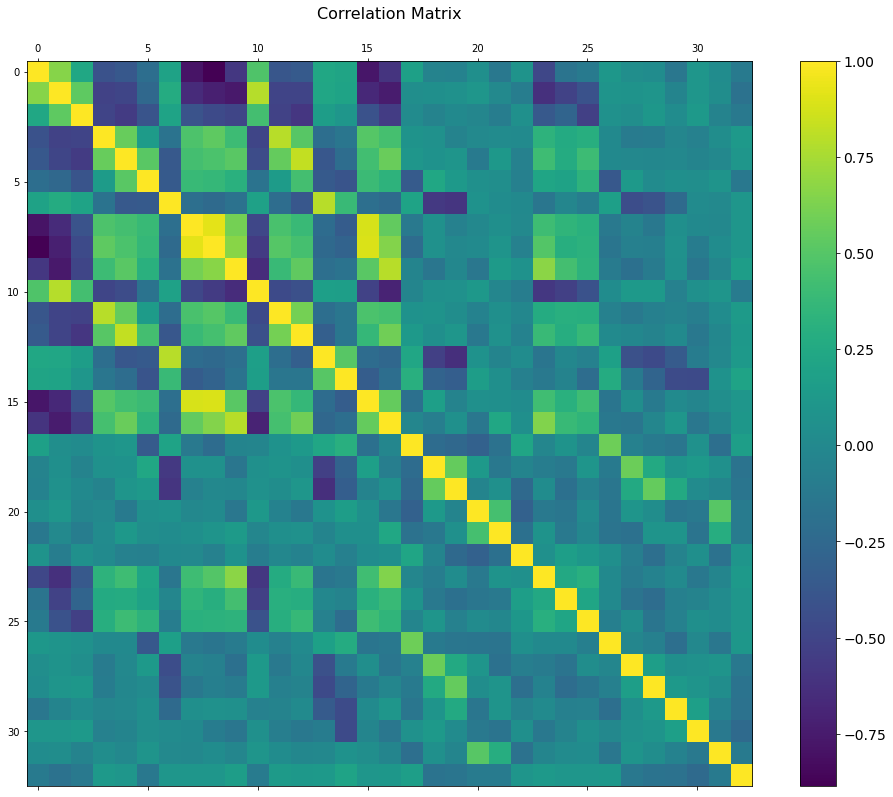

In [100]:
f = plt.figure(figsize=(17, 13))
mini_input = np.transpose(mini)
maxi_input = np.transpose(maxi)
mini_input_two = np.transpose(mini_two)
maxi_input_two = np.transpose(maxi_two)


extremePoints = []

for i in mini_input:
  extremePoints.append(i)

for i in maxi_input:
  extremePoints.append(i)

for i in mini_input_two:
  extremePoints.append(i)

for i in maxi_input_two:
  extremePoints.append(i)

extremePoints_complete = []
for i in extremePoints:
  if np.corrcoef(i, events)[0][1] != 1:
    extremePoints_complete.append(i)

extremePoints_complete.append(events)
test = np.transpose(extremePoints_complete)
df = pd.DataFrame(test)

plt.matshow(df.corr(), fignum=f.number)
#plt.xticks(np.arange(9), labels=["Means alpha", "Means beta", "std alpha", "std beta", "top val", "top val beta", "baseline alpha", "baseline beta", "events"])
#plt.yticks(np.arange(9), labels=["Means alpha", "Means beta", "std alpha", "std beta", "top val", "top val beta", "baseline alpha", "baseline beta", "events"])
#plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
#plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Feature extraction via timeline characteristics

In [ ]:
# Extract features
corr = []
corr_tapered = []
freqs = []
i = 1
limit = 50

while i < limit - 1:
  min = i
  c = i + 1
  while c < limit:
    max = c
    corr.append(getFeatures(min, max, data))
    corr_tapered.append(getFeatures(min, max, data))
    freqs.append([i,c])
    c += 1
  i += 1

cores = []
cores_tapered = []

for i in corr:
  for x in i:
    cores.append(np.corrcoef(x, events)[0][1])

for i in corr_tapered:
  for x in i:
    cores_tapered.append(np.corrcoef(x, events)[0][1])

-0.22822282071771163

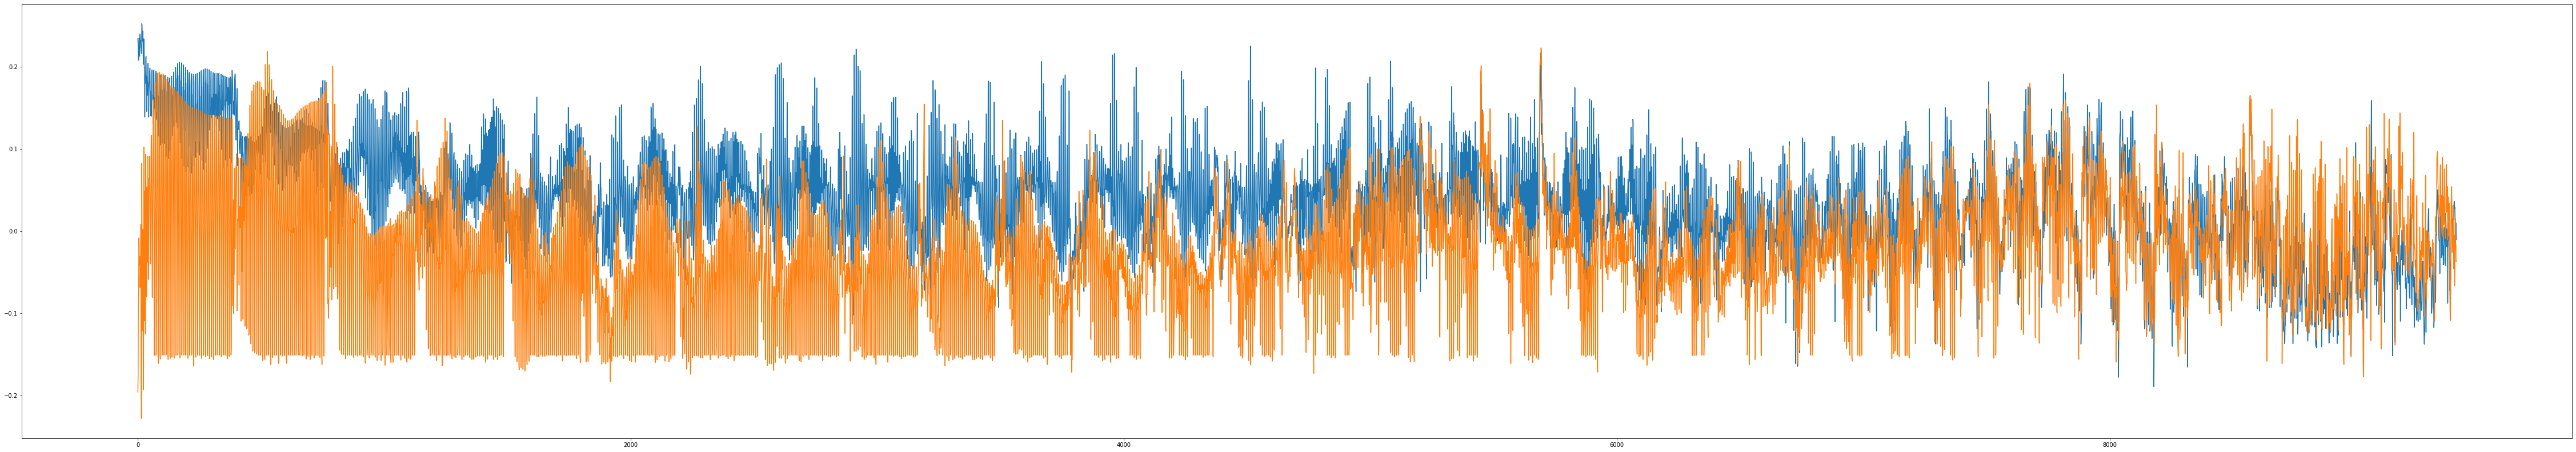

In [ ]:
plt.figure(figsize=(80,14))

plt.plot(cores)
plt.plot(cores_tapered)

np.min(cores_tapered)

In [ ]:
corr_ges = corr + corr_tapered
corr_flat_input = []

for i in corr_ges:
  for x in i:
    if math.sqrt(np.corrcoef(x, events)[0][1] ** 2) > 0.21:
      corr_flat_input.append(x)

In [ ]:
# Cross out attributes with super high correlation to one another

def manageCrossCorrelation(corr_input):
  res = []
  a = 0

  for i in corr_input:
    c = 0
    corr_events = math.sqrt(np.corrcoef(i, events)[0][1] ** 2)

    if corr_events != 1:
      for x in corr_input:
        if i != x:
          inter_corr = math.sqrt(np.corrcoef(i, x)[0][1] ** 2)

          if inter_corr > 0.99:
            if corr_events > inter_corr:
              res.append(c)
            else:
              res.append(a)
      
      c += 1
    a += 1

  return res

corr_flat = []
cross_out = manageCrossCorrelation(corr_flat_input)
c = 0

for i in corr_flat_input:
  if c not in cross_out:
    corr_flat.append(i)
  c += 1

KeyboardInterrupt: ignored

In [ ]:
len(corr_ges)

2352

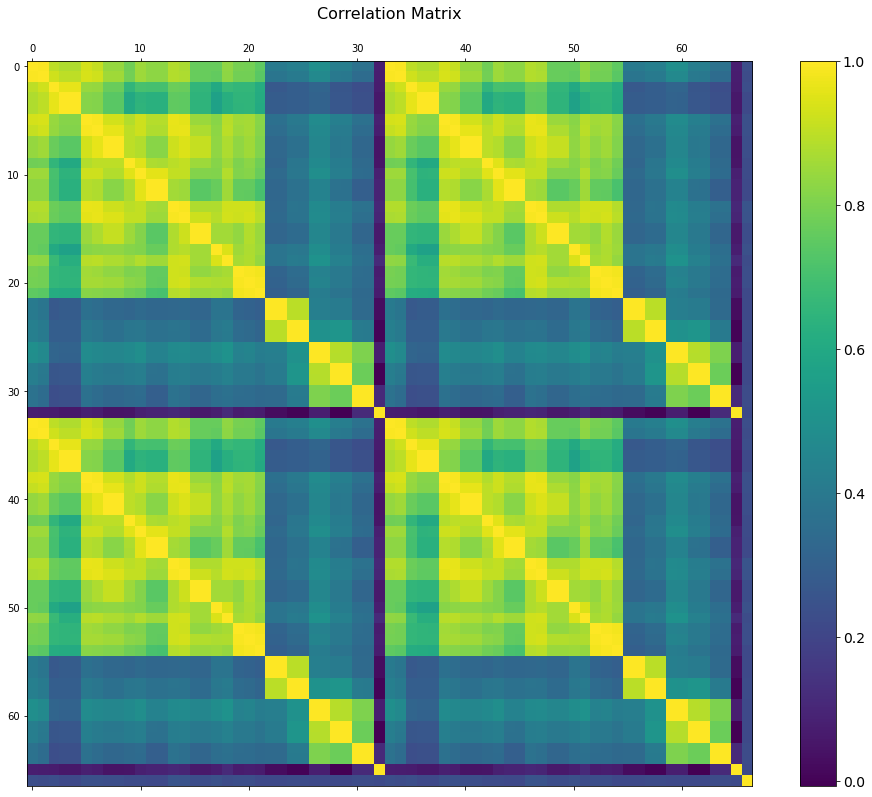

In [ ]:
f = plt.figure(figsize=(17, 13))

corr_flat_complete = []
for i in corr_flat_input:
  if np.corrcoef(i, events)[0][1] != 1:
    corr_flat_complete.append(i)

corr_flat_complete.append(events)
test = np.transpose(corr_flat_complete)
df = pd.DataFrame(test)

plt.matshow(df.corr(), fignum=f.number)
#plt.xticks(np.arange(9), labels=["Means alpha", "Means beta", "std alpha", "std beta", "top val", "top val beta", "baseline alpha", "baseline beta", "events"])
#plt.yticks(np.arange(9), labels=["Means alpha", "Means beta", "std alpha", "std beta", "top val", "top val beta", "baseline alpha", "baseline beta", "events"])
#plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
#plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Linear Regression Model

In [111]:
#train = np.transpose(corr_flat_complete[:len(corr_flat_complete) - 1])
train = np.transpose(extremePoints_complete[:len(extremePoints_complete) - 1])


train_end = 150
test_start = train_end + 1

c = 0
#predictions_raw = []
#for i in events:
 # predictions_raw.append([means_alpha[c], means_beta[c], std_alpha[c], std_beta[c], baseline_difference[c], baseline_difference_beta[c], top_val[c], top_val_beta[c], top_val_fft[c], means_alpha_fft[c], std_alpha_fft[c], means_beta_fft[c], std_beta_fft[c], top_val_beta_fft[c]])
 # c += 1

# define the data/predictors as the pre-set feature names  
dfTrain = pd.DataFrame(train[:train_end])
dfTest = pd.DataFrame(train[test_start:])

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(events, columns=["MEDV"])

lm = linear_model.LinearRegression()
model = lm.fit(dfTrain, target[:train_end])

In [112]:
lm.score(dfTrain, target[:train_end])
#lm.score(dfTest, target[test_start:])
#lm.score(pd.DataFrame(std_alpha[25:]),pd.DataFrame(events[60:]))

#len(corr_flat[0])
#corr_flat[len(corr_flat) - 1]

0.30236588944009224

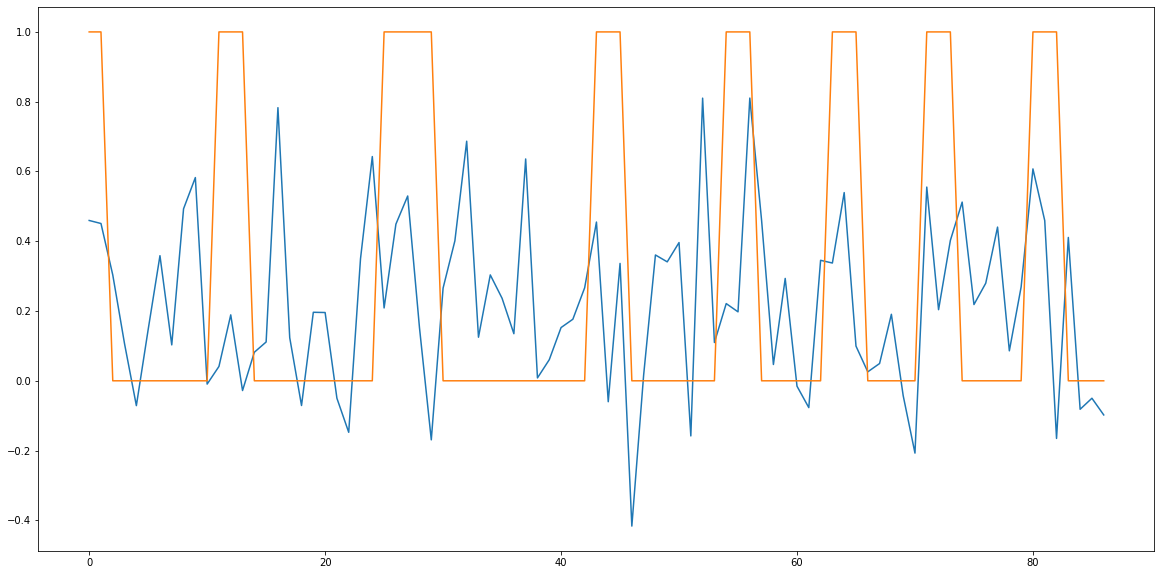

In [113]:
plt.figure(figsize=(20,10))
plt.plot(lm.predict(dfTest))
plt.plot(pd.DataFrame(events[test_start:]))


WINS / LOSSES GESAMT: 
60 27 0.6896551724137931
__________________________
WINS / LOSSES BEI 1: 
11 14 0.44
__________________________
WINS / LOSSES BEI 0: 
49 13 0.7903225806451613
__________________________
CORRELATION
[[1.         0.23319889]
 [0.23319889 1.        ]]

__________________________
CORRELATION TO ORIGINAL PREDICTIONS
[[1.         0.17085206]
 [0.17085206 1.        ]]



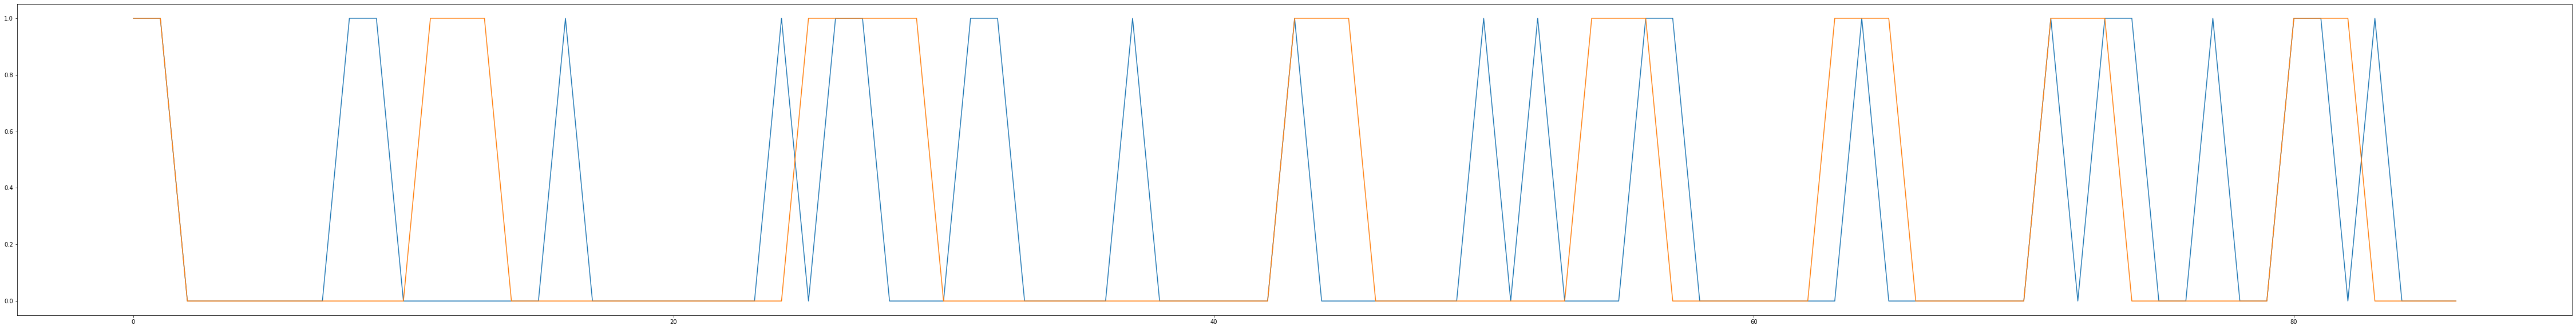

In [114]:
predictions = lm.predict(dfTest)
res = []
original_pred = []

for i in predictions[0:]:
  original_pred.append(i[0])
  if i > 0.38:
    res.append(1)
  else:
    res.append(0)
  
plt.figure(figsize=(80,10))
plt.plot(res)
plt.plot(events[test_start:])



c = 0
wins = 0
losses = 0

for i in events[test_start:]:
  if i == res[c]:
    wins += 1
  else:
    losses += 1
  c += 1

print("")
print("WINS / LOSSES GESAMT: ")
print(wins, losses, wins/(wins + losses))
print("__________________________")


c = 0
wins = 0
losses = 0

for i in events[test_start:]:
  if i == 1:
    if i == res[c]:
      wins += 1
    else:
      losses += 1
  c += 1

print("WINS / LOSSES BEI 1: ")
print(wins, losses, wins/(wins + losses))
print("__________________________")


c = 0
wins = 0
losses = 0

for i in events[test_start:]:
  if i == 0:
    if i == res[c]:
      wins += 1
    else:
      losses += 1
  c += 1

print("WINS / LOSSES BEI 0: ")
print(wins, losses, wins/(wins + losses))
print("__________________________")

print("CORRELATION")
print(np.corrcoef(res, events[test_start:]))
print("")
print("__________________________")

print("CORRELATION TO ORIGINAL PREDICTIONS")
print(np.corrcoef(original_pred, events[test_start:]))
print("")

In [97]:
lm.predict(dfTest)

array([[ 0.11503891],
       [ 0.3512102 ],
       [ 0.00159503],
       [ 0.12831965],
       [-0.12551127],
       [ 0.43037426],
       [ 0.57861807],
       [ 0.453428  ],
       [ 0.47027523],
       [ 0.55937862],
       [ 0.02404508],
       [ 0.49586366],
       [ 0.49370105],
       [-0.22549663],
       [ 0.15802201],
       [-0.14859408],
       [ 0.44017044],
       [-0.11613217],
       [ 0.37695519],
       [ 0.09795552],
       [-0.1608893 ],
       [ 0.09028732],
       [-0.16784223],
       [ 0.56093859],
       [ 0.85202675],
       [ 0.54416766],
       [ 0.42680615],
       [ 0.61479372],
       [ 0.0085286 ],
       [-0.06493073],
       [ 0.42740982],
       [ 0.30649707],
       [ 0.40642028],
       [ 0.23456662],
       [ 0.51388858],
       [ 0.17263556],
       [ 0.27630584],
       [ 0.61746876],
       [-0.10521095],
       [-0.03826311],
       [ 0.06596205],
       [ 0.17784276],
       [ 0.09070003],
       [ 0.36292318],
       [ 0.06530681],
       [ 0

# Random Forest Algorithm

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(dfTrain[:train_end],target[:train_end])

y_pred=clf.predict(dfTest)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(events[test_start:], y_pred))

Accuracy: 0.6363636363636364



WINS / LOSSES GESAMT: 
56 32 0.6363636363636364
__________________________
WINS / LOSSES BEI 1: 
2 23 0.08
__________________________
WINS / LOSSES BEI 0: 
54 9 0.8571428571428571
__________________________
CORRELATION
[[ 1.         -0.08571429]
 [-0.08571429  1.        ]]



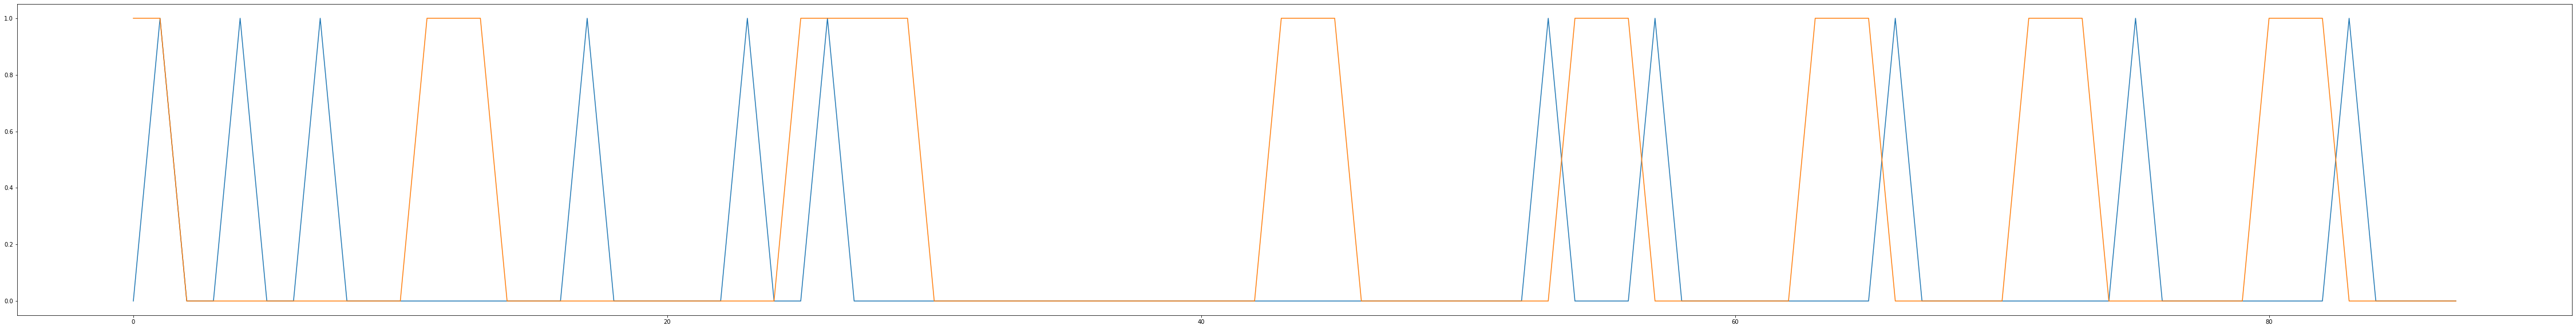

In [ ]:
plt.figure(figsize=(80,10))
plt.plot(y_pred)
plt.plot(events[test_start:])


res = y_pred
c = 0
wins = 0
losses = 0

for i in events[test_start:]:
  if i == res[c]:
    wins += 1
  else:
    losses += 1
  c += 1

print("")
print("WINS / LOSSES GESAMT: ")
print(wins, losses, wins/(wins + losses))
print("__________________________")


c = 0
wins = 0
losses = 0

for i in events[test_start:]:
  if i == 1:
    if i == res[c]:
      wins += 1
    else:
      losses += 1
  c += 1

print("WINS / LOSSES BEI 1: ")
print(wins, losses, wins/(wins + losses))
print("__________________________")


c = 0
wins = 0
losses = 0

for i in events[test_start:]:
  if i == 0:
    if i == res[c]:
      wins += 1
    else:
      losses += 1
  c += 1

print("WINS / LOSSES BEI 0: ")
print(wins, losses, wins/(wins + losses))
print("__________________________")

print("CORRELATION")
print(np.corrcoef(res, events[test_start:]))
print("")

## Neural Network

In [ ]:
xs_train = tf.constant(dfTrain)
xs_test = tf.constant(dfTest)

ys_train = tf.constant(events[:train_end])
ys_test = tf.constant(events[test_start:])

In [ ]:
loss_fn = tf.keras.losses.MeanSquaredError()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(len(xs_train[0]), 1)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model.fit(xs_train, ys_train, batch_size=1, epochs=100)

Epoch 1/100
150/150 [==============================] - 1s 1ms/step - loss: 4832.5844 - accuracy: 0.4241
Epoch 2/100
150/150 [==============================] - 0s 1ms/step - loss: 2742.3967 - accuracy: 0.5604
Epoch 3/100
150/150 [==============================] - 0s 1ms/step - loss: 73470.6029 - accuracy: 0.4791
Epoch 4/100
150/150 [==============================] - 0s 1ms/step - loss: 55.1925 - accuracy: 0.6134
Epoch 5/100
150/150 [==============================] - 0s 1ms/step - loss: 82.4065 - accuracy: 0.5402
Epoch 6/100
150/150 [==============================] - 0s 1ms/step - loss: 24.1513 - accuracy: 0.5182
Epoch 7/100
150/150 [==============================] - 0s 2ms/step - loss: 388.3876 - accuracy: 0.5262
Epoch 8/100
150/150 [==============================] - 0s 1ms/step - loss: 10.9545 - accuracy: 0.5399
Epoch 9/100
150/150 [==============================] - 0s 1ms/step - loss: 12.8720 - accuracy: 0.5782
Epoch 10/100
150/150 [==============================] - 0s 2ms/step - loss

3/3 [==============================] - 0s 3ms/step - loss: 0.2981 - accuracy: 0.7045


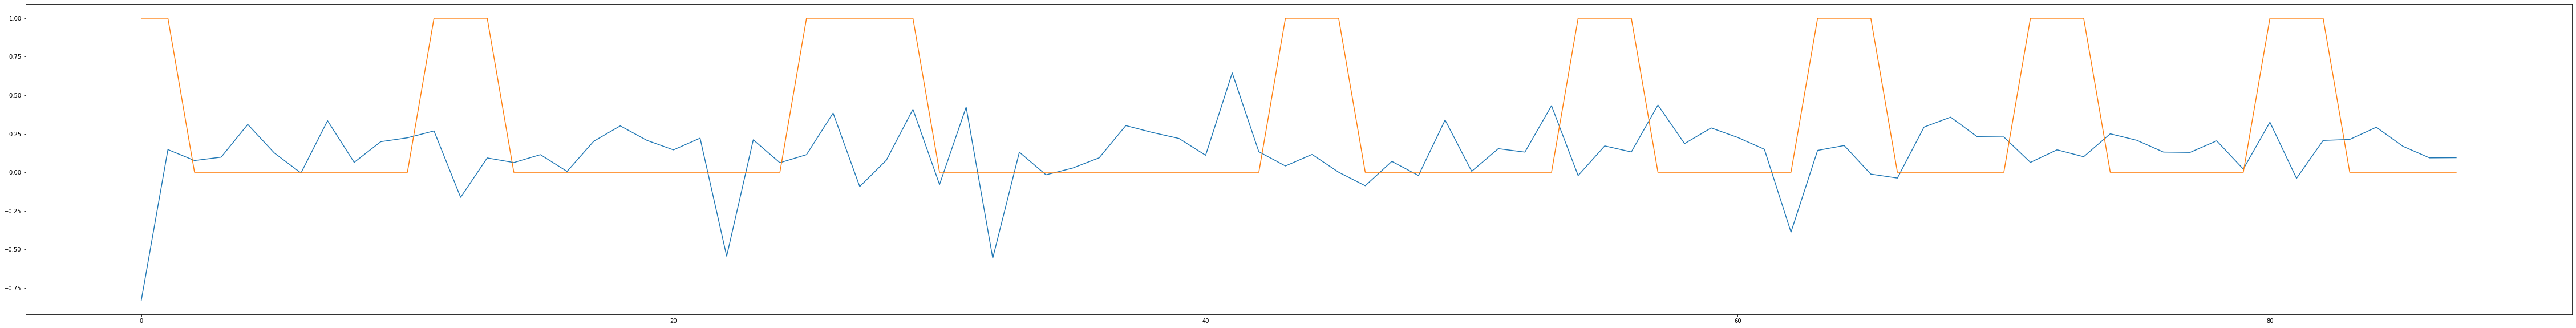

In [ ]:
model.evaluate(xs_test, ys_test)

plt.figure(figsize=(80,10))

plt.plot(model.predict(xs_test))
plt.plot(events[test_start:])


WINS / LOSSES GESAMT: 
61 27 0.6931818181818182
__________________________
WINS / LOSSES BEI 1: 
1 24 0.04
__________________________
WINS / LOSSES BEI 0: 
60 3 0.9523809523809523
__________________________
CORRELATION
[[ 1.         -0.01649572]
 [-0.01649572  1.        ]]



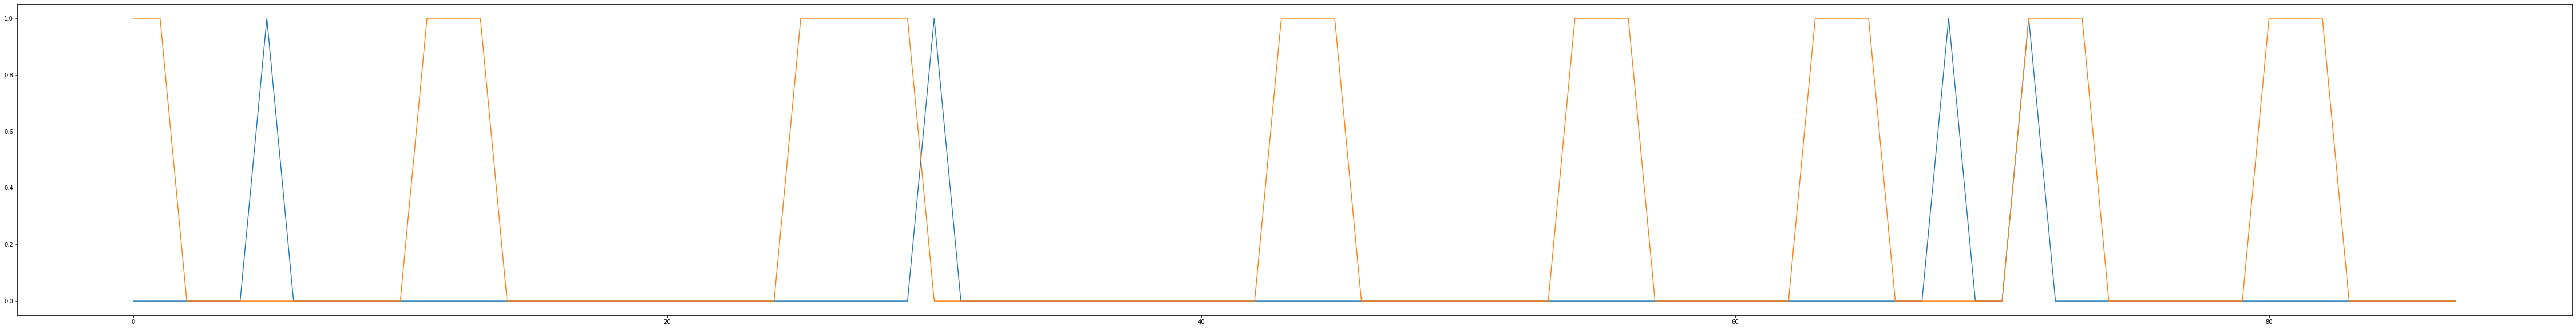

In [ ]:
predictions = model.predict(xs_test)
res = []

for i in predictions[0:]:
  if i > 0.25:
    res.append(1)
  else:
    res.append(0)
  
plt.figure(figsize=(80,10))
plt.plot(res)
plt.plot(events[test_start:])



c = 0
wins = 0
losses = 0

for i in events[test_start:]:
  if i == res[c]:
    wins += 1
  else:
    losses += 1
  c += 1

print("")
print("WINS / LOSSES GESAMT: ")
print(wins, losses, wins/(wins + losses))
print("__________________________")


c = 0
wins = 0
losses = 0

for i in events[test_start:]:
  if i == 1:
    if i == res[c]:
      wins += 1
    else:
      losses += 1
  c += 1

print("WINS / LOSSES BEI 1: ")
print(wins, losses, wins/(wins + losses))
print("__________________________")


c = 0
wins = 0
losses = 0

for i in events[test_start:]:
  if i == 0:
    if i == res[c]:
      wins += 1
    else:
      losses += 1
  c += 1

print("WINS / LOSSES BEI 0: ")
print(wins, losses, wins/(wins + losses))
print("__________________________")

print("CORRELATION")
print(np.corrcoef(res, events[test_start:]))
print("")

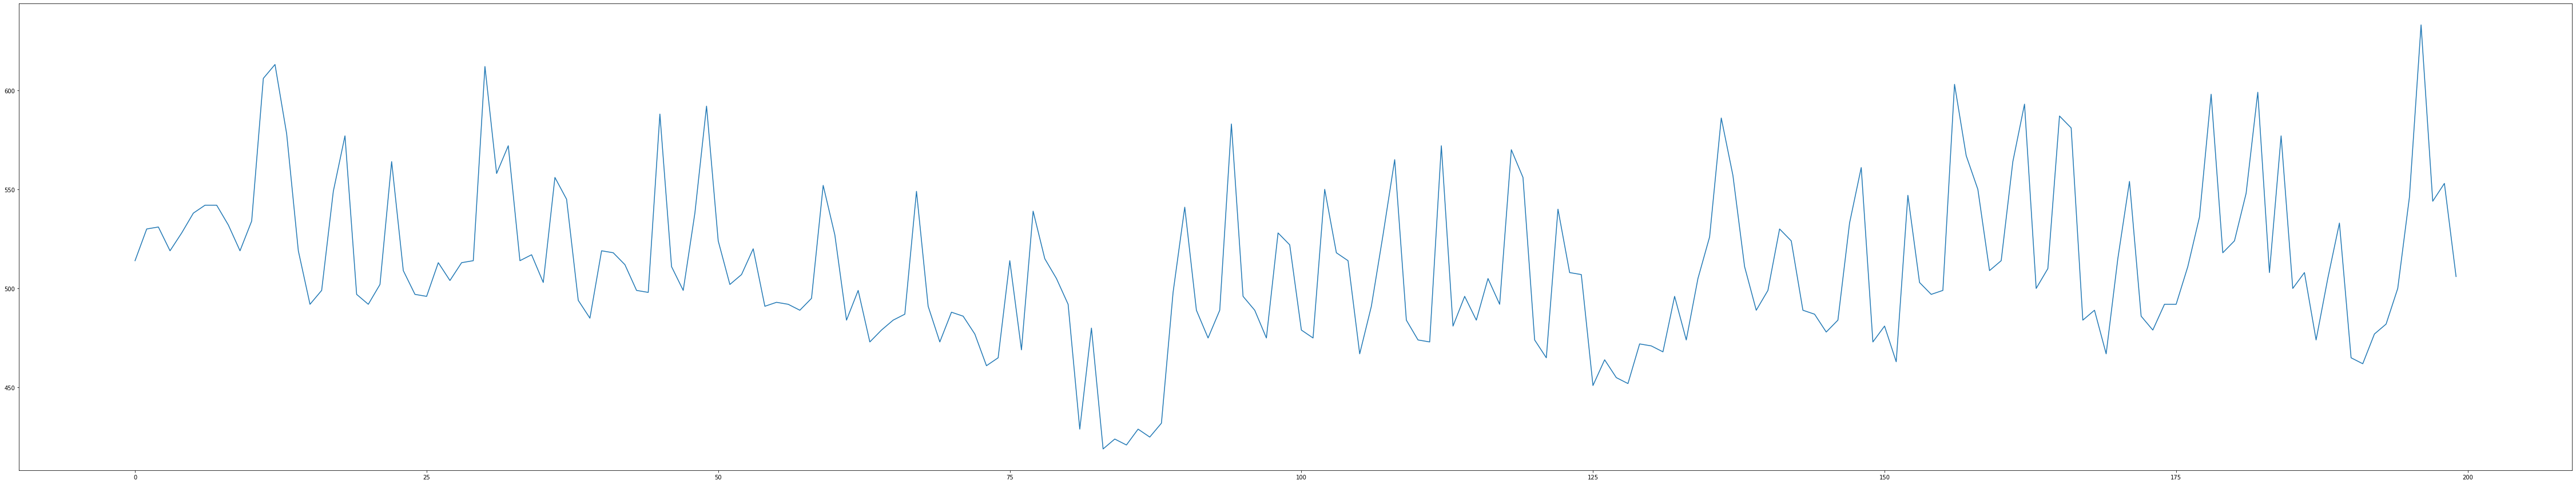

In [ ]:
plt.figure(figsize=(80,15))
plt.plot(data[0])

In [ ]:
len(data_split)

239

In [ ]:
len(data)

238

In [ ]:
print(events[100:120], events_raw[100:120])

[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1] [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]
